## Notebook to run NSGAII-DT on DAVE-2 within Donkey

In [2]:
# change working directory to the '/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/'
import os
os.chdir('/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/')
os.getcwd()

'/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive'

In [3]:
from problem.adas_problem import ADASProblem
from algorithm.nsga2dt_optimizer import NsgaIIDTOptimizer
from experiment.search_configuration import DefaultSearchConfiguration

from utils import log_utils

from examples.open_sbt.criticality import FitnessFunction, Criticality
from examples.open_sbt.sdsandbox_open_sbt import SDSandBox_OpenSBTWrapper
from examples.open_sbt.integer_nsga2dt_optimizer import IntegerNsgaIIDTOptimizer

/Users/hannesleonhard/micromamba/envs/donkey_opensbt/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/Users/hannesleonhard/micromamba/envs/donkey_opensbt/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.2 and is not supported. 
Some things might work, some things might not.
If you

pygame 2.5.2 (SDL 2.28.3, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


Set up SDSandbox experiment

- Two params define the road and two params define the perturbation
- The road is defined by its smoothness and num of turns
- The perturbation is defined by the function and intensity
- All individuals and their simulation are logged into `/logs/open_sbt/sdsandbox/`


In [4]:
import time
import datetime
import traceback
import random

# allows for reproducible results (regarding road generation and population initialization)
random.seed(42)

try:
    # set up fitness and criticality functions
    fitness_function = FitnessFunction(max_xte=2.0)
    critical_function = Criticality(max_xte=2.0)

    # use all perturbations for this experiment
    problem = ADASProblem(
        problem_name="SDSandbox_Variant3",
        scenario_path="",
        xl=[0, 0, 0, 0],
        xu=[5, 35, 4, 51],
        simulation_variables=[
            "num_turns",
            "avg_smoothness",
            "perturbation_scale",
            "perturbation_function",
        ],
        fitness_function=fitness_function,
        critical_function=critical_function,
        simulate_function=SDSandBox_OpenSBTWrapper.simulate,
        simulation_time=30,
        sampling_time=0.25,
    )
    log_utils.setup_logging("./logs/open_sbt/donkey_dave_50to75.txt")
    # Set search configuration
    config = DefaultSearchConfiguration()
    config.n_generations = 50
    config.population_size = 75
    config.n_func_evals_lim = 7500 # 50 generations * 50 population size * 3
    config.eta_mutation = 20
    # Instantiate search algorithm
    optimizer = IntegerNsgaIIDTOptimizer(problem=problem, config=config)
    # Run search
    start = time.time()
    startTime = datetime.datetime.fromtimestamp(start)
    print(f"Started at {startTime.strftime('%H:%M:%S')}")
    res = optimizer.run()

    print(f"Total time to search: {time.time() - start} seconds")
    endTime = datetime.datetime.fromtimestamp(start)
    print(f"Ended at at {endTime.strftime('%H:%M:%S')}")

    # save the results as dill file
    res.persist("./logs/open_sbt/res_donkey_dave2_50to75/")
except Exception as e:
    print(e)
    traceback.print_exc()
    endTime = datetime.datetime.fromtimestamp(start)
    print(f"Ended at at {endTime.strftime('%H:%M:%S')}")
    pass

2024-02-02 21:31:49,616 INFO     Logging setup. Writing to file:  ./logs/open_sbt/donkey_dave_50to75.txt
2024-02-02 21:31:49,617 INFO     Initialized algorithm with config: {'n_generations': 50, 'population_size': 75, 'n_func_evals_lim': 7500, 'eta_mutation': 20}
2024-02-02 21:31:49,619 INFO     Search is constrained by maximal number of tree generations
2024-02-02 21:31:49,619 INFO     Running evaluation number 1


Started at 21:31:49
Using model: ./examples/models/dave_90k_v1.h5
INFO:DonkeyProcess:This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


2024-02-02 21:31:49,759 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 21:32:09,770 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:09,776 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:09,821 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:09,867 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:09,915 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:09,973 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:10,014 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:10,055 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 21:32:10,090 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:10,100 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:10,142 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 21:32:10,187 INFO     Waiting for inital obs


IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is jpeg_filter/jpeg_filter
fps 18.46
IndividualToScenario: Function is dynamic_snow_filter/dynamic_snow_filter
IndividualToScenario: Function is translate_image/translate_image
fps 19.69
IndividualToScenario: Function is scale_image/scale_image
fps 19.67
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is sharpen_filter/sharpen_filter
fps 19.69
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.70
IndividualToScenario: Function is pixelate/pixelate
IndividualToScenario: Function is udnie/udnie
IndividualToScenario: Function is impulse_noise/impulse_noise
fps 19.67
IndividualToScenario: Function is sharpen_filter/sharpen_filter
IndividualToScenario: Function is dynamic_sun_filter/dynamic_sun_filter
fps 19.69
IndividualToScenario: Func

2024-02-02 21:38:44,172 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:39:06,700 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.73
fps 19.68
fps 19.70
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:39:50,750 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:39:53,206 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.64
fps 19.69
fps 19.73
fps 19.69
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:40:45,431 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:40:47,931 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:41:09,585 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:41:11,803 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:42:10,708 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:42:13,324 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:42:48,356 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:42:50,712 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.69
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:43:18,015 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:43:20,295 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:44:02,888 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:44:05,328 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:44:56,262 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:45:41,306 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:45:43,779 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:46:13,229 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:46:15,335 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:46:54,956 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:46:57,364 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:47:43,325 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:47:45,799 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:48:25,036 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:48:27,408 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:49:04,977 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:49:07,374 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:49:49,288 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:49:51,717 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:50:21,768 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:50:24,078 INFO     Reset the scenario


fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:50:38,907 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:51:13,680 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:51:16,025 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:51:37,333 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:51:39,528 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:52:25,696 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:52:28,133 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 21:53:32,143 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:53:34,823 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:54:28,336 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:54:30,845 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:55:07,392 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:55:09,771 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.69
fps 19.70
fps 19.71
fps 19.67
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:55:50,737 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:55:53,122 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.69
fps 19.68
fps 19.69
fps 19.68
fps 19.68
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:56:32,566 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:56:34,708 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:57:25,434 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:57:27,925 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:57:40,756 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:57:42,879 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:58:31,468 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:58:33,922 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.68
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 21:59:18,320 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 21:59:20,691 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.59
fps 19.82
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:00:00,619 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:00:41,406 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:00:43,827 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:01:38,721 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:01:41,289 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:02:29,552 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:02:31,986 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:02:58,428 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.70
fps 19.69
fps 19.69
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:03:43,921 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:03:46,285 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:04:00,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:04:02,160 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.69
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:04:46,491 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:04:48,881 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:05:01,748 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:05:03,872 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.69
fps 19.71
fps 19.70
fps 19.68
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:05:41,504 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:05:43,899 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:05:59,419 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:06:01,568 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.68
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:06:51,571 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:06:54,003 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:07:38,936 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:07:41,410 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.72
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:08:44,346 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.68
fps 19.70
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:09:19,194 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:09:21,321 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.68
fps 19.69
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:10:02,124 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:10:04,514 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:10:32,053 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.68
fps 19.72
fps 19.68
fps 19.69
fps 19.71
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:11:21,513 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:11:24,017 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.70
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:12:02,736 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:12:05,136 INFO     Reset the scenario


fps 19.69


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.68
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:12:50,836 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:12:52,998 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:13:24,677 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:13:26,998 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:13:43,925 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:13:46,091 INFO     Reset the scenario


fps 19.68


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:13:56,047 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:13:58,083 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:14:39,539 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:14:41,896 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:15:15,673 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:15:18,025 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:15:53,871 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:16:42,337 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:16:44,835 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:17:29,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:17:32,236 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:18:08,652 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:18:11,002 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.69
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:18:58,186 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:19:00,634 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:19:39,031 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:19:41,425 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:19:58,456 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:20:37,019 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:20:39,316 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.69
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:21:05,542 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:21:07,639 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.75
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:22:09,758 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:22:12,349 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.75
fps 19.70
fps 19.72
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:22:53,352 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:22:55,716 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.68
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:23:28,365 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:24:18,106 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.69
fps 19.67
fps 19.70
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:25:03,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:25:06,026 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:25:20,484 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:26:03,954 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:26:06,270 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 22:27:10,280 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:27:12,950 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:27:50,606 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:27:52,996 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:28:13,713 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:28:34,876 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 22:28:39,013 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 22:28:39,014 INFO     Closing donkey sim subprocess
2024-02-02 22:28:39,765 INFO     running iteration 0
2024-02-02 22:28:39,822 INFO     Running evaluation number 2


Fitness is (0.8638672091336438, 0.6940298507462687, 1, 1.997685)
Found non-critical scenario
Fitness is (0.38816776262654695, 0.014925373134328401, 0, 0.9773682)
Found non-critical scenario
Fitness is (0.3663073091018682, 0.014925373134328401, 0, 0.7820007)
Found non-critical scenario
Fitness is (0.5852490883532157, 0.7835820895522388, 1, 1.973993)
Found non-critical scenario
Fitness is (0.8406713424927154, 0.014925373134328401, 0, 1.396999)
Found non-critical scenario
Fitness is (0.40598922100735463, 0.23880597014925375, 1, 1.918411)
Found non-critical scenario
Fitness is (0.8335979584150437, 0.4626865671641791, 1, 1.989291)
Found non-critical scenario
Fitness is (0.49769744271309885, 0.014925373134328401, 0, 1.424119)
Found non-critical scenario
Fitness is (0.706234418471893, 0.12686567164179108, 1, 1.993514)
Found non-critical scenario
Fitness is (0.23890476303239624, 0.014925373134328401, 0, 0.5088256)
Found non-critical scenario
Fitness is (0.45100879657654397, 0.5671641791044777,

2024-02-02 22:28:40,010 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 22:29:00,025 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,036 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,083 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,128 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,171 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,212 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,256 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,298 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 22:29:00,319 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,343 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,385 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:29:00,430 INFO     Waiting for inital obs


IndividualToScenario: Function is scale_image/scale_image
fps 18.60
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is dynamic_snow_filter/dynamic_snow_filter
fps 19.71
IndividualToScenario: Function is the_scream/the_scream
fps 19.70
IndividualToScenario: Function is canny_edges_mapping/canny_edges_mapping
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sharpen_filter/sharpen_filter
fps 19.71
IndividualToScenario: Function is sharpen_filter/sharpen_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is jpeg_filter/jpeg_filter
----- Loading Dynamic Masks - This can take a couple of seconds -----
fps 19.71
Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +

2024-02-02 22:29:39,121 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:29:39,122 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.71
Loading Neural Style Transfer the_scream from perturbationdrive/NeuralStyleTransfer/models/instance_norm/the_scream.t7
Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:30:03,524 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 22:31:07,546 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:31:10,179 INFO     Reset the scenario


fps 19.69
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:31:24,363 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:32:15,289 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:32:17,753 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.68
fps 19.69
fps 19.68
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:32:51,187 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:33:39,047 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:33:41,525 INFO     Reset the scenario


fps 19.67
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:33:55,731 INFO     Reset the scenario


fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:34:11,353 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.69
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:35:00,924 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:35:31,770 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:35:34,078 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.70
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:36:22,089 INFO     Reset the scenario


fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:36:31,881 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:36:33,922 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:36:47,544 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 22:36:49,929 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 22:36:49,929 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 22:36:50,132 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:36:50,133 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 22:36:50,283 INFO     Running evaluation number 3


Fitness is (1.1322513222087434, 0.7537313432835822, 2, 1.326039)
Found non-critical scenario
Fitness is (0.6314742411615678, 0.9104477611940298, 1, 1.999757)
Found non-critical scenario
Fitness is (0.4955945301744512, 0.014925373134328401, 0, 1.335959)
Found non-critical scenario
Fitness is (0.9266776118167782, 0.6567164179104478, 1, 1.996501)
Found non-critical scenario
Fitness is (0.7167434050488809, 0.014925373134328401, 0, 1.380567)
Found non-critical scenario
Fitness is (0.3078059041297175, 0.8507462686567164, 1, 1.96843)
Found non-critical scenario
Fitness is (0.6236983852754098, 0.917910447761194, 1, 1.986253)
Found non-critical scenario
Fitness is (1.2361953711067382, 0.18656716417910446, 1, 1.959627)
Found non-critical scenario
Fitness is (0.5595128980844666, 0.3880597014925373, 1, 1.928044)
Found non-critical scenario
Fitness is (0.6734551607341501, 0.23134328358208955, 1, 1.934296)
Found non-critical scenario
Fitness is (0.44060292451278193, 0.9552238805970149, 1, 1.965785)


2024-02-02 22:36:50,406 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 22:37:10,433 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,438 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,484 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,529 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,572 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,618 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,660 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 22:37:10,684 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,701 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,746 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:37:10,788 INFO     Waiting for inital obs


IndividualToScenario: Function is dynamic_snow_filter/dynamic_snow_filter
fps 18.74
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is mosaic/mosaic
fps 19.71
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is canny_edges_mapping/canny_edges_mapping
fps 19.69
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 19.73
IndividualToScenario: Function is jpeg_filter/jpeg_filter
IndividualToScenario: Function is jpeg_filter/jpeg_filter
fps 19.71
IndividualToScenario: Function is dynamic_sun_filter/dynamic_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is scale_image/scale_image
----- Loading Dynamic Masks - This can take a couple of seconds -----
Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsg

2024-02-02 22:37:50,029 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:37:50,031 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.69
----- Loading Dynamic Masks - This can take a couple of seconds -----
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.68
Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:38:43,437 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:39:26,199 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:39:28,594 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:39:51,196 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:39:53,311 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:40:13,249 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:40:15,318 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:40:33,992 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:41:21,593 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:41:24,074 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:41:40,685 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:41:42,848 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:41:55,597 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:41:57,720 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.73
fps 19.69
fps 19.68
fps 19.70
fps 19.68
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:42:42,305 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:42:44,761 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:43:37,054 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:43:39,554 INFO     Reset the scenario


fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:43:53,512 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.74
fps 19.70
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:44:30,260 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 22:44:54,872 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 22:44:54,873 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 22:44:55,077 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:44:55,077 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 22:44:55,207 INFO     Running evaluation number 4


Fitness is (0.3390027472507312, 0.014925373134328401, 0, 0.5960411)
Found non-critical scenario
Fitness is (0.7677291788275046, 0.7835820895522388, 1, 1.967128)
Found non-critical scenario
Fitness is (0.8869628834473579, 0.7462686567164178, 1, 1.995879)
Found non-critical scenario
Fitness is (0.4121818499280207, 0.8582089552238806, 1, 1.988586)
Found non-critical scenario
Fitness is (0.7196324380643594, 0.014925373134328401, 0, 1.380356)
Found non-critical scenario
Fitness is (0.3332529506354687, 0.8134328358208955, 1, 1.941983)
Found non-critical scenario
Fitness is (0.4138273098543761, 0.917910447761194, 1, 1.990368)
Found non-critical scenario
Fitness is (0.6413976851747153, 0.014925373134328401, 0, 1.387915)
Found non-critical scenario
Fitness is (0.44681688943020154, 0.014925373134328401, 0, 1.31072)
Found non-critical scenario
Fitness is (0.612928546602714, 0.9104477611940298, 1, 1.978076)
Found non-critical scenario
Fitness is (1.1643456675560253, 0.4402985074626866, 1, 1.966504

2024-02-02 22:44:55,316 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 22:45:15,331 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,340 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,382 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,428 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,472 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,522 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,567 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 22:45:15,591 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,613 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,660 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:45:15,706 INFO     Waiting for inital obs


IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 18.73
IndividualToScenario: Function is dynamic_sun_filter/dynamic_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 19.70
IndividualToScenario: Function is jpeg_filter/jpeg_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
----- Loading Dynamic Masks - This can take a couple of seconds -----
Exception: [Errno 54] Connection reset by peer
CRITICAL:Donk

2024-02-02 22:45:54,933 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:45:54,937 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
fps 19.67
fps 19.70
fps 19.69
fps 19.70
Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
Loading Neural Style Transfer the_scream from perturbationdrive/NeuralStyleTransfer/models/instance_norm/the_scream.t7
Loading Neural Style Transfer the_scream from perturbationdrive/NeuralStyleTransfer/models/instance_norm/the_scream.t7
fps 19.68
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:46:21,647 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:47:04,086 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:47:57,173 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:47:59,672 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.69
fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:48:43,563 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:48:45,996 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:49:30,869 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:49:33,302 INFO     Reset the scenario


fps 19.45
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:50:10,478 INFO     Reset the scenario


fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:50:21,189 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:50:23,224 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:50:58,826 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 22:51:46,509 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:51:48,978 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.69
fps 19.69
fps 19.70
fps 19.69
fps 19.68
fps 19.70
fps 19.69
fps 19.68
fps 19.69
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 22:52:53,034 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:52:55,250 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:53:24,913 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.68
fps 19.70
fps 19.68
fps 19.70
fps 19.71
fps 19.69
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 22:54:28,944 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:54:31,165 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 22:54:47,881 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 22:54:47,882 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 22:54:48,096 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:54:48,097 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 22:54:48,250 INFO     Running evaluation number 5


Fitness is (0.5843799690143828, 0.32089552238805974, 1, 1.97087)
Found non-critical scenario
Fitness is (0.38553629002041073, 0.014925373134328401, 0, 0.7477451)
Found non-critical scenario
Fitness is (0.7881267599758705, 0.014925373134328401, 0, 1.891806)
Found non-critical scenario
Fitness is (0.5325960025388368, 0.014925373134328401, 0, 1.554574)
Found non-critical scenario
Fitness is (1.1549027916544332, 0.4328358208955224, 1, 1.997271)
Found non-critical scenario
Fitness is (0.485501697691141, 0.9552238805970149, 1, 1.960548)
Found non-critical scenario
Fitness is (0.4535995212815554, 0.4701492537313433, 1, 1.99359)
Found non-critical scenario
Fitness is (0.49427184214226455, 0.014925373134328401, 0, 1.364091)
Found non-critical scenario
Fitness is (0.578201199149799, 0.32089552238805974, 2, 1.462194)
Found non-critical scenario
Fitness is (1.0614278256301155, 0.6194029850746269, 1, 1.988112)
Found non-critical scenario
Fitness is (0.5614439970714286, 0.4477611940298507, 2, 1.0251

2024-02-02 22:54:48,369 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 22:55:08,381 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,391 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,434 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,480 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,524 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,567 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,612 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,656 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 22:55:08,669 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,698 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,739 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 22:55:08,781 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.62
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is scale_image/scale_image
fps 19.69
IndividualToScenario: Function is dynamic_sun_filter/dynamic_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.71
IndividualToScenario: Function is jpeg_filter/jpeg_filter
----- Loading Dynamic Masks - This can take a couple of seconds -----
Exception: [Errno 54] Connection reset by peer
CRITICA

2024-02-02 22:55:47,884 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 22:55:47,887 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
fps 19.68
fps 19.71
fps 19.71
fps 19.70
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:56:13,994 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:56:28,104 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.67
fps 19.71
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:57:13,683 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:57:35,729 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 22:58:39,745 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:58:42,343 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:59:00,720 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 22:59:21,050 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:00:25,059 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:00:27,715 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:01:26,789 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.71
fps 19.72
fps 19.74
fps 19.68
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:02:30,806 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:02:33,422 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.68
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:03:37,433 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:03:40,105 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.72
fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:04:29,170 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:04:31,623 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.68
fps 19.68
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:05:16,621 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 23:05:19,399 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 23:05:19,400 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 23:05:19,597 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:05:19,597 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 23:05:19,792 INFO     running iteration 1


Fitness is (0.604165560104017, 0.9104477611940298, 1, 1.995921)
Found non-critical scenario
Fitness is (1.0297387018076478, 0.34328358208955223, 1, 1.994568)
Found non-critical scenario
Fitness is (0.27956677712191913, 0.835820895522388, 1, 1.967873)
Found non-critical scenario
Fitness is (1.3626158963417283, 0.17164179104477617, 2, 1.547711)
Found non-critical scenario
Fitness is (0.8499676416487115, 0.8507462686567164, 1, 1.998884)
Found non-critical scenario
Fitness is (0.4259019992157347, 0.8134328358208955, 1, 1.992395)
Found non-critical scenario
Fitness is (0.9037513826307902, 0.05970149253731338, 2, 1.880997)
Found non-critical scenario
Fitness is (1.046128064280257, 0.15671641791044777, 1, 1.982809)
Found non-critical scenario
Fitness is (1.136633864587672, 0.32089552238805974, 2, 1.464446)
Found non-critical scenario
Fitness is (1.05519330123863, 0.21641791044776115, 2, 1.835923)
Found non-critical scenario
Fitness is (0.38549109325899955, 0.014925373134328401, 0, 0.670557)
F

2024-02-02 23:05:19,838 INFO     Running evaluation number 6


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        0 |     12 |             - |             -
Using model: ./examples/models/dave_90k_v1.h5
INFO:DonkeyProcess:This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


2024-02-02 23:05:19,951 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 23:05:39,965 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:39,974 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,017 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,060 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,103 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,147 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,189 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,230 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 23:05:40,239 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,272 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,314 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:05:40,356 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 18.67
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 19.71
IndividualToScenario: Function is scale_image/scale_image
fps 19.74
IndividualToScenario: Function is posterize_filter/posterize_filter
IndividualToScenario: Function is jpeg_filter/jpeg_filter
fps 19.70
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.72
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
fps 19.71
----- Finished Perturba

2024-02-02 23:06:10,813 INFO     Reset the scenario


fps 19.70
Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-02 23:06:19,419 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:06:19,419 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
fps 19.74
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:06:41,852 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:07:21,083 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:07:36,482 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:07:38,620 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.69
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:08:23,892 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:08:26,307 INFO     Reset the scenario


fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:08:37,529 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:08:39,625 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.67
fps 19.70
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:09:43,637 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:09:46,246 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:10:34,270 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:10:36,716 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:11:20,153 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:12:06,447 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:12:08,879 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.68
fps 19.68
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:12:52,395 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:13:02,531 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:13:04,568 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:14:02,437 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 23:14:05,260 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 23:14:05,261 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 23:14:05,506 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:14:05,507 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 23:14:05,632 INFO     Running evaluation number 7


Fitness is (1.2174053255787063, 0.6343283582089552, 1, 1.998146)
Found non-critical scenario
Fitness is (1.2797152584258014, 0.5223880597014925, 1, 1.997291)
Found non-critical scenario
Fitness is (0.2740668070943962, 0.8507462686567164, 1, 1.971989)
Found non-critical scenario
Fitness is (0.5951650967609698, 0.014925373134328401, 0, 1.554345)
Found non-critical scenario
Fitness is (0.34489971672004616, 0.8805970149253731, 1, 1.997983)
Found non-critical scenario
Fitness is (0.5212864947992524, 0.835820895522388, 2, 0.7203662)
Found non-critical scenario
Fitness is (0.6454586131757799, 0.014925373134328401, 0, 1.971034)
Found non-critical scenario
Fitness is (0.5054459417871987, 0.18656716417910446, 1, 1.971022)
Found non-critical scenario
Fitness is (0.2815668301660887, 0.014925373134328401, 0, 0.857382)
Found non-critical scenario
Fitness is (0.9781351240490486, 0.34328358208955223, 1, 1.994421)
Found non-critical scenario
Fitness is (0.43061210233067665, 0.9402985074626866, 1, 1.985

2024-02-02 23:14:05,789 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 23:14:25,805 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:25,811 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:25,854 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:25,898 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:25,940 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:25,982 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:26,028 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 23:14:26,072 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:26,074 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:26,120 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:14:26,161 INFO     Waiting for inital obs


IndividualToScenario: Function is jpeg_filter/jpeg_filter
fps 18.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_object_overlay/static_object_overlay
fps 19.72
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is jpeg_filter/jpeg_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is dynamic_sun_filter/dynamic_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
----- Loading Dynamic Masks - This can take a couple of seconds -----
fps 19.72
fps 19.69
Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:

2024-02-02 23:15:05,318 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:15:05,320 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
fps 19.71
fps 19.68
fps 19.69
Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
Loading Neural Style Transfer la_muse from perturbationdrive/NeuralStyleTransfer/models/instance_norm/la_muse.t7
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:15:22,557 INFO     Reset the scenario


fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:15:35,565 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:15:37,684 INFO     Reset the scenario


fps 19.68
fps 19.66
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:16:21,635 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:16:23,783 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.70
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:17:13,125 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:17:15,584 INFO     Reset the scenario


fps 19.68
fps 19.68
fps 19.72
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:17:51,207 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:18:21,163 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.74
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:19:25,215 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:19:27,436 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:19:38,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:19:40,689 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:20:44,713 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:20:47,315 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:21:18,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:21:21,279 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:21:39,843 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:21:42,013 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:22:46,038 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:22:48,653 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:23:34,214 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 23:23:36,928 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 23:23:36,929 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 23:23:37,119 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:23:37,120 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 23:23:37,230 INFO     Running evaluation number 8


Fitness is (0.35099699190405403, 0.9104477611940298, 1, 1.967219)
Found non-critical scenario
Fitness is (0.46068807597994504, 0.014925373134328401, 0, 1.447139)
Found non-critical scenario
Fitness is (0.4114033387685576, 0.014925373134328401, 0, 0.7904164)
Found non-critical scenario
Fitness is (1.140418688672393, 0.4776119402985075, 1, 1.996801)
Found non-critical scenario
Fitness is (0.8549039551857708, 0.6119402985074627, 1, 1.993736)
Found non-critical scenario
Fitness is (0.6405884339727107, 0.5895522388059702, 2, 1.433331)
Found non-critical scenario
Fitness is (0.49414806589077553, 0.9477611940298507, 1, 1.974144)
Found non-critical scenario
Fitness is (1.3877969517333333, 0.15671641791044777, 2, 1.578618)
Found non-critical scenario
Fitness is (0.36195426241030426, 0.014925373134328401, 0, 0.6768455)
Found non-critical scenario
Fitness is (0.39142628915688893, 0.7686567164179104, 1, 1.971614)
Found non-critical scenario
Fitness is (1.151272325921357, 0.29850746268656714, 2, 1.

2024-02-02 23:23:37,325 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 23:23:57,340 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,347 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,392 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,438 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,484 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,526 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,572 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 23:23:57,588 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,613 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,658 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:23:57,699 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.76
IndividualToScenario: Function is jpeg_filter/jpeg_filter
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is jpeg_filter/jpeg_filter
fps 19.71
IndividualToScenario: Function is jpeg_filter/jpeg_filter
fps 19.71
IndividualToScenario: Function is dotted_lines_mapping/dotted_lines_mapping
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is feathers/feathers
Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
Loading Neural Style Transfer feathers from perturbationdrive/NeuralS

2024-02-02 23:24:22,433 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-02 23:24:36,965 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:24:36,965 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:24:57,675 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:24:59,977 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:25:29,874 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:25:32,124 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.69
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:26:17,904 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:26:30,564 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:26:32,674 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:26:45,728 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:26:47,837 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.75
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:27:19,321 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:27:21,610 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:27:34,394 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:27:36,507 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:28:16,062 INFO     Reset the scenario


fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:28:26,480 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:28:28,516 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:29:32,537 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:29:35,155 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:30:05,078 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.69
fps 19.69
fps 19.68
SDSandBox: Finished scenario
fps 19.61
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 23:30:23,405 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 23:30:23,405 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 23:30:23,580 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:30:23,580 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 23:30:23,681 INFO     running iteration 2
2024-02-02 23:30:23,750 INFO     Running evaluation number 9


Fitness is (0.3191091453039514, 0.014925373134328401, 0, 0.5509425)
Found non-critical scenario
Fitness is (0.35284069414539143, 0.014925373134328401, 0, 0.5780325)
Found non-critical scenario
Fitness is (1.2252815251285465, 0.32089552238805974, 1, 1.983699)
Found non-critical scenario
Fitness is (0.49357139653338544, 0.917910447761194, 1, 1.999078)
Found non-critical scenario
Fitness is (0.29046661835831733, 0.835820895522388, 1, 1.964783)
Found non-critical scenario
Fitness is (0.35392856874682754, 0.014925373134328401, 0, 0.6724149)
Found non-critical scenario
Fitness is (0.45033218692345, 0.917910447761194, 1, 1.971522)
Found non-critical scenario
Fitness is (0.4407181279183942, 0.3955223880597015, 1, 1.978981)
Found non-critical scenario
Fitness is (0.3953588709780142, 0.9477611940298507, 1, 1.977144)
Found non-critical scenario
Fitness is (0.15611500730536568, 0.31343283582089554, 2, 0.2570355)
Found non-critical scenario
Fitness is (0.8708480574872713, 0.6119402985074627, 1, 1.9

2024-02-02 23:30:23,849 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 23:30:43,866 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:43,875 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:43,922 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:43,964 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:44,010 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:44,055 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:44,097 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 23:30:44,117 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:44,139 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:44,181 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:30:44,222 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.75
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is feathers/feathers
fps 19.72
IndividualToScenario: Function

2024-02-02 23:31:23,394 INFO     Reset the scenario


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-02 23:31:23,447 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:31:23,448 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:32:07,390 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:32:09,774 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.69
fps 19.73
fps 19.70
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:32:46,758 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:32:49,080 INFO     Reset the scenario


fps 19.66


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.71
fps 19.68
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:33:35,899 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:34:39,911 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:34:42,509 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:35:02,307 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:36:06,318 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:36:08,878 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:37:12,887 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:37:15,490 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:38:12,160 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:39:16,173 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:39:18,741 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:39:29,075 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:39:31,112 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:40:32,812 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:40:35,406 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:41:10,134 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:41:12,461 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:42:16,469 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:42:19,048 INFO     Reset the scenario


fps 19.68


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.69
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:42:37,998 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.69
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:43:08,060 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:43:10,164 INFO     Reset the scenario


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:43:18,974 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:43:21,006 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:44:25,027 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:44:27,667 INFO     Reset the scenario


fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:44:43,342 INFO     Reset the scenario


fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:44:56,764 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:45:25,886 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-02 23:45:28,644 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-02 23:45:28,645 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-02 23:45:28,820 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:45:28,820 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-02 23:45:29,005 INFO     Running evaluation number 10


Fitness is (0.4416874481104043, 0.014925373134328401, 0, 1.329401)
Found non-critical scenario
Fitness is (0.3141223873305552, 0.014925373134328401, 0, 0.4837219)
Found non-critical scenario
Fitness is (0.8532620045272246, 0.417910447761194, 1, 1.976433)
Found non-critical scenario
Fitness is (0.4657706742246696, 0.02985074626865669, 2, 1.314049)
Found non-critical scenario
Fitness is (0.7090506057475512, 0.8656716417910448, 1, 1.990342)
Found non-critical scenario
Fitness is (1.2241670937402127, 0.6865671641791045, 2, 1.454967)
Found non-critical scenario
Fitness is (0.37041749106375915, 0.12686567164179108, 2, 0.9007264)
Found non-critical scenario
Fitness is (1.1147724272372614, 0.11194029850746268, 1, 1.988526)
Found non-critical scenario
Fitness is (0.4566225258445557, 0.28358208955223885, 2, 0.5823084)
Found non-critical scenario
Fitness is (0.38641913610780143, 0.9477611940298507, 1, 1.979591)
Found non-critical scenario
Fitness is (0.6732276433159611, 0.014925373134328401, 0, 1

2024-02-02 23:45:29,107 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-02 23:45:49,123 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,129 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,175 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,221 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,263 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,304 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,349 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-02 23:45:49,370 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,389 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,431 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-02 23:45:49,475 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.77
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is the_scream/the_scream
fps 19.71
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.72
IndividualToScenario: Function is static_s

2024-02-02 23:46:28,696 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-02 23:46:28,697 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


Loading Neural Style Transfer mosaic from perturbationdrive/NeuralStyleTransfer/models/instance_norm/mosaic.t7
Loading Neural Style Transfer feathers from perturbationdrive/NeuralStyleTransfer/models/instance_norm/feathers.t7
Loading Neural Style Transfer the_scream from perturbationdrive/NeuralStyleTransfer/models/instance_norm/the_scream.t7
Loading Neural Style Transfer the_scream from perturbationdrive/NeuralStyleTransfer/models/instance_norm/the_scream.t7
----- Finished Perturbation-Controller set up -----
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:46:29,303 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:47:33,319 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:47:35,863 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:48:09,621 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:48:11,899 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:48:44,727 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:48:46,998 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:49:07,953 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:49:38,766 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.73
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:50:42,789 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:50:45,371 INFO     Reset the scenario


fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:50:54,878 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:50:56,914 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:52:00,934 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:52:03,508 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.69
fps 19.70
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:52:34,231 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:52:36,335 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.68
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:53:40,340 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:53:42,994 INFO     Reset the scenario


fps 19.72
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:53:56,417 INFO     Reset the scenario


fps 19.67
fps 19.68
fps 19.71
fps 19.70
fps 19.69
fps 19.69
fps 19.68
fps 19.70
fps 19.69
fps 19.69
fps 19.67
fps 19.69
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:55:00,468 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:55:02,686 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.69
fps 19.72
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.66
fps 19.71
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:56:06,708 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:56:08,925 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.68
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:56:54,202 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:56:56,649 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.71
fps 19.70
fps 19.72
fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-02 23:58:00,657 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:58:03,242 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-02 23:59:03,302 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-02 23:59:05,887 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:00:09,906 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:00:12,493 INFO     Reset the scenario


fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:00:28,215 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:01:22,677 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:01:25,213 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.68
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:02:29,233 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 00:02:32,355 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 00:02:32,356 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 00:02:32,500 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 00:02:32,502 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-03 00:02:32,701 INFO     Running evaluation number 11


Fitness is (1.2201926555975242, 0.6343283582089552, 2, 1.42091)
Found non-critical scenario
Fitness is (0.3416481869904449, 0.014925373134328401, 0, 0.5933366)
Found non-critical scenario
Fitness is (0.34942300306953594, 0.014925373134328401, 0, 0.5585378)
Found non-critical scenario
Fitness is (0.5992491104501849, 0.7537313432835822, 1, 1.988002)
Found non-critical scenario
Fitness is (0.8899333695783275, 0.6119402985074627, 1, 1.992526)
Found non-critical scenario
Fitness is (0.6534121698531908, 0.3955223880597015, 2, 0.795673)
Found non-critical scenario
Fitness is (0.430118597865873, 0.9552238805970149, 1, 1.985524)
Found non-critical scenario
Fitness is (1.2149477991577617, 0.6865671641791045, 2, 1.423533)
Found non-critical scenario
Fitness is (0.35920722995416154, 0.4701492537313433, 1, 1.987691)
Found non-critical scenario
Fitness is (0.4869980806763661, 0.17910447761194026, 2, 1.471151)
Found non-critical scenario
Fitness is (0.5140229336716049, 0.9402985074626866, 1, 1.978808

2024-02-03 00:02:32,800 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 00:02:52,814 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:52,821 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:52,865 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:52,911 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:52,955 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:52,999 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:53,040 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:53,082 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 00:02:53,118 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:53,125 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:53,170 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:02:53,216 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.58
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is feathers/feathers
fps 19.73
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Functi

2024-02-03 00:03:29,190 INFO     Reset the scenario


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-03 00:03:32,470 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 00:03:32,471 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.68
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.69
fps 19.72
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:04:33,208 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:04:35,787 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:05:39,810 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:05:42,387 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:06:22,348 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:06:24,727 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.69
fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:06:53,973 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:07:57,984 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:08:00,599 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:09:04,620 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:09:07,235 INFO     Reset the scenario


fps 19.68
fps 19.67
fps 19.71
fps 19.69
fps 19.69
fps 19.72
fps 19.68
fps 19.72
fps 19.74
fps 19.73
fps 19.69
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:10:07,115 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:11:11,123 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:11:13,735 INFO     Reset the scenario


fps 19.66
fps 19.76
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:12:17,756 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:12:20,350 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.68
fps 19.70
fps 19.72
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:13:12,586 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:13:15,086 INFO     Reset the scenario


fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:13:29,039 INFO     Reset the scenario


fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:13:41,986 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:14:01,893 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:14:04,088 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.68
fps 19.68
fps 19.69
fps 19.70
fps 19.70
fps 19.68
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:15:08,136 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:15:10,355 INFO     Reset the scenario


fps 19.76
fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:15:42,608 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:15:44,907 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:16:20,062 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:16:22,388 INFO     Reset the scenario


fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:16:36,708 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:16:52,066 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:16:54,203 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.69
fps 19.69
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:17:36,271 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:17:38,689 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:18:23,615 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 00:18:26,615 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 00:18:26,615 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 00:18:26,761 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 00:18:26,762 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


Fitness is (1.3622874447392763, 0.15671641791044777, 2, 1.558437)
Found non-critical scenario
Fitness is (1.23656560295413, 0.6716417910447761, 2, 1.458141)
Found non-critical scenario
Fitness is (0.5120240793418647, 0.014925373134328401, 0, 1.425309)
Found non-critical scenario
Fitness is (0.8617370461184835, 0.6194029850746269, 1, 1.99134)
Found non-critical scenario
Fitness is (0.4026812551053292, 0.27611940298507465, 2, 0.8339225)
Found non-critical scenario
Fitness is (0.3675885059730964, 0.35820895522388063, 2, 0.492581)
Found non-critical scenario
Fitness is (1.3992725718395784, 0.11940298507462688, 1, 1.995839)
Found non-critical scenario
Fitness is (1.2053664095141927, 0.9253731343283582, 2, 1.409742)
Found non-critical scenario
Fitness is (0.4597976157839986, 0.23880597014925375, 2, 0.6055446)
Found non-critical scenario
Fitness is (0.20510140684248998, 0.014925373134328401, 0, 0.488409)
Found non-critical scenario
Fitness is (0.46875006493937144, 0.9402985074626866, 1, 1.962

2024-02-03 00:18:26,968 INFO     running iteration 3
2024-02-03 00:18:27,019 INFO     Running evaluation number 12


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        0 |     22 |             - |             -
Using model: ./examples/models/dave_90k_v1.h5
INFO:DonkeyProcess:This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


2024-02-03 00:18:27,107 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 00:18:47,122 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,135 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,182 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,224 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,270 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,311 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,354 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,399 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
2024-02-03 00:18:47,401 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,447 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:18:47,489 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.65
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 19.69
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is phase_sc

2024-02-03 00:19:26,635 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 00:19:26,640 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.69
IndividualToScenario: Function is la_muse/la_muse
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.67
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is la_m

2024-02-03 00:20:09,756 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:21:03,776 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:21:06,298 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.71
fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:21:37,923 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:21:40,028 INFO     Reset the scenario


fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:21:48,886 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:21:50,918 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:22:49,776 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:22:52,328 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:23:33,130 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:23:35,513 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:24:39,527 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:24:42,138 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.70
fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:25:46,144 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:25:48,786 INFO     Reset the scenario


fps 19.75
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:26:02,666 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:26:31,954 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:27:05,695 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:27:08,058 INFO     Reset the scenario


fps 17.14
fps 19.74
fps 19.70
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:28:00,013 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:28:02,517 INFO     Reset the scenario


fps 19.73
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:28:12,813 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:28:14,848 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.75
fps 19.70
fps 19.73
fps 19.70
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:29:20,120 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.75
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:29:36,706 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:30:40,724 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:30:43,053 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:31:32,446 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:31:34,898 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:32:38,911 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:32:41,534 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.75
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:33:47,206 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:34:22,819 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:34:25,153 INFO     Reset the scenario


fps 19.71


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.67
fps 19.70
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:35:22,190 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:35:24,392 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:35:42,079 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:35:56,351 INFO     Reset the scenario


fps 19.70
fps 19.77
fps 19.74
fps 19.72
fps 19.75
fps 19.72
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:36:32,065 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:37:07,633 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:37:09,982 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:37:35,886 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.68
fps 19.70
fps 19.73
fps 19.69
fps 19.70
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:38:39,921 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:38:42,146 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:39:40,068 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:39:42,605 INFO     Reset the scenario


fps 19.79
fps 19.75
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:40:26,795 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:40:29,235 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:40:59,559 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:41:01,855 INFO     Reset the scenario


fps 19.69


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.68
fps 19.72
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:42:07,206 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:43:11,213 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:43:13,817 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:43:48,441 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:43:50,563 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:44:19,505 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.69
fps 19.69
fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:45:20,102 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:46:06,487 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:46:08,959 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:46:20,029 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:46:22,068 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:47:26,084 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:47:28,732 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.69
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:48:00,189 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 00:48:03,007 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 00:48:03,007 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 00:48:03,494 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 00:48:03,495 INFO     Closing donkey sim subprocess
2024-02-03 00:48:03,883 INFO     Running evaluation number 13


Fitness is (0.25671444641945473, 0.014925373134328401, 0, 0.6147704)
Found non-critical scenario
Fitness is (0.44756898118427735, 0.3955223880597015, 1, 1.967203)
Found non-critical scenario
Fitness is (0.41025144934152546, 0.9552238805970149, 1, 1.962998)
Found non-critical scenario
Fitness is (0.21019143252310127, 0.014925373134328401, 0, 0.4308836)
Found non-critical scenario
Fitness is (0.4026363521041077, 0.18656716417910446, 1, 1.999508)
Found non-critical scenario
Fitness is (0.800443566926173, 0.10447761194029848, 2, 1.639209)
Found non-critical scenario
Fitness is (0.7511306955157975, 0.4925373134328358, 2, 1.646737)
Found non-critical scenario
Fitness is (0.5810729983884001, 0.917910447761194, 1, 1.96887)
Found non-critical scenario
Fitness is (0.8595223262728889, 0.6194029850746269, 1, 1.993584)
Found non-critical scenario
Fitness is (0.3589343296288688, 0.014925373134328401, 0, 0.7034193)
Found non-critical scenario
Fitness is (0.24103247001894842, 0.014925373134328401, 0, 

2024-02-03 00:48:03,970 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 00:48:23,987 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:23,997 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,044 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,086 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,128 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,170 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,211 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,256 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 00:48:24,291 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,302 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 00:48:24,347 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.72
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.74
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sa

2024-02-03 00:49:03,573 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 00:49:03,574 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is splatter_mapping/splatter_mapping
IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 19.68
IndividualToScenario: Function is mosaic/mosaic
fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.68
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_f

2024-02-03 00:49:30,179 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:50:05,028 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:50:40,090 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:50:42,392 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.70
fps 19.74
fps 19.75
fps 19.75
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:51:46,103 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:52:17,934 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:52:20,214 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:52:39,149 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:52:41,214 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.74
fps 19.73
fps 19.74
fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:53:16,392 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:53:18,708 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:53:55,214 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:53:57,561 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:55:01,585 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:55:04,171 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:55:48,417 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:55:50,569 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.75
fps 19.71
fps 19.70
fps 19.73
fps 19.69
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 00:56:54,589 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:56:57,160 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:57:46,636 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:57:49,081 INFO     Reset the scenario


fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:57:59,394 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:58:01,428 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.69
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:58:33,087 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.76
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:58:56,001 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.95
fps 19.72
fps 19.70
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 00:59:50,212 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 00:59:52,768 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:00:06,199 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.77
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:00:49,976 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:00:52,375 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.74
fps 19.70
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:01:33,231 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:01:35,652 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.70
fps 19.70
fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:02:24,498 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:02:26,942 INFO     Reset the scenario


fps 19.78
fps 19.69
fps 19.69
fps 19.68
fps 19.72
fps 19.70
fps 19.70
fps 19.69
fps 19.68
fps 19.71
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:03:30,992 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:03:33,214 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:04:37,235 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:04:39,861 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:05:27,678 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:05:30,147 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:06:34,169 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:06:36,804 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:07:07,956 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:07:10,239 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.72
fps 19.70
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:07:40,813 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:07:42,919 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.70
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:08:17,145 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:08:19,481 INFO     Reset the scenario


fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:08:30,040 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:08:32,076 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:08:55,880 INFO     Reset the scenario


fps 19.71
fps 19.77
fps 19.76
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:09:45,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:09:47,792 INFO     Reset the scenario


fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:09:58,028 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:10:00,064 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.75
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:10:22,414 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.74
fps 19.74
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:11:26,436 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:11:29,081 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:12:02,206 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:12:04,507 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:12:35,123 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:12:54,681 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:13:29,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:13:31,441 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.74
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:14:37,657 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:15:41,709 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 01:15:44,774 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 01:15:44,774 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 01:15:44,947 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 01:15:44,948 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-03 01:15:45,246 INFO     Running evaluation number 14


Fitness is (0.939493220817743, 0.6194029850746269, 1, 1.995503)
Found non-critical scenario
Fitness is (0.3407157244882146, 0.014925373134328401, 0, 0.5128697)
Found non-critical scenario
Fitness is (1.4128909546087207, 0.08208955223880599, 1, 1.999728)
Found non-critical scenario
Fitness is (0.3191034937052381, 0.014925373134328401, 0, 0.5260715)
Found non-critical scenario
Fitness is (0.6819695182225315, 0.7611940298507462, 1, 1.991531)
Found non-critical scenario
Fitness is (0.32416633798929123, 0.014925373134328401, 0, 0.4636229)
Found non-critical scenario
Fitness is (0.33116524996267516, 0.014925373134328401, 0, 0.703299)
Found non-critical scenario
Fitness is (1.3460175192937185, 0.18656716417910446, 2, 1.536447)
Found non-critical scenario
Fitness is (0.6900754182383999, 0.014925373134328401, 0, 1.528619)
Found non-critical scenario
Fitness is (1.373225277015026, 0.07462686567164178, 2, 1.595112)
Found non-critical scenario
Fitness is (0.678210954973967, 0.014925373134328401, 0

2024-02-03 01:15:45,336 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 01:16:05,353 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,362 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,407 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,448 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,494 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,535 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,581 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,622 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 01:16:05,661 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,663 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:16:05,704 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.74
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is splatter_mapping/splatter_mapping
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function i

2024-02-03 01:16:44,838 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 01:16:44,839 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is false_color_filter/false_color_filter
fps 19.72
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.68
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is mosaic/mosaic
fps 19.67
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Fu

2024-02-03 01:17:20,135 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.75
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:18:24,155 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:18:26,773 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:19:30,784 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:19:33,396 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.75
fps 19.74
fps 19.70
fps 19.68
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:20:11,303 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:20:13,665 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.74
fps 19.73
fps 19.70
fps 19.74
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:20:52,970 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:20:55,319 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:21:31,148 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:21:33,490 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:22:19,821 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:22:22,247 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:23:05,732 INFO     Reset the scenario


fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:23:18,606 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.74
fps 19.75
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:24:22,628 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:24:25,265 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:24:55,816 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69INFO:SDSandBoxSimulator:Reset the scenario



2024-02-03 01:24:58,088 INFO     Reset the scenario


fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:25:08,054 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:25:10,090 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:25:39,111 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:25:41,353 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:26:45,361 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:26:47,679 INFO     Reset the scenario


fps 19.72
fps 19.75
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:27:01,693 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:27:52,727 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:27:55,209 INFO     Reset the scenario


fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:28:05,704 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:28:07,737 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.75
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:29:00,686 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:29:03,187 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.75
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:29:32,744 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:30:18,970 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:30:21,398 INFO     Reset the scenario


fps 19.76
fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:30:57,834 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:31:00,171 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
fps 19.75
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:31:30,480 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:31:32,769 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:31:57,345 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.75
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:32:54,170 INFO     Reset the scenario


fps 19.74
fps 19.76
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:33:28,841 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:33:31,148 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:34:23,575 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:34:26,080 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:35:12,314 INFO     Reset the scenario


fps 19.78
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:36:08,930 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:36:11,491 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:37:15,499 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:37:18,135 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.68
fps 19.70
fps 19.71
fps 19.67
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:38:22,165 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:38:24,420 INFO     Reset the scenario


fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:38:33,360 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:38:35,394 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:39:39,402 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:39:42,037 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.68
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:40:46,094 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:40:48,347 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:41:12,160 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:41:43,249 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:41:45,533 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:42:40,617 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69INFO:SDSandBoxSimulator:Reset the scenario



2024-02-03 01:42:43,155 INFO     Reset the scenario


fps 19.78
fps 19.70
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.68
fps 19.70
fps 19.77
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:43:47,170 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:43:49,811 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:44:22,785 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:44:25,078 INFO     Reset the scenario


fps 19.77
fps 19.76
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:45:29,083 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 01:45:32,218 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 01:45:32,219 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 01:45:32,734 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 01:45:32,735 INFO     Closing donkey sim subprocess
2024-02-03 01:45:33,201 INFO     running iteration 4
2024-02-03 01:45:33,248 INFO     Running evaluation number 15


Fitness is (0.5018058043724564, 0.4776119402985075, 2, 0.7503746)
Found non-critical scenario
Fitness is (0.4148267985154236, 0.27611940298507465, 2, 0.8585223)
Found non-critical scenario
Fitness is (0.3969565579470852, 0.014925373134328401, 0, 0.736018)
Found non-critical scenario
Fitness is (0.9587467587360949, 0.3805970149253731, 1, 1.983969)
Found non-critical scenario
Fitness is (0.340008741043467, 0.014925373134328401, 0, 0.5157121)
Found non-critical scenario
Fitness is (0.4466793198193301, 0.014925373134328401, 0, 1.333917)
Found non-critical scenario
Fitness is (0.7996450220175284, 0.4850746268656716, 1, 1.99237)
Found non-critical scenario
Fitness is (0.5252640743304667, 0.9402985074626866, 1, 1.972484)
Found non-critical scenario
Fitness is (0.3862614278641, 0.05970149253731338, 2, 0.6972724)
Found non-critical scenario
Fitness is (0.35341201487702956, 0.014925373134328401, 0, 0.4299183)
Found non-critical scenario
Fitness is (0.5107068706080742, 0.9477611940298507, 1, 1.98

2024-02-03 01:45:33,346 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 01:45:53,359 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,368 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,411 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,456 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,499 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,544 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,586 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,627 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 01:45:53,639 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,668 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 01:45:53,711 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.82
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 19.72
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter


2024-02-03 01:46:32,826 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 01:46:32,828 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.69
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.68
IndividualToScenario: Function is feathers/feathers
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.66
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun

2024-02-03 01:47:51,720 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.74
fps 19.70
fps 19.73
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:48:33,555 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.75
fps 19.71
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:49:26,433 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:49:28,921 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.74
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:49:48,311 INFO     Reset the scenario


fps 19.74
fps 19.76
fps 19.72
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:50:19,491 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:50:21,767 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.75
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:51:25,789 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:51:28,393 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:52:31,349 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.72
fps 19.72
fps 19.70
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:53:07,413 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:53:09,747 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:53:27,668 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.69
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:54:28,062 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:54:30,358 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:55:10,110 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:56:00,819 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.70
fps 19.71
fps 19.71
fps 19.75
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 01:56:38,001 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:56:40,340 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.75
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:57:44,360 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:57:46,933 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:58:50,950 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 01:58:53,536 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.75
fps 19.71
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 01:59:57,549 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:00:00,148 INFO     Reset the scenario


fps 19.71
fps 19.79
fps 19.72
fps 19.70
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:00:31,912 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.70
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.76
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:01:35,927 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:01:38,500 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:02:42,526 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:02:45,137 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:03:05,000 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:04:09,037 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:04:11,250 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:05:15,263 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:05:17,883 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:06:21,895 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:06:24,477 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:07:28,513 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:07:30,726 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.76
fps 19.74
fps 19.73
fps 19.72
fps 19.70
fps 19.75
fps 19.71
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:08:24,358 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.75
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.75
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:09:28,384 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:09:31,002 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:10:16,061 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:10:18,489 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:11:07,585 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:11:45,934 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:11:48,301 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:12:24,605 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:12:26,988 INFO     Reset the scenario


fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:12:40,530 INFO     Reset the scenario


fps 19.72
fps 19.77
fps 19.71
fps 19.77
fps 19.73
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:13:19,260 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:13:21,610 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.74
fps 19.73
fps 19.69
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:14:25,633 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:14:28,246 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.71
fps 19.70
fps 19.75
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.68
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:15:32,284 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:15:34,500 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:16:07,578 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:16:09,876 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:17:13,898 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:17:16,518 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:17:56,523 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:18:17,735 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:19:21,752 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:19:24,373 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.75
fps 19.70
fps 19.74
fps 19.76
fps 19.76
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:20:28,400 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:20:30,983 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.74
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:21:35,028 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:21:37,378 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:22:41,397 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:22:44,014 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.68
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:23:48,037 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:23:50,257 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:24:29,903 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:24:39,336 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:24:41,366 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.75
fps 19.74
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:25:25,374 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:25:27,770 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.75
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:26:31,789 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:26:34,422 INFO     Reset the scenario


fps 19.75
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:26:49,557 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:27:28,188 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:28:15,597 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:28:18,053 INFO     Reset the scenario


fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:28:28,327 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:28:30,364 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.69
fps 19.70
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:29:19,772 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:30:23,557 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.75
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:30:50,649 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:31:36,040 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:31:38,475 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:32:42,482 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:32:45,055 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:33:21,131 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 02:33:23,742 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 02:33:23,743 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.17
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 02:33:25,102 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 02:33:25,102 INFO     Closing donkey sim subprocess
2024-02-03 02:33:25,729 INFO     Running evaluation number 16


Fitness is (1.1867784586740666, 0.3656716417910447, 1, 1.985375)
Found non-critical scenario
Fitness is (0.2927564743311921, 0.014925373134328401, 0, 0.503531)
Found non-critical scenario
Fitness is (0.22375740342911998, 0.8731343283582089, 1, 1.960148)
Found non-critical scenario
Fitness is (0.3524872399299422, 0.014925373134328401, 0, 0.7148705)
Found non-critical scenario
Fitness is (0.3825682177162734, 0.33582089552238803, 2, 0.508701)
Found non-critical scenario
Fitness is (0.6786526436118424, 0.19402985074626866, 1, 1.989323)
Found non-critical scenario
Fitness is (0.4508599519232988, 0.014925373134328401, 0, 1.37759)
Found non-critical scenario
Fitness is (0.5873806776452262, 0.8955223880597015, 1, 1.989011)
Found non-critical scenario
Fitness is (0.7311206285779208, 0.014925373134328401, 0, 1.494782)
Found non-critical scenario
Fitness is (1.1887208629310622, 0.4029850746268657, 1, 1.971589)
Found non-critical scenario
Fitness is (1.4316508116522577, 0.5298507462686567, 1, 1.99

2024-02-03 02:33:25,814 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 02:33:45,831 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:45,841 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:45,884 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:45,930 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:45,976 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,018 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,064 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,107 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,151 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,192 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,235 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,276 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,318 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 02:33:46,350 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,362 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 02:33:46,404 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.00
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_f

2024-02-03 02:34:25,180 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 02:34:25,185 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.69
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.69
IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function i

2024-02-03 02:35:42,426 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:36:25,061 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:36:27,442 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.75
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:37:31,455 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:37:34,022 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.74
fps 19.69
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:38:20,351 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:38:22,754 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:39:18,123 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:39:20,647 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:39:57,202 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:39:59,549 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:41:03,570 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:41:06,168 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.77
fps 19.77
fps 19.74
fps 19.76
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:41:57,255 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:41:59,741 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:42:53,000 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:43:57,010 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:43:59,620 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.75
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:45:03,640 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:45:06,210 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:45:21,789 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:45:23,928 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:46:27,946 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:46:30,515 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.68
fps 19.71
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:47:03,515 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.74
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:48:07,522 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:48:10,138 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:49:07,152 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:49:09,709 INFO     Reset the scenario


fps 19.76
fps 19.75
fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:50:13,729 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:50:16,306 INFO     Reset the scenario


fps 19.74
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:50:26,565 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:50:28,599 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.70
fps 19.70
fps 19.70
fps 19.74
fps 19.72
fps 19.68
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:51:32,633 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:51:34,853 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.77
fps 19.72
fps 19.70
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:52:04,857 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:52:19,156 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.72
fps 19.75
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:53:22,737 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:53:25,375 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:54:12,685 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:54:15,119 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.76
fps 19.73
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:55:19,141 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:55:21,792 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.77
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:56:25,798 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:56:28,391 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:56:45,148 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.74
fps 19.74
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:57:15,774 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:57:18,052 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:57:52,432 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:57:54,604 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 02:58:58,629 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:59:01,280 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:59:21,685 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:59:23,879 INFO     Reset the scenario


fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:59:33,592 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:59:35,624 INFO     Reset the scenario


fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 02:59:45,097 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 02:59:47,131 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:00:51,142 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:00:53,733 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:01:57,746 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:02:00,332 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.69
fps 19.71
fps 19.73
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:03:04,362 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:03:06,584 INFO     Reset the scenario


fps 19.73
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:03:16,139 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:03:18,177 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.69
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.75
fps 19.72
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:04:22,196 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:04:24,784 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:05:23,997 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:05:26,577 INFO     Reset the scenario


fps 19.69


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.72
fps 19.73
fps 19.65
fps 19.70
fps 19.69
fps 19.67
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:06:05,492 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:07:09,514 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:07:12,143 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.70
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:08:16,165 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:08:18,801 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:08:39,974 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:08:42,046 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.75
fps 19.72
fps 19.74
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:09:46,064 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:09:48,639 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.71
fps 19.70
fps 19.75
fps 19.74
fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:10:34,740 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.74
fps 19.70
fps 19.69
fps 19.72
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:11:32,028 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:11:34,587 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:12:34,989 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:12:55,629 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:13:30,368 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:13:40,461 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:13:42,497 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:13:51,948 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:13:53,978 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:14:25,617 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:14:27,937 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:15:31,124 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:15:33,339 INFO     Reset the scenario


fps 19.75
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:15:44,198 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:15:46,237 INFO     Reset the scenario


fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:15:55,548 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:15:57,582 INFO     Reset the scenario


fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:16:06,797 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:16:08,827 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:16:36,547 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:16:56,832 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 03:16:59,193 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 03:16:59,196 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 03:17:00,390 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 03:17:00,391 INFO     Closing donkey sim subprocess
2024-02-03 03:17:01,193 INFO     Running evaluation number 17


Fitness is (0.5913857137302045, 0.014925373134328401, 0, 1.426974)
Found non-critical scenario
Fitness is (0.9229966746934724, 0.4253731343283582, 2, 1.421814)
Found non-critical scenario
Fitness is (0.5144663557221638, 0.014925373134328401, 0, 1.48522)
Found non-critical scenario
Fitness is (0.12800105653955804, 0.014925373134328401, 0, 1.359395)
Found non-critical scenario
Fitness is (0.4187760783410902, 0.014925373134328401, 0, 0.8227156)
Found non-critical scenario
Fitness is (0.4455489830457267, 0.03731343283582089, 2, 0.6206779)
Found non-critical scenario
Fitness is (0.2427386358009552, 0.014925373134328401, 0, 0.5339877)
Found non-critical scenario
Fitness is (1.3640909868880375, 0.25373134328358204, 1, 1.998972)
Found non-critical scenario
Fitness is (1.2213124456759092, 0.917910447761194, 2, 1.428901)
Found non-critical scenario
Fitness is (0.44339514090009763, 0.21641791044776115, 2, 0.7227864)
Found non-critical scenario
Fitness is (0.47473561481718063, 0.8582089552238806, 

2024-02-03 03:17:01,285 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 03:17:21,299 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,303 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,349 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,392 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,434 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,478 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,521 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,566 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 03:17:21,603 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,611 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 03:17:21,657 INFO     Waiting for inital obs


IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.72
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.73
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is feathers/feathers
fps 19.76
IndividualToScenario: Function is mosaic/mosaic
fps 19.71
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is samp

2024-02-03 03:18:00,420 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 03:18:00,421 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is feathers/feathers
fps 19.69
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 19.69
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is candy/candy
IndividualToScenario: Function is the_scream/the_scream
fps 19.68
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario

2024-02-03 03:19:18,996 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:20:20,306 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:20:22,866 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.69
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:20:53,729 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:20:55,833 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:21:26,885 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:21:29,181 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:21:55,705 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:21:57,840 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:22:45,274 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:22:47,734 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:23:34,069 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:23:36,519 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:24:40,531 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:24:43,117 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:25:15,068 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:25:17,374 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:25:53,188 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:25:55,309 INFO     Reset the scenario


fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:26:04,988 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:26:07,023 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:26:58,892 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:27:01,416 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.69
fps 19.70
fps 19.72
fps 19.73
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:27:55,165 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.69
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:28:59,181 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:29:01,773 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:29:21,445 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:29:56,989 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:29:59,341 INFO     Reset the scenario


fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:30:08,633 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:30:10,669 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:30:35,517 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:31:39,541 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:31:42,134 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:32:25,390 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:32:27,786 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:33:31,803 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:33:34,439 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
fps 19.77
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.75
fps 19.70
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:34:38,460 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:34:41,094 INFO     Reset the scenario


fps 19.72
fps 19.76
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:35:17,288 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.74
fps 19.74
fps 19.70
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:36:05,739 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:36:08,185 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:36:23,692 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:36:25,837 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:36:57,682 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:36:59,971 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.69
fps 19.74
fps 19.71
fps 19.74
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:37:37,458 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:37:39,820 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.71
fps 19.73
fps 19.68
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:38:19,387 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:38:21,516 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:38:49,953 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:38:52,055 INFO     Reset the scenario


fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:39:02,346 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:39:04,381 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.73
fps 19.76
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.75
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:39:57,207 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:39:59,738 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.76
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:40:35,096 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.75
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:41:10,033 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:41:12,210 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.75
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:42:07,181 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:42:21,269 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:42:23,397 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.75
fps 19.73
fps 19.73
fps 19.73
fps 19.75
fps 19.72
fps 19.68
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:43:27,413 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:43:30,047 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.69
fps 19.74
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:44:34,068 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:44:36,710 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:45:16,386 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:45:18,782 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:46:22,787 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:46:25,424 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:47:29,444 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:47:32,082 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.75
fps 19.72
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:48:36,105 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:48:38,695 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.69
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:49:22,217 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:49:24,369 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:49:48,467 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:50:44,757 INFO     Reset the scenario


fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:50:54,316 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:50:56,348 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:52:00,364 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:52:03,005 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:52:33,381 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:52:35,487 INFO     Reset the scenario


fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:52:44,886 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:52:46,921 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:53:19,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:53:21,273 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:53:34,340 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:54:38,351 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:54:40,982 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:55:17,429 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:55:19,791 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:56:23,817 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:56:26,176 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.69
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:57:30,089 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:57:32,312 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 03:58:36,329 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:58:38,967 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.69
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 03:59:26,090 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 03:59:28,250 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:00:05,025 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 04:00:07,673 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 04:00:07,674 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 04:00:08,813 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 04:00:08,814 INFO     Closing donkey sim subprocess
2024-02-03 04:00:09,404 INFO     running iteration 5
2024-02-03 04:00:09,462 INFO     Running evaluation number 18


Fitness is (0.24371469191523404, 0.014925373134328401, 0, 0.6041813)
Found non-critical scenario
Fitness is (0.37477937733933064, 0.4701492537313433, 1, 1.949184)
Found non-critical scenario
Fitness is (0.3400401739281606, 0.014925373134328401, 0, 0.5640461)
Found non-critical scenario
Fitness is (0.4086225276992663, 0.6044776119402986, 1, 1.96219)
Found non-critical scenario
Fitness is (0.4780269307171664, 0.014925373134328401, 0, 1.391105)
Found non-critical scenario
Fitness is (0.2518302876984293, 0.014925373134328401, 0, 0.4139315)
Found non-critical scenario
Fitness is (1.2266888843666324, 0.6492537313432836, 2, 1.428797)
Found non-critical scenario
Fitness is (0.39353477512053187, 0.26119402985074625, 1, 1.927841)
Found non-critical scenario
Fitness is (0.3613597827630716, 0.014925373134328401, 0, 0.6187273)
Found non-critical scenario
Fitness is (0.5156113603760901, 0.9477611940298507, 1, 1.9813)
Found non-critical scenario
Fitness is (0.16385721011383259, 0.02985074626865669, 1

2024-02-03 04:00:09,552 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 04:00:29,569 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,578 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,620 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,662 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,703 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,745 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,786 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,832 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 04:00:29,873 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,878 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:00:29,921 INFO     Waiting for inital obs


IndividualToScenario: Function is candy/candy
fps 18.73
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is low_pass_filter/low_pass_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.73
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_rain_filter/stati

2024-02-03 04:01:08,910 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 04:01:08,914 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.69
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is la_muse/la_muse
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
fps 19.69
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is feathers/feathers
fps 19

2024-02-03 04:02:16,630 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.70
fps 19.72
fps 19.69
fps 19.69
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:02:48,619 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:03:36,890 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:03:39,374 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:03:48,866 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:03:50,901 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:04:54,915 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:04:57,539 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
fps 19.75
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:06:01,563 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:06:04,196 INFO     Reset the scenario


fps 19.70
fps 19.79
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:06:39,939 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:06:42,267 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.71
fps 19.68
fps 19.74
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:07:01,702 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:07:43,789 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:07:46,204 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:08:23,434 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:08:25,808 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:08:45,589 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:09:05,237 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.69
fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:10:09,240 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:10:11,893 INFO     Reset the scenario


fps 19.70
fps 19.77
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:11:15,904 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:11:18,512 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:11:58,712 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:12:30,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:12:33,057 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:12:48,153 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:13:44,347 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:13:46,914 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:14:15,227 INFO     Reset the scenario


fps 19.69


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:14:44,261 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:15:48,264 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:15:50,904 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:16:15,604 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:17:07,395 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:17:09,912 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:18:09,201 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:18:11,744 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:18:29,531 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:18:31,590 INFO     Reset the scenario


fps 19.78
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:19:07,306 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:19:09,688 INFO     Reset the scenario


fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:19:19,370 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:19:21,402 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:19:45,818 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.70
fps 19.75
fps 19.69
fps 19.75
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:20:49,827 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:20:52,458 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.67
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:21:36,372 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:22:13,991 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:23:10,936 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:23:13,500 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.68
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:23:52,585 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:23:54,722 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:24:10,140 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.68
fps 19.69
fps 19.71
fps 19.68
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:24:57,988 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:25:00,156 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:25:15,478 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:25:17,623 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:26:16,188 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:26:18,389 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.73
fps 19.70
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:26:40,408 INFO     Reset the scenario


fps 19.70
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:26:53,049 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:27:16,115 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.70
fps 19.69
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:28:11,949 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:29:15,965 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:29:18,220 INFO     Reset the scenario


fps 19.71
fps 19.74
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:29:30,988 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.75
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:30:09,657 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:30:29,071 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.68
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:30:51,963 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:31:08,751 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:32:12,792 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:32:15,016 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.73
fps 19.70
fps 19.74
fps 19.74
fps 19.73
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:32:59,957 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:33:18,628 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:34:20,272 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:34:22,880 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.74
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:35:26,902 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:35:29,498 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.76
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:36:03,658 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:36:05,974 INFO     Reset the scenario


fps 19.77
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:36:20,034 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:36:22,171 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:37:26,194 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:37:28,789 INFO     Reset the scenario


fps 19.76
fps 19.69
fps 19.69
fps 19.69
fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.69
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:38:30,108 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 04:38:32,825 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 04:38:32,826 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 04:38:33,555 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 04:38:33,556 INFO     Closing donkey sim subprocess
2024-02-03 04:38:34,085 INFO     Running evaluation number 19


Fitness is (0.25749698482868105, 0.8656716417910448, 1, 1.952048)
Found non-critical scenario
Fitness is (0.38349486693783025, 0.014925373134328401, 0, 0.7334945)
Found non-critical scenario
Fitness is (0.47324434809000004, 0.9477611940298507, 1, 1.961324)
Found non-critical scenario
Fitness is (1.1979931138629787, 0.9253731343283582, 2, 1.444452)
Found non-critical scenario
Fitness is (0.5336700387309109, 0.5223880597014925, 2, 0.7176955)
Found non-critical scenario
Fitness is (0.3241505106514464, 0.014925373134328401, 0, 0.5280657)
Found non-critical scenario
Fitness is (0.38960175562154975, 0.8507462686567164, 1, 1.945366)
Found non-critical scenario
Fitness is (0.333755369123513, 0.014925373134328401, 0, 1.360438)
Found non-critical scenario
Fitness is (0.4149521314218938, 0.014925373134328401, 0, 0.7241738)
Found non-critical scenario
Fitness is (0.4235180122807081, 0.8582089552238806, 1, 1.98711)
Found non-critical scenario
Fitness is (0.37071642627498547, 0.8432835820895522, 1, 

2024-02-03 04:38:34,209 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 04:38:54,228 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,237 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,283 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,327 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,373 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,418 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,463 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,509 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 04:38:54,542 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,554 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 04:38:54,598 INFO     Waiting for inital obs


IndividualToScenario: Function is low_pass_filter/low_pass_filter
IndividualToScenario: Function is feathers/feathers
fps 18.69
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is feathers/feathers
fps 19.72
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function i

2024-02-03 04:39:33,667 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 04:39:33,670 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.74
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.67
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is phase_scrambling/phase_scrambling


2024-02-03 04:40:46,546 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.76
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:41:43,804 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:41:46,360 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:42:05,137 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.70
fps 19.75
fps 19.71
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:42:40,937 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:43:13,305 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:43:15,589 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.75
fps 19.73
fps 19.73
fps 19.69
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:44:11,902 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:44:14,449 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.69
fps 19.74
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:44:50,445 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:44:52,776 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.76
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:45:31,143 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:45:33,517 INFO     Reset the scenario


fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:45:45,084 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:45:47,185 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.69
fps 19.74
fps 19.72
fps 19.70
fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:46:51,188 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:46:53,826 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:47:57,839 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:48:00,457 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.74
fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:49:04,472 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:49:07,076 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.69
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:49:27,582 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.70
fps 19.69
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:50:31,637 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:50:33,856 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:51:26,115 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:51:28,648 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
fps 19.73
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:52:02,257 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:52:04,564 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
fps 19.77
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:52:47,469 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:52:49,911 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:53:22,766 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:53:25,074 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.75
fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:54:24,662 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:54:27,270 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.69
fps 19.70
fps 19.69
fps 19.72
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.69
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:55:31,296 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:55:33,520 INFO     Reset the scenario


fps 19.71


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.71
fps 19.69
fps 19.71
fps 19.70
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:56:02,570 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:56:52,670 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 04:57:25,428 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:57:27,731 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.75
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:58:26,284 INFO     Reset the scenario


fps 19.74
fps 19.68
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:58:41,475 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 04:59:45,493 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 04:59:48,134 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.70
fps 19.74
fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.73
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:00:47,892 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:00:50,104 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:01:54,146 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:01:56,375 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.75
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:03:00,382 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:03:03,017 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:04:07,036 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:04:09,675 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:04:46,559 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:04:48,917 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.68
fps 19.68
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:05:25,958 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:05:28,089 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.69
fps 19.71
fps 19.70
fps 19.66
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:06:10,476 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:07:14,491 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:07:17,130 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:07:37,680 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:07:56,447 INFO     Reset the scenario


fps 19.75
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:08:10,549 INFO     Reset the scenario


fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:08:23,758 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:08:25,803 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.69
fps 19.71
fps 19.73
fps 19.68
fps 19.69
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:09:10,437 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:09:12,593 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:09:45,301 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:09:47,604 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.75
fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:10:51,612 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:10:54,206 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.69
fps 19.77
fps 19.76
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:11:55,574 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:11:58,188 INFO     Reset the scenario


fps 19.75
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:12:11,182 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.73
fps 19.72
fps 19.69
fps 19.70
fps 19.68
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:13:13,557 INFO     Reset the scenario


fps 19.67
fps 19.76
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:13:48,529 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:13:50,879 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.68
fps 19.70
fps 19.67
fps 19.70
fps 19.69
fps 19.70
fps 19.72
fps 19.70
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:14:54,935 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:14:57,166 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:15:16,791 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.74
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:16:17,728 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.74
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:16:39,102 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:17:10,352 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:17:12,686 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:17:57,020 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:17:59,429 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.74
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:18:40,696 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.68
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:19:21,838 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:19:23,979 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.74
fps 19.72
fps 19.74
fps 19.76
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:20:30,229 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.68
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:21:08,319 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:21:10,458 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.75
fps 19.73
fps 19.76
fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:22:14,476 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 05:22:17,528 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 05:22:17,528 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 05:22:18,458 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 05:22:18,459 INFO     Closing donkey sim subprocess
2024-02-03 05:22:19,045 INFO     Running evaluation number 20


Fitness is (0.9197082795733249, 0.014925373134328401, 0, 1.315418)
Found non-critical scenario
Fitness is (0.5496837610370635, 0.8731343283582089, 1, 1.986033)
Found non-critical scenario
Fitness is (1.2509784014116678, 0.5895522388059702, 1, 1.995531)
Found non-critical scenario
Fitness is (0.4195732912904824, 0.014925373134328401, 0, 1.817294)
Found non-critical scenario
Fitness is (0.09943045288747034, 0.014925373134328401, 0, 0.3113594)
Found non-critical scenario
Fitness is (0.41899002623783216, 0.014925373134328401, 0, 1.509988)
Found non-critical scenario
Fitness is (0.3821029284042709, 0.014925373134328401, 0, 0.8154458)
Found non-critical scenario
Fitness is (0.5303214930766942, 0.917910447761194, 1, 1.977581)
Found non-critical scenario
Fitness is (0.4310507036403367, 0.03731343283582089, 2, 0.9928976)
Found non-critical scenario
Fitness is (1.1778531967569938, 0.9328358208955224, 2, 1.410745)
Found non-critical scenario
Fitness is (1.3736779186723098, 0.13432835820895528, 2,

2024-02-03 05:22:19,170 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 05:22:39,185 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,192 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,237 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,281 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,323 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,369 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,414 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,456 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 05:22:39,490 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,502 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 05:22:39,544 INFO     Waiting for inital obs


IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 18.70
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.71
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is feathers/feathers
IndividualToSc

2024-02-03 05:23:18,558 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 05:23:18,564 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.73
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.69
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is la_muse/la_muse
fps 19.69
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is candy/candy
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.67
IndividualToScenario: Functi

2024-02-03 05:24:20,410 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.78
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:25:24,415 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:25:26,739 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.76
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.69
fps 19.75
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:26:30,764 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:26:33,356 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:27:20,756 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:27:23,212 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:27:45,306 INFO     Reset the scenario


fps 19.80
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:28:47,667 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:28:50,262 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:29:27,259 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:29:29,386 INFO     Reset the scenario


fps 19.66
fps 19.77
fps 19.70
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:30:16,055 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:30:18,524 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:31:22,549 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:31:25,145 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:31:58,613 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:32:00,963 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.75
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:33:04,982 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:33:07,651 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.69
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:34:10,454 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:34:13,157 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.68
fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:35:17,209 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:35:19,463 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.75
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:36:23,475 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:36:26,119 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.69
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:37:02,464 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:37:04,831 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:38:08,835 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:38:11,057 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.69
fps 19.72
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:38:43,944 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:38:46,247 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:39:52,431 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:40:14,007 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:41:18,026 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:41:20,630 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:41:46,024 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:42:03,745 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.69
fps 19.77
fps 19.72
fps 19.72
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:43:07,765 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:43:10,341 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:44:03,838 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.69
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:44:26,400 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:45:30,414 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:45:32,994 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.75
fps 19.72
fps 19.75
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:46:37,007 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:46:39,584 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.76
fps 19.74
fps 19.74
fps 19.74
fps 19.77
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:47:43,593 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:47:46,169 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:48:29,860 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:48:32,278 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:48:48,785 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:49:07,446 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:49:53,586 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.75
fps 19.72
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:50:30,092 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:50:32,278 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:51:30,261 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:51:32,796 INFO     Reset the scenario


fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:51:45,800 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:52:49,819 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:52:52,458 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:53:30,423 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:53:32,796 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.67
fps 19.71
fps 19.71
fps 19.70
fps 19.68
fps 19.68
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:54:36,839 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:54:39,063 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:54:58,788 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.67
fps 19.70
fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:55:48,765 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.68
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:56:37,387 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:56:39,561 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.71
fps 19.71
fps 19.75
fps 19.73
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 05:57:43,569 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:57:46,221 INFO     Reset the scenario


fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:57:56,051 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:57:58,086 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:58:36,389 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:58:38,765 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.69
fps 19.72
fps 19.68
fps 19.71
fps 19.69
fps 19.70
fps 19.67
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:59:33,863 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:59:36,089 INFO     Reset the scenario


fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 05:59:46,396 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 05:59:48,435 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.67
fps 19.69
fps 19.70
fps 19.69
fps 19.69
fps 19.65
fps 19.73
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:00:52,476 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:00:54,730 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:01:17,234 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:01:37,880 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:01:56,002 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:01:58,065 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:03:02,072 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:03:04,658 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:03:34,158 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:04:05,456 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:04:07,740 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.70
fps 19.71
fps 19.73
fps 19.75
fps 19.71
fps 19.75
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:05:04,851 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:05:07,421 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:05:40,551 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.74
fps 19.68
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:06:44,608 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 06:06:47,239 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


fps 19.45
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 06:06:47,241 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 06:06:48,201 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 06:06:48,202 INFO     Closing donkey sim subprocess
2024-02-03 06:06:48,780 INFO     running iteration 6
2024-02-03 06:06:48,851 INFO     Running evaluation number 21


Fitness is (0.9113466571035288, 0.20895522388059706, 2, 1.512448)
Found non-critical scenario
Fitness is (0.6035943612444508, 0.5223880597014925, 2, 0.9823853)
Found non-critical scenario
Fitness is (0.21940953159400622, 0.014925373134328401, 0, 0.575223)
Found non-critical scenario
Fitness is (0.396712034320615, 0.8432835820895522, 1, 1.998633)
Found non-critical scenario
Fitness is (0.37792103724604087, 0.014925373134328401, 0, 0.9547172)
Found non-critical scenario
Fitness is (0.34120671289718746, 0.014925373134328401, 0, 0.47743)
Found non-critical scenario
Fitness is (0.3552516340039056, 0.014925373134328401, 0, 0.9851186)
Found non-critical scenario
Fitness is (0.47247982123445037, 0.25373134328358204, 2, 0.5968279)
Found non-critical scenario
Fitness is (0.38605032232991676, 0.014925373134328401, 0, 0.6918685)
Found non-critical scenario
Fitness is (1.1559006176286322, 0.9402985074626866, 2, 1.427072)
Found non-critical scenario
Fitness is (0.3861168639287669, 0.0149253731343284

2024-02-03 06:06:48,938 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 06:07:08,958 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:08,976 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,022 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,064 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,105 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,147 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,193 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,239 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 06:07:09,251 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,285 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 06:07:09,326 INFO     Waiting for inital obs


IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is the_scream/the_scream
fps 18.78
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is false_color_filter/false_color_filter
fps 19.70
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.73
IndividualToScenario: Function is the_scream/the_scream
Indivi

2024-02-03 06:07:48,289 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 06:07:48,292 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is feathers/feathers
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.65
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.69
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.68
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is feathers/feathers
fps 19.71
IndividualToScenario: Function

2024-02-03 06:09:56,051 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:10:05,749 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:10:07,781 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.73
fps 19.72
fps 19.68
fps 19.68
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:11:11,815 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:11:14,039 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:11:52,214 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.75
fps 19.71
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:12:24,489 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:12:26,680 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:12:41,274 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.74
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:13:44,937 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:13:47,566 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.69
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:14:45,901 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:14:48,485 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.68
fps 19.73
fps 19.62
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:15:30,690 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:15:32,839 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:16:36,862 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:16:39,457 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:17:38,043 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:17:40,631 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:18:44,662 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:18:46,885 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.74
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.76
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:19:50,267 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:20:44,929 INFO     Reset the scenario


fps 19.65
fps 19.75
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:21:36,262 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:21:38,785 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.68
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:22:02,983 INFO     Reset the scenario


fps 19.76
fps 19.76
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:22:19,379 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:22:21,539 INFO     Reset the scenario


fps 19.69


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.72
fps 19.69
fps 19.69
fps 19.72
fps 19.70
fps 19.70
fps 19.68
fps 19.69
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:23:16,264 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:23:18,459 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:24:01,091 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:24:03,532 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:24:45,432 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.69
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:25:13,356 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:25:27,638 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.73
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:25:43,156 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.77
fps 19.74
fps 19.76
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:26:47,179 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:26:49,780 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:27:08,276 INFO     Reset the scenario


fps 19.75
fps 19.68
fps 19.68
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:27:28,356 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.77
fps 19.72
fps 19.75
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:28:25,723 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:28:28,295 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.69
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:29:31,560 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:29:50,288 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.69
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:30:12,591 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:30:27,406 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.66
fps 19.68
fps 19.73
fps 19.69
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:31:25,737 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:32:29,742 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:32:32,394 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.75
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:33:36,417 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:33:39,016 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:34:12,274 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:34:14,584 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:34:33,569 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:34:53,965 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:35:38,247 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:36:11,088 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:36:13,396 INFO     Reset the scenario


fps 19.69
fps 19.79
fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.75
fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:37:03,534 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:37:06,007 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:37:15,485 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:37:17,519 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.74
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:38:23,502 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:38:55,812 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:38:57,982 INFO     Reset the scenario


fps 19.73
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:39:13,278 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.72
fps 19.72
fps 19.76
fps 19.72
fps 19.75
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:40:17,295 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:40:19,894 INFO     Reset the scenario


fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:40:29,834 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:40:31,869 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:41:03,821 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.69
fps 19.68
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:41:39,726 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:41:41,851 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:42:36,621 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:42:39,195 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.75
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:43:43,219 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:43:45,860 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.68
fps 19.67
fps 19.71
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:44:49,928 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:44:52,161 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:45:15,871 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.73
fps 19.73
fps 19.74
fps 19.74
fps 19.73
fps 19.75
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:46:03,486 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:46:05,934 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:46:25,289 INFO     Reset the scenario


fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:46:37,776 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:47:41,790 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:47:44,125 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:48:15,899 INFO     Reset the scenario


fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:48:25,596 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:48:27,631 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.70
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:48:59,891 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:49:47,843 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:49:50,294 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.75
fps 19.71
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:50:53,524 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:50:56,171 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.70
fps 19.74
fps 19.72
fps 19.76
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:52:00,176 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:52:02,811 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:52:33,771 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:52:36,061 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.72
fps 19.71
fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:53:08,735 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:53:11,081 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:54:15,093 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:54:17,692 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:54:31,750 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.70
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:55:35,766 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:55:38,366 INFO     Reset the scenario


fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:55:48,162 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:55:50,195 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.66
fps 19.70
fps 19.72
fps 19.72
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 06:56:54,236 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:56:56,458 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:57:16,625 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
fps 19.71
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:57:49,747 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:57:52,063 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:58:06,508 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:58:47,326 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:58:49,739 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.76
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.75
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 06:59:35,453 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 06:59:35,454 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:59:40,054 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:59:42,529 INFO     Reset the scenario


fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 06:59:52,958 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 06:59:54,993 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.77
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:00:57,198 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:00:59,785 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.68
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:01:19,276 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.74
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:02:23,314 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:02:25,653 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.70
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:02:53,834 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.74
fps 19.69
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:03:26,333 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:03:28,638 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:03:55,045 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:03:57,306 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:05:01,314 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 07:05:05,548 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 07:05:05,548 INFO     Closing donkey sim subprocess
2024-02-03 07:05:06,308 INFO     Running evaluation number 22


Fitness is (0.495869760686923, 0.9552238805970149, 1, 1.992914)
Found non-critical scenario
Fitness is (0.4629615613667974, 0.6567164179104478, 2, 0.6848689)
Found non-critical scenario
Fitness is (1.17526459402602, 0.417910447761194, 1, 1.963384)
Found non-critical scenario
Fitness is (0.3438712898016329, 0.014925373134328401, 0, 0.5323189)
Found non-critical scenario
Fitness is (0.6469920665758233, 0.9104477611940298, 1, 1.987739)
Found non-critical scenario
Fitness is (0.6827100870578372, 0.014925373134328401, 0, 1.08286)
Found non-critical scenario
Fitness is (0.46521497998909217, 0.014925373134328401, 0, 1.153115)
Found non-critical scenario
Fitness is (0.427127896417223, 0.03731343283582089, 1, 1.994314)
Found non-critical scenario
Fitness is (1.387442329872202, 0.09701492537313428, 2, 1.600538)
Found non-critical scenario
Fitness is (0.4741291831369468, 0.014925373134328401, 0, 1.004189)
Found non-critical scenario
Fitness is (0.561182966208375, 0.5447761194029851, 2, 1.311186)


2024-02-03 07:05:06,396 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 07:05:26,412 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,422 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,468 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,514 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,556 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,600 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,641 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,685 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 07:05:26,701 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,726 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 07:05:26,772 INFO     Waiting for inital obs


IndividualToScenario: Function is translate_image/translate_image
fps 18.79
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is low_pass_filter/low_pass_filter
fps 19.74
IndividualToScenario: Function is udnie/udnie
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is candy/candy
fps 19.72
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is translate_image/translate_image
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is static_sun_filter/

2024-02-03 07:06:05,584 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 07:06:05,588 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is feathers/feathers
fps 19.70
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.67
IndividualToScenario: Function is contrast/contrast
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.68
IndividualToScenario: Function is translate_image/translate_image
fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sharpen_filter/sharpen_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
Indi

2024-02-03 07:08:25,414 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:08:45,004 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:09:00,051 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:09:02,221 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.74
fps 19.70
fps 19.75
fps 19.71
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:09:45,019 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:09:47,410 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.73
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:10:03,032 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:10:05,084 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:11:09,123 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:11:11,337 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.68
fps 19.71
fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:12:15,386 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:12:17,602 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:12:31,350 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:13:17,322 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:13:19,741 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.73
fps 19.68
fps 19.76
fps 19.74
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:14:08,707 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:14:11,176 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.76
fps 19.70
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:15:15,194 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:15:17,770 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:15:29,126 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:15:31,166 INFO     Reset the scenario


fps 19.79
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:15:49,310 INFO     Reset the scenario


fps 19.44
fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.74
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:16:53,369 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:16:55,995 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:18:00,005 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:18:02,587 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:18:52,967 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:18:55,427 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:19:29,675 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:19:31,984 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:20:04,587 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:20:06,887 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:20:38,514 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:20:40,820 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:21:28,741 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:21:31,207 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.76
fps 19.70
fps 19.73
fps 19.73
fps 19.74
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:22:35,219 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:22:37,809 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.67
fps 19.68
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:23:35,867 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:24:35,806 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:24:38,423 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:25:21,486 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:25:23,873 INFO     Reset the scenario


fps 19.68
fps 19.76
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:25:46,191 INFO     Reset the scenario


fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:25:55,372 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:25:57,402 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.74
fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:27:02,908 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:28:05,548 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:28:08,170 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:28:50,228 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.62
fps 19.75
fps 19.74
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:29:30,545 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:29:32,947 INFO     Reset the scenario


fps 19.76
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:29:47,447 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.69
fps 19.68
fps 19.69
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:30:22,294 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:30:24,414 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:31:11,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:31:13,272 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:32:17,280 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:32:19,925 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:33:22,257 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:33:24,915 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:34:03,865 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.68
fps 19.71
fps 19.73
fps 19.69
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:34:58,983 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.70
fps 19.74
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:35:53,930 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:36:15,578 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.68
fps 19.71
fps 19.67
fps 19.69
fps 19.68
fps 19.69
fps 19.72
fps 19.68
fps 19.71
fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:37:19,641 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:37:21,870 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.67
fps 19.73
fps 19.70
fps 19.67
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:38:25,915 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:38:28,136 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:38:38,344 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:38:40,382 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:39:16,100 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:40:20,128 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:40:22,468 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:41:12,825 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:41:15,297 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.71
fps 19.68
fps 19.72
fps 19.69
fps 19.72
fps 19.69
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:42:07,264 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:42:09,444 INFO     Reset the scenario


fps 19.72
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:42:21,986 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:42:39,907 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.70
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:43:31,048 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:44:35,064 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:44:37,695 INFO     Reset the scenario


fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:44:51,183 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:45:53,271 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:45:55,891 INFO     Reset the scenario


fps 19.62
fps 19.74
fps 19.73
fps 19.74
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:46:21,316 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.70
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:47:25,325 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:47:27,997 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:48:20,447 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:48:22,971 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.75
fps 19.71
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:49:26,986 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:49:29,654 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.74
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:49:52,388 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:50:56,401 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:50:59,028 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:51:16,536 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:51:52,740 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:51:55,103 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:52:39,872 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:52:42,320 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:53:46,338 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:53:48,968 INFO     Reset the scenario


fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:53:59,429 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:54:01,462 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.76
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:54:51,768 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:54:54,262 INFO     Reset the scenario


fps 19.76
fps 19.68
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:55:14,727 INFO     Reset the scenario


fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:55:24,416 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:55:26,451 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.69
fps 19.74
fps 19.67
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 07:56:30,466 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:56:32,682 INFO     Reset the scenario


fps 19.68
fps 19.68
fps 19.70
fps 19.69
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:57:16,980 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:57:19,130 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:57:58,494 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 07:58:51,077 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:58:53,598 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.68
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:59:20,315 INFO     Reset the scenario


fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 07:59:33,312 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:00:10,793 INFO     Reset the scenario


fps 19.75
fps 19.73
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 08:00:22,593 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 08:00:22,594 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.74
fps 19.70
fps 19.74
fps 19.71
fps 19.75
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:01:14,800 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:01:17,482 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.68
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:02:21,496 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:02:24,150 INFO     Reset the scenario


fps 19.69
fps 19.77
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:03:16,597 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:03:19,117 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
fps 19.69
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:04:14,566 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:05:18,587 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:05:21,218 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:06:25,228 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:06:27,899 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.69
fps 19.73
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:06:58,235 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.69
fps 19.71
fps 19.69
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:07:53,084 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.74
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:08:57,090 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 08:09:01,463 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 08:09:01,464 INFO     Closing donkey sim subprocess


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-03 08:09:01,658 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 08:09:01,658 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-03 08:09:02,273 INFO     Running evaluation number 23


Fitness is (0.42944077613682613, 0.8507462686567164, 1, 1.982525)
Found non-critical scenario
Fitness is (0.44018497961520003, 0.8656716417910448, 1, 1.984455)
Found non-critical scenario
Fitness is (0.28449692308965724, 0.014925373134328401, 0, 0.3338218)
Found non-critical scenario
Fitness is (0.29963205015644445, 0.8656716417910448, 1, 1.971962)
Found non-critical scenario
Fitness is (1.2435699188424523, 0.11194029850746268, 2, 1.572695)
Found non-critical scenario
Fitness is (0.29812094450129645, 0.20895522388059706, 2, 0.4583356)
Found non-critical scenario
Fitness is (0.8794125042630302, 0.8880597014925373, 1, 1.991012)
Found non-critical scenario
Fitness is (0.3639868457413353, 0.014925373134328401, 0, 1.339334)
Found non-critical scenario
Fitness is (0.16903236252919887, 0.014925373134328401, 0, 1.335797)
Found non-critical scenario
Fitness is (0.48597735450503304, 0.29104477611940294, 2, 0.5913286)
Found non-critical scenario
Fitness is (0.4466752170725625, 0.917910447761194, 

2024-02-03 08:09:02,358 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 08:09:22,374 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,384 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,429 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,471 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,513 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,560 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,612 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,660 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,707 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 08:09:22,714 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,752 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 08:09:22,804 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is feathers/feathers
fps 18.54
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.68
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is mosaic/mosaic
In

2024-02-03 08:12:20,561 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:13:24,583 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:13:27,236 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.68
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:13:48,521 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:14:34,148 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:14:36,554 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:15:40,562 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:15:43,130 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:16:19,640 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:16:21,989 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:17:25,475 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:17:28,095 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:18:26,470 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:18:29,065 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.69
fps 19.74
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:19:33,101 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:19:35,419 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:20:07,951 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:20:10,116 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.70
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:21:06,877 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:21:09,421 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:22:06,101 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:22:08,642 INFO     Reset the scenario


fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:22:17,963 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:22:19,996 INFO     Reset the scenario


fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:22:30,288 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:22:32,323 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.75
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:23:36,350 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:23:38,969 INFO     Reset the scenario


fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:23:48,275 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:23:50,309 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.69
fps 19.73
fps 19.71
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:24:54,332 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:24:56,555 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.73
fps 19.66
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:26:00,568 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:26:03,148 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.70
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:27:06,855 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.68
fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:28:06,240 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:28:08,445 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.75
fps 19.70
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:28:41,003 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:28:43,301 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:29:47,317 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:29:49,937 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.74
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.71
fps 19.75
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:30:52,217 INFO     Reset the scenario


fps 19.76
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:31:02,141 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:31:04,175 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:32:07,380 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:33:11,405 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:33:14,044 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.70
fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:33:43,735 INFO     Reset the scenario


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:33:53,598 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:33:55,633 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:34:18,189 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.69
fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:35:22,229 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:35:24,481 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:36:28,489 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:36:31,078 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.75
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:37:14,975 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.62
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:38:19,024 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:38:21,280 INFO     Reset the scenario


fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:38:31,328 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:38:33,360 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:39:06,261 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:39:08,587 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.68
fps 19.71
fps 19.69
fps 19.72
fps 19.69
fps 19.67
fps 19.72
fps 19.72
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:40:12,647 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:40:14,864 INFO     Reset the scenario


fps 19.75
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:40:28,861 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.69
fps 19.71
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:40:57,979 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:41:41,311 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:41:43,733 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.76
fps 19.72
fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:42:47,755 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:42:50,373 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.71
fps 19.70
fps 19.76
fps 19.73
fps 19.64
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:43:54,394 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:43:57,015 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:44:30,057 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:45:02,800 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:45:05,091 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.68
fps 19.69
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:45:40,635 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:45:42,758 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:46:07,371 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:47:01,005 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:47:03,525 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:47:37,110 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:47:39,410 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:47:54,035 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.70
fps 19.74
fps 19.69
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:48:50,807 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:48:53,360 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.77
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:49:57,386 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:49:59,964 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:50:18,942 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.04
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:50:43,355 INFO     Reset the scenario


fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:50:52,801 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:50:54,831 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:51:18,747 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:51:40,732 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:51:42,971 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:51:56,394 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:52:32,753 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:52:35,102 INFO     Reset the scenario


fps 19.75
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:52:49,101 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:53:21,631 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:54:21,793 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:54:24,126 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:55:01,982 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:55:58,809 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:56:01,358 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:56:51,224 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:56:53,670 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
fps 19.75
fps 19.69
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:57:57,678 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:58:00,338 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:58:10,768 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:58:12,805 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.67
fps 19.76
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 08:58:49,610 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:58:51,807 INFO     Reset the scenario


fps 19.76
fps 19.76
fps 19.70
fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.69
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 08:59:55,829 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 08:59:58,419 INFO     Reset the scenario


fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:00:08,585 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:00:10,620 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.75
fps 19.72
fps 19.69
fps 19.71
fps 19.70
fps 19.75
fps 19.72
fps 19.76
fps 19.73
fps 19.74
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:01:15,042 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:02:19,048 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:02:21,688 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:03:25,709 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:03:28,339 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:03:47,757 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.68
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:04:07,474 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:05:11,505 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:05:13,837 INFO     Reset the scenario


fps 19.69
fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 09:05:24,003 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 09:05:24,005 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.69
fps 19.71
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:06:17,853 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:06:20,475 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:07:02,324 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:07:04,769 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.67
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:07:53,060 INFO     Reset the scenario


fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:08:02,911 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:08:04,944 INFO     Reset the scenario


fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:08:19,020 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:09:23,045 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:09:25,670 INFO     Reset the scenario


fps 19.75
fps 19.68
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:09:39,695 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:10:12,201 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 09:10:16,195 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 09:10:16,206 INFO     Closing donkey sim subprocess
2024-02-03 09:10:17,035 INFO     running iteration 7
2024-02-03 09:10:17,058 INFO     Running evaluation number 24


Fitness is (1.226424815989783, 0.9104477611940298, 2, 1.45742)
Found non-critical scenario
Fitness is (0.4408296685436933, 0.8432835820895522, 1, 1.998001)
Found non-critical scenario
Fitness is (0.447427503945733, 0.014925373134328401, 0, 1.286681)
Found non-critical scenario
Fitness is (1.3872115911559584, 0.14179104477611937, 2, 1.59382)
Found non-critical scenario
Fitness is (0.4069797022462272, 0.014925373134328401, 0, 0.7487174)
Found non-critical scenario
Fitness is (0.38722542614211786, 0.014925373134328401, 0, 0.7392228)
Found non-critical scenario
Fitness is (0.3841839807904308, 0.014925373134328401, 0, 0.6141843)
Found non-critical scenario
Fitness is (0.6816079413696193, 0.02985074626865669, 2, 1.458844)
Found non-critical scenario
Fitness is (0.3371990094192436, 0.014925373134328401, 0, 0.6642887)
Found non-critical scenario
Fitness is (0.10416451343107302, 0.014925373134328401, 0, 0.3078331)
Found non-critical scenario
Fitness is (0.23540641160037187, 0.014925373134328401

2024-02-03 09:10:17,146 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 09:10:37,163 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,172 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,215 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,261 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,303 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,346 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,390 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,436 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,478 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 09:10:37,481 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,520 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 09:10:37,566 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is the_scream/the_scream
fps 18.66
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.71
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.73
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.7

2024-02-03 09:11:16,221 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 09:11:16,222 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.69
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is the_scream/the_scream
fps 19.69
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is la_muse/la_muse
fps 19.72
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.69
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.67
IndividualToScenario: Function is feathers/feathers
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.61
IndividualToScenario: Function is the_scream/t

2024-02-03 09:14:49,027 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:15:25,514 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:15:27,858 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.81
fps 19.69
fps 19.68
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:15:50,557 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:16:30,041 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.68
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:16:54,188 INFO     Reset the scenario


fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:17:08,285 INFO     Reset the scenario


fps 19.67
fps 19.76
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:18:04,010 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:18:38,781 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:18:41,112 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:18:55,375 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:19:59,392 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:20:02,001 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:20:39,655 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:20:42,012 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:21:35,839 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:21:38,393 INFO     Reset the scenario


fps 19.78
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:22:42,423 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:22:45,049 INFO     Reset the scenario


fps 19.77
fps 19.76
fps 19.74
fps 19.74
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.75
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:23:47,778 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:23:50,403 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.76
fps 19.77
fps 19.71
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:24:54,413 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:24:57,044 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:25:06,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:25:08,139 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.76
fps 19.73
fps 19.74
fps 19.72
fps 19.75
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:26:12,152 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:26:14,817 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.74
fps 19.75
fps 19.70
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:26:54,467 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:26:56,859 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:27:57,560 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:28:00,204 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:28:34,819 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:28:36,997 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.69
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:29:10,018 INFO     Reset the scenario


fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:29:18,977 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:29:21,007 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.69
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:30:25,027 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:30:27,251 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:30:41,357 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:30:43,493 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 17.26
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.74
fps 19.72
fps 17.26
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:31:47,508 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:31:50,108 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:32:42,025 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:32:44,546 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:33:46,453 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:33:49,069 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.76
fps 19.74
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:34:53,075 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:34:55,674 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:35:15,429 INFO     Reset the scenario


fps 19.74
fps 15.85
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:38:01,864 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:38:04,099 INFO     Reset the scenario


fps 19.44
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:49:21,957 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.15
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:49:24,000 INFO     Reset the scenario


fps 19.43
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:50:40,350 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:50:42,473 INFO     Reset the scenario


fps 1.38
fps 18.78
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:53:03,754 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:53:05,805 INFO     Reset the scenario


fps 19.43
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:54:21,087 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 1.41
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:54:23,132 INFO     Reset the scenario


fps 19.46
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:55:53,139 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:55:55,173 INFO     Reset the scenario


fps 1.12
fps 19.34
fps 2.62
fps 19.46
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 09:57:05,414 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:57:07,919 INFO     Reset the scenario


fps 5.44
fps 19.37
fps 19.48
fps 8.25
fps 19.47
fps 19.48
fps 19.42
fps 18.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 09:57:51,698 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:57:54,333 INFO     Reset the scenario


fps 19.37
fps 19.42
fps 19.43
fps 3.28
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 09:58:40,264 INFO     Reset the scenario


fps 19.45
fps 5.98
fps 19.45
fps 19.46
fps 7.78
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:10:52,000 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.14INFO:SDSandBoxSimulator:Reset the scenario



2024-02-03 10:10:54,962 INFO     Reset the scenario


fps 19.71
fps 17.44
fps 19.73
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.75
fps 19.75
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:11:59,022 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:12:01,656 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:12:28,001 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.34
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:12:48,700 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:13:52,725 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:13:55,365 INFO     Reset the scenario


fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:14:05,751 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:14:07,790 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.73
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:14:33,027 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:14:47,207 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:14:49,334 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.69
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:15:52,195 INFO     Reset the scenario


fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:16:01,727 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:16:03,762 INFO     Reset the scenario


fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:16:13,886 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:16:15,918 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:17:19,945 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:17:22,554 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.75
fps 19.77
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.70
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:18:26,566 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:18:29,156 INFO     Reset the scenario


fps 19.77
fps 19.75
fps 19.74
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:18:50,252 INFO     Reset the scenario


fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:19:04,432 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:19:24,825 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:20:12,704 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:20:15,164 INFO     Reset the scenario


fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:20:24,986 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:20:27,031 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:20:41,060 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:21:45,077 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:21:47,723 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.27
fps 19.68
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 18.23
fps 18.55
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:22:52,380 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:23:12,555 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.70
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.64
fps 19.71
fps 19.43
fps 19.59
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:24:16,587 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:24:18,848 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:25:14,539 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:25:17,101 INFO     Reset the scenario


fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:25:27,051 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:25:29,087 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.69
fps 19.68
fps 19.69
fps 19.67
fps 19.69
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:26:33,127 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:26:35,347 INFO     Reset the scenario


fps 19.76
fps 19.64
fps 19.71
fps 19.74
fps 19.72
fps 19.59
fps 19.72
fps 19.73
fps 19.74
fps 19.25
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:27:39,370 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:27:42,002 INFO     Reset the scenario


fps 19.74
fps 19.59
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:27:56,622 INFO     Reset the scenario


fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:28:06,038 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:28:08,069 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:28:24,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:28:26,281 INFO     Reset the scenario


fps 19.65
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:28:35,948 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:28:37,981 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:29:08,115 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:30:12,139 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:30:14,717 INFO     Reset the scenario


fps 19.77
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:30:27,728 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.32
fps 19.73
fps 19.71
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:31:31,763 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:31:34,087 INFO     Reset the scenario


fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:31:44,587 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:31:46,624 INFO     Reset the scenario


fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:32:01,626 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:32:36,868 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:32:39,137 INFO     Reset the scenario


fps 19.73
fps 18.94
fps 19.69
fps 19.77
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:33:05,147 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:33:07,423 INFO     Reset the scenario


fps 19.41
fps 19.72
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:33:37,818 INFO     Reset the scenario


fps 19.75
fps 19.74
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:33:52,112 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:34:56,135 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:34:58,784 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.68
fps 19.70
fps 19.71
fps 19.58
fps 19.66
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:36:02,823 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:36:05,044 INFO     Reset the scenario


fps 19.75
fps 18.39
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:36:16,806 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:36:19,051 INFO     Reset the scenario


fps 19.37
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:36:28,272 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:36:30,301 INFO     Reset the scenario


fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:36:41,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:36:43,354 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:37:46,118 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:37:48,755 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.67
fps 19.63
fps 19.70
fps 19.64
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:38:46,743 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:38:49,427 INFO     Reset the scenario


fps 19.70
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 10:39:01,094 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 10:39:01,095 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.77
fps 19.73
fps 19.73
fps 19.74
fps 19.65
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:39:53,456 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:39:55,792 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.64
fps 19.72
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:40:28,392 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:40:30,777 INFO     Reset the scenario


fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:40:40,258 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:40:42,291 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:41:42,487 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:41:44,800 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.43
fps 19.69
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.73
fps 19.37
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:42:48,816 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:42:51,431 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:43:06,422 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:43:08,558 INFO     Reset the scenario


fps 19.69
fps 19.75
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:43:22,771 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:44:16,613 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:44:19,206 INFO     Reset the scenario


fps 19.66
fps 19.78
fps 19.74
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:45:23,212 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:45:25,437 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.69
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:46:13,100 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:46:15,567 INFO     Reset the scenario


fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:46:25,461 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:46:27,497 INFO     Reset the scenario


fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:46:37,558 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:46:39,592 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:47:16,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:47:18,472 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.66
fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:48:22,490 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:48:25,123 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.68
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:48:45,889 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:49:49,903 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 10:49:54,465 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 10:49:54,466 INFO     Closing donkey sim subprocess
2024-02-03 10:49:55,317 INFO     Running evaluation number 25


Fitness is (0.4111158543255475, 0.014925373134328401, 0, 0.7619576)
Found non-critical scenario
Fitness is (0.2623791840846519, 0.8432835820895522, 1, 1.947619)
Found non-critical scenario
Fitness is (1.1795289991271805, 0.4029850746268657, 1, 1.968851)
Found non-critical scenario
Fitness is (0.27780531939087716, 0.8059701492537313, 1, 1.997733)
Found non-critical scenario
Fitness is (0.5979977201541558, 0.917910447761194, 1, 1.975962)
Found non-critical scenario
Fitness is (0.5438330789708913, 0.02985074626865669, 1, 1.983016)
Found non-critical scenario
Fitness is (0.3202030940587137, 0.014925373134328401, 0, 0.5169949)
Found non-critical scenario
Fitness is (0.5269627752120001, 0.9402985074626866, 1, 1.953151)
Found non-critical scenario
Fitness is (0.4372953585272405, 0.3955223880597015, 2, 0.7134268)
Found non-critical scenario
Fitness is (0.43001311542459264, 0.5223880597014925, 1, 1.969899)
Found non-critical scenario
Fitness is (0.18479195301112467, 0.014925373134328401, 0, 0.4

2024-02-03 10:49:55,466 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 10:50:15,485 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,507 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,553 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,595 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,637 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,684 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,727 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,770 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,811 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 10:50:15,818 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 10:50:15,855 INFO     Waiting for inital obs


IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 18.67
IndividualToScenario: Function is candy/candy
IndividualToScenario: Function is the_scream/the_scream
fps 19.71
IndividualToScenario: Function is feathers/feathers
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.72
Indi

2024-02-03 10:50:54,512 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 10:50:54,517 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is the_scream/the_scream
fps 19.59
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is udnie/udnie
fps 19.80
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is la_muse/la_muse
fps 19.71
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: 

2024-02-03 10:53:50,594 INFO     Reset the scenario


fps 19.69
fps 19.58
fps 19.72
fps 19.22
fps 19.64
fps 19.69
fps 19.71
fps 19.69
fps 19.70
fps 19.64
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:54:54,623 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:54:56,823 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:55:32,994 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:55:35,397 INFO     Reset the scenario


fps 19.69
fps 19.78
fps 19.74
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:55:54,522 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.69
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:56:20,609 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:56:43,342 INFO     Reset the scenario


fps 19.69
fps 19.58
fps 19.70
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:57:04,117 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.69
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 10:58:08,129 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:58:10,789 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:58:51,661 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:58:54,063 INFO     Reset the scenario


fps 19.74
fps 19.76
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:59:16,800 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:59:19,011 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 10:59:52,521 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 10:59:54,811 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.74
fps 19.75
fps 19.71
fps 19.74
fps 19.72
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:00:42,302 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:00:44,797 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.58
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:01:42,390 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:01:44,700 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:02:48,730 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:02:51,052 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.71
fps 19.73
fps 19.69
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:03:22,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:03:24,862 INFO     Reset the scenario


fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:03:34,694 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:03:36,725 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:03:56,541 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.65
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:05:00,550 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:05:03,154 INFO     Reset the scenario


fps 19.69
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:05:12,811 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:05:14,842 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:05:33,151 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:06:22,218 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:06:24,728 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:06:46,415 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:07:37,412 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:07:39,908 INFO     Reset the scenario


fps 19.73


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.70
fps 19.69
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:08:05,878 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:08:07,978 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:09:01,419 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:09:03,966 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:09:39,287 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:09:41,673 INFO     Reset the scenario


fps 19.69
fps 19.61
fps 19.64
fps 19.75
fps 19.68
fps 19.70
fps 19.73
fps 19.67
fps 19.75
fps 19.73
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:10:45,693 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:10:47,924 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.64
fps 19.71
fps 19.68
fps 19.73
fps 19.69
fps 19.68
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:11:51,932 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:11:54,151 INFO     Reset the scenario


fps 19.59
fps 19.77
fps 19.70
fps 19.69
fps 19.67
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:12:58,178 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:13:00,397 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.67
fps 19.69
fps 19.68
fps 19.67
fps 19.68
fps 19.70
fps 19.66
fps 19.71
fps 19.67
fps 19.70
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:14:04,432 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:14:06,645 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.68
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:14:26,189 INFO     Reset the scenario


fps 19.65
fps 19.75
fps 19.70
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.76
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:15:14,088 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:15:16,560 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.72
fps 19.69
fps 19.74
fps 19.70
fps 19.78
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:16:20,581 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:16:23,284 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:16:36,084 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:16:38,135 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:17:40,400 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:17:43,027 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.46
fps 19.70
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:18:26,995 INFO     Reset the scenario


fps 19.71
fps 19.52
fps 19.73
fps 19.69
fps 19.70
fps 19.61
fps 19.16
fps 19.69
fps 19.70
fps 19.53
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:19:31,057 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:19:33,283 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.68
fps 19.72
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:20:12,364 INFO     Reset the scenario


fps 19.68
fps 19.65
fps 19.87
fps 19.64
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.48
fps 19.89
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:21:16,405 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:21:18,722 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:21:41,160 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.54
fps 19.51
fps 19.70
fps 19.68
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:22:45,184 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:22:47,893 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.68
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:23:20,397 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:23:22,706 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.69
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:23:47,947 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:23:50,031 INFO     Reset the scenario


fps 19.60
fps 19.86
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:24:08,677 INFO     Reset the scenario


fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:24:18,674 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:24:20,708 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
fps 19.69
fps 19.73
fps 19.67
fps 19.71
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:25:06,041 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:25:08,456 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.76
fps 19.04
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:26:12,481 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:26:15,247 INFO     Reset the scenario


fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:26:28,321 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:26:30,448 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:27:08,912 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:27:11,314 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:28:04,935 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:29:08,942 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:29:11,598 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:30:15,605 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.83
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:30:18,228 INFO     Reset the scenario


fps 19.74
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:30:28,110 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:30:30,145 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.69
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:31:34,180 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:31:36,896 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.72
fps 19.73
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:32:40,918 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:32:43,630 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.66
fps 19.72
fps 19.73
fps 19.61
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:33:47,656 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:33:50,289 INFO     Reset the scenario


fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:34:04,561 INFO     Reset the scenario


fps 19.64
fps 19.75
fps 19.69
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.52
fps 19.72
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:35:08,579 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:35:10,909 INFO     Reset the scenario


fps 19.67
fps 19.67
fps 19.73
fps 19.71
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:35:40,883 INFO     Reset the scenario


fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:35:51,285 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:35:53,321 INFO     Reset the scenario


fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:36:07,163 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.76
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:36:50,994 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:36:53,429 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:37:15,037 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:37:17,234 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.62
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:37:56,400 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:37:58,788 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:38:36,740 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.62
fps 19.71
fps 19.72
fps 19.69
fps 19.73
fps 19.69
fps 19.73
fps 19.67
fps 19.64
fps 19.72
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:39:40,745 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:39:42,960 INFO     Reset the scenario


fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:39:52,332 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:39:54,364 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.68
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:40:24,362 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.69
fps 19.67
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:40:59,172 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:42:03,194 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:42:05,900 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.73
fps 19.68
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:43:09,930 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:43:12,288 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
fps 19.70
fps 19.69
fps 19.61
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:44:16,308 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:44:18,933 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.45
fps 19.73
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:45:22,949 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:45:25,536 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:46:29,559 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:46:32,151 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.31
fps 19.74
fps 19.71
fps 19.69
fps 19.76
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:47:36,176 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:47:38,760 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.68
fps 19.68
fps 19.69
fps 19.68
fps 19.61
fps 19.67
fps 19.69
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:48:33,318 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:48:35,510 INFO     Reset the scenario


fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:48:49,487 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.73
fps 19.71
fps 19.67
fps 19.75
fps 19.75
fps 19.73
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 11:49:32,373 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 11:49:32,374 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.75
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:49:50,139 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.68
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:50:54,157 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:50:56,743 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.76
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.73
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:52:00,761 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:52:03,393 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.60
fps 19.75
fps 19.60
fps 19.65
fps 19.69
fps 19.72
fps 19.70
fps 19.68
fps 19.73
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:53:07,439 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:53:09,650 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:53:41,372 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:53:43,664 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:54:17,896 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:54:20,262 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.66
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:54:40,023 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.68
fps 19.72
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:55:44,048 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:55:46,278 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:56:08,020 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.75
fps 19.73
fps 19.54
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:56:47,714 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:56:50,112 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:57:27,412 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:57:29,789 INFO     Reset the scenario


fps 19.68
fps 19.78
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 11:58:33,800 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:58:36,438 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 11:59:39,213 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 11:59:41,547 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:00:30,022 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:00:32,580 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:01:03,238 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:01:05,579 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.69
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:01:32,830 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:01:35,084 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.68
fps 19.73
fps 19.69
fps 19.64
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:02:28,841 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:02:31,026 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.71
fps 19.66
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:03:35,087 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:03:37,640 INFO     Reset the scenario


fps 19.76
fps 18.53
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:03:54,250 INFO     Reset the scenario


fps 19.74
fps 18.05
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:04:09,571 INFO     Reset the scenario


fps 19.22
fps 19.64
fps 19.69
fps 19.70
fps 19.68
fps 19.71
fps 19.70
fps 19.69
fps 19.74
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:05:13,634 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:05:16,253 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:06:20,263 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:06:22,871 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.70
fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:06:58,158 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:07:00,504 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.73
fps 19.68
fps 19.70
fps 19.69
fps 19.70
fps 19.60
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:08:04,514 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:08:06,730 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:08:28,608 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 12:08:33,227 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 12:08:33,229 INFO     Closing donkey sim subprocess
2024-02-03 12:08:34,119 INFO     Running evaluation number 26


Fitness is (0.22988940564641663, 0.21641791044776115, 2, 0.4149318)
Found non-critical scenario
Fitness is (0.411904962418389, 0.014925373134328401, 0, 0.8333025)
Found non-critical scenario
Fitness is (0.41351658050635387, 0.8656716417910448, 1, 1.975568)
Found non-critical scenario
Fitness is (0.2788853129678814, 0.8656716417910448, 1, 1.995643)
Found non-critical scenario
Fitness is (0.39823136875554455, 0.835820895522388, 1, 1.994144)
Found non-critical scenario
Fitness is (0.3378425643934457, 0.8582089552238806, 1, 1.961897)
Found non-critical scenario
Fitness is (1.1615290472626492, 0.9328358208955224, 2, 1.40754)
Found non-critical scenario
Fitness is (0.34485958386360543, 0.014925373134328401, 0, 0.5317541)
Found non-critical scenario
Fitness is (0.45420952152878524, 0.791044776119403, 1, 1.970037)
Found non-critical scenario
Fitness is (0.3096081498289208, 0.014925373134328401, 0, 0.6387807)
Found non-critical scenario
Fitness is (0.4629056261540096, 0.014925373134328401, 0, 1

2024-02-03 12:08:34,249 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 12:08:54,266 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,286 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,332 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,374 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,425 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,469 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,521 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,575 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,664 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,712 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 12:08:54,718 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,758 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 12:08:54,803 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.23
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.57
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.69
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is samp

2024-02-03 12:09:33,307 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 12:09:33,309 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.61
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is static_object_overlay/static_object_overlay
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.57
IndividualToScenario: Function is feathers/feathers
fps 19.85
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.65
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is the_scream/the_scream
fps 19.68
IndividualToScenario: Function is phase_scrambling/phase_scram

2024-02-03 12:13:10,463 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:14:05,981 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:14:08,716 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:14:32,386 INFO     Reset the scenario


fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:14:41,415 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:14:43,447 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:14:57,982 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:15:00,114 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.69
fps 19.69
fps 19.78
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:15:36,465 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:15:38,870 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:16:13,229 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:16:15,542 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:16:36,525 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:16:38,726 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.67
fps 19.70
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:17:32,580 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:17:35,095 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.48
fps 19.72
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:18:31,159 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:18:33,713 INFO     Reset the scenario


fps 19.73
fps 19.64
fps 19.76
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:18:55,732 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:18:57,944 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:19:42,448 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:19:44,885 INFO     Reset the scenario


fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:19:54,063 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:19:56,094 INFO     Reset the scenario


fps 19.62
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.58
fps 19.75
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:21:00,108 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:21:02,740 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.52
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:22:06,755 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:22:09,402 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.66
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:23:05,832 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:23:08,370 INFO     Reset the scenario


fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:23:17,885 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:23:19,917 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:23:38,229 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:23:40,400 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.71
fps 19.69
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.68
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:24:39,950 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:25:35,911 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:25:38,504 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:25:52,629 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.58
fps 19.71
fps 19.51
fps 19.63
fps 19.70
fps 19.62
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:26:42,667 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:27:46,691 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:27:49,455 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:28:09,707 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:29:13,728 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:29:15,946 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:29:42,665 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:30:28,775 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:30:31,237 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.54
fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:31:35,259 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:31:37,869 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.71
fps 19.71
fps 19.73
fps 19.67
fps 19.77
fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:32:41,884 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:32:44,509 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.72
fps 19.74
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.58
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:33:45,991 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.62
fps 19.70
fps 19.72
fps 19.55
fps 19.81
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:34:26,767 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.68
fps 19.66
fps 19.70
fps 19.69
fps 19.68
fps 19.70
fps 19.68
fps 19.61
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:35:30,807 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:35:33,020 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:35:49,797 INFO     Reset the scenario


fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:36:01,353 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:36:03,458 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.48
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:36:20,764 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:36:22,847 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:36:43,529 INFO     Reset the scenario


fps 19.43
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.67
fps 19.35
fps 19.69
fps 19.62
fps 19.71
fps 19.68
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:37:47,595 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:37:49,824 INFO     Reset the scenario


fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:37:59,155 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:38:01,181 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.73
fps 19.74
fps 19.74
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:38:33,164 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:38:35,499 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.76
fps 19.71
fps 19.71
fps 19.69
fps 19.78
fps 19.73
fps 19.71
fps 19.76
fps 19.72
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:39:41,081 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.77
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:40:14,961 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:40:17,295 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.55
fps 19.72
fps 19.72
fps 19.73
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:41:21,314 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:41:23,910 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.75
fps 19.71
fps 19.69
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:42:16,032 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:42:18,714 INFO     Reset the scenario


fps 19.56
fps 19.86
fps 19.73
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:42:35,925 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:43:38,696 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:43:41,329 INFO     Reset the scenario


fps 19.71
fps 19.61
fps 19.80
fps 19.71
fps 19.68
fps 19.68
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:44:45,383 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:44:47,601 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:45:40,607 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:45:43,176 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.76
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:46:47,202 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:46:49,814 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
fps 19.69
fps 19.71
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:47:27,524 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:47:29,867 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.67
fps 19.72
fps 19.73
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:48:33,887 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:48:36,533 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:49:20,986 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:49:23,433 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:49:49,701 INFO     Reset the scenario


fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:49:59,011 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:50:01,044 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:51:05,059 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:51:07,416 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:51:48,567 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:51:50,982 INFO     Reset the scenario


fps 19.55
fps 19.65
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:52:24,377 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:52:26,724 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:52:42,788 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:52:44,955 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.53
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:53:28,834 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:53:31,268 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:53:53,400 INFO     Reset the scenario


fps 19.73
fps 19.74
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:54:07,146 INFO     Reset the scenario


fps 19.66
fps 19.49
fps 19.71
fps 19.64
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:55:11,157 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:55:13,853 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:55:59,841 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:56:02,019 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.70
fps 19.61
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:57:06,034 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:57:08,386 INFO     Reset the scenario


fps 19.58
fps 19.73
fps 19.04
fps 19.80
fps 19.70
fps 19.74
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:57:45,742 INFO     Reset the scenario


fps 19.76
fps 18.83
fps 19.69
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 12:58:17,821 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:58:20,243 INFO     Reset the scenario


fps 19.71
fps 19.61
fps 19.72
fps 19.71
fps 19.73
fps 19.69
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 12:59:24,257 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 12:59:26,932 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.72
fps 19.08
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:00:30,942 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:00:33,577 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.68
fps 19.58
fps 19.65
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:01:37,585 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:01:39,875 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:02:43,896 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:02:46,512 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:03:42,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:03:44,667 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:04:48,677 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:04:51,273 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.42
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:05:22,567 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:05:24,676 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:05:38,203 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:06:11,907 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:06:14,083 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:06:35,303 INFO     Reset the scenario


fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:06:45,146 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:06:47,180 INFO     Reset the scenario


fps 19.79
fps 19.73
fps 19.67
fps 19.71
fps 19.75
fps 19.75
fps 19.74
fps 19.58
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:07:36,711 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:07:39,171 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:08:24,035 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:08:26,480 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:08:46,087 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.68
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:09:09,724 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:09:11,809 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.76
fps 19.72
fps 19.72
fps 19.63
fps 19.72
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:10:00,243 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:10:02,852 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 13:10:17,959 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 13:10:17,960 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.64
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:11:06,881 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:11:09,503 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.68
fps 19.74
fps 19.67
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:11:42,259 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:11:44,562 INFO     Reset the scenario


fps 19.67
fps 19.76
fps 19.74
fps 19.68
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.74
fps 19.75
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:12:48,588 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:12:51,391 INFO     Reset the scenario


fps 19.43
fps 19.73
fps 19.70
fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.75
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:13:45,792 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:13:48,288 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.64
fps 19.72
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:14:41,705 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:14:43,904 INFO     Reset the scenario


fps 19.63
fps 19.75
fps 19.76
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:15:02,438 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:15:04,622 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.65
fps 19.70
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:16:08,658 INFO     Reset the scenario


fps 19.67
fps 19.63
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.70
fps 19.67
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:17:12,686 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:17:14,964 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:18:18,975 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:18:21,606 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.70
fps 19.69
fps 19.69
fps 19.62
fps 19.70
fps 19.67
fps 19.69
fps 19.67
fps 19.55
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:19:25,670 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:19:27,893 INFO     Reset the scenario


fps 19.60
fps 19.68
fps 19.57
fps 19.71
fps 19.72
fps 19.35
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:19:57,485 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.54
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:20:52,778 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:20:55,324 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.68
fps 19.73
fps 19.70
fps 19.66
fps 19.71
fps 19.70
fps 19.72
fps 19.56
fps 19.69
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:21:59,337 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:22:01,557 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.61
fps 19.71
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:23:05,581 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:23:08,199 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
fps 19.74
fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:24:12,261 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:24:14,491 INFO     Reset the scenario


fps 19.76
fps 19.68
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:24:36,849 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.76
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:25:40,876 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:25:43,464 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:25:57,981 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:26:30,969 INFO     Reset the scenario


fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:26:40,561 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:26:42,601 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:26:52,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 13:26:56,539 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 13:26:56,539 INFO     Closing donkey sim subprocess
2024-02-03 13:26:57,525 INFO     running iteration 8
2024-02-03 13:26:57,552 INFO     Running evaluation number 27


Fitness is (0.0979828551633472, 0.014925373134328401, 0, 0.2963807)
Found non-critical scenario
Fitness is (0.6088769697698432, 0.6119402985074627, 1, 1.974669)
Found non-critical scenario
Fitness is (0.5439692908625, 0.9552238805970149, 1, 1.985082)
Found non-critical scenario
Fitness is (0.5936504688631842, 0.8731343283582089, 1, 1.979601)
Found non-critical scenario
Fitness is (0.3945173828301316, 0.014925373134328401, 0, 0.7227829)
Found non-critical scenario
Fitness is (0.3267012198659082, 0.014925373134328401, 0, 0.5461103)
Found non-critical scenario
Fitness is (0.3964514573315811, 0.8059701492537313, 1, 1.984976)
Found non-critical scenario
Fitness is (0.15109428578443643, 0.014925373134328401, 0, 1.325403)
Found non-critical scenario
Fitness is (0.13038392384729425, 0.014925373134328401, 0, 1.164229)
Found non-critical scenario
Fitness is (0.7703497194023378, 0.7313432835820896, 1, 1.998273)
Found non-critical scenario
Fitness is (0.5085116066203832, 0.014925373134328401, 0, 1

2024-02-03 13:26:57,723 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 13:27:17,740 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:17,757 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:17,800 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:17,846 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:17,891 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:17,934 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:17,979 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:18,029 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:18,094 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 13:27:18,104 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:18,142 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 13:27:18,186 INFO     Waiting for inital obs


IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 18.52
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.68
IndividualToScenario: Function is mosaic/mosaic
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.73
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is mosaic/mosaic
fps 19.71
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is candy/candy
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.71
Individual

2024-02-03 13:27:56,579 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 13:27:56,581 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.68
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is translate_image/translate_image
fps 19.69
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is the_scream/the_scream
fps 19.70
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.67
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.72
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is phase_scrambling/phase_scramblin

2024-02-03 13:31:57,953 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:32:12,914 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:32:15,086 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:33:10,618 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:33:13,180 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:34:17,206 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:34:19,840 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.69
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:34:51,250 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:35:01,175 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:35:03,280 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.75
fps 19.70
fps 19.73
fps 19.76
fps 19.73
fps 19.72
fps 19.73
fps 19.75
fps 19.73
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:36:07,298 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:36:09,983 INFO     Reset the scenario


fps 19.52
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:36:19,851 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:36:21,885 INFO     Reset the scenario


fps 19.64
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:37:16,760 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:37:19,296 INFO     Reset the scenario


fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:37:29,037 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:37:31,071 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.70
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:37:54,265 INFO     Reset the scenario


fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:38:04,237 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:38:06,271 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.74
fps 19.71
fps 19.74
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:38:57,750 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:39:00,256 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.76
fps 19.68
fps 19.73
fps 19.70
fps 19.73
fps 19.68
fps 19.70
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:39:49,079 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:39:51,246 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.75
fps 19.76
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:40:47,661 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:40:50,206 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.74
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:41:25,244 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:42:29,267 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:42:31,887 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.68
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:43:35,906 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:43:38,522 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.69
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:44:42,538 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:44:45,161 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:44:59,083 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.68
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:45:53,194 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:45:55,705 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:46:59,715 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:47:02,336 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:47:17,764 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:48:10,028 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:48:12,506 INFO     Reset the scenario


fps 19.82
fps 19.69
fps 19.72
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:48:46,819 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:48:48,997 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:49:29,161 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:49:31,553 INFO     Reset the scenario


fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:49:41,535 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:49:43,571 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.69
fps 19.64
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:50:47,617 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:50:49,863 INFO     Reset the scenario


fps 19.76
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:51:04,622 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:51:06,757 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:51:23,434 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:51:25,589 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.68
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:52:20,656 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.65
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:53:24,683 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:53:27,038 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:53:44,197 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:54:06,297 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.75
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:55:10,317 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:55:12,906 INFO     Reset the scenario


fps 19.62
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:55:33,070 INFO     Reset the scenario


fps 19.74
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:55:47,721 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.70
fps 19.72
fps 19.75
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:56:26,228 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:56:28,607 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 13:57:32,632 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:57:35,207 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:57:56,646 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 13:58:33,342 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:58:35,695 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 13:59:12,178 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:00:16,190 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:00:18,767 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.76
fps 19.74
fps 19.73
fps 19.75
fps 19.74
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:01:22,776 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:01:25,357 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.71
fps 19.69
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:01:58,916 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:03:02,568 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:03:05,190 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.71
fps 19.66
fps 19.71
fps 19.70
fps 19.70
fps 19.68
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:03:47,812 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:03:49,962 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:04:53,979 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:04:56,622 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.74
fps 19.71
fps 19.72
fps 19.68
fps 19.67
fps 19.70
fps 19.71
fps 19.69
fps 19.72
fps 19.68
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:06:00,682 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:06:02,904 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.68
fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:07:06,920 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:07:09,141 INFO     Reset the scenario


fps 19.73
fps 19.65
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.74
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:08:11,862 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.74
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:08:33,905 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:08:48,506 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:09:32,363 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:09:34,800 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:09:48,935 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:09:58,327 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:10:00,362 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.69
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:10:34,426 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:10:36,796 INFO     Reset the scenario


fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:10:46,623 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:10:48,657 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.68
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:11:32,726 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.73
fps 19.70
fps 19.68
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:12:36,756 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:12:39,015 INFO     Reset the scenario


fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:12:48,523 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:12:50,556 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:13:54,580 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:13:57,176 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.68
fps 19.69
fps 19.70
fps 19.69
fps 19.71
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:15:01,195 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:15:03,504 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:15:20,316 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:15:43,067 INFO     Reset the scenario


fps 19.76
fps 19.74
fps 19.74
fps 19.75
fps 19.74
fps 19.72
fps 19.76
fps 19.74
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:16:36,634 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:16:39,171 INFO     Reset the scenario


fps 19.74
fps 19.64
fps 19.76
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:17:05,141 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:17:07,397 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:17:31,557 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:18:35,574 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:18:38,210 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:18:56,918 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:19:11,884 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:19:29,254 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.74
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:20:24,575 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:20:26,859 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.75
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:21:30,879 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:21:33,512 INFO     Reset the scenario


fps 19.68
fps 19.76
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:22:29,751 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:22:32,310 INFO     Reset the scenario


fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:22:41,827 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:22:43,862 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.69
fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:23:22,025 INFO     Reset the scenario


fps 19.75
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:23:37,918 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
fps 19.72
fps 19.68
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:24:15,319 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:24:17,691 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:24:39,715 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:24:53,454 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:24:55,505 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:25:16,228 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 14:25:52,656 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 14:25:52,657 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:26:20,246 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:26:22,846 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:26:36,142 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:26:38,269 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.69
fps 19.71
fps 19.69
fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:27:39,336 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:28:43,363 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:28:45,701 INFO     Reset the scenario


fps 19.67
fps 19.60
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:29:28,564 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:29:31,103 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:29:52,441 INFO     Reset the scenario


fps 19.64
fps 19.75
fps 19.69
fps 19.71
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:30:16,693 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:31:20,698 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:31:23,337 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:31:45,670 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:32:49,682 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:32:52,296 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:33:24,220 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:33:26,517 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.65
fps 19.70
fps 19.73
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:34:30,541 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:34:32,881 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:35:21,392 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:35:23,878 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.75
fps 19.75
fps 19.74
fps 19.75
fps 19.73
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:36:27,883 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:36:30,575 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:36:48,901 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.68
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:37:52,915 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:37:55,515 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:38:36,460 INFO     Reset the scenario


fps 19.72
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:38:49,276 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.66
fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.68
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:39:53,285 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:39:55,625 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.69
fps 19.71
fps 19.63
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:40:24,220 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.69
fps 19.72
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:40:55,231 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:41:05,353 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:41:07,386 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.68
fps 19.73
fps 19.74
fps 19.71
fps 19.64
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:42:11,393 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:42:14,041 INFO     Reset the scenario


fps 19.76
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:42:29,339 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:42:53,899 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.74
fps 19.71
fps 19.66
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:43:57,914 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:44:00,556 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:45:04,570 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:45:07,219 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:45:32,009 INFO     Reset the scenario


fps 19.66
fps 19.69
fps 18.54
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:45:52,297 INFO     Reset the scenario


fps 19.40
fps 19.72
fps 19.71
fps 19.71
fps 19.65
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.67
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:46:56,304 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.43
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:46:58,900 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.74
fps 19.66
fps 19.70
fps 19.76
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:47:34,721 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:47:37,072 INFO     Reset the scenario


fps 19.72
fps 19.76
fps 19.74
fps 19.73
fps 19.67
fps 19.76
fps 19.55
fps 19.63
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:48:28,451 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:48:30,930 INFO     Reset the scenario


fps 19.73
fps 19.67
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:49:34,934 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:49:37,534 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:49:55,021 INFO     Reset the scenario


fps 19.69
fps 19.45
fps 19.63
fps 19.76
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:50:17,179 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.69
fps 19.69
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:51:13,297 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:51:15,841 INFO     Reset the scenario


fps 19.68
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:51:25,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:51:28,022 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:51:52,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:51:54,343 INFO     Reset the scenario


fps 19.72
fps 19.65
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 14:52:16,479 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:52:18,703 INFO     Reset the scenario


fps 19.73
fps 19.61
fps 19.68
fps 19.65
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:53:22,728 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.17
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:53:25,511 INFO     Reset the scenario


fps 16.46
fps 19.30
fps 19.72
fps 19.70
fps 19.67
fps 19.66
fps 19.69
fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:54:29,576 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:54:31,790 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.24
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:55:35,808 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:55:38,650 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.65
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:56:08,444 INFO     Reset the scenario


fps 19.72
fps 19.50
fps 19.69
fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.56
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:57:12,473 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:57:14,678 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.61
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.46
fps 19.23
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 14:58:18,694 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 14:58:21,370 INFO     Reset the scenario


fps 19.85
fps 19.62
SDSandBox: Finished scenario
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 14:58:39,109 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 14:58:39,109 INFO     Closing donkey sim subprocess


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-03 14:58:39,117 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 14:58:39,118 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 14:58:39,273 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 14:58:39,273 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-03 14:58:40,452 INFO     Running evaluation number 28


Fitness is (0.49042360644167676, 0.8656716417910448, 1, 1.988091)
Found non-critical scenario
Fitness is (0.4868933311089985, 0.014925373134328401, 0, 1.813861)
Found non-critical scenario
Fitness is (1.0563778073023173, 0.7014925373134329, 2, 1.349025)
Found non-critical scenario
Fitness is (1.0959232133906969, 0.7313432835820896, 1, 1.998353)
Found non-critical scenario
Fitness is (0.5107996806338059, 0.9477611940298507, 1, 1.973112)
Found non-critical scenario
Fitness is (0.5458420467469771, 0.4552238805970149, 2, 0.7635553)
Found non-critical scenario
Fitness is (0.55961974131536, 0.9552238805970149, 1, 1.984906)
Found non-critical scenario
Fitness is (0.3305361843860264, 0.014925373134328401, 0, 0.7526611)
Found non-critical scenario
Fitness is (0.43920967478279066, 0.9477611940298507, 1, 1.994686)
Found non-critical scenario
Fitness is (0.4534187821755627, 0.835820895522388, 1, 1.987262)
Found non-critical scenario
Fitness is (0.45671063896977787, 0.9402985074626866, 1, 1.970294)

2024-02-03 14:58:41,008 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 14:59:01,026 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,032 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,078 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,124 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,168 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,211 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,258 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,305 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 14:59:01,331 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,351 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 14:59:01,399 INFO     Waiting for inital obs


IndividualToScenario: Function is the_scream/the_scream
fps 18.66
IndividualToScenario: Function is mosaic/mosaic
fps 19.66
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.71
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.55
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.66
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Func

2024-02-03 15:03:51,769 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.66
fps 19.69
fps 19.42
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:04:24,695 INFO     Reset the scenario


fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:04:34,047 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:04:36,079 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.71
fps 19.74
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:04:58,262 INFO     Reset the scenario


fps 19.74
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:05:11,271 INFO     Reset the scenario


fps 19.07
fps 19.82
fps 19.71
fps 19.71
fps 19.72
fps 19.67
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:05:49,259 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:05:51,447 INFO     Reset the scenario


fps 19.69
fps 19.48
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.60
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:06:39,665 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:06:42,087 INFO     Reset the scenario


fps 19.69
fps 19.29
fps 19.74
fps 19.74
fps 19.72
fps 19.70
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:07:18,826 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:07:21,160 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.75
fps 19.74
fps 19.75
fps 19.65
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:07:58,165 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:08:00,518 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:08:19,879 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.72
fps 19.57
fps 19.73
fps 19.73
fps 19.75
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:08:58,846 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:09:01,218 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.72
fps 19.71
fps 19.67
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:09:38,954 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:09:41,335 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.70
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:10:40,638 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:10:43,203 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:11:13,601 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:11:15,876 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.73
fps 19.70
fps 19.73
fps 19.70
fps 19.64
fps 19.69
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:12:08,683 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:12:11,184 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.70
fps 19.68
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:13:15,203 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:13:17,821 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.70
fps 19.68
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:13:53,298 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:13:55,646 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.66
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:14:34,362 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:14:36,791 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:15:40,814 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:15:43,432 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:16:41,828 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.68
fps 19.76
fps 19.70
fps 19.73
fps 19.68
fps 19.58
fps 19.71
fps 19.42
fps 19.70
fps 19.72
fps 19.12
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:17:45,854 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:17:48,282 INFO     Reset the scenario


fps 19.71
fps 19.62
fps 19.63
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:18:09,116 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.60
fps 19.74
fps 19.71
fps 19.67
fps 19.66
fps 19.68
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:19:13,131 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:19:15,750 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.74
fps 19.67
fps 19.70
fps 19.67
fps 19.60
fps 19.68
fps 19.56
fps 19.69
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:20:19,814 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:20:22,111 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.69
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:21:26,119 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:21:28,721 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.63
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:22:32,735 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:22:35,284 INFO     Reset the scenario


fps 19.71
fps 19.57
fps 19.72
fps 19.73
fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.68
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:23:39,310 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:23:41,895 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.73
fps 19.72
fps 19.72
fps 19.62
fps 19.69
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:24:25,479 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:24:27,889 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.55
fps 19.74
fps 19.70
fps 19.71
fps 19.76
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:25:20,682 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:25:23,254 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:26:01,235 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.69
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:26:53,233 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:26:55,744 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:27:42,445 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:27:44,895 INFO     Reset the scenario


fps 19.74
fps 19.68
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:28:48,904 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:28:51,517 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.66
fps 19.72
fps 19.72
fps 19.72
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:29:55,530 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:29:57,914 INFO     Reset the scenario


fps 19.70
fps 19.59
fps 19.74
fps 19.67
fps 19.67
fps 19.69
fps 19.66
fps 19.70
fps 19.53
fps 19.71
fps 19.71
fps 19.58
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:31:01,957 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:31:04,158 INFO     Reset the scenario


fps 19.66
fps 19.67
fps 19.75
fps 19.75
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:31:35,908 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:31:38,199 INFO     Reset the scenario


fps 19.73
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:31:52,450 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:31:54,504 INFO     Reset the scenario


fps 19.62
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.66
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:32:36,596 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:32:39,005 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.69
fps 19.67
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.56
fps 19.67
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:33:43,063 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:33:45,373 INFO     Reset the scenario


fps 19.73
fps 19.63
fps 19.60
fps 19.69
fps 19.71
fps 19.64
fps 19.69
fps 19.69
fps 19.70
fps 19.69
fps 19.72
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:34:49,432 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:34:51,658 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:35:17,807 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:35:20,011 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.71
fps 19.61
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:36:24,050 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:36:26,268 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.56
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:37:30,300 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:37:32,631 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:38:27,883 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:38:30,422 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.76
fps 19.70
fps 19.75
fps 19.74
fps 19.74
fps 19.75
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:39:34,433 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:39:37,026 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.67
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.46
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:40:41,042 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:40:43,513 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:41:19,237 INFO     Reset the scenario


fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:41:29,031 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:41:31,067 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.68
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:42:35,079 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:42:37,729 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.67
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:42:57,018 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:43:43,320 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:43:45,744 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.64
fps 19.71
fps 19.72
fps 19.34
fps 19.70
fps 19.71
fps 19.62
fps 19.72
fps 19.73
fps 19.66
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:44:49,867 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:44:52,144 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:45:13,938 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:45:32,631 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.60
fps 19.73
fps 19.71
fps 19.53
fps 19.63
fps 19.69
fps 19.67
fps 19.62
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:46:36,660 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:46:38,900 INFO     Reset the scenario


fps 19.66
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:46:49,369 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:46:51,403 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.75
fps 19.72
fps 19.72
fps 19.19
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:47:22,158 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:47:24,539 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.59
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:48:18,844 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:48:21,386 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.68
fps 19.72
fps 19.71
fps 19.64
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:49:01,078 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.75
fps 19.64
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:50:05,089 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:50:07,667 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.58
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:50:38,770 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:50:41,066 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.68
fps 19.67
fps 19.72
fps 19.73
fps 19.71
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:51:23,412 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.71
fps 19.72
fps 19.72
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:51:52,224 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:51:54,512 INFO     Reset the scenario


fps 19.72
fps 19.66
fps 19.59
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:52:08,762 INFO     Reset the scenario


fps 18.48
fps 19.75
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:52:27,572 INFO     Reset the scenario


fps 19.73
fps 19.32
fps 19.71
fps 19.75
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:52:59,980 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:53:02,282 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.72
fps 19.59
fps 19.74
fps 19.71
fps 19.72
fps 19.62
fps 19.53
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:54:06,289 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:54:08,621 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:55:12,627 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:55:15,272 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 15:55:53,257 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:55:55,715 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:56:12,955 INFO     Reset the scenario


fps 19.64
fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.68
fps 19.74
fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:57:16,975 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:57:19,610 INFO     Reset the scenario


fps 19.69
fps 19.64
fps 19.60
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.57
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:58:10,190 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.54
fps 19.71
fps 19.71
fps 19.70
fps 19.51
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 15:59:14,217 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 15:59:16,799 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.63
fps 19.72
fps 19.73
fps 19.74
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:00:05,938 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:00:08,415 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.68
fps 19.57
fps 19.70
fps 19.68
fps 19.69
fps 18.87
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:01:04,220 INFO     Reset the scenario


fps 18.80
fps 19.64
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:01:42,766 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:01:45,158 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:02:04,432 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.74
fps 19.68
fps 19.67
fps 19.70
fps 19.73
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:03:08,453 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:03:11,073 INFO     Reset the scenario


fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:03:20,471 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:03:22,505 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:04:15,785 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:04:18,315 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:04:38,995 INFO     Reset the scenario


fps 19.72
fps 19.69
SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:04:53,395 INFO     Reset the scenario


fps 19.82
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:05:02,571 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:05:04,604 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:06:08,620 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:06:11,253 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:07:15,268 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:07:17,602 INFO     Reset the scenario


fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:07:27,362 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:07:29,391 INFO     Reset the scenario


fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:07:38,924 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:07:40,960 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.74
fps 19.64
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.55
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:08:40,126 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:08:55,577 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.65
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.28
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:09:59,615 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:10:02,004 INFO     Reset the scenario


fps 19.35
fps 19.66
fps 19.71
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:10:23,651 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:10:25,857 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.56
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.52
fps 19.71
fps 19.70
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:11:29,888 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:11:32,160 INFO     Reset the scenario


fps 19.72
fps 19.61
fps 19.63
fps 19.72
fps 19.67
fps 19.70
fps 19.71
fps 19.68
fps 19.67
fps 19.69
fps 19.63
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:12:36,265 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:12:38,485 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:12:48,133 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:12:50,162 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:13:15,026 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.59
fps 19.73
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:13:47,961 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:13:50,276 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.69
fps 19.73
fps 19.61
fps 19.72
fps 19.71
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:14:54,401 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.74
fps 19.69
fps 19.67
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:15:52,449 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:15:55,048 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:16:12,508 INFO     Reset the scenario


fps 19.52
fps 19.71
fps 19.71
fps 19.68
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.66
fps 19.73
fps 19.74
fps 19.38
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:17:16,519 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:17:19,094 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.57
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:18:04,695 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:18:07,147 INFO     Reset the scenario


fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:18:17,286 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:18:19,319 INFO     Reset the scenario


fps 19.61
fps 19.75
fps 19.75
fps 19.71
fps 19.69
fps 19.49
fps 19.71
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:19:09,943 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:19:12,459 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.68
fps 19.70
fps 19.71
fps 19.72
fps 19.62
fps 19.72
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:20:16,490 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:20:18,846 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.67
fps 19.70
fps 19.70
fps 19.49
fps 19.67
fps 19.72
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:21:22,866 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:21:25,090 INFO     Reset the scenario


fps 19.70
fps 19.62
fps 19.69
fps 19.69
fps 19.65
fps 19.64
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:22:04,793 INFO     Reset the scenario


fps 19.72
fps 19.57
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:22:19,116 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:22:21,256 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.59
fps 19.74
fps 19.73
fps 19.57
fps 19.65
fps 19.72
fps 19.73
fps 19.44
fps 19.64
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:23:25,290 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:23:27,632 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.71
fps 19.55
fps 19.67
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:24:05,280 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:24:07,434 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:24:46,121 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:24:48,485 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.68
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:25:52,491 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:25:55,128 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.57
fps 19.70
fps 19.71
fps 19.70
fps 19.64
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:26:59,160 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:27:01,524 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:27:41,483 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:28:01,644 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:28:03,846 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:28:26,496 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.56
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:29:30,507 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:29:33,150 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.67
fps 19.68
fps 19.71
fps 19.74
fps 19.74
fps 19.73
SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:30:18,006 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.62
fps 19.74
fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:31:22,024 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:31:24,645 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:31:47,660 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:31:49,940 INFO     Reset the scenario


fps 19.70
fps 19.51
fps 19.67
fps 19.74
fps 19.60
fps 19.68
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:32:53,963 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:32:56,577 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:33:12,593 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.68
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.50
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:34:16,604 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:34:19,190 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:34:40,816 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:34:43,088 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:34:53,057 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:34:55,088 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.62
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.74
fps 19.68
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:35:59,105 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:36:01,797 INFO     Reset the scenario


fps 19.77
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:36:16,181 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:37:20,189 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:37:22,826 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.61
fps 19.66
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:38:26,840 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 16:38:32,514 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 16:38:32,515 INFO     Closing donkey sim subprocess
2024-02-03 16:38:33,722 INFO     Running evaluation number 29


Fitness is (0.8984040781552135, 0.6791044776119404, 1, 1.997126)
Found non-critical scenario
Fitness is (0.5310641739253913, 0.9552238805970149, 1, 1.997023)
Found non-critical scenario
Fitness is (0.4097829005143398, 0.8656716417910448, 1, 1.987312)
Found non-critical scenario
Fitness is (0.4531262612413247, 0.9029850746268657, 1, 1.955284)
Found non-critical scenario
Fitness is (0.33665055054245885, 0.014925373134328401, 0, 0.521462)
Found non-critical scenario
Fitness is (0.681746436972841, 0.014925373134328401, 0, 1.522643)
Found non-critical scenario
Fitness is (0.3963147349906068, 0.014925373134328401, 0, 0.8309549)
Found non-critical scenario
Fitness is (0.3879043260096214, 0.014925373134328401, 0, 0.5134622)
Found non-critical scenario
Fitness is (0.41398517171169563, 0.8656716417910448, 1, 1.977955)
Found non-critical scenario
Fitness is (0.26154638969776955, 0.014925373134328401, 0, 0.586992)
Found non-critical scenario
Fitness is (0.3732518977324228, 0.014925373134328401, 0,

2024-02-03 16:38:34,009 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 16:38:54,022 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,030 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,076 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,121 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,166 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,216 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,262 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,306 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,351 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 16:38:54,353 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 16:38:54,404 INFO     Waiting for inital obs


IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 18.57
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is candy/candy
IndividualToScenario: Function is contrast/contrast
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.64
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Func

2024-02-03 16:39:32,616 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 16:39:32,651 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.80
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is feathers/feathers
fps 19.71
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is translate_image/translate_image
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.63
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.70
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is feathers/feathers
fps 19.67
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is false_color_filter/false_color_filter
Indivi

2024-02-03 16:44:41,908 INFO     Reset the scenario


fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:44:51,448 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:44:53,503 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:45:32,851 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:45:35,238 INFO     Reset the scenario


fps 19.54
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.63
fps 19.73
fps 19.71
fps 19.67
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:46:39,243 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:46:41,810 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:47:10,645 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.65
fps 19.56
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:47:33,143 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.70
fps 19.64
fps 19.67
fps 19.67
fps 19.69
fps 19.44
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:48:13,553 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:48:15,694 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.64
fps 19.71
fps 19.69
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:48:57,169 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:48:59,626 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.57
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:49:18,111 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.58
fps 19.41
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:50:22,127 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:50:24,718 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:51:09,883 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:51:12,569 INFO     Reset the scenario


fps 19.73
fps 19.66
fps 19.72
fps 19.73
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:51:46,210 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:51:48,667 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.66
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:52:39,773 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:52:42,280 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:53:46,291 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:53:48,636 INFO     Reset the scenario


fps 19.72
fps 19.63
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:54:32,713 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.75
fps 19.72
fps 19.69
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:55:06,819 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:55:09,194 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.66
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 16:56:13,206 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:56:15,846 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.57
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:57:21,686 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:57:40,301 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.69
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:58:03,760 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:58:13,384 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:58:15,441 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.65
fps 19.54
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:59:08,788 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:59:11,343 INFO     Reset the scenario


fps 19.74
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:59:21,447 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:59:23,476 INFO     Reset the scenario


fps 19.75
fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 16:59:43,049 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 16:59:45,247 INFO     Reset the scenario


fps 19.45
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.71
fps 19.67
fps 19.70
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:00:49,269 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:00:51,493 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:01:47,489 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:01:50,101 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:02:09,943 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.66
fps 19.67
fps 19.60
fps 19.70
fps 19.71
fps 19.67
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:03:13,997 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:03:16,222 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:03:32,761 INFO     Reset the scenario


fps 19.65
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:03:55,866 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:03:58,103 INFO     Reset the scenario


fps 19.77
fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:04:46,829 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:04:49,376 INFO     Reset the scenario


fps 19.80
fps 19.69
fps 19.69
fps 19.68
fps 19.60
fps 19.69
fps 19.70
fps 19.72
fps 19.60
fps 19.81
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:05:53,428 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:05:55,655 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:06:12,896 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.67
fps 19.74
fps 19.73
fps 19.74
fps 19.56
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:07:07,684 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:07:10,258 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:07:44,261 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.73
fps 19.74
fps 19.74
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:08:21,290 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:08:23,668 INFO     Reset the scenario


fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:08:34,127 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:08:36,162 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.70
fps 19.71
fps 19.76
fps 19.74
fps 19.73
fps 19.74
fps 19.76
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:09:29,483 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:09:32,027 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:09:53,810 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:09:56,190 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.71
fps 19.69
fps 19.64
fps 19.72
fps 19.69
fps 19.71
fps 19.68
fps 19.70
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:11:00,204 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:11:02,862 INFO     Reset the scenario


fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:11:13,132 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:11:15,170 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.71
fps 19.68
fps 19.68
fps 19.69
fps 19.69
fps 19.68
fps 19.61
fps 19.70
fps 19.53
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:12:19,217 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:12:21,512 INFO     Reset the scenario


fps 19.77
fps 19.52
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:13:25,553 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:13:27,894 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.62
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:14:31,902 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:14:34,539 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:15:15,999 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:15:18,427 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.70
fps 19.55
fps 19.60
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:16:22,440 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:16:25,160 INFO     Reset the scenario


fps 19.73
fps 19.57
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:16:47,114 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.74
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:17:32,440 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:17:34,901 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.74
fps 19.74
fps 19.77
fps 19.69
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:18:38,907 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:18:41,545 INFO     Reset the scenario


fps 19.70
fps 19.53
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:19:19,039 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.74
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:19:39,351 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.74
fps 19.73
fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.67
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:20:43,362 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:20:45,946 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:21:49,950 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:21:52,560 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:22:12,439 INFO     Reset the scenario


fps 19.52
fps 19.63
fps 19.72
fps 19.73
fps 19.73
fps 19.66
fps 19.66
fps 19.58
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:22:52,253 INFO     Reset the scenario


fps 19.62
fps 19.74
fps 19.69
fps 19.71
fps 19.52
fps 19.70
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:23:49,749 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:23:52,265 INFO     Reset the scenario


fps 19.61
fps 19.65
fps 19.70
fps 19.69
fps 19.57
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:24:56,308 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:24:58,533 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:25:40,937 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.67
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.48
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:26:44,963 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:26:47,170 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.74
fps 19.66
fps 19.73
fps 19.63
fps 19.75
fps 19.76
fps 19.73
fps 19.63
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:27:51,179 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:27:53,820 INFO     Reset the scenario


fps 19.56
fps 19.65
fps 19.68
fps 19.74
fps 19.58
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:28:19,062 INFO     Reset the scenario


fps 19.55
fps 19.67
fps 19.76
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:28:50,740 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:29:21,236 INFO     Reset the scenario


fps 19.69
fps 19.64
fps 19.71
fps 19.70
fps 19.67
fps 19.62
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:29:55,945 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:29:58,141 INFO     Reset the scenario


fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:30:12,538 INFO     Reset the scenario


fps 19.69
fps 18.80
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:30:26,444 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.48
fps 19.65
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:31:30,457 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.45
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:31:33,058 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.67
fps 19.68
fps 19.71
fps 19.68
fps 19.70
fps 19.67
fps 19.45
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:32:37,081 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:32:39,420 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:33:40,122 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:33:42,741 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:34:28,476 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:34:30,903 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.68
fps 19.71
fps 19.65
fps 19.71
fps 19.69
fps 19.63
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:35:19,691 INFO     Reset the scenario


fps 19.46
fps 19.71
fps 19.71
fps 19.67
fps 19.71
fps 19.58
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.65
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:36:23,710 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:36:26,428 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.66
fps 19.74
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:36:47,838 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:37:16,061 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:37:18,368 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.72
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:37:47,703 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.64
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:38:08,835 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.65
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:39:12,848 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:39:15,476 INFO     Reset the scenario


fps 19.74
fps 19.61
fps 19.69
fps 19.59
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:39:44,481 INFO     Reset the scenario


fps 19.71
fps 19.62
fps 19.46
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:40:00,938 INFO     Reset the scenario


fps 19.76
fps 19.68
fps 19.67
fps 19.69
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:41:03,417 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.67
SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:41:22,017 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:41:58,674 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.60
fps 19.72
fps 19.72
fps 19.68
fps 19.74
fps 19.74
fps 19.71
fps 19.57
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:43:04,581 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.70
fps 19.54
fps 19.62
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.68
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:44:08,606 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:44:10,827 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:44:58,028 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:45:00,550 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:45:52,621 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:45:55,169 INFO     Reset the scenario


fps 19.64
fps 19.74
fps 19.68
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:46:14,622 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.62
fps 19.80
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:47:10,657 INFO     Reset the scenario


fps 19.68
fps 19.64
fps 19.73
fps 19.74
fps 19.73
fps 19.77
fps 19.73
fps 19.74
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:47:55,777 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:47:58,292 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:48:17,947 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.58
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:48:52,444 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:48:54,658 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.05
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:49:28,305 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 17:50:04,740 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 17:50:04,742 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.12
fps 20.28
fps 19.56
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:50:23,110 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:50:25,640 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.57
fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:51:29,703 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:51:32,001 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.65
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:52:36,006 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:52:38,660 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.68
fps 19.69
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:53:26,812 INFO     Reset the scenario


fps 19.74
fps 19.57
fps 19.72
fps 19.63
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.59
fps 19.66
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:54:30,835 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:54:33,472 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.51
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.65
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:55:20,791 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:55:23,415 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.52
fps 19.71
fps 19.60
fps 19.69
fps 19.71
fps 19.69
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:56:16,369 INFO     Reset the scenario


fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:56:26,683 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:56:28,720 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.69
fps 19.57
fps 19.72
fps 19.71
fps 19.58
fps 19.70
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:57:32,768 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:57:34,998 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:57:55,879 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:57:58,097 INFO     Reset the scenario


fps 19.76
fps 19.52
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 17:58:39,683 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:58:42,208 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.73
fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.64
fps 19.74
fps 19.73
fps 19.75
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 17:59:46,226 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 17:59:48,870 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:00:04,108 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:00:06,252 INFO     Reset the scenario


fps 19.65
fps 19.75
fps 19.70
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.66
fps 19.72
fps 19.74
fps 19.65
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:01:10,261 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:01:12,864 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:01:48,131 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:01:50,501 INFO     Reset the scenario


fps 19.72
fps 19.48
fps 19.73
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:02:19,510 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.60
fps 19.72
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:03:23,529 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:03:26,181 INFO     Reset the scenario


fps 19.74
fps 19.79
fps 19.74
fps 19.74
fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.62
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:04:27,590 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:04:30,255 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.67
fps 19.50
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:05:06,151 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.78
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:05:55,602 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:05:58,151 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.70
fps 19.75
fps 19.78
fps 19.75
fps 19.74
fps 19.74
fps 19.69
fps 19.72
fps 19.72
fps 19.64
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:07:02,169 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:07:04,836 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.60
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:07:35,083 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:07:37,348 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.64
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.76
fps 19.74
fps 19.56
fps 19.66
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:08:41,356 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:08:44,109 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:08:59,258 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.64
fps 19.72
fps 19.71
fps 19.70
fps 19.65
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:10:03,265 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:10:05,902 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.64
fps 19.71
fps 19.72
fps 19.71
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:11:09,952 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:11:12,718 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.67
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.69
fps 19.68
fps 19.70
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:12:16,324 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:12:18,932 INFO     Reset the scenario


fps 19.69
fps 19.78
fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:12:54,278 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:12:56,470 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.68
fps 19.57
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:13:19,142 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:13:41,420 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:13:43,629 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.73
fps 19.69
fps 19.75
fps 19.71
fps 19.76
fps 19.70
fps 19.55
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:14:47,646 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:14:50,209 INFO     Reset the scenario


fps 19.52
fps 19.76
fps 19.71
fps 19.64
fps 19.67
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:15:29,446 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.61
fps 19.25
fps 19.67
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:16:16,584 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.70
fps 19.74
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:16:50,519 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:16:52,859 INFO     Reset the scenario


fps 19.71
fps 19.77
fps 19.71
fps 19.72
fps 19.67
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:17:44,790 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:17:47,305 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.60
fps 19.60
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:18:31,684 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 18.07
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 18:18:37,964 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 18:18:37,966 INFO     Closing donkey sim subprocess
2024-02-03 18:18:39,041 INFO     running iteration 9
2024-02-03 18:18:39,075 INFO     Running evaluation number 30


Fitness is (0.4434871111340335, 0.9477611940298507, 1, 1.891842)
Found non-critical scenario
Fitness is (0.11876323211065389, 0.014925373134328401, 0, 0.2512975)
Found non-critical scenario
Fitness is (0.4427816952088564, 0.17164179104477617, 2, 0.5846558)
Found non-critical scenario
Fitness is (0.5458747635289934, 0.7014925373134329, 1, 1.942888)
Found non-critical scenario
Fitness is (0.8767974851894922, 0.7611940298507462, 1, 1.98488)
Found non-critical scenario
Fitness is (0.5758868864522148, 0.7238805970149254, 1, 1.994372)
Found non-critical scenario
Fitness is (0.7610044432566612, 0.708955223880597, 1, 1.985294)
Found non-critical scenario
Fitness is (0.5378102667124709, 0.8805970149253731, 1, 1.996901)
Found non-critical scenario
Fitness is (0.3571266495065771, 0.02238805970149249, 2, 0.8956111)
Found non-critical scenario
Fitness is (0.4124690548972689, 0.014925373134328401, 0, 0.7256854)
Found non-critical scenario
Fitness is (0.2962675300008003, 0.014925373134328401, 0, 0.49

2024-02-03 18:18:39,306 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 18:18:59,322 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,333 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,380 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,423 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,466 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,507 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,551 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,595 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 18:18:59,633 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,642 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 18:18:59,688 INFO     Waiting for inital obs


IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 18.70
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is cutout_filter/cutout_filter


2024-02-03 18:19:37,977 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 18:19:37,979 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
fps 19.51
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.59
IndividualToScenario: Function is mosaic/mosaic
fps 19.67
IndividualToScenario: Function is feathers/feathers
fps 19.58
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is false_color_filter/false_color_filter
fps 19.71
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.63
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.52
IndividualToScenario: Function is saturation_filter/saturation_fil

2024-02-03 18:24:48,420 INFO     Reset the scenario


fps 19.67
fps 19.63
fps 19.54
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.76
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:25:41,835 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:25:44,407 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.59
fps 19.72
fps 19.71
fps 19.59
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:26:18,103 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:26:20,427 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:26:30,349 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:26:32,380 INFO     Reset the scenario


fps 19.71
fps 19.51
fps 19.73
fps 19.62
fps 19.75
fps 19.72
fps 19.74
fps 19.57
fps 19.73
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:27:36,418 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:27:38,746 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.70
fps 19.66
fps 19.71
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:28:23,310 INFO     Reset the scenario


fps 19.50
fps 19.62
fps 19.52
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:28:44,350 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:28:46,554 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.72
fps 19.71
fps 19.67
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:29:24,830 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:29:27,240 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.70
fps 19.76
fps 19.71
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:30:31,250 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:30:33,845 INFO     Reset the scenario


fps 19.73
fps 19.66
fps 19.71
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:31:05,974 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 18.47
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:31:08,290 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.66
fps 19.70
fps 19.72
fps 19.72
fps 19.48
fps 19.78
fps 19.62
fps 19.70
fps 19.59
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:32:10,431 INFO     Reset the scenario


fps 19.68
fps 19.48
fps 19.74
fps 19.72
fps 19.71
fps 19.54
fps 19.73
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:33:00,397 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.69
fps 19.63
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:34:04,419 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:34:07,098 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.66
fps 19.66
fps 19.72
fps 19.75
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:34:49,361 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:34:51,784 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.73
fps 19.71
fps 19.30
fps 18.93
fps 19.67
fps 19.67
fps 19.73
fps 19.71
fps 19.69
fps 19.67
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:35:55,847 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:35:58,061 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.66
fps 19.47
fps 19.72
fps 19.72
fps 19.75
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:37:02,078 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:37:04,729 INFO     Reset the scenario


fps 19.60
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:37:21,113 INFO     Reset the scenario


fps 19.70
fps 19.77
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:38:06,212 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:38:08,669 INFO     Reset the scenario


fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:38:18,747 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:38:20,779 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.63
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:39:08,492 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:39:10,938 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.65
fps 19.78
fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:40:14,947 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:40:17,595 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:40:32,952 INFO     Reset the scenario


fps 19.57
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:40:48,110 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.70
fps 19.72
fps 19.68
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:41:25,233 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:41:27,609 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:42:04,508 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:42:06,963 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.55
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:42:26,391 INFO     Reset the scenario


fps 19.37
fps 19.51
fps 19.60
fps 19.68
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:42:58,737 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:43:01,059 INFO     Reset the scenario


fps 19.65
fps 19.57
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:43:48,293 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:43:50,784 INFO     Reset the scenario


fps 19.72
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:44:01,332 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:44:03,366 INFO     Reset the scenario


fps 19.62


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.71
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:44:22,501 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:44:36,756 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.75
fps 19.72
fps 19.63
fps 18.50
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:45:29,932 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:45:32,428 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:45:49,582 INFO     Reset the scenario


fps 19.54


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.66
fps 19.68
fps 19.69
fps 19.60
fps 19.50
fps 19.72
fps 19.68
fps 19.73
fps 19.70
fps 19.63
fps 19.35
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:46:53,626 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:46:56,063 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.63
fps 19.74
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:48:00,085 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:48:02,671 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.71
fps 19.67
fps 19.73
fps 19.71
fps 19.75
fps 19.74
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:48:54,905 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:48:57,421 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.70
fps 19.69
fps 19.50
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:49:47,899 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:49:50,363 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.67
fps 19.69
fps 19.61
fps 19.71
fps 19.73
fps 19.72
fps 19.55
fps 19.70
fps 19.69
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:50:54,422 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:50:56,641 INFO     Reset the scenario


fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:51:10,695 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.67
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.72
fps 19.74
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 18:52:14,720 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:52:17,363 INFO     Reset the scenario


fps 19.69
fps 19.55
fps 19.70
fps 19.69
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:52:45,142 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.45
fps 19.51
fps 19.75
fps 19.73
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:53:30,439 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:53:32,903 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.67
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:54:00,660 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.64
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:54:21,599 INFO     Reset the scenario


fps 19.71
fps 19.46
fps 19.71
fps 19.75
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:54:54,797 INFO     Reset the scenario


fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:55:09,764 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:55:11,900 INFO     Reset the scenario


fps 19.74
fps 19.65
fps 19.75
fps 19.68
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:56:07,190 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:56:09,788 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.69
fps 19.67
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:56:32,991 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:56:51,469 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.67
fps 19.56
fps 19.71
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:57:43,431 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:57:46,120 INFO     Reset the scenario


fps 19.58
fps 19.76
fps 19.73
fps 19.71
fps 19.63
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:58:51,611 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.68
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:59:13,496 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.68
fps 19.70
fps 19.73
SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 18:59:39,926 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 18:59:58,740 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:00:00,935 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.68
fps 19.74
fps 19.70
fps 19.64
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:01:04,952 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:01:07,637 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.60
fps 19.70
fps 19.67
fps 19.72
fps 19.68
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:02:01,057 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:02:03,662 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:02:19,366 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.72
fps 19.66
fps 19.73
fps 19.70
fps 19.68
fps 19.60
fps 19.71
fps 19.51
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:03:23,412 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:03:25,625 INFO     Reset the scenario


fps 19.62
fps 19.73
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:03:49,722 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:03:51,907 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.75
fps 19.74
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:04:46,142 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:04:48,703 INFO     Reset the scenario


fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:04:57,954 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:04:59,984 INFO     Reset the scenario


fps 19.65
fps 19.63
fps 19.71
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:05:33,064 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:05:49,373 INFO     Reset the scenario


fps 19.58
fps 19.74
fps 19.73
fps 19.71
fps 19.69
fps 19.69
fps 19.71
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:06:36,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:06:38,730 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.69
fps 19.61
fps 19.73
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:07:42,750 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:07:45,465 INFO     Reset the scenario


fps 19.73
fps 19.65
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:08:05,388 INFO     Reset the scenario


fps 19.54
fps 19.68
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:08:26,592 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.53
fps 19.72
fps 19.70
fps 19.66
fps 19.76
fps 19.68
fps 19.73
fps 19.68
fps 19.70
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:09:30,629 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:09:32,912 INFO     Reset the scenario


fps 19.44
fps 19.73
fps 19.59
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.35
fps 19.60
fps 19.76
fps 19.75
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:10:36,931 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:10:39,538 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 18.23
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:13:06,205 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.99
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:13:08,847 INFO     Reset the scenario


fps 18.59
fps 19.40
fps 19.41
fps 3.94
fps 19.31
fps 8.41
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:14:08,189 INFO     Reset the scenario


fps 19.37
fps 19.40
fps 19.37
fps 19.30
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:17:55,832 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:17:57,975 INFO     Reset the scenario


fps 0.46
fps 19.38
fps 6.01
fps 19.37
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:33:12,537 INFO     Reset the scenario


fps 0.11
fps 19.37
fps 19.45
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:46:56,685 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.12
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:46:58,982 INFO     Reset the scenario


fps 19.14
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:49:55,048 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:49:57,141 INFO     Reset the scenario


fps 19.40
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:51:43,959 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 0.96
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:51:46,116 INFO     Reset the scenario


fps 19.44
fps 4.05
fps 19.40
fps 19.70
fps 16.88
fps 19.64
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:52:50,126 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:52:52,351 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:53:13,972 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:54:14,692 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:54:17,307 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:54:31,654 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:55:35,669 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:55:38,294 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:56:16,687 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:56:19,089 INFO     Reset the scenario


fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 19:56:29,212 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:56:31,245 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:57:35,248 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:57:37,605 INFO     Reset the scenario


fps 19.74
fps 19.64
fps 19.70
fps 19.69
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:58:10,874 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.75
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 19:59:14,876 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:59:17,487 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.69
fps 19.69
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 19:59:49,638 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.62
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:00:44,534 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:00:46,861 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:01:05,984 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:01:25,602 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.55
fps 19.70
fps 19.72
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 20:02:29,843 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 20:02:29,844 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:02:29,856 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:02:32,486 INFO     Reset the scenario


fps 19.95
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:03:23,122 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:03:25,618 INFO     Reset the scenario


fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:03:35,491 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:03:37,521 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.74
fps 19.71
fps 19.71
fps 19.74
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:04:28,073 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:04:30,462 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.64
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:05:35,722 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:06:13,029 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:06:15,408 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.70
fps 19.73
fps 19.69
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:07:15,561 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:07:18,159 INFO     Reset the scenario


fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:07:28,127 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:07:30,163 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.63
fps 19.75
fps 19.75
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:08:34,187 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 20.26
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:08:36,823 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.74
fps 19.72
fps 19.76
fps 19.70
fps 19.75
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:09:40,846 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:09:43,511 INFO     Reset the scenario


fps 19.77
fps 19.70
fps 19.76
fps 19.72
fps 19.73
fps 19.63
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:10:47,519 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:10:50,136 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:11:07,642 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:11:09,807 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:11:24,552 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
fps 19.69
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:11:55,402 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:12:35,185 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:12:55,127 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:12:57,319 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.66
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:13:14,510 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.74
fps 19.75
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:13:51,152 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.60
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:14:55,156 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:14:57,801 INFO     Reset the scenario


fps 19.74
fps 19.67
fps 19.71
fps 19.68
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:15:20,735 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:15:38,155 INFO     Reset the scenario


fps 19.74
fps 19.58
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.70
fps 19.74
fps 19.74
fps 19.70
fps 19.74
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:16:42,191 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:16:44,561 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.75
fps 19.74
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:17:38,783 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:17:41,323 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.63
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:18:19,438 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:18:21,695 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:18:56,742 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:18:59,084 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.77
fps 19.70
fps 19.71
fps 19.78
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:20:01,778 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:20:04,475 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:20:39,672 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:20:41,992 INFO     Reset the scenario


fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:20:52,196 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:20:54,228 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.69
fps 19.70
fps 19.68
fps 19.73
fps 19.69
fps 19.70
fps 19.67
fps 19.69
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:21:58,259 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:22:00,478 INFO     Reset the scenario


fps 19.71
fps 19.67
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:22:23,093 INFO     Reset the scenario


fps 19.75
fps 19.67
fps 19.70
fps 19.72
fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.68
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:23:22,374 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:24:26,383 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:24:29,019 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:24:53,708 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:25:57,729 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:26:00,352 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:27:03,236 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:27:05,864 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:27:26,581 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:27:28,810 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.69
fps 19.71
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:28:32,832 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:28:35,092 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:29:01,810 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:29:04,070 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.74
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:29:31,525 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.73
fps 19.70
fps 19.70
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:30:35,530 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:30:38,154 INFO     Reset the scenario


fps 19.64
fps 19.69
fps 19.68
fps 19.74
fps 19.74
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:31:15,736 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:31:18,166 INFO     Reset the scenario


fps 19.74
fps 19.54
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.76
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:32:22,184 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:32:24,801 INFO     Reset the scenario


fps 19.70
fps 19.78
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:32:41,282 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 20:32:46,186 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 20:32:46,187 INFO     Closing donkey sim subprocess


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-03 20:32:46,370 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 20:32:46,371 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-03 20:32:47,129 INFO     Running evaluation number 31


Fitness is (0.17171290092550429, 0.014925373134328401, 0, 0.388263)
Found non-critical scenario
Fitness is (0.3677440932735791, 0.5149253731343284, 1, 1.958368)
Found non-critical scenario
Fitness is (0.5101271867876098, 0.9477611940298507, 1, 1.959436)
Found non-critical scenario
Fitness is (1.2634468514267845, 0.35074626865671643, 2, 1.585958)
Found non-critical scenario
Fitness is (1.2541402506198374, 0.6044776119402986, 1, 1.99845)
Found non-critical scenario
Fitness is (0.43322197250436, 0.8134328358208955, 1, 1.986467)
Found non-critical scenario
Fitness is (0.5305987469624396, 0.4701492537313433, 1, 1.976548)
Found non-critical scenario
Fitness is (0.47566885623135435, 0.28358208955223885, 2, 0.5696718)
Found non-critical scenario
Fitness is (0.330174961963658, 0.014925373134328401, 0, 0.733842)
Found non-critical scenario
Fitness is (1.3970114222670722, 0.06716417910447758, 1, 1.996551)
Found non-critical scenario
Fitness is (1.2430650042239872, 0.9925373134328358, 1, 1.998675)

2024-02-03 20:32:47,252 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 20:33:07,273 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,289 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,332 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,376 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,423 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,469 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,515 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,562 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 20:33:07,582 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,606 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 20:33:07,655 INFO     Waiting for inital obs


IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 18.70
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.69
IndividualToScenario: 

2024-02-03 20:38:09,384 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.68
fps 19.71
fps 19.69
fps 19.67
fps 19.71
fps 19.69
fps 19.71
fps 19.69
fps 19.58
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:39:13,417 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:39:15,633 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.68
fps 19.72
fps 19.74
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:40:19,645 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:40:22,249 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.64
fps 19.71
fps 19.70
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:41:26,261 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:41:28,631 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
fps 19.70
fps 19.62
fps 19.74
fps 19.71
fps 19.67
fps 19.69
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:42:26,487 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:42:29,034 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:43:32,601 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:43:34,923 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.68
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:44:38,946 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:44:41,545 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:45:05,645 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.61
fps 19.73
fps 19.75
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:46:09,655 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:46:12,212 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.76
fps 19.73
fps 19.75
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:47:09,059 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:47:11,604 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:47:35,471 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:47:37,697 INFO     Reset the scenario


fps 19.69
fps 19.63
fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.69
fps 19.72
fps 19.69
fps 19.68
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:48:41,745 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:48:43,957 INFO     Reset the scenario


fps 19.55
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.67
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:49:47,966 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:49:50,529 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:50:22,365 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:50:24,642 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.67
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:51:28,659 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:51:30,872 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
fps 19.69
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:52:05,695 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:52:08,041 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.69
fps 19.71
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:53:00,796 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:53:03,288 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:53:18,694 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:53:20,835 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.70
fps 19.72
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:53:52,994 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.70
fps 19.72
fps 19.69
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:54:23,039 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:54:25,144 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.67
fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:55:02,177 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.74
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:56:06,200 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:56:08,760 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.75
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 20:57:12,782 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:57:15,438 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.60
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:57:33,149 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:57:47,613 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:58:02,770 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:58:04,914 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.66
fps 19.64
fps 19.14
fps 19.73
fps 19.70
fps 19.64
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:58:55,141 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:58:57,333 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.64
fps 19.80
fps 19.51
fps 19.72
fps 19.69
fps 19.64
fps 19.27
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 20:59:45,291 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 20:59:47,770 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.64
fps 19.72
fps 19.71
fps 19.61
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:00:25,165 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:00:27,389 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.68
fps 19.52
fps 19.72
fps 19.65
fps 19.65
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:01:31,428 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:01:33,751 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
fps 19.67
fps 19.52
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:02:05,333 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:02:07,608 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:02:22,584 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:02:24,739 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.72
fps 19.70
fps 19.61
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:02:57,981 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:03:00,444 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.63
fps 19.63
fps 19.68
fps 19.72
fps 19.73
fps 19.69
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:03:55,494 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:03:58,026 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.72
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:04:16,686 INFO     Reset the scenario


fps 19.57
fps 19.68
fps 19.72
fps 19.52
fps 19.69
fps 19.71
fps 19.71
fps 19.38
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:05:04,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:05:07,047 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.60
fps 19.38
fps 19.58
fps 19.62
fps 19.67
fps 19.69
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:05:53,166 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:05:55,592 INFO     Reset the scenario


fps 19.71
fps 19.60
fps 19.73
fps 19.61
fps 19.55
fps 19.71
fps 19.72
fps 19.66
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:06:39,071 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:06:41,498 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.65
fps 19.70
fps 19.60
fps 19.72
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:07:16,145 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:07:18,560 INFO     Reset the scenario


fps 19.58
fps 19.64
fps 19.70
fps 19.66
fps 19.59
fps 19.71
fps 19.72
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:07:54,891 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:07:57,268 INFO     Reset the scenario


fps 19.61
fps 19.31
fps 19.71
fps 19.64
fps 19.68
fps 19.57
fps 19.62
fps 19.70
fps 19.66
fps 19.57
fps 19.53
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:09:01,288 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:09:03,961 INFO     Reset the scenario


fps 19.66
fps 19.55
fps 19.72
fps 19.62
fps 19.70
fps 19.72
fps 19.53
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:09:43,507 INFO     Reset the scenario


fps 19.73
fps 19.55
fps 19.60
fps 19.64
fps 19.66
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:10:18,923 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:10:21,136 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:10:35,415 INFO     Reset the scenario


fps 19.70
fps 19.51
fps 19.70
fps 19.57
fps 19.51
fps 19.55
fps 19.70
SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:11:15,179 INFO     Reset the scenario


fps 19.53
fps 19.69
fps 19.65
fps 19.49
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:11:50,474 INFO     Reset the scenario


fps 19.57
fps 19.70
fps 19.71
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:12:13,079 INFO     Reset the scenario


fps 19.70
fps 19.59
fps 19.70
fps 19.66
fps 19.65
fps 19.71
fps 19.63
fps 19.63
fps 19.67
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:13:03,780 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:13:06,234 INFO     Reset the scenario


fps 19.65
fps 19.57
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:13:23,337 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.62
fps 19.52
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:13:43,827 INFO     Reset the scenario


fps 19.30
fps 19.69
fps 19.65
fps 19.71
fps 19.68
SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:14:11,870 INFO     Reset the scenario


fps 19.70
fps 19.53
fps 19.71
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:14:32,494 INFO     Reset the scenario


fps 19.48
fps 19.58
fps 19.69
fps 19.57
fps 19.64
fps 19.66
fps 19.59
fps 19.61
fps 19.45
fps 19.26
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:15:36,514 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:15:38,790 INFO     Reset the scenario


fps 19.65
fps 19.63
fps 19.66
fps 19.52
fps 19.28
fps 19.59
fps 19.45
fps 19.68
fps 19.71
fps 19.55
fps 19.57
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:16:42,832 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:16:45,045 INFO     Reset the scenario


fps 19.73
fps 19.64
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.52
fps 19.69
fps 19.70
fps 19.70
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:17:47,494 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:17:49,813 INFO     Reset the scenario


fps 19.45
fps 19.13
fps 19.73
fps 19.55
fps 19.49
fps 19.50
fps 19.67
fps 19.67
fps 19.65
fps 19.62
fps 19.66
fps 19.66
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:18:53,830 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:18:56,420 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.65
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:19:14,728 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.71
fps 19.67
fps 19.71
fps 19.70
fps 19.58
fps 19.71
fps 19.68
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:20:10,660 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:20:13,186 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.71
fps 19.61
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:20:34,136 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:20:36,335 INFO     Reset the scenario


fps 19.64
fps 19.70
fps 19.56
fps 19.65
fps 19.53
fps 19.60
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:21:09,638 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:21:11,939 INFO     Reset the scenario


fps 19.63
fps 19.68
fps 19.59
fps 19.71
fps 19.49
fps 19.72
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:21:49,068 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:21:51,476 INFO     Reset the scenario


fps 19.73
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:22:00,508 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:22:02,535 INFO     Reset the scenario


fps 19.70
fps 19.63
fps 19.46
fps 19.64
fps 19.61
fps 19.72
fps 19.41
fps 19.73
fps 19.70
fps 19.70
fps 19.67
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:23:06,544 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:23:08,912 INFO     Reset the scenario


fps 19.64
fps 19.62
fps 19.64
fps 19.66
fps 19.56
fps 19.69
fps 19.67
fps 19.65
fps 19.44
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:23:54,114 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:23:56,567 INFO     Reset the scenario


fps 19.68


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.60
fps 19.70
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:24:13,879 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:24:15,940 INFO     Reset the scenario


fps 19.63
fps 19.74
fps 19.60
fps 19.71
fps 19.71
fps 19.64
fps 19.69
fps 19.20
fps 19.72
fps 19.72
fps 19.71
fps 19.52
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:25:19,956 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:25:22,581 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.54
fps 19.71
fps 19.67
fps 19.70
fps 19.52
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:26:11,483 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:26:13,983 INFO     Reset the scenario


fps 19.69
fps 19.62
fps 19.63
fps 19.70
fps 19.70
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:26:53,130 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:26:55,526 INFO     Reset the scenario


fps 19.45
fps 19.70
fps 19.68
fps 19.71
fps 19.60
fps 19.63
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:27:29,967 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.40
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:27:32,396 INFO     Reset the scenario


fps 19.70
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:27:42,110 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:27:44,142 INFO     Reset the scenario


fps 19.72
fps 19.64
fps 19.47
fps 19.63
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:28:10,873 INFO     Reset the scenario


fps 19.68
fps 19.66
fps 19.70
SDSandBox: Finished scenario
fps 19.47
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:28:27,800 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.68
fps 19.61
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:28:50,413 INFO     Reset the scenario


fps 19.47
fps 19.71
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:29:04,517 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:29:06,709 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.67
fps 19.71
fps 19.62
fps 19.67
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:29:51,657 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:29:54,124 INFO     Reset the scenario


fps 19.59
fps 19.73
fps 19.73
fps 19.71
fps 19.50
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:30:24,985 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:30:27,295 INFO     Reset the scenario


fps 19.70
fps 19.42
fps 19.52
fps 19.59
fps 19.69
fps 19.54
fps 19.71
fps 19.60
fps 19.52
fps 19.64
fps 19.71
fps 19.54
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:31:31,347 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:31:33,634 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.63
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:31:55,931 INFO     Reset the scenario


fps 19.50
fps 19.69
fps 19.41
fps 19.65
fps 19.72
fps 19.72
fps 19.58
fps 19.71
fps 19.59
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:32:42,474 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:32:45,001 INFO     Reset the scenario


fps 19.70
fps 19.50
fps 19.66
fps 19.67
fps 19.57
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:33:12,105 INFO     Reset the scenario


fps 19.42
fps 19.75
fps 19.68
fps 19.62
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:33:42,723 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:33:45,013 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.44
fps 19.69
fps 19.54
fps 19.72
fps 19.56
fps 19.69
fps 19.50
fps 19.69
fps 19.71
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:34:49,034 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:34:51,250 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.51
fps 19.69
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:35:16,627 INFO     Reset the scenario


fps 19.63
fps 19.59
fps 19.66
fps 19.65
fps 19.61
fps 19.69
fps 19.53
fps 19.71
fps 19.39
fps 19.71
fps 19.69
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:36:20,647 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:36:22,860 INFO     Reset the scenario


fps 19.65
fps 19.70
fps 19.45
fps 19.71
fps 19.63
fps 19.59
fps 19.67
fps 19.70
fps 19.63
fps 19.70
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:37:26,886 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:37:29,609 INFO     Reset the scenario


fps 19.68
fps 19.57
fps 19.68
fps 19.72
fps 19.36
fps 19.66
fps 19.59
fps 19.65
fps 19.49
fps 19.70
fps 19.66
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:38:33,639 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:38:35,897 INFO     Reset the scenario


fps 19.56
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:38:45,710 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:38:47,742 INFO     Reset the scenario


fps 19.56
fps 19.67
fps 19.61
fps 19.70
fps 19.43
fps 19.58
fps 19.55
fps 19.64
fps 19.61
fps 19.68
fps 19.70
fps 19.65
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:39:51,793 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:39:54,023 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
fps 19.63
fps 19.51
fps 19.65
fps 19.70
fps 19.64
fps 19.51
fps 19.54
fps 19.70
fps 19.73
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:40:58,039 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:41:00,688 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.61
fps 19.71
fps 19.68
fps 19.70
fps 19.70
fps 19.72
fps 19.56
fps 19.72
fps 19.69
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:41:59,207 INFO     Reset the scenario


fps 19.54
fps 19.71
fps 19.64
fps 19.63
fps 19.37
fps 19.60
fps 19.63
fps 19.67
fps 19.56
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:42:49,253 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:42:51,739 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.70
fps 19.72
fps 19.50
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:43:26,835 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:43:29,273 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.59
fps 19.61
fps 19.71
fps 19.72
fps 19.61
fps 19.66
SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:44:16,663 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.62
fps 19.53
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:45:10,143 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:45:12,421 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.61
fps 19.73
fps 19.63
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:45:43,121 INFO     Reset the scenario


fps 19.59
fps 19.74
fps 19.71
fps 19.69
fps 19.43
fps 19.75
fps 19.64
fps 19.67
fps 19.67
fps 19.62
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:46:47,139 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:46:49,773 INFO     Reset the scenario


fps 19.72
fps 19.42
fps 19.68
fps 19.66
fps 19.65
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:47:25,922 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.69
fps 19.69
fps 19.57
fps 19.68
fps 19.71
fps 19.65
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:48:11,189 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:48:27,614 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:48:29,677 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.52
fps 19.72
fps 19.67
fps 19.61
fps 19.65
fps 19.63
fps 19.65
fps 19.65
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 21:49:23,296 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 21:49:23,316 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.59
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:49:33,691 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:49:36,364 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.63
fps 19.65
fps 19.62
fps 19.69
fps 19.65
fps 19.72
fps 19.72
fps 19.67
fps 19.69
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:50:40,386 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:50:42,997 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.66
fps 19.71
fps 19.62
fps 19.73
fps 19.57
fps 19.68
fps 19.57
fps 19.63
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:51:38,818 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:51:41,419 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.50
fps 19.66
fps 19.61
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:52:16,930 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:52:19,367 INFO     Reset the scenario


fps 19.62
fps 19.70
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:52:37,570 INFO     Reset the scenario


fps 19.47
fps 19.70
fps 19.52
fps 19.67
fps 19.66
fps 19.58
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:53:09,646 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.63
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:53:43,169 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.47
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:53:45,501 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.65
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:54:07,526 INFO     Reset the scenario


fps 19.50
fps 19.72
fps 19.63
fps 19.70
fps 19.72
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:54:45,410 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:54:47,799 INFO     Reset the scenario


fps 19.70
fps 19.37
fps 19.67
fps 19.57
fps 19.65
fps 19.65
fps 19.73
fps 19.69
fps 19.69
fps 19.46
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:55:49,307 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:55:52,035 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.66
fps 19.62
fps 19.59
fps 19.65
fps 19.51
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:56:37,071 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:56:39,543 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.69
fps 19.69
fps 19.48
fps 19.70
fps 19.70
fps 19.68
fps 19.56
fps 19.58
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 21:57:43,599 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:57:45,818 INFO     Reset the scenario


fps 19.66
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:57:56,767 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:57:58,800 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.60
fps 19.53
fps 19.71
fps 19.66
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 21:58:37,251 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:58:39,639 INFO     Reset the scenario


fps 19.47
fps 19.65
fps 19.58
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:58:56,043 INFO     Reset the scenario


fps 19.60
fps 19.68
fps 19.69
fps 19.68
fps 19.49
SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:59:26,410 INFO     Reset the scenario


fps 19.37
fps 19.81
fps 19.52
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 21:59:48,807 INFO     Reset the scenario


fps 19.50
fps 19.71
fps 19.68
fps 19.64
fps 19.71
fps 19.62
fps 19.63
fps 19.68
fps 19.63
fps 19.65
fps 19.68
fps 19.71
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:00:52,827 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:00:55,425 INFO     Reset the scenario


fps 19.72
fps 19.64
fps 19.40
fps 19.68
fps 19.67
fps 19.71
fps 19.26
fps 19.75
fps 19.54
fps 19.69
fps 19.45
fps 19.59
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:01:59,435 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:02:01,656 INFO     Reset the scenario


fps 19.54
fps 19.58
fps 19.70
fps 19.55
fps 19.57
fps 19.62
fps 19.64
fps 19.72
fps 19.51
fps 19.72
fps 19.68
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:03:05,667 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:03:08,280 INFO     Reset the scenario


fps 19.71
fps 19.62
fps 19.65
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:03:29,008 INFO     Reset the scenario


fps 19.57
fps 19.70
fps 19.65
fps 19.61
fps 19.66
fps 19.67
fps 19.71
fps 19.69
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:04:19,696 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:04:22,246 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.65
fps 19.66
fps 19.42
fps 19.48
fps 19.70
fps 19.59
fps 19.64
fps 19.72
fps 19.55
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:05:26,258 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:05:28,857 INFO     Reset the scenario


fps 19.72
fps 19.51
fps 19.67
fps 19.60
fps 19.70
fps 19.60
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:06:26,537 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:06:29,132 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.34
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:06:51,933 INFO     Reset the scenario


fps 19.75
fps 19.48
fps 19.71
fps 19.70
fps 19.63
fps 19.53
fps 19.65
fps 19.73
fps 19.63
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:07:43,445 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:07:45,961 INFO     Reset the scenario


fps 19.62
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:07:56,284 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:07:58,317 INFO     Reset the scenario


fps 19.60
fps 19.70
fps 19.70
fps 19.65
fps 19.61
fps 19.64
fps 19.72
fps 19.65
fps 19.68
fps 19.64
fps 19.61
fps 19.65
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:09:02,343 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:09:04,993 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.62
fps 19.67
fps 19.67
fps 19.61
fps 19.71
fps 19.63
fps 19.54
fps 19.68
fps 19.67
fps 19.71
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:10:10,378 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.64
fps 19.71
fps 19.71
fps 19.57
fps 19.62
fps 19.69
fps 19.59
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:11:00,316 INFO     Reset the scenario


fps 19.72
fps 19.57
fps 19.71
fps 19.65
fps 19.71
fps 19.73
fps 19.61
fps 19.70
fps 19.68
fps 19.49
fps 19.65
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:12:04,333 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:12:07,027 INFO     Reset the scenario


fps 19.67
fps 19.53
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:12:20,562 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:12:22,698 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.68
fps 19.64
fps 19.40
fps 19.74
fps 19.72
fps 19.61
fps 19.57
fps 19.71
fps 19.61
fps 19.72
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:13:26,707 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:13:29,315 INFO     Reset the scenario


fps 19.58
fps 19.72
fps 19.64
fps 19.67
fps 19.68
fps 19.64
fps 19.63
fps 19.62
fps 19.63
fps 19.66
fps 19.68
fps 19.68
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:14:33,334 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-03 22:14:38,886 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-03 22:14:38,888 INFO     Closing donkey sim subprocess
2024-02-03 22:14:39,998 INFO     Running evaluation number 32


Fitness is (1.26470193317699, 0.06716417910447758, 2, 1.588283)
Found non-critical scenario
Fitness is (0.9187469868860383, 0.12686567164179108, 2, 1.507577)
Found non-critical scenario
Fitness is (0.6920887836227492, 0.10447761194029848, 2, 1.448374)
Found non-critical scenario
Fitness is (0.5194241385856674, 0.014925373134328401, 0, 0.7084686)
Found non-critical scenario
Fitness is (0.6572035281585724, 0.014925373134328401, 0, 1.402571)
Found non-critical scenario
Fitness is (0.5077690924826662, 0.07462686567164178, 2, 1.325855)
Found non-critical scenario
Fitness is (0.7499037983163608, 0.8134328358208955, 1, 1.999025)
Found non-critical scenario
Fitness is (1.3257387754311396, 0.08955223880597019, 2, 1.624082)
Found non-critical scenario
Fitness is (0.3846423392373127, 0.014925373134328401, 0, 1.408753)
Found non-critical scenario
Fitness is (0.6336286786501433, 0.7164179104477613, 1, 1.993565)
Found non-critical scenario
Fitness is (0.3631155398587352, 0.6194029850746269, 2, 0.507

2024-02-03 22:14:40,205 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-03 22:15:00,231 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,241 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,287 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,332 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,373 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,421 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,467 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,513 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,558 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-03 22:15:00,574 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,602 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-03 22:15:00,648 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 18.38
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.75
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.63
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.61
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is udnie/udnie
fps 19.71
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.63
IndividualToScenario: Function is sharpen_filter/sharpen_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
Exce

2024-02-03 22:15:38,921 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 22:15:38,923 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.63
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is feathers/feathers
fps 19.59
IndividualToScenario: Function is contrast/contrast
fps 19.63
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.57
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.69
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.65
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.56
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.66
IndividualToScenario: Function is feathers/feather

2024-02-03 22:20:41,937 INFO     Reset the scenario


fps 19.56
fps 19.72
fps 19.71
fps 19.70
fps 19.52
fps 19.71
fps 19.60
fps 19.73
fps 19.69
fps 19.72
fps 19.73
fps 19.70
SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:21:44,631 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.74
fps 19.66
fps 19.53
fps 19.64
fps 19.66
fps 19.66
fps 19.65
fps 19.65
fps 19.71
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:22:48,651 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:22:51,232 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.64
fps 19.64
fps 19.49
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:23:24,774 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:23:27,092 INFO     Reset the scenario


fps 19.57
fps 19.71
fps 19.29
fps 19.50
fps 19.40
fps 19.60
fps 19.65
fps 19.55
fps 19.49
fps 19.66
fps 19.63
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:24:31,109 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.42
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:24:33,713 INFO     Reset the scenario


fps 19.52
fps 19.62
fps 19.62
fps 19.64
fps 19.71
fps 19.63
fps 19.71
fps 19.63
fps 19.71
fps 19.50
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:25:33,101 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:25:35,676 INFO     Reset the scenario


fps 19.28
fps 19.72
fps 19.71
fps 19.71
fps 19.66
fps 19.66
fps 19.62
SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:26:14,828 INFO     Reset the scenario


fps 19.64
fps 19.70
fps 19.57
SDSandBox: Finished scenario
fps 19.37
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:26:35,211 INFO     Reset the scenario


fps 19.75
fps 19.30
fps 19.58
fps 19.64
fps 19.73
fps 19.64
fps 19.69
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:27:21,612 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:27:23,766 INFO     Reset the scenario


fps 19.46
fps 19.72
fps 19.56
fps 19.64
fps 19.70
fps 19.63
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:28:00,331 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:28:02,692 INFO     Reset the scenario


fps 19.65
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:28:12,636 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:28:14,664 INFO     Reset the scenario


fps 19.50
fps 19.64
fps 19.63
fps 19.55
fps 19.68
fps 19.39
fps 19.71
fps 19.69
fps 19.65
fps 19.53
fps 19.66
fps 19.63
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:29:18,682 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:29:21,289 INFO     Reset the scenario


fps 19.58
fps 19.73
fps 19.68
fps 19.64
fps 19.65
fps 19.71
fps 19.69
fps 19.60
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:30:08,154 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:30:10,674 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.67
fps 19.66
fps 19.70
fps 19.71
fps 19.51
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:31:14,687 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:31:17,260 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.74
fps 19.71
fps 19.48
fps 19.73
fps 19.65
fps 19.72
fps 19.68
fps 19.65
fps 19.70
fps 19.62
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:32:21,320 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:32:23,664 INFO     Reset the scenario


fps 19.64
fps 19.58
fps 19.70
fps 19.55
fps 19.73
fps 19.66
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:32:56,516 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:32:58,813 INFO     Reset the scenario


fps 19.46
fps 19.70
fps 19.60
fps 19.53
fps 19.49
fps 19.67
fps 19.63
fps 19.60
fps 19.73
fps 19.69
fps 19.63
fps 19.57
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:34:02,728 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:34:04,933 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.63
fps 19.72
fps 19.54
fps 19.76
fps 19.66
fps 19.70
fps 19.46
fps 19.72
fps 19.73
fps 19.62
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:35:08,951 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:35:11,574 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.69
fps 19.72
fps 19.60
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:35:44,580 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:35:46,880 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.70
fps 19.63
fps 19.56
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:36:23,255 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:36:25,653 INFO     Reset the scenario


fps 19.64
fps 19.72
fps 19.74
fps 19.66
fps 19.71
fps 19.53
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:37:06,994 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:37:09,425 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.72
fps 19.72
fps 19.54
fps 19.72
fps 19.71
fps 19.72
fps 19.67
fps 19.74
fps 19.69
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:38:13,428 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:38:15,999 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:38:46,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:38:49,045 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
fps 19.71
fps 19.68
fps 19.70
fps 19.56
fps 19.71
fps 19.69
fps 19.75
fps 19.73
fps 19.64
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:39:53,064 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:39:55,686 INFO     Reset the scenario


fps 19.70
fps 19.64
fps 19.54
fps 19.74
fps 19.70
fps 19.64
fps 19.71
fps 19.63
fps 19.61
fps 19.69
fps 19.73
fps 19.60
fps 19.32
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:40:59,692 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:41:02,495 INFO     Reset the scenario


fps 19.71
fps 19.55
fps 19.70
fps 19.64
fps 19.63
fps 19.68
fps 19.60
fps 19.68
fps 19.73
fps 19.75
fps 19.67
fps 19.64
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:42:06,509 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:42:09,119 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.69
fps 19.70
fps 19.57
fps 19.71
fps 19.63
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:42:54,316 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:42:56,770 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:43:17,023 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.68
fps 19.70
fps 19.66
fps 19.69
fps 19.56
fps 19.69
fps 19.61
fps 19.68
fps 19.71
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:44:21,083 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.45
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:44:23,300 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.66
fps 19.61
fps 19.69
fps 19.67
fps 19.63
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:45:08,991 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:45:11,598 INFO     Reset the scenario


fps 19.49
fps 19.82
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:45:33,695 INFO     Reset the scenario


fps 19.71
fps 19.60
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:45:52,676 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:45:54,859 INFO     Reset the scenario


fps 19.56
fps 19.59
fps 19.62
fps 19.68
fps 19.65
fps 19.58
fps 19.71
fps 19.70
fps 19.63
fps 19.68
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:46:51,522 INFO     Reset the scenario


fps 19.52
fps 19.72
fps 19.69
fps 19.61
fps 19.60
fps 19.64
fps 19.59
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:47:35,001 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:47:37,460 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.65
fps 19.70
fps 19.63
fps 19.56
fps 19.71
fps 19.51
fps 19.52
fps 19.52
fps 18.74
fps 19.49
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:48:41,471 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:48:44,092 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.62
fps 19.27
fps 19.67
fps 19.64
fps 19.72
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:49:26,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:49:29,184 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:49:43,829 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:49:45,972 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.69
fps 19.72
fps 19.63
fps 19.73
fps 19.69
fps 19.58
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:50:32,260 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:50:34,725 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:50:57,280 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:50:59,497 INFO     Reset the scenario


fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:51:14,017 INFO     Reset the scenario


fps 19.64
fps 19.72
fps 19.54
fps 19.45
fps 19.35
fps 19.69
fps 19.71
fps 19.50
fps 19.55
fps 19.62
fps 19.39
fps 19.72
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:52:17,784 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.58
fps 19.58
fps 19.70
fps 19.56
fps 19.66
fps 19.72
fps 19.66
fps 19.61
fps 19.68
fps 19.31
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:53:21,835 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:53:24,054 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.66
fps 19.58
fps 19.65
fps 19.65
fps 19.69
fps 19.72
fps 19.48
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 22:54:28,088 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:54:30,723 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.73
fps 19.72
fps 19.54
fps 19.60
fps 19.51
fps 19.63
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:55:21,004 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:55:23,571 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.52
fps 19.66
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:56:19,838 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:56:22,409 INFO     Reset the scenario


fps 19.59
fps 19.68
fps 19.69
SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:56:41,004 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.65
fps 19.70
fps 19.57
fps 19.70
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:57:18,039 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:57:20,416 INFO     Reset the scenario


fps 19.55
fps 19.75
fps 19.66
fps 19.70
SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:57:42,435 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.55
fps 19.61
fps 19.64
fps 19.53
fps 19.61
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:58:37,369 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:58:39,884 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:59:01,339 INFO     Reset the scenario


fps 19.45
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 22:59:15,538 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:59:17,694 INFO     Reset the scenario


fps 19.63
fps 19.69
fps 19.67
fps 19.59
fps 19.71
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 22:59:47,460 INFO     Reset the scenario


fps 19.47
fps 19.77
fps 19.69
fps 19.67
fps 19.49
fps 19.71
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:00:27,588 INFO     Reset the scenario


fps 19.68
fps 19.59
fps 19.56
fps 19.71
fps 19.33
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:01:06,208 INFO     Reset the scenario


fps 19.74
fps 19.67
fps 19.69
fps 19.71
fps 19.69
fps 19.67
fps 19.70
fps 19.71
fps 19.47
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:02:06,483 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:02:09,090 INFO     Reset the scenario


fps 19.50
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:02:26,111 INFO     Reset the scenario


fps 19.36
fps 19.69
fps 19.70
fps 19.59
fps 19.60
fps 19.71
fps 19.63
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:03:10,559 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:03:13,013 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:03:42,926 INFO     Reset the scenario


fps 19.73
fps 19.49
fps 19.71
fps 19.67
fps 19.58
fps 19.69
fps 19.71
fps 19.67
fps 19.50
fps 19.61
fps 19.51
fps 19.62
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:04:47,811 INFO     Reset the scenario


fps 19.51
fps 19.71
fps 19.67
fps 19.72
fps 19.64
fps 19.70
fps 19.70
fps 19.70
fps 19.66
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:05:36,297 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:05:56,183 INFO     Reset the scenario


fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:06:10,278 INFO     Reset the scenario


fps 19.47
fps 19.69
fps 19.50
fps 19.69
fps 19.72
fps 19.64
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:06:50,545 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:06:53,029 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.61
fps 19.71
fps 19.58
fps 19.73
fps 19.59
fps 19.70
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:07:42,726 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:07:45,276 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.43
fps 19.60
fps 19.53
fps 19.38
fps 19.71
fps 19.73
fps 19.63
fps 19.68
fps 19.58
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:08:49,299 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:08:51,947 INFO     Reset the scenario


fps 19.61
fps 19.66
fps 19.61
fps 19.62
fps 19.63
fps 19.67
fps 19.69
fps 19.40
fps 19.71
fps 19.66
fps 19.63
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:09:55,989 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:09:58,211 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.62
fps 19.61
fps 19.72
fps 19.58
fps 19.71
fps 19.71
fps 19.46
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:10:45,620 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:10:48,082 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.61
fps 19.74
fps 19.70
fps 19.57
fps 19.69
fps 19.63
fps 19.56
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:11:40,897 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:11:43,489 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.57
fps 19.57
fps 19.69
fps 19.37
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:12:20,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:12:22,514 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.59
fps 19.68
fps 19.72
fps 19.72
fps 19.67
fps 19.73
fps 19.53
fps 19.70
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:13:26,535 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:13:29,178 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.68
fps 19.69
fps 19.62
fps 19.69
fps 19.58
fps 19.61
fps 19.68
fps 19.41
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:14:34,461 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.55
fps 19.64
fps 19.71
fps 19.71
fps 19.44
fps 19.68
fps 19.72
fps 19.51
fps 19.73
SDSandBox: Finished scenario
fps 19.50
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:15:36,531 INFO     Reset the scenario


fps 19.84
fps 19.70
fps 19.68
fps 19.69
fps 19.67
fps 19.58
fps 19.70
fps 19.59
fps 19.72
fps 19.65
fps 19.62
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:16:40,538 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:16:42,756 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.62
fps 19.40
fps 19.70
fps 19.63
fps 19.73
fps 19.61
fps 19.71
fps 19.41
fps 19.55
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:17:46,786 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.44
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:17:49,503 INFO     Reset the scenario


fps 19.73
fps 19.67
fps 19.71
fps 19.63
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:18:10,418 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.59
fps 19.69
fps 19.65
fps 19.45
fps 19.74
fps 19.54
fps 19.52
fps 19.72
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:19:14,437 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:19:17,113 INFO     Reset the scenario


fps 19.66
fps 19.67
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-03 23:19:27,339 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-03 23:19:27,340 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.54
fps 19.66
fps 19.70
fps 19.72
fps 19.47
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:19:59,253 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:20:01,705 INFO     Reset the scenario


fps 19.70
fps 19.56
fps 19.55
fps 19.58
fps 19.53
fps 19.69
fps 19.55
fps 19.68
fps 19.65
fps 19.38
fps 19.70
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:21:05,757 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:21:08,010 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.62
fps 19.61
fps 19.61
fps 19.66
fps 19.70
fps 19.36
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:21:57,370 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:21:59,913 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.60
fps 19.70
fps 19.65
fps 19.73
fps 19.58
fps 19.62
fps 19.71
fps 19.58
fps 19.68
fps 19.70
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:23:03,930 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:23:06,521 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.63
fps 19.69
fps 19.71
fps 19.72
fps 19.60
SDSandBox: Finished scenario
fps 19.49
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:23:44,647 INFO     Reset the scenario


fps 19.74
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:23:58,553 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:24:00,694 INFO     Reset the scenario


fps 19.56
fps 19.72
fps 19.64
fps 19.61
fps 19.45
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:24:37,229 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:24:39,589 INFO     Reset the scenario


fps 19.58
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:24:54,930 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.49
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:24:57,081 INFO     Reset the scenario


fps 19.65
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:25:07,199 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:25:09,233 INFO     Reset the scenario


fps 19.48
fps 19.70
fps 19.63
fps 19.57
fps 19.72
fps 19.72
fps 19.31
fps 19.63
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:25:56,015 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:25:58,455 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.70
fps 19.52
fps 19.42
fps 19.66
fps 19.64
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:26:46,515 INFO     Reset the scenario


fps 19.46
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.64
fps 19.55
fps 19.60
fps 19.63
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:27:35,442 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:27:37,886 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.66
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:27:52,457 INFO     Reset the scenario


fps 19.55
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:28:01,495 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:28:03,522 INFO     Reset the scenario


fps 19.60
fps 19.74
fps 19.53
fps 19.69
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:28:24,977 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.51
fps 19.65
fps 19.70
fps 19.36
fps 19.63
fps 19.63
fps 19.40
fps 19.59
fps 19.68
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:29:29,011 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:29:31,227 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.47
fps 19.59
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:30:03,243 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:30:05,539 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.50
fps 19.63
fps 19.69
fps 19.49
fps 19.69
fps 19.66
fps 19.55
fps 19.60
SDSandBox: Finished scenario
fps 19.50
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:30:57,972 INFO     Reset the scenario


fps 19.73
fps 19.64
fps 19.61
fps 19.41
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:31:22,048 INFO     Reset the scenario


fps 19.71
fps 19.61
fps 19.61
fps 19.71
fps 19.72
fps 19.62
fps 19.59
fps 19.72
fps 19.42
fps 19.68
fps 19.70
fps 19.58
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:32:27,647 INFO     Reset the scenario


fps 19.33
fps 19.61
fps 19.73
fps 19.56
fps 19.68
fps 19.71
fps 19.60
fps 19.72
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:33:19,580 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:33:21,849 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.71
fps 19.58
fps 19.72
fps 19.69
fps 19.49
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:33:59,502 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:34:01,888 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.68
fps 19.56
fps 19.73
fps 19.54
fps 19.62
fps 19.67
fps 19.65
fps 19.60
fps 19.66
fps 19.78
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:35:05,900 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.35
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:35:08,500 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:35:25,610 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.70
fps 19.70
fps 19.66
fps 19.61
fps 19.68
fps 19.38
fps 19.70
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:36:24,773 INFO     Reset the scenario


fps 19.73
fps 19.63
fps 19.59
fps 19.69
fps 19.31
fps 19.65
fps 19.73
fps 19.54
fps 19.71
fps 19.69
fps 19.57
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:37:28,779 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:37:31,459 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.65
fps 19.60
fps 19.69
fps 19.62
fps 19.65
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:38:10,756 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:38:13,137 INFO     Reset the scenario


fps 19.63
fps 19.69
fps 19.73
fps 19.63
fps 19.68
fps 19.68
fps 19.70
fps 19.72
fps 19.68
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:39:01,482 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:39:03,946 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.52
fps 19.64
fps 19.32
fps 19.70
fps 19.71
fps 19.64
fps 19.70
fps 19.70
fps 19.48
fps 19.62
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:40:07,973 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:40:10,189 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.51
fps 19.52
fps 19.62
fps 19.65
fps 19.71
fps 19.61
fps 19.74
fps 19.64
fps 19.65
fps 19.70
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:41:14,215 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:41:16,439 INFO     Reset the scenario


fps 19.68
fps 19.54
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:41:38,826 INFO     Reset the scenario


fps 19.34
fps 19.69
fps 19.76
fps 19.70
fps 19.63
fps 19.66
fps 19.71
fps 19.39
fps 19.70
fps 19.59
fps 19.59
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:42:42,846 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:42:45,473 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.42
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:43:07,972 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.48
fps 19.69
fps 19.73
fps 19.60
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:43:52,187 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:43:54,585 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.67
fps 19.48
fps 19.71
fps 19.70
fps 19.72
fps 19.59
fps 19.68
fps 19.71
fps 19.60
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:44:58,602 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:45:01,365 INFO     Reset the scenario


fps 19.62
fps 19.75
fps 19.65
fps 19.69
fps 19.72
fps 19.65
fps 19.67
fps 19.68
fps 19.61
fps 19.55
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:46:01,600 INFO     Reset the scenario


fps 19.56
fps 19.73
fps 19.66
fps 19.65
fps 19.65
fps 19.50
fps 19.71
fps 19.69
fps 19.66
fps 19.68
fps 19.66
fps 19.51
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:47:05,613 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:47:08,216 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.70
fps 19.61
fps 19.71
fps 19.61
fps 19.59
fps 19.72
fps 19.46
fps 19.70
fps 19.68
fps 19.50
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:48:12,241 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:48:14,593 INFO     Reset the scenario


fps 19.53
fps 19.71
fps 19.72
fps 19.62
fps 19.71
fps 19.71
fps 19.64
fps 19.72
fps 19.63
fps 19.63
fps 19.64
fps 19.65
fps 19.44
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:49:18,602 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:49:20,959 INFO     Reset the scenario


fps 19.62
fps 19.70
fps 19.66
fps 19.64
fps 19.52
fps 19.71
fps 19.68
fps 19.72
fps 19.53
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:50:11,030 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:50:13,513 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.66
fps 19.71
fps 19.48
fps 19.71
fps 19.69
fps 19.69
fps 19.52
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:51:05,496 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:51:07,974 INFO     Reset the scenario


fps 19.44
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.61
fps 19.61
fps 19.70
fps 19.66
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:52:11,985 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:52:14,595 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.56
fps 19.65
fps 19.59
fps 19.66
fps 19.70
fps 19.74
fps 19.40
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:53:07,723 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.53
fps 19.68
fps 19.73
fps 19.59
fps 19.71
fps 19.62
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:53:53,527 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:53:56,013 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.72
fps 19.71
fps 19.64
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.57
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:54:48,781 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:54:51,323 INFO     Reset the scenario


fps 18.99
fps 19.73
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:55:05,581 INFO     Reset the scenario


fps 19.64
fps 19.70
fps 19.69
fps 19.62
fps 19.38
fps 19.73
fps 19.69
fps 19.53
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-03 23:55:56,299 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:55:58,784 INFO     Reset the scenario


fps 19.49
fps 19.73
fps 19.61
fps 19.63
fps 19.58
fps 19.73
fps 19.57
fps 19.68
fps 19.71
fps 19.72
fps 19.68
fps 19.65
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:57:02,811 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:57:05,493 INFO     Reset the scenario


fps 19.70
fps 19.63
fps 19.68
fps 19.71
fps 19.67
fps 19.71
fps 19.68
fps 19.69
fps 19.65
fps 19.57
fps 19.70
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-03 23:58:09,519 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:58:11,734 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.66
fps 19.59
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:58:48,618 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.69
fps 19.71
fps 19.43
fps 19.70
fps 19.59
fps 19.60
fps 19.68
fps 19.68
fps 19.38
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-03 23:59:50,775 INFO     Reset the scenario


fps 19.51
fps 19.71
fps 19.71
fps 19.59
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:00:11,170 INFO     Reset the scenario


fps 19.56
fps 19.58
fps 19.68
fps 19.65
fps 19.56
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:00:43,554 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.62
fps 19.72
fps 19.53
fps 19.72
fps 19.59
fps 19.43
fps 19.73
fps 19.70
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:01:37,811 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:01:40,287 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:01:58,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:02:00,535 INFO     Reset the scenario


fps 19.72
fps 19.63
fps 19.72
fps 19.61
fps 19.71
fps 19.69
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:02:45,736 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:02:48,285 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.52
fps 19.72
fps 19.70
fps 19.73
fps 19.62
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:03:34,803 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.42
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 00:03:40,513 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 00:03:40,514 INFO     Closing donkey sim subprocess
2024-02-04 00:03:41,744 INFO     running iteration 10
2024-02-04 00:03:41,786 INFO     Running evaluation number 33


Fitness is (1.399420418143869, 0.05970149253731338, 1, 1.993025)
Found non-critical scenario
Fitness is (1.231229724122301, 0.6194029850746269, 2, 1.438622)
Found non-critical scenario
Fitness is (0.3364924388140191, 0.014925373134328401, 0, 0.6939181)
Found non-critical scenario
Fitness is (1.2556978984004112, 0.9029850746268657, 2, 1.46933)
Found non-critical scenario
Fitness is (0.582773221614265, 0.014925373134328401, 0, 0.9934326)
Found non-critical scenario
Fitness is (1.1903546203389876, 0.4029850746268657, 1, 1.986904)
Found non-critical scenario
Fitness is (0.37448306375647994, 0.8432835820895522, 1, 1.976195)
Found non-critical scenario
Fitness is (0.36966956072208096, 0.014925373134328401, 0, 0.9057964)
Found non-critical scenario
Fitness is (0.32246895533851366, 0.014925373134328401, 0, 0.5493037)
Found non-critical scenario
Fitness is (0.5057790178162601, 0.9477611940298507, 1, 1.995739)
Found non-critical scenario
Fitness is (0.6604498196126164, 0.3955223880597015, 2, 0.8

2024-02-04 00:03:41,917 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 00:04:01,932 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:01,942 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:01,984 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,027 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,069 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,113 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,157 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,201 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,247 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,300 INFO     Waiting for inital obs
2024-02-04 00:04:02,266 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,347 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 00:04:02,391 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.32
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.39
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.66
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/satura

2024-02-04 00:04:40,564 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 00:04:40,567 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.62
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.58
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.65
IndividualToScenario: Function is the_scream/the_scream
fps 19.59
IndividualToScenario: Function is false_color_filter/false_color_filter
fps 19.58
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is the_scream/the_scream
fps 19.66
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is translate_image/translate_image
fps 19.65
IndividualToScenario: Fu

2024-02-04 00:07:29,702 INFO     Reset the scenario


fps 19.70
fps 19.54
fps 19.70
fps 19.69
fps 19.46
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:08:03,563 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.67
fps 19.78
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.63
fps 19.65
fps 19.67
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:09:07,588 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:09:10,249 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.68
fps 19.60
fps 19.74
fps 19.69
fps 19.59
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:10:13,151 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:10:15,785 INFO     Reset the scenario


fps 19.66
fps 19.65
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.55
fps 19.59
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:11:19,795 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:11:22,364 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 18.22
fps 19.35
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:11:44,119 INFO     Reset the scenario


fps 19.65
fps 19.74
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:12:48,132 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:12:50,749 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:13:09,742 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.61
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:14:13,752 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:14:16,400 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.74
fps 19.67
fps 19.71
fps 19.72
fps 19.72
fps 19.69
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:15:09,633 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:15:12,151 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.71
fps 19.71
fps 19.72
fps 19.68
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:15:53,382 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:15:55,818 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.73
fps 19.75
fps 19.71
fps 19.70
fps 19.73
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:16:35,701 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:17:18,141 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:17:20,550 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:17:34,413 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:17:36,544 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.66
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:18:27,992 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:18:30,490 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.65
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:19:34,515 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:19:37,111 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.74
fps 19.73
fps 19.64
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:20:41,131 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:20:43,747 INFO     Reset the scenario


fps 19.71


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:20:54,242 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:20:56,279 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.67
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:22:00,293 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:22:02,865 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:22:42,616 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:23:19,218 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:23:21,591 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.68
fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:24:25,600 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:24:28,176 INFO     Reset the scenario


fps 19.66
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.76
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:25:32,187 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:25:34,843 INFO     Reset the scenario


fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:25:49,029 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:26:53,055 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:26:55,668 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:28:01,564 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.75
fps 19.70
fps 19.69
fps 19.70
fps 19.67
fps 19.71
fps 19.69
fps 19.69
fps 19.58
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:28:55,403 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:29:35,558 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:29:37,965 INFO     Reset the scenario


fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:29:48,540 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:29:50,577 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.68
fps 19.70
fps 19.71
fps 19.70
fps 19.73
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:30:54,635 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:30:56,856 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:31:10,940 INFO     Reset the scenario


fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:31:20,220 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:31:22,253 INFO     Reset the scenario


fps 19.66
fps 19.76
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.67
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:32:21,728 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:32:24,316 INFO     Reset the scenario


fps 19.76
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:32:38,745 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.63
fps 19.72
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:33:09,192 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.69
fps 19.71
fps 19.65
fps 19.70
fps 19.69
fps 19.63
fps 19.69
fps 19.68
fps 19.67
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:34:13,243 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:34:15,463 INFO     Reset the scenario


fps 19.55
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:34:47,399 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:35:05,403 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:36:09,416 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:36:12,039 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.67
fps 19.69
fps 19.69
fps 19.71
fps 19.65
fps 19.71
fps 19.69
fps 19.68
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:37:16,084 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:37:18,302 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.69
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:38:17,151 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:38:19,770 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:39:05,371 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:39:07,828 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.75
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:40:11,846 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:40:14,540 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:41:18,564 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:41:21,194 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:42:00,380 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:42:55,288 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:42:57,827 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.70
fps 19.73
fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.75
fps 19.73
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:44:01,837 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:44:04,471 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.74
fps 19.61
fps 19.74
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.61
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:45:08,568 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.76
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:46:12,585 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:46:14,914 INFO     Reset the scenario


fps 19.69
fps 19.65
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:47:07,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:47:10,557 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.57
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:47:53,918 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:47:56,358 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.73
fps 19.74
fps 19.75
fps 19.75
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:49:00,380 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:49:03,016 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:49:54,645 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:49:57,162 INFO     Reset the scenario


fps 19.67
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:50:07,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:50:09,170 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:50:38,370 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.69
fps 19.71
fps 19.60
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:51:42,379 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:51:45,008 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.73
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:52:08,537 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:52:22,184 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:52:24,315 INFO     Reset the scenario


fps 19.69
fps 19.77
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.69
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:53:20,802 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:53:23,362 INFO     Reset the scenario


fps 19.62
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:53:32,886 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:53:34,921 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:53:53,007 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:53:55,220 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:54:30,049 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:55:25,063 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:55:27,686 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.69
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:56:31,691 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:56:34,231 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.70
fps 19.75
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:57:06,013 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:57:08,321 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.69
fps 19.71
fps 19.75
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 00:57:59,768 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:58:02,276 INFO     Reset the scenario


fps 19.76
fps 19.74
fps 19.70
fps 19.73
fps 19.74
fps 19.75
fps 19.71
fps 19.76
fps 19.72
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 00:59:06,299 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 00:59:08,891 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.74
fps 19.72
fps 19.69
fps 19.73
fps 19.75
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.77
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:00:13,780 INFO     Reset the scenario


fps 19.73
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 01:00:18,326 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 01:00:18,327 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:01:07,405 INFO     Reset the scenario


fps 19.64
fps 19.80
fps 19.74
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.75
fps 19.69
fps 19.73
fps 19.71
fps 19.59
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:02:11,423 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:02:14,057 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.70
fps 19.70
fps 19.62
fps 19.71
fps 19.69
fps 19.67
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:03:20,075 INFO     Reset the scenario


fps 19.62
fps 19.76
fps 19.73
fps 19.70
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.73
fps 19.70
fps 19.54
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:04:24,096 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:04:26,727 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:05:13,953 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:05:16,431 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.70
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:06:20,449 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:06:23,102 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.67
fps 19.72
fps 19.73
fps 19.61
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:07:27,120 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:07:29,473 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.76
fps 19.73
fps 19.74
fps 19.72
fps 19.76
fps 19.75
fps 19.68
fps 19.75
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:08:28,246 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:09:22,494 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:09:25,040 INFO     Reset the scenario


fps 19.71


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.75
fps 19.71
fps 19.68
fps 19.65
fps 19.68
fps 19.69
fps 19.71
fps 19.69
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:10:18,781 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:10:20,968 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.76
fps 19.73
fps 19.71
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:11:12,331 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:12:16,360 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:12:18,705 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:12:56,419 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:12:58,850 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:13:39,146 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:13:41,547 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.55
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:14:45,557 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:14:48,254 INFO     Reset the scenario


fps 19.69
fps 19.77
fps 19.74
fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:15:52,271 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:15:54,912 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:16:20,738 INFO     Reset the scenario


fps 19.65
fps 19.77
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:16:37,676 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:16:39,839 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.74
fps 19.75
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:17:16,272 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:17:18,654 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:17:44,955 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:18:02,234 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:18:04,403 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.74
fps 19.74
fps 19.71
fps 19.75
fps 19.73
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:18:51,328 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:18:53,815 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:19:03,704 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:19:05,739 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:20:04,867 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:20:07,483 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.73
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:20:48,217 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:20:50,669 INFO     Reset the scenario


fps 19.78
fps 19.74
fps 19.76
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:21:23,228 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:21:25,535 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.74
fps 19.74
fps 19.67
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:22:24,975 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:22:27,610 INFO     Reset the scenario


fps 19.76
fps 19.76
fps 19.75
fps 19.77
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:23:31,639 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:23:34,233 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.51
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:24:38,255 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:24:40,925 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.75
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.69
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:25:44,938 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:25:47,575 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.69
fps 19.73
fps 19.70
fps 19.73
fps 19.66
fps 19.67
fps 19.69
fps 19.52
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:26:51,586 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:26:53,805 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.75
fps 19.75
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:27:32,654 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.75
fps 19.64
fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:28:33,296 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:28:35,927 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.73
fps 19.74
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:29:06,609 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:29:08,897 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.48
fps 19.73
fps 19.74
fps 19.70
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:30:12,914 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:30:15,556 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.75
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:31:19,576 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:31:22,168 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.69
fps 19.75
fps 19.70
fps 19.69
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:32:26,189 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:32:28,844 INFO     Reset the scenario


fps 19.71
fps 19.64
fps 19.73
fps 19.75
fps 19.74
fps 19.71
fps 19.70
fps 19.73
fps 19.74
fps 19.76
fps 19.66
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:33:32,861 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:33:35,368 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:33:44,722 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:33:46,752 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 01:34:53,181 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 01:34:53,183 INFO     Closing donkey sim subprocess
2024-02-04 01:34:54,265 INFO     Running evaluation number 34


Fitness is (1.2498111449228417, 0.5746268656716418, 1, 1.998911)
Found non-critical scenario
Fitness is (1.193898401807308, 0.917910447761194, 2, 1.421957)
Found non-critical scenario
Fitness is (0.3648476520912692, 0.014925373134328401, 0, 0.6883528)
Found non-critical scenario
Fitness is (1.374037946017183, 0.052238805970149294, 2, 1.683252)
Found non-critical scenario
Fitness is (0.9173106255644244, 0.791044776119403, 1, 1.997175)
Found non-critical scenario
Fitness is (0.6478546269954049, 0.3955223880597015, 2, 0.7782483)
Found non-critical scenario
Fitness is (0.33741780761021795, 0.8582089552238806, 1, 1.979682)
Found non-critical scenario
Fitness is (0.40171421996437423, 0.3656716417910447, 2, 0.527338)
Found non-critical scenario
Fitness is (0.18396158521465755, 0.014925373134328401, 0, 0.5072372)
Found non-critical scenario
Fitness is (0.36901830612552483, 0.014925373134328401, 0, 0.6789142)
Found non-critical scenario
Fitness is (1.2125130119935803, 0.4701492537313433, 1, 1.9

2024-02-04 01:34:54,472 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 01:35:14,492 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,500 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,542 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,587 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,630 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,672 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,715 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,763 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 01:35:14,798 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,812 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 01:35:14,854 INFO     Waiting for inital obs


IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 18.73
IndividualToScenario: Function is the_scream/the_scream
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.73
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.62
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.73
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
Individual

2024-02-04 01:35:53,286 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 01:35:53,289 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.72
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.50
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.70
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.67
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.68
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation

2024-02-04 01:39:25,018 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:39:39,976 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:39:42,107 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.68
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:40:32,663 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.72
fps 19.70
fps 19.72
fps 19.75
fps 19.75
fps 19.69
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:41:36,673 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:41:39,322 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:42:12,044 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:42:14,340 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.75
fps 19.74
fps 19.70
fps 19.73
fps 19.69
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:43:18,348 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:43:20,956 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.70
fps 19.71
fps 19.71
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:43:54,075 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:43:56,374 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.73
fps 19.74
fps 19.75
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:44:31,029 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:44:33,416 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:44:48,826 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:44:50,967 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.70
fps 19.61
fps 19.76
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:45:54,992 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:45:57,598 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.70
fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:47:01,608 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:47:04,224 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:47:27,372 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.49
fps 19.72
fps 19.70
fps 19.70
fps 19.75
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:48:29,466 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:48:32,105 INFO     Reset the scenario


fps 19.77
fps 19.75
fps 19.74
fps 19.59
fps 19.75
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:49:03,256 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.75
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:50:04,762 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:50:07,391 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:50:24,032 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:50:26,182 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.70
fps 19.72
fps 19.67
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:51:28,827 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:51:31,421 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:51:46,354 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.75
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:52:35,793 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:52:38,303 INFO     Reset the scenario


fps 19.71
fps 19.78
fps 19.72
fps 19.73
fps 19.54
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:53:35,986 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:53:38,531 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.72
fps 19.71
fps 19.69
fps 19.61
fps 19.70
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:54:42,583 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:54:44,795 INFO     Reset the scenario


fps 19.74
fps 19.76
fps 19.70
fps 19.71
fps 19.75
fps 19.73
fps 19.71
fps 19.74
fps 19.75
fps 19.74
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:55:48,801 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:55:51,465 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 01:56:25,138 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:56:27,437 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.72
fps 19.73
fps 19.65
fps 19.72
fps 19.70
fps 19.72
fps 19.57
fps 19.68
fps 19.67
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:57:31,475 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:57:33,685 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.74
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:58:37,689 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:58:40,293 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
fps 19.67
fps 19.71
fps 19.70
fps 19.69
fps 19.68
fps 19.68
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 01:59:44,311 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 01:59:46,533 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:00:25,530 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:00:27,898 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.69
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:01:31,903 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:01:34,502 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:02:11,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:02:13,526 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:03:05,327 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:03:07,917 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.70
fps 19.65
fps 19.69
fps 19.71
fps 19.62
fps 19.71
fps 19.71
fps 19.68
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:04:11,973 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:04:14,193 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:05:10,339 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:05:12,868 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:06:16,894 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:06:19,496 INFO     Reset the scenario


fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:06:29,019 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:06:31,052 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:07:10,384 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.70
fps 19.69
fps 19.73
fps 19.74
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:07:49,948 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.62
fps 19.74
fps 19.74
fps 19.67
fps 19.74
fps 19.71
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:08:53,961 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:08:56,571 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:10:00,598 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:10:03,241 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:10:21,558 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:10:43,154 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.64
fps 19.72
fps 19.70
fps 19.63
fps 19.69
fps 19.72
fps 19.52
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:11:40,828 INFO     Reset the scenario


fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:11:50,241 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:11:52,269 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:12:09,512 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:13:13,572 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:13:15,786 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:14:19,808 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:14:22,406 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:15:01,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:15:04,127 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.69
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:15:40,030 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.67
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:16:01,917 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:16:20,268 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.72
fps 19.70
fps 19.73
fps 19.74
fps 19.71
fps 19.75
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:17:24,283 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:17:26,894 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.68
fps 19.71
fps 19.70
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:18:30,901 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:18:33,114 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:19:28,496 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:19:31,039 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:20:35,051 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:20:37,660 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:21:40,280 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:21:42,929 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.68
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:22:36,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:22:38,839 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:23:42,849 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:23:45,429 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.75
fps 19.71
fps 19.68
fps 19.71
fps 19.74
fps 19.61
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:24:42,710 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:24:45,270 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.68
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:25:32,914 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:25:35,378 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:25:48,935 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:25:51,064 INFO     Reset the scenario


fps 19.64
fps 19.74
fps 19.68
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.55
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:26:40,068 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:26:42,503 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:26:59,586 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:27:34,398 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:27:36,736 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:28:07,413 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:28:09,688 INFO     Reset the scenario


fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:28:19,419 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:28:21,448 INFO     Reset the scenario


fps 19.80
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.54
fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:29:25,469 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:29:27,796 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.72
fps 19.70
fps 19.74
fps 19.71
fps 19.70
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:30:12,631 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:30:15,074 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.62
fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.62
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:31:19,118 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:31:21,339 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:32:07,891 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:32:10,398 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:32:52,353 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:32:54,795 INFO     Reset the scenario


fps 19.68
fps 19.77
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.68
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:33:38,705 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:33:41,143 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:34:47,148 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.74
fps 19.74
fps 19.67
fps 19.74
fps 19.69
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:35:51,164 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:35:53,792 INFO     Reset the scenario


fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:36:03,303 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:36:05,336 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.75
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:36:52,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:36:54,782 INFO     Reset the scenario


fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:37:04,769 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:37:06,805 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:37:26,223 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:37:28,403 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.74
fps 19.71
fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:38:18,782 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:38:21,283 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.64
fps 19.74
fps 19.72
fps 19.70
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:39:02,625 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:39:05,060 INFO     Reset the scenario


fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:39:14,876 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:39:16,908 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:40:17,500 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 02:40:18,252 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 02:40:18,253 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:40:20,326 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:40:55,729 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:40:58,063 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.56
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:42:02,098 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:42:04,684 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:42:40,333 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:42:42,692 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.73
fps 19.74
fps 19.74
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:43:14,599 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:43:16,933 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:44:20,973 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:44:23,654 INFO     Reset the scenario


fps 19.57
fps 19.73
fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.54
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:45:27,670 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:45:30,260 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.64
fps 19.75
fps 19.73
fps 19.69
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:46:34,270 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:46:36,864 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.65
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:47:40,872 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:47:43,506 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:48:47,523 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:48:50,107 INFO     Reset the scenario


fps 19.75
fps 19.75
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:49:04,412 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:49:25,696 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.70
fps 19.73
fps 19.63
fps 19.73
fps 19.71
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:50:29,707 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:50:32,368 INFO     Reset the scenario


fps 19.63
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:50:46,893 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:50:49,035 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.69
fps 19.75
fps 19.74
fps 19.75
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:51:36,207 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:51:38,707 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.66
fps 19.72
fps 19.72
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:52:23,963 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:52:26,460 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.64
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:53:30,466 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:53:33,096 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
fps 19.71
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.67
fps 19.69
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:54:37,986 INFO     Reset the scenario


fps 19.49
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:55:08,152 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:55:10,463 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.67
fps 19.72
fps 19.79
fps 19.68
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:56:14,476 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:56:17,111 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.66
fps 19.68
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.68
fps 19.68
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:57:21,123 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:57:23,346 INFO     Reset the scenario


fps 19.79
fps 19.76
fps 19.73
fps 19.74
fps 19.60
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.66
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 02:58:27,355 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:58:30,048 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:59:10,637 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.70
fps 19.73
fps 19.65
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 02:59:44,617 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 02:59:46,929 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.70
fps 19.75
fps 19.73
fps 19.75
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:00:44,371 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.68
fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:01:23,974 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:01:38,305 INFO     Reset the scenario


fps 19.68
fps 19.78
fps 19.68
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.68
fps 19.68
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:02:42,369 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:02:44,593 INFO     Reset the scenario


fps 19.71
fps 19.67
fps 19.70
fps 19.71
fps 19.64
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.66
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 03:03:49,075 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 03:03:49,076 INFO     Closing donkey sim subprocess
2024-02-04 03:03:50,062 INFO     Running evaluation number 35


Fitness is (0.26972499211655687, 0.8582089552238806, 1, 1.991722)
Found non-critical scenario
Fitness is (1.015913623888302, 0.6044776119402986, 1, 1.981442)
Found non-critical scenario
Fitness is (1.206141946709106, 0.917910447761194, 2, 1.420372)
Found non-critical scenario
Fitness is (0.31420934115706095, 0.014925373134328401, 0, 0.6506294)
Found non-critical scenario
Fitness is (1.3605510297895465, 0.20149253731343286, 2, 1.54096)
Found non-critical scenario
Fitness is (0.3127425248680769, 0.014925373134328401, 0, 0.5975186)
Found non-critical scenario
Fitness is (0.33437836272858923, 0.014925373134328401, 0, 0.6887237)
Found non-critical scenario
Fitness is (0.3275987190684662, 0.8507462686567164, 1, 1.982151)
Found non-critical scenario
Fitness is (0.3347031320878492, 0.32835820895522383, 2, 0.5230676)
Found non-critical scenario
Fitness is (0.4480982211028256, 0.06716417910447758, 2, 1.264841)
Found non-critical scenario
Fitness is (0.9752736714744069, 0.8432835820895522, 1, 1.9

2024-02-04 03:03:50,195 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 03:04:10,215 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,225 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,272 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,318 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,365 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,411 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,458 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,509 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,554 INFO     Waiting for inital obs
2024-02-04 03:04:10,552 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 03:04:10,598 INFO     Waiting for inital obs


IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 18.58
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 19.67
IndividualToScenario: Function is false_color_filter/false_color_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.67
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_f

2024-02-04 03:04:49,179 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 03:04:49,182 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is candy/candy
fps 19.69
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.69
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.57
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.93
IndividualToScenar

2024-02-04 03:07:58,646 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.69
fps 19.68
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:09:02,664 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:09:05,324 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.63
fps 19.73
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:09:57,941 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:10:00,470 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:10:55,201 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:10:57,731 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.73
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:11:15,305 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.71
fps 19.65
fps 19.70
fps 19.75
fps 19.73
fps 19.74
fps 19.72
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:12:16,905 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:12:19,505 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.72
fps 19.72
fps 19.76
fps 19.74
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:13:07,970 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:13:10,481 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:14:14,503 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:14:17,160 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.68
fps 19.71
fps 19.57
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:15:21,217 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:15:23,494 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:15:57,004 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:15:59,405 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.59
fps 19.71
fps 19.73
fps 19.69
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:16:56,488 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:16:59,060 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.68
fps 19.67
fps 19.77
fps 19.74
fps 19.72
fps 19.74
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:18:03,075 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:18:05,714 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.66
fps 19.72
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:19:04,218 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:19:06,799 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.77
fps 19.69
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.67
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:20:10,814 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:20:13,544 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:21:17,796 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.74
fps 19.68
fps 19.73
fps 19.72
fps 19.57
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:22:14,163 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:22:16,759 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.77
fps 19.73
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:22:50,659 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:22:52,990 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.65
fps 19.70
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:23:47,997 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:23:50,513 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:24:07,221 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.67
fps 19.70
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:25:11,227 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:25:13,857 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:25:28,861 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:25:31,004 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:26:32,423 INFO     Reset the scenario


fps 19.55
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:26:47,424 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:26:49,569 INFO     Reset the scenario


fps 19.72


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.71
fps 19.67
fps 19.69
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:27:17,997 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.69
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:27:39,483 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.69
fps 19.68
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:28:43,504 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:28:46,091 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:29:50,098 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:29:52,699 INFO     Reset the scenario


fps 19.67
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:30:02,320 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:30:04,352 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.59
fps 19.72
fps 19.73
fps 19.70
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:31:07,436 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:31:10,072 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.75
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:31:29,571 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:32:13,926 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:32:16,414 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.75
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:33:20,449 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:33:23,113 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.65
fps 19.69
fps 19.73
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:34:13,966 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
fps 19.62
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:34:45,826 INFO     Reset the scenario


fps 19.60
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.75
fps 19.71
fps 19.75
fps 19.63
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:35:49,843 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:35:52,541 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
fps 19.75
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:36:47,410 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:36:49,960 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.50
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:37:54,016 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:37:56,244 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.67
fps 19.74
fps 19.74
fps 19.72
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:38:45,436 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.72
fps 19.70
fps 19.64
fps 19.70
fps 19.69
fps 19.61
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:39:26,666 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:40:09,805 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:40:12,246 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:40:22,534 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:40:24,568 INFO     Reset the scenario


fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:40:38,109 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.69
fps 19.73
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:41:10,804 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.64
fps 19.74
fps 19.73
fps 19.66
fps 19.72
fps 19.73
fps 19.66
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:42:14,817 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:42:17,472 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.73
fps 19.72
fps 19.66
fps 19.71
fps 19.62
fps 19.74
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:43:21,498 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:43:23,843 INFO     Reset the scenario


fps 19.64
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.63
fps 19.71
fps 19.72
fps 19.65
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:44:27,860 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:44:30,207 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.68
fps 19.69
fps 19.71
fps 19.75
fps 19.66
fps 19.69
fps 19.69
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:45:30,859 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:45:33,519 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.71
fps 19.66
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:46:21,476 INFO     Reset the scenario


fps 19.55
fps 19.78
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:47:22,509 INFO     Reset the scenario


fps 19.64
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:48:09,695 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:48:12,146 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.75
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:49:11,514 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:49:14,141 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:50:18,181 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:50:20,414 INFO     Reset the scenario


fps 19.56
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.72
fps 19.74
fps 19.72
fps 19.76
fps 19.73
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:51:24,436 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:51:27,052 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.66
fps 19.75
fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:52:21,981 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:53:25,998 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:53:28,602 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.70
fps 19.67
fps 19.73
fps 19.71
fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:54:11,432 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:54:13,924 INFO     Reset the scenario


fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:54:24,053 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:54:26,088 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.67
fps 19.72
fps 19.69
fps 19.71
fps 19.73
fps 19.72
fps 19.60
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:55:30,123 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:55:32,353 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.68
fps 19.70
fps 19.71
fps 19.61
fps 19.68
fps 19.72
fps 19.68
fps 19.71
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 03:56:36,360 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:56:39,014 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:57:14,315 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:57:16,681 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:57:59,879 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:58:02,315 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.66
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:58:18,715 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:58:44,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:58:46,570 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.68
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.69
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 03:59:48,792 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 03:59:51,419 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:00:43,192 INFO     Reset the scenario


fps 19.66
fps 19.64
fps 19.70
fps 19.69
fps 19.68
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:01:13,922 INFO     Reset the scenario


fps 19.62
fps 19.71
fps 19.72
fps 19.70
fps 19.66
fps 19.71
fps 19.71
fps 19.68
fps 19.67
fps 19.69
fps 19.68
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:02:18,011 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:02:20,320 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.76
fps 19.68
fps 19.71
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:03:06,667 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:03:09,108 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 04:03:24,261 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 04:03:24,262 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.74
fps 19.73
fps 19.72
fps 19.62
fps 19.73
fps 19.71
fps 19.68
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:04:13,130 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:04:15,738 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:04:58,661 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:05:01,069 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.73
fps 19.73
fps 19.68
fps 19.73
fps 19.71
fps 19.68
fps 19.72
fps 19.74
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:06:05,349 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.67
fps 19.73
fps 19.73
fps 19.65
fps 19.73
fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:07:09,353 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:07:11,987 INFO     Reset the scenario


fps 19.77
fps 19.69
fps 19.67
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:07:35,381 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:07:55,788 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:07:57,994 INFO     Reset the scenario


fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:08:11,824 INFO     Reset the scenario


fps 19.75
fps 19.68
fps 19.64
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.68
fps 19.71
fps 19.69
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:09:15,865 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:09:18,090 INFO     Reset the scenario


fps 19.76
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:09:28,231 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:09:30,264 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.74
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:10:34,283 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:10:36,932 INFO     Reset the scenario


fps 19.56
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:11:40,942 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:11:43,633 INFO     Reset the scenario


fps 19.55
fps 19.87
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.68
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:12:47,654 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:12:50,299 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.71
fps 19.70
fps 19.75
fps 19.69
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:13:35,565 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:13:38,025 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.56
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:14:42,045 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:14:44,695 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:15:06,164 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:15:08,391 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.75
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:16:06,130 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:16:08,720 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.66
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:17:12,744 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:17:15,439 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.55
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:17:38,756 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.73
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:18:42,763 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:18:45,155 INFO     Reset the scenario


fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:18:54,815 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:18:56,846 INFO     Reset the scenario


fps 19.78
fps 19.73
fps 19.73
fps 19.74
fps 19.68
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:20:00,860 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:20:03,512 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.74
fps 19.67
fps 19.72
fps 19.71
fps 19.68
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:20:53,027 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:20:55,574 INFO     Reset the scenario


fps 19.72
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:21:09,700 INFO     Reset the scenario


fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:21:23,803 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.68
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.68
fps 19.69
fps 19.71
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:22:27,843 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:22:30,074 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:22:48,753 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.70
fps 19.71
fps 19.73
fps 19.63
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:23:49,739 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:24:10,994 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.69
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:24:46,149 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:24:48,504 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:25:07,691 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:25:09,927 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.69
fps 19.73
SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:25:33,978 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.72
fps 19.73
fps 19.62
fps 19.72
fps 19.73
fps 19.64
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:26:37,992 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:26:40,681 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:27:44,693 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:27:47,032 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:28:06,567 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:28:08,761 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:29:12,779 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:29:15,424 INFO     Reset the scenario


fps 19.73
fps 19.67
fps 19.71
fps 19.70
fps 19.72
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:29:48,759 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:30:47,484 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:30:50,078 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:31:05,592 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:31:34,855 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:32:18,084 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.56
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 04:32:23,226 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 04:32:23,226 INFO     Closing donkey sim subprocess


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-04 04:32:23,395 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 04:32:23,396 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-04 04:32:24,187 INFO     running iteration 11
2024-02-04 04:32:24,211 INFO     Running evaluation number 36


Fitness is (0.359243540658862, 0.02238805970149249, 2, 0.6106709)
Found non-critical scenario
Fitness is (0.13504840592245423, 0.014925373134328401, 0, 0.5721931)
Found non-critical scenario
Fitness is (0.6743253838302947, 0.14925373134328357, 1, 1.972647)
Found non-critical scenario
Fitness is (0.38034167540180996, 0.8955223880597015, 1, 1.964347)
Found non-critical scenario
Fitness is (0.266811582563786, 0.014925373134328401, 0, 0.6285036)
Found non-critical scenario
Fitness is (0.19014772782413766, 0.014925373134328401, 0, 0.6630238)
Found non-critical scenario
Fitness is (0.5973239328306296, 0.4104477611940298, 2, 0.8183908)
Found non-critical scenario
Fitness is (0.5961048098974321, 0.5074626865671642, 2, 1.0403)
Found non-critical scenario
Fitness is (0.34068493395034444, 0.014925373134328401, 0, 0.5022314)
Found non-critical scenario
Fitness is (0.09607759708420675, 0.014925373134328401, 0, 0.3312683)
Found non-critical scenario
Fitness is (0.6430276769943593, 0.3880597014925373

2024-02-04 04:32:24,335 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 04:32:44,352 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,361 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,403 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,450 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,496 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,540 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,585 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,629 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,672 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 04:32:44,694 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,716 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 04:32:44,762 INFO     Waiting for inital obs


IndividualToScenario: Function is the_scream/the_scream
fps 18.04
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.72
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.70
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is static_sun_filter/static_s

2024-02-04 04:36:34,195 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:37:13,928 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:38:17,938 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:38:20,551 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:39:12,276 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:39:14,813 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.75
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:40:18,828 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:40:21,429 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:40:42,643 INFO     Reset the scenario


fps 19.92
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.62
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:41:17,708 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:41:20,049 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:42:16,973 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:42:19,569 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.70
fps 19.73
fps 19.70
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:42:58,583 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:43:32,879 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:43:35,220 INFO     Reset the scenario


fps 19.77
fps 19.74
fps 19.65
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:44:17,034 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:44:19,471 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.75
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.66
fps 19.71
fps 19.72
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:45:23,495 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:45:26,074 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.65
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:46:30,106 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:46:32,437 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:47:24,201 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:47:26,714 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.73
fps 19.72
fps 19.65
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.61
fps 19.70
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:48:30,728 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:48:33,389 INFO     Reset the scenario


fps 19.65
fps 19.64
fps 19.67
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:49:37,405 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:49:39,674 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.64
fps 19.76
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:50:06,671 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.69
fps 19.71
fps 19.56
fps 19.65
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:51:10,690 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:51:13,306 INFO     Reset the scenario


fps 19.62
fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:52:02,309 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:52:04,814 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:52:19,445 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:52:21,601 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.70
fps 19.67
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:53:20,225 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:53:22,786 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.64
fps 19.73
fps 19.73
fps 19.69
fps 19.74
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:54:16,800 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:54:19,298 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.68
fps 19.60
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:54:41,903 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.62
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.61
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:55:41,423 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:55:44,073 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.70
fps 19.67
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:56:42,828 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:56:45,116 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.58
fps 19.71
fps 19.71
fps 19.69
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:57:49,133 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:57:51,725 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.76
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 04:58:48,376 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:58:50,903 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.57
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 04:59:54,931 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 04:59:57,483 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.73
fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.68
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:01:01,490 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:01:04,075 INFO     Reset the scenario


fps 19.62
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:01:43,013 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:02:47,024 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:02:49,628 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:03:27,071 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:03:29,422 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:03:45,052 INFO     Reset the scenario


fps 19.74
fps 19.56
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:04:48,843 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.75
fps 19.77
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:05:42,126 INFO     Reset the scenario


fps 19.71


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:05:51,591 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:05:53,621 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:06:24,599 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:06:26,886 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.55
fps 19.73
fps 19.72
fps 19.62
fps 19.71
fps 19.69
fps 19.70
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:07:30,913 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:07:33,547 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.75
fps 19.73
fps 19.62
fps 19.71
fps 19.75
fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:08:37,559 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:08:40,194 INFO     Reset the scenario


fps 19.65
fps 19.70
fps 19.74
fps 19.73
fps 19.68
fps 19.74
fps 19.71
fps 19.70
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:09:44,215 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:09:46,868 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.69
fps 19.73
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:10:50,901 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:10:53,525 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.74
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:11:57,539 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:12:00,116 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.74
fps 19.70
fps 19.75
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:12:55,543 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:12:58,095 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:13:27,344 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.75
fps 19.75
fps 19.71
fps 19.62
fps 19.74
fps 19.70
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:14:31,359 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:14:33,947 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.67
fps 19.69
fps 19.68
fps 19.69
fps 19.69
fps 19.70
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:15:37,959 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:15:40,175 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.68
fps 19.70
fps 19.71
fps 19.61
fps 19.70
fps 19.72
fps 19.69
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:16:39,274 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:16:41,907 INFO     Reset the scenario


fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:16:51,543 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:16:53,577 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.65
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:17:40,664 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:17:43,259 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.68
fps 19.71
fps 19.72
fps 19.63
fps 19.72
fps 19.71
fps 19.63
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:18:47,269 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:18:49,931 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:19:30,441 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:19:32,829 INFO     Reset the scenario


fps 19.76
fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.66
fps 19.74
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:20:36,846 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:20:39,481 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.57
fps 19.73
fps 19.71
fps 19.68
fps 19.72
fps 19.71
fps 19.64
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:21:43,491 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:21:46,168 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.75
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:22:27,627 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:22:30,018 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:23:27,721 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:23:30,070 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 05:24:10,210 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 05:24:10,211 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:24:34,079 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:24:36,671 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.68
fps 19.73
fps 19.71
fps 19.70
fps 19.60
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:25:40,727 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:25:42,943 INFO     Reset the scenario


fps 19.74
fps 19.66
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.56
fps 19.69
fps 19.72
fps 19.76
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:26:46,959 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:26:49,635 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.63
fps 19.72
fps 19.73
fps 19.63
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:27:45,382 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:27:47,934 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.66
fps 19.77
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:28:51,957 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:28:54,645 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.75
fps 19.71
fps 19.58
fps 19.71
fps 19.74
fps 19.67
fps 19.71
fps 19.72
fps 19.63
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:29:58,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:30:00,825 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:31:04,835 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:31:07,169 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.75
fps 19.66
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.66
fps 19.73
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:32:07,151 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.74
fps 19.71
fps 19.69
fps 19.72
fps 19.57
fps 19.72
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:33:06,670 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.60
fps 19.75
fps 19.71
fps 19.64
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:34:10,696 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:34:13,028 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:35:17,047 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:35:19,675 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:35:39,859 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:35:42,039 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:36:18,464 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.63
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:37:22,473 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:37:25,161 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.68
fps 19.68
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.49
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:38:29,175 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:38:31,412 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.76
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.66
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:39:35,429 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:39:38,117 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.75
fps 19.73
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:40:27,431 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:40:29,979 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.69
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:41:33,487 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:41:36,129 INFO     Reset the scenario


fps 19.67
fps 19.76
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:42:16,069 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:42:18,463 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.74
fps 19.74
fps 19.66
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:43:22,484 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:43:25,138 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.78
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:43:46,919 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:43:49,134 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:44:10,087 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:44:12,292 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.71
fps 19.72
fps 19.52
fps 19.69
fps 19.69
fps 19.68
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:45:16,304 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:45:18,919 INFO     Reset the scenario


fps 19.76
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:45:40,777 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:45:59,405 INFO     Reset the scenario


fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:46:09,305 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:46:11,336 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.75
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:47:02,364 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:47:04,875 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.69
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.60
fps 19.72
fps 19.70
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:48:08,897 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:48:11,529 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.76
fps 19.73
fps 19.72
fps 19.75
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:49:15,534 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:49:18,225 INFO     Reset the scenario


fps 19.79
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:50:14,407 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:50:16,925 INFO     Reset the scenario


fps 19.62
fps 19.74
fps 19.71
fps 19.69
fps 19.68
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.61
fps 19.73
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:51:20,944 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:51:23,539 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.72
fps 19.71
fps 19.70
fps 19.76
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:52:27,546 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:52:30,142 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:53:34,151 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:53:36,827 INFO     Reset the scenario


fps 19.78
fps 19.75
fps 19.74
fps 19.75
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:54:37,517 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:54:40,186 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.73
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:54:57,952 INFO     Reset the scenario


fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:55:07,741 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:55:09,774 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.49
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:56:07,059 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:56:09,639 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.66
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.70
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:57:13,650 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:57:16,310 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.70
fps 19.74
fps 19.71
fps 19.63
fps 19.71
fps 19.70
fps 19.63
fps 19.76
fps 19.71
fps 19.70
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 05:58:20,333 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:58:22,984 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:59:17,863 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:59:20,463 INFO     Reset the scenario


fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 05:59:30,469 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 05:59:32,501 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:00:28,248 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:00:30,804 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.59
fps 19.74
fps 19.70
fps 19.76
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:01:34,815 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:01:37,449 INFO     Reset the scenario


fps 19.69
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:01:47,603 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:01:49,637 INFO     Reset the scenario


fps 19.76
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:02:53,643 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:02:56,264 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:03:31,797 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:03:33,982 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:04:37,997 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:04:40,614 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.62
fps 19.73
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:05:44,635 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:05:47,230 INFO     Reset the scenario


fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:06:00,853 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:06:02,978 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
fps 19.75
fps 19.66
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:06:44,422 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:06:46,827 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:07:03,755 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:07:05,911 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:07:16,123 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:07:18,175 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.59
fps 19.74
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:08:22,189 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:08:24,842 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:08:34,540 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:08:36,571 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.74
fps 19.68
fps 19.74
fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.57
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:09:38,988 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:09:41,616 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:10:16,525 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:10:18,883 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.75
fps 19.62
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:11:09,911 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:11:12,413 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.68
fps 19.75
fps 19.74
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:12:16,421 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:12:19,063 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.75
fps 19.72
fps 19.56
fps 19.73
fps 19.71
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:12:57,722 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:13:00,102 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.74
fps 19.70
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:14:04,117 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:14:06,743 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.68
fps 19.68
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:14:32,207 INFO     Reset the scenario


fps 19.64
fps 19.31
fps 20.17
fps 19.70
fps 19.73
fps 19.71
fps 19.69
fps 19.73
fps 19.73
fps 19.63
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:15:36,222 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:15:38,834 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.75
fps 19.71
fps 19.58
fps 19.71
fps 19.73
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:16:26,022 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:16:43,630 INFO     Reset the scenario


fps 19.63
fps 19.76
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.70
fps 19.57
fps 19.71
fps 19.71
fps 19.74
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:17:47,648 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:17:50,323 INFO     Reset the scenario


fps 19.71
fps 19.53
fps 19.75
fps 19.73
fps 19.73
fps 19.68
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.62
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:18:54,330 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:18:56,669 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.69
fps 19.74
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 06:19:17,948 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 06:19:17,949 INFO     Closing donkey sim subprocess
2024-02-04 06:19:19,286 INFO     Running evaluation number 37


Fitness is (0.6577502218556293, 0.5671641791044777, 1, 1.966553)
Found non-critical scenario
Fitness is (1.1937327994800992, 0.9328358208955224, 2, 1.434412)
Found non-critical scenario
Fitness is (0.3036676834268306, 0.014925373134328401, 0, 0.6258932)
Found non-critical scenario
Fitness is (1.153644452184057, 0.9328358208955224, 2, 1.41935)
Found non-critical scenario
Fitness is (0.8778328694899075, 0.8656716417910448, 1, 1.999107)
Found non-critical scenario
Fitness is (0.3440361921267219, 0.014925373134328401, 0, 0.6457103)
Found non-critical scenario
Fitness is (0.4120407608912298, 0.014925373134328401, 0, 0.985819)
Found non-critical scenario
Fitness is (1.2843646760200864, 0.6716417910447761, 1, 1.99484)
Found non-critical scenario
Fitness is (0.3318884025962776, 0.014925373134328401, 0, 0.64551)
Found non-critical scenario
Fitness is (0.37604685355481926, 0.014925373134328401, 0, 0.8329041)
Found non-critical scenario
Fitness is (1.3666284575262413, 0.16417910447761197, 2, 1.56

2024-02-04 06:19:19,416 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 06:19:39,433 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,445 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,488 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,530 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,574 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,616 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,661 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,704 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,748 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
2024-02-04 06:19:39,753 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,799 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 06:19:39,842 INFO     Waiting for inital obs


IndividualToScenario: Function is contrast/contrast
fps 18.65
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.74
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is mosaic/mosaic
fps 19.74
IndividualToScenario: Function is translate_image/translate_image
fps 19.63
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.80
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.72
IndividualToScenario: Function is posterize_filter/posterize_filter
IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenar

2024-02-04 06:20:17,976 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 06:20:17,981 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is low_pass_filter/low_pass_filter
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.69
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.69
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.70
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.64
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/

2024-02-04 06:23:54,977 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.70
fps 19.71
fps 19.65
fps 19.70
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:24:58,991 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:25:01,646 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.64
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:26:05,658 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:26:08,329 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:26:24,440 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.73
fps 19.68
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:27:21,943 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:27:24,568 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.68
fps 19.73
fps 19.65
fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:28:28,586 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:28:31,254 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.70
fps 19.72
fps 19.55
fps 19.74
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:29:35,278 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:29:37,924 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.65
fps 19.69
fps 19.59
fps 19.70
fps 19.68
fps 19.51
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:30:25,967 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:30:28,130 INFO     Reset the scenario


fps 19.76
fps 19.64
fps 19.73
fps 19.73
fps 19.62
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:31:28,012 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:31:30,645 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:32:34,656 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:32:37,333 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:33:32,237 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:33:34,782 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.74
fps 19.57
fps 19.73
fps 19.72
fps 19.67
fps 19.75
fps 19.71
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:34:35,225 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.65
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:35:06,100 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:35:08,396 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
fps 19.71
fps 19.69
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:36:01,276 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:36:03,812 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.67
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:37:07,398 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:37:10,018 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.73
fps 19.71
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:37:52,474 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:37:54,900 INFO     Reset the scenario


fps 19.67
fps 19.78
fps 19.73
fps 19.70
fps 19.70
fps 19.76
fps 19.74
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:38:58,911 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:39:01,586 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.75
fps 19.69
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:39:42,703 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:39:45,109 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.70
fps 19.75
fps 19.72
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:40:24,617 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:40:27,050 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.76
fps 19.58
fps 19.72
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:41:31,069 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:41:33,735 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.72
fps 19.76
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:42:15,531 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:42:18,018 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.67
fps 19.69
fps 19.70
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:43:17,306 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:43:19,898 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:44:04,212 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:44:06,695 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:44:56,815 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:44:59,281 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.69
fps 19.75
fps 19.73
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.76
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:46:03,287 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:46:05,933 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.74
fps 19.69
fps 19.72
fps 19.71
fps 19.67
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:47:09,954 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:47:12,558 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:48:15,979 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:48:18,660 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.74
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:48:37,485 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.59
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:49:29,790 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:49:32,365 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:50:18,658 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:50:21,169 INFO     Reset the scenario


fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:50:30,315 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:50:32,347 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:50:41,903 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:50:43,936 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.59
fps 19.72
fps 19.70
fps 19.69
fps 19.65
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.68
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:51:47,999 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:51:50,221 INFO     Reset the scenario


fps 19.76
fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.69
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:52:54,237 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:52:56,820 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.69
fps 19.71
fps 19.67
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.75
fps 19.65
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:53:59,015 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:54:01,406 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:54:24,096 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:54:26,315 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.75
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:55:15,074 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:55:17,549 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.63
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:56:07,828 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:56:10,323 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.65
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.65
fps 19.73
fps 19.71
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:57:14,336 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:57:16,981 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 06:58:13,167 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:58:15,769 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.61
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:58:51,484 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.59
fps 19.68
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.67
fps 19.47
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 06:59:55,520 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 06:59:57,744 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.71
fps 19.67
fps 19.70
fps 19.70
fps 19.64
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:01:01,769 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:01:03,987 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.70
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:01:26,461 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:02:29,644 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.69
fps 19.73
fps 19.73
fps 19.68
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:03:33,655 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:03:35,877 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:04:29,280 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:04:31,815 INFO     Reset the scenario


fps 19.65
fps 19.68
fps 19.70
fps 19.71
fps 19.65
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:05:00,832 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:05:02,943 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.69
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:05:34,149 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.68
fps 19.73
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.57
fps 19.72
fps 19.73
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:06:33,534 INFO     Reset the scenario


fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:06:42,788 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:06:44,820 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.74
fps 19.64
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:07:16,491 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:07:18,809 INFO     Reset the scenario


fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:07:27,788 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:07:29,815 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:07:44,042 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:07:46,183 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:08:18,769 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:08:21,078 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.68
fps 19.75
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:09:00,430 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:09:02,641 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.69
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.66
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:10:06,650 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:10:09,295 INFO     Reset the scenario


fps 19.80
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:10:24,517 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:10:26,687 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:11:23,421 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:11:25,984 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.73
fps 19.63
fps 19.75
fps 19.73
fps 19.64
fps 19.72
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:12:18,265 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:12:20,791 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:13:13,613 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:13:16,150 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:14:20,170 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:14:22,822 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:14:42,589 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.66
fps 19.72
fps 19.72
fps 19.66
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:15:46,598 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:15:49,238 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.75
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:16:53,250 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:16:55,899 INFO     Reset the scenario


fps 19.89
fps 19.72
fps 19.69
fps 19.70
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:17:59,915 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:18:02,556 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.76
fps 19.72
fps 19.73
fps 19.60
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:19:06,582 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:19:09,228 INFO     Reset the scenario


fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:19:21,369 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:19:23,406 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:20:08,327 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.80
fps 19.68
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:20:28,570 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.66
fps 19.72
fps 19.72
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:21:09,212 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:21:11,428 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:22:04,437 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:22:06,974 INFO     Reset the scenario


fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:22:17,066 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:22:19,104 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 07:22:30,915 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 07:22:30,917 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.69
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:22:50,659 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:22:52,826 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:23:11,209 INFO     Reset the scenario


fps 19.73
fps 19.53
fps 19.73
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:23:30,442 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.65
fps 19.70
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:24:08,220 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:24:10,658 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.75
fps 19.64
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:24:55,814 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:24:58,281 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:26:02,284 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:26:04,891 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.73
fps 19.71
fps 19.75
fps 19.70
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:27:08,904 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:27:11,266 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.75
fps 19.72
fps 19.75
fps 19.73
fps 19.71
fps 19.59
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:28:15,275 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:28:17,987 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.74
fps 19.71
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:29:05,279 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:29:07,734 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:29:25,029 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:29:35,781 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:29:37,820 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:29:59,256 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.61
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:31:03,303 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:31:05,970 INFO     Reset the scenario


fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:31:16,571 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:31:18,606 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.63
fps 19.67
fps 19.70
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:32:21,312 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:32:23,947 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.64
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.75
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:33:27,972 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:33:30,625 INFO     Reset the scenario


fps 19.62
fps 19.75
fps 19.70
fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:34:15,243 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:34:17,752 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:35:00,293 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:35:02,525 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.64
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:36:06,536 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:36:09,197 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.59
fps 19.69
fps 19.70
fps 19.63
fps 19.69
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:37:13,234 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:37:15,460 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.65
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.69
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:38:19,501 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:38:21,787 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:39:00,443 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:39:02,868 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.75
fps 19.76
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:39:33,330 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:39:35,611 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:40:12,831 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:40:15,210 INFO     Reset the scenario


fps 19.73
fps 19.59
fps 19.70
fps 19.69
fps 19.71
fps 19.68
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:40:54,999 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:41:59,021 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:42:01,723 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.69
fps 19.74
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:42:45,567 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:42:47,997 INFO     Reset the scenario


fps 19.77
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:43:03,533 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.68
fps 19.68
fps 19.68
fps 19.70
fps 19.69
fps 19.69
fps 19.69
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:44:07,576 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:44:09,793 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.70
fps 19.72
fps 19.74
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:44:44,036 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:44:46,354 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.70
fps 19.70
fps 19.67
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:45:50,368 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:45:53,048 INFO     Reset the scenario


fps 19.70
fps 19.47
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:46:30,101 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:46:32,474 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:47:36,480 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:47:39,067 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:48:08,958 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:48:11,325 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.55
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:48:58,155 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:49:00,677 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:49:15,946 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:49:18,106 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.56
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:50:22,118 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:50:24,785 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.75
fps 19.75
fps 19.75
fps 19.51
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:51:18,624 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:51:21,152 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:51:40,208 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.65
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:52:10,485 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:52:12,767 INFO     Reset the scenario


fps 19.60
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:52:27,232 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.59
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:53:20,480 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:53:23,023 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.43
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:54:27,031 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:54:29,658 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
fps 19.71
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:55:05,199 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:55:07,559 INFO     Reset the scenario


fps 19.58
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.67
fps 19.75
fps 19.72
fps 19.70
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:56:09,415 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:56:12,048 INFO     Reset the scenario


fps 19.66
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:56:21,089 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:56:23,118 INFO     Reset the scenario


fps 19.71
fps 19.67
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.71
fps 19.75
fps 19.71
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 07:57:27,122 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:57:29,775 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.70
fps 19.72
fps 19.76
fps 19.71
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:58:10,436 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 07:58:12,846 INFO     Reset the scenario


fps 19.69
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 07:58:22,013 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 07:58:27,349 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 07:58:27,351 INFO     Closing donkey sim subprocess
2024-02-04 07:58:28,472 INFO     Running evaluation number 38


Fitness is (0.5127348851931138, 0.33582089552238803, 2, 1.307663)
Found non-critical scenario
Fitness is (0.5214123620451167, 0.18656716417910446, 2, 0.9529826)
Found non-critical scenario
Fitness is (0.7276600228164474, 0.917910447761194, 1, 1.982971)
Found non-critical scenario
Fitness is (0.40793509111619436, 0.014925373134328401, 0, 1.018688)
Found non-critical scenario
Fitness is (1.2120978047846478, 0.9104477611940298, 2, 1.434269)
Found non-critical scenario
Fitness is (0.024569951947828607, 0.12686567164179108, 2, 0.03705538)
Found non-critical scenario
Fitness is (0.23690163998285863, 0.014925373134328401, 0, 0.3218421)
Found non-critical scenario
Fitness is (0.6994600078817637, 0.014925373134328401, 0, 1.072256)
Found non-critical scenario
Fitness is (1.0643159437595144, 0.9477611940298507, 2, 1.433237)
Found non-critical scenario
Fitness is (0.35195688431320055, 0.014925373134328401, 0, 0.5550407)
Found non-critical scenario
Fitness is (0.634876765467283, 0.02238805970149249

2024-02-04 07:58:28,665 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 07:58:48,687 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,699 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,742 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,785 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,827 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,869 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,914 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:48,960 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 07:58:49,010 INFO     Waiting for inital obs
2024-02-04 07:58:49,010 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 07:58:49,055 INFO     Waiting for inital obs


IndividualToScenario: Function is contrast/contrast
fps 18.57
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.66
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.78
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is false_color_filter/false_color_filter
fps 19.71
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.62
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario

2024-02-04 07:59:27,401 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 07:59:27,403 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is the_scream/the_scream
fps 19.67
IndividualToScenario: Function is posterize_filter/posterize_filter
fps 19.67
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.73
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is the_scream/the_scream
fps 19.49
IndividualToScenario: Function is saturation_filte

2024-02-04 08:03:56,928 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.75
fps 19.73
fps 19.74
fps 19.73
fps 19.52
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:04:40,997 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:04:43,496 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.73
fps 19.67
fps 19.73
fps 19.74
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:05:47,511 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:05:50,123 INFO     Reset the scenario


fps 19.57
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.62
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:06:41,108 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:06:43,724 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.62
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:07:28,556 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:07:31,017 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.72
fps 19.71
fps 19.67
fps 19.73
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:08:16,531 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:08:19,048 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.76
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:09:09,817 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:09:12,342 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.72
fps 19.73
fps 19.70
fps 19.75
fps 19.71
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:10:10,709 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:10:13,322 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:10:49,749 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:10:52,118 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.65
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:11:51,642 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:11:54,329 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.70
fps 19.75
fps 19.71
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:12:28,687 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:12:31,016 INFO     Reset the scenario


fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:12:40,993 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:12:43,028 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:13:47,044 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:13:49,657 INFO     Reset the scenario


fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:13:59,862 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:14:01,900 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:14:57,696 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:15:00,333 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.75
fps 19.73
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:15:57,711 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:16:00,356 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:16:30,998 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.74
fps 19.67
fps 19.69
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:17:35,007 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:17:37,706 INFO     Reset the scenario


fps 19.70
fps 19.59
fps 19.72
fps 19.72
fps 19.68
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:18:28,998 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:18:31,482 INFO     Reset the scenario


fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:18:43,278 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:18:45,318 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
fps 19.71
fps 19.71
fps 19.75
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:19:49,335 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:19:52,062 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:20:10,173 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:21:14,198 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:21:16,900 INFO     Reset the scenario


fps 19.69
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:21:26,939 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:21:28,970 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.68
fps 19.70
fps 19.66
fps 19.68
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:22:11,689 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:22:13,846 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.66
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:23:17,898 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:23:20,127 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.70
fps 19.73
fps 19.63
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:23:52,211 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:23:54,669 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:24:17,633 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.75
fps 19.74
fps 19.70
fps 19.75
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:25:21,653 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:25:24,304 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.75
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:26:28,322 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:26:30,975 INFO     Reset the scenario


fps 19.73
fps 19.65
fps 19.78
fps 19.60
fps 19.72
fps 19.75
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:27:34,987 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:27:37,601 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.75
fps 19.72
fps 19.60
fps 19.74
fps 19.70
fps 19.65
fps 19.72
fps 19.68
fps 19.71
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:28:41,628 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:28:44,279 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.67
fps 19.71
fps 19.70
fps 19.70
fps 19.67
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:29:32,390 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.66
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:30:36,412 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:30:39,059 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.61
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:31:21,954 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:31:24,370 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:31:45,884 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:31:48,100 INFO     Reset the scenario


fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:32:04,050 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.74
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:32:33,244 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:32:35,558 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:32:57,039 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:33:41,814 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:33:44,244 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:34:41,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:34:43,568 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:35:47,586 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:35:50,268 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.73
fps 19.71
fps 19.59
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:36:25,599 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:36:27,968 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.73
fps 19.70
fps 19.61
fps 19.74
fps 19.73
fps 19.74
fps 19.54
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:37:31,989 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:37:34,645 INFO     Reset the scenario


fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:37:44,161 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:37:46,196 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:38:04,990 INFO     Reset the scenario


fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:38:14,515 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:38:16,546 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.67
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.64
fps 19.73
fps 19.71
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:39:20,557 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:39:22,786 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:39:41,657 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.64
fps 19.71
fps 19.69
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:40:34,940 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:41:23,224 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:41:25,796 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:41:40,814 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:41:42,966 INFO     Reset the scenario


fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:41:54,350 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:41:56,467 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.60
fps 19.71
fps 19.75
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:43:00,480 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:43:03,140 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.72
fps 19.74
fps 19.66
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:43:35,707 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.68
fps 19.74
fps 19.70
fps 19.71
fps 19.71
fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:44:34,348 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:44:49,277 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:44:51,436 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.65
fps 19.67
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:45:29,302 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:45:31,440 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.64
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:45:53,667 INFO     Reset the scenario


fps 19.62
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:46:03,266 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:46:05,299 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:46:18,666 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:46:52,077 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:46:54,397 INFO     Reset the scenario


fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:47:04,812 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:47:06,848 INFO     Reset the scenario


fps 19.85
fps 19.71
fps 19.73
fps 19.66
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:47:45,406 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:47:47,610 INFO     Reset the scenario


fps 19.76
fps 19.66
fps 19.74
fps 19.63
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:48:51,634 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:48:54,307 INFO     Reset the scenario


fps 19.61
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:49:37,664 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:49:40,114 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:50:24,768 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:50:27,282 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.68
fps 19.74
fps 19.65
fps 19.74
fps 19.73
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:51:31,290 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:51:34,077 INFO     Reset the scenario


fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:51:43,877 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:51:45,906 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:52:06,244 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.71
fps 19.71
fps 19.66
fps 19.12
fps 19.69
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:53:10,268 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:53:12,511 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:53:48,272 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:53:50,679 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:54:26,677 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:54:29,051 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.59
fps 19.71
fps 19.65
fps 19.71
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:55:30,997 INFO     Reset the scenario


fps 19.55
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:55:48,797 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.51
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:56:20,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:56:22,498 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.70
fps 19.73
fps 19.70
fps 19.68
fps 19.73
fps 19.68
fps 19.73
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.54
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 08:57:26,549 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:57:28,784 INFO     Reset the scenario


fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:57:38,757 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:57:40,789 INFO     Reset the scenario


fps 19.78
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:57:59,883 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.68
fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 08:58:53,656 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 08:58:56,221 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.64
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:00:00,224 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:00:02,896 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.57
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.59
fps 19.68
fps 19.62
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:01:06,954 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:01:09,188 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.69
fps 19.73
fps 19.76
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:02:05,512 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:02:08,096 INFO     Reset the scenario


fps 19.64
fps 19.76
fps 19.75
fps 19.73
fps 19.70
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:02:42,805 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:02:45,142 INFO     Reset the scenario


fps 19.63
fps 19.65
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.57
fps 19.71
fps 19.67
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:03:49,191 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:03:51,426 INFO     Reset the scenario


fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:04:00,859 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:04:02,895 INFO     Reset the scenario


fps 19.69
fps 19.68
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:04:17,529 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.68
fps 19.68
fps 19.70
fps 19.67
fps 19.69
fps 19.68
fps 19.71
fps 19.71
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:05:21,552 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:05:23,781 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:06:19,316 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:06:21,893 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.68
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:06:43,414 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 09:07:02,732 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 09:07:02,733 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:07:16,448 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:07:18,856 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.70
fps 19.73
fps 19.72
fps 19.62
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:07:54,315 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:07:56,700 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.76
fps 19.62
fps 19.72
fps 19.61
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.76
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:09:00,724 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:09:03,365 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.65
fps 19.74
fps 19.74
fps 19.71
fps 19.76
fps 19.66
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:09:51,856 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:09:54,341 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.70
fps 19.69
fps 19.67
fps 19.66
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:10:25,900 INFO     Reset the scenario


fps 19.64
fps 19.78
fps 19.72
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.74
fps 19.72
fps 19.63
fps 19.73
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:11:29,911 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:11:32,513 INFO     Reset the scenario


fps 19.72
fps 19.76
fps 19.73
fps 19.70
fps 19.71
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:12:07,197 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:12:09,554 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:13:13,563 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:13:16,218 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:14:00,361 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:14:02,815 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.75
fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:14:58,173 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:15:00,733 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.73
fps 19.61
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:15:22,103 INFO     Reset the scenario


fps 19.81
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:16:06,512 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:16:27,161 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.69
fps 19.73
fps 19.60
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.60
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:17:31,165 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:17:33,873 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:17:53,514 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.76
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:18:44,799 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:18:47,315 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:19:34,953 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:19:37,402 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:20:20,689 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:20:23,131 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:21:02,688 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:21:05,098 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:21:51,809 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:21:54,350 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:22:51,549 INFO     Reset the scenario


fps 19.65
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:23:01,931 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:23:03,967 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.75
fps 19.73
fps 19.56
fps 19.72
fps 19.68
fps 19.70
fps 19.73
fps 19.70
fps 19.75
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:24:07,983 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:24:10,628 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:24:44,851 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:24:47,189 INFO     Reset the scenario


fps 19.57
fps 19.71
fps 19.74
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:25:17,384 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:25:19,741 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.68
fps 19.71
fps 19.73
fps 19.48
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:25:57,069 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:25:59,480 INFO     Reset the scenario


fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:26:09,278 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:26:11,310 INFO     Reset the scenario


fps 19.80
fps 19.73
fps 19.71
fps 19.59
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:26:49,856 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:26:52,252 INFO     Reset the scenario


fps 19.89
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.66
fps 19.72
fps 19.73
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:27:56,263 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:27:58,910 INFO     Reset the scenario


fps 19.75
fps 19.66
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:29:02,933 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:29:05,592 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:29:35,840 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:29:38,126 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.69
fps 19.72
fps 19.70
fps 19.74
fps 19.74
fps 19.66
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:30:19,889 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 09:30:25,163 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 09:30:25,164 INFO     Closing donkey sim subprocess
2024-02-04 09:30:26,237 INFO     running iteration 12
2024-02-04 09:30:26,272 INFO     Running evaluation number 39


Fitness is (0.3406770911940445, 0.014925373134328401, 0, 0.5498683)
Found non-critical scenario
Fitness is (0.447899043953169, 0.11940298507462688, 2, 0.5790755)
Found non-critical scenario
Fitness is (0.480774520078484, 0.014925373134328401, 0, 1.41933)
Found non-critical scenario
Fitness is (0.357945601879498, 0.014925373134328401, 0, 0.6761674)
Found non-critical scenario
Fitness is (0.41728610071098987, 0.014925373134328401, 0, 0.7597386)
Found non-critical scenario
Fitness is (0.26118132331056365, 0.014925373134328401, 0, 0.8489579)
Found non-critical scenario
Fitness is (0.5723404776448958, 0.014925373134328401, 0, 1.626434)
Found non-critical scenario
Fitness is (0.3976243290035734, 0.014925373134328401, 0, 0.8151147)
Found non-critical scenario
Fitness is (0.3985008592128027, 0.014925373134328401, 0, 0.794803)
Found non-critical scenario
Fitness is (0.32012260081559146, 0.014925373134328401, 0, 0.6964117)
Found non-critical scenario
Fitness is (0.40643147471746377, 0.9402985074

2024-02-04 09:30:26,499 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 09:30:46,514 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,523 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,568 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,612 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,654 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,696 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,740 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,785 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,826 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 09:30:46,829 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 09:30:46,875 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is feathers/feathers
fps 18.62
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is posterize_filter/posterize_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 19.71
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.72
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.70
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToSc

2024-02-04 09:31:25,205 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 09:31:25,214 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.64
IndividualToScenario: Function is contrast/contrast
fps 19.69
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is la_muse/la_muse
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.67
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario

2024-02-04 09:36:06,530 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.76
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:37:10,539 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:37:13,173 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.71
fps 19.71
fps 19.68
fps 19.71
fps 19.69
fps 19.71
fps 19.65
fps 19.69
fps 19.68
fps 19.69
fps 19.53
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:38:17,182 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:38:19,467 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.71
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:38:37,042 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.75
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:39:40,386 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:39:43,036 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:39:55,441 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:39:57,563 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:40:46,371 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:40:48,864 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.77
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:41:07,406 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:41:09,590 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:41:44,388 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:41:46,715 INFO     Reset the scenario


fps 19.60
fps 19.73
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:42:03,867 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:42:35,522 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:42:37,828 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.71
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:42:47,790 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:42:49,821 INFO     Reset the scenario


fps 19.70
fps 19.66
fps 19.74
fps 19.72
fps 19.67
fps 19.70
fps 19.71
fps 19.59
fps 19.75
fps 19.71
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:43:53,835 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:43:56,489 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.62
fps 19.76
fps 19.72
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:44:49,164 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:44:51,697 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:45:28,219 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:45:30,585 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.68
fps 19.67
fps 19.71
fps 19.63
fps 19.69
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:46:34,607 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:46:36,850 INFO     Reset the scenario


fps 19.77
fps 19.70
fps 19.73
fps 19.69
fps 19.73
fps 19.74
fps 19.71
fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:47:40,872 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:47:43,537 INFO     Reset the scenario


fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:47:53,219 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:47:55,254 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:48:44,481 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:48:46,982 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:49:11,470 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.63
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.63
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:50:15,483 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:50:18,249 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.69
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:51:22,269 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:51:24,613 INFO     Reset the scenario


fps 19.60


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.75
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:52:28,637 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:52:30,867 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.73
fps 19.75
fps 19.70
fps 19.73
fps 19.65
fps 19.71
fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:53:30,002 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.74
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:53:53,760 INFO     Reset the scenario


fps 19.56
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.68
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:54:57,777 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:55:00,505 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.74
fps 19.69
fps 19.73
fps 19.74
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:56:00,758 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:56:03,380 INFO     Reset the scenario


fps 19.74
fps 19.76
fps 19.74
fps 19.76
fps 19.72
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 09:56:40,237 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:56:42,434 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.67
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:57:46,449 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:57:49,173 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.70
fps 19.75
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 09:58:53,187 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:58:55,882 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:59:13,665 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 09:59:48,782 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.72
fps 19.74
fps 19.75
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:00:52,804 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:00:55,468 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.76
fps 19.70
fps 19.73
fps 19.68
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.19
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:01:59,479 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:02:02,169 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.74
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:03:06,181 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:03:08,911 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.51
fps 19.71
fps 19.70
fps 19.71
fps 19.63
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:04:12,940 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:04:15,345 INFO     Reset the scenario


fps 19.72
fps 19.56
fps 19.74
fps 19.70
fps 19.69
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:04:47,835 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.50
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:05:12,147 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:05:14,241 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.75
fps 19.72
fps 19.68
fps 19.70
fps 19.70
fps 19.67
fps 19.70
fps 19.63
fps 19.69
fps 19.67
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:06:08,854 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:06:11,046 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.69
fps 19.66
fps 19.73
fps 19.71
fps 19.54
fps 19.71
fps 19.74
fps 19.63
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:07:15,061 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:07:17,686 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.74
fps 19.71
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:07:42,298 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.74
fps 19.69
fps 19.62
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:08:23,848 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:08:42,379 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.70
fps 19.72
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:09:44,519 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:09:47,171 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.59
fps 19.70
fps 19.59
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:10:51,189 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:10:53,801 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.69
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:11:42,947 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:11:45,450 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:12:15,937 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:12:33,723 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.75
fps 19.76
fps 19.76
fps 19.72
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:13:29,073 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:13:31,647 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:14:10,523 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.76
fps 19.69
fps 19.73
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:15:14,539 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:15:17,144 INFO     Reset the scenario


fps 17.77
fps 19.58
fps 19.59
fps 19.70
fps 19.71
fps 19.70
fps 19.68
fps 19.72
fps 19.71
fps 19.59
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:16:21,165 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:16:23,502 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:16:40,566 INFO     Reset the scenario


fps 19.30
fps 19.67
fps 19.69
fps 19.68
fps 19.69
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:17:13,009 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:17:52,748 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:18:07,338 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:18:09,478 INFO     Reset the scenario


fps 19.43
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:19:13,491 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:19:16,157 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.65
fps 19.68
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:20:04,236 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.74
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.68
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:21:08,259 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:21:10,849 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:22:16,291 INFO     Reset the scenario


fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:22:25,559 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:22:27,592 INFO     Reset the scenario


fps 19.63
fps 19.71
fps 19.68
fps 19.69
fps 19.69
fps 19.67
fps 19.71
fps 19.71
fps 19.66
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:23:18,545 INFO     Reset the scenario


fps 19.64
fps 19.74
fps 19.72
fps 19.63
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:24:22,569 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:24:25,207 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.69
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:25:29,227 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:25:32,013 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:26:36,024 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:26:38,367 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:27:26,348 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.70
fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 10:28:07,523 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 10:28:07,524 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.72
fps 19.68
fps 19.69
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:28:30,369 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:28:33,045 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.73
fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:29:17,507 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:29:20,013 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.69
fps 19.69
fps 19.70
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:29:57,814 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:30:00,006 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:31:03,202 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:31:05,536 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.74
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:32:07,282 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.71
fps 19.68
fps 19.69
fps 19.73
fps 19.69
fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:33:11,291 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:33:13,942 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.69
fps 19.70
fps 19.69
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:34:10,428 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:34:12,987 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:35:06,235 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.69
fps 19.72
fps 19.71
fps 19.68
fps 19.73
fps 19.66
fps 19.68
fps 19.72
fps 19.65
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:36:10,245 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:36:12,936 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:36:47,956 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:36:50,346 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.47
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:37:54,354 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:37:57,027 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:38:24,459 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:38:56,048 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:38:58,412 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:39:37,134 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:39:39,525 INFO     Reset the scenario


fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:39:55,950 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.67
fps 19.73
fps 19.70
fps 19.70
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:40:59,962 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:41:02,609 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.71
fps 19.58
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:41:34,974 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:41:37,275 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:42:10,739 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:42:25,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:42:27,394 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:43:13,564 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:43:16,077 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:44:10,975 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:44:13,583 INFO     Reset the scenario


fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:44:23,474 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:44:25,509 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:45:25,214 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:45:27,914 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:45:42,186 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:46:16,736 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:46:19,067 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:46:35,502 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:46:37,663 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.65
fps 19.70
fps 19.72
fps 19.69
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:47:41,678 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:47:44,298 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.69
fps 19.72
fps 19.54
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:48:36,943 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:48:39,460 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.70
fps 19.69
fps 19.69
fps 19.69
fps 19.72
fps 19.70
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:49:43,470 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:49:46,097 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:50:34,956 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:50:37,444 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.72
fps 19.69
fps 19.69
fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:51:25,576 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:51:28,053 INFO     Reset the scenario


fps 19.65
fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.60
fps 19.70
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:52:32,077 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:52:34,681 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.68
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:53:38,689 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:53:41,362 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:54:44,164 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:54:46,826 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:55:19,319 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:55:21,627 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:56:25,652 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:56:28,280 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:57:32,305 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:57:34,915 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:57:50,135 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:57:52,293 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 10:58:56,312 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:58:58,936 INFO     Reset the scenario


fps 19.49
fps 19.79
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 10:59:52,533 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 10:59:55,114 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:00:55,864 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:00:58,464 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:01:44,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:01:47,071 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:02:19,149 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:02:21,542 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:03:20,890 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:03:23,469 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.74
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:03:54,171 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:03:56,457 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.69
fps 19.67
fps 19.68
fps 19.68
fps 19.67
fps 19.68
fps 19.71
fps 19.68
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:05:00,498 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:05:02,726 INFO     Reset the scenario


fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:05:12,510 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:05:14,543 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.69
fps 19.60
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:05:49,295 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:05:51,705 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.69
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:06:55,734 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:06:58,322 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.68
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.64
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:08:02,350 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:08:04,689 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:08:53,632 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:08:56,122 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.68
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 15.59
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:09:59,843 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:10:02,169 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.62
fps 19.69
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:10:47,176 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.70
fps 19.71
fps 19.61
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:11:39,869 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.65
fps 19.57
fps 19.74
fps 19.59
fps 19.70
fps 19.70
fps 19.72
fps 19.69
fps 19.71
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:12:43,906 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:12:46,251 INFO     Reset the scenario


fps 19.54
fps 19.71
fps 19.68
fps 19.63
fps 19.72
fps 19.69
fps 19.65
fps 19.56
fps 19.60
fps 19.61
fps 19.52
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:13:50,260 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:13:52,848 INFO     Reset the scenario


fps 19.58
fps 19.51
fps 19.73
fps 19.68
fps 19.71
fps 19.70
fps 19.58
fps 19.49
fps 19.71
fps 19.63
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:14:56,872 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:14:59,233 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.64
fps 19.71
fps 19.73
fps 19.74
fps 19.75
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:16:03,238 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:16:05,891 INFO     Reset the scenario


fps 19.36
fps 19.55
fps 19.70
fps 19.50
fps 19.72
fps 19.62
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:16:42,675 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:16:44,932 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.64
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.46
fps 19.58
fps 19.72
fps 19.74
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:17:48,952 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:17:51,577 INFO     Reset the scenario


fps 19.66
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:18:01,248 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:18:03,282 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.73
fps 19.68
fps 19.59
fps 19.69
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:19:07,330 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:19:09,579 INFO     Reset the scenario


fps 19.52
fps 19.76
fps 19.73
fps 19.70
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:19:39,379 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.73
fps 19.61
fps 19.64
fps 19.70
fps 19.71
fps 19.68
fps 19.72
fps 19.70
fps 19.65
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:20:43,437 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:20:45,790 INFO     Reset the scenario


fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:20:55,484 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:20:57,515 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.68
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:22:02,522 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.41
fps 19.73
fps 19.74
fps 19.55
fps 19.73
fps 19.74
fps 19.64
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:22:58,750 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:23:01,306 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:23:46,544 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:23:49,003 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.62
fps 19.68
fps 19.71
fps 19.62
fps 19.69
fps 19.43
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:24:53,043 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:24:55,846 INFO     Reset the scenario


fps 19.63
fps 19.75
fps 19.59
fps 19.61
fps 19.66
fps 19.73
fps 19.70
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:25:35,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:25:38,163 INFO     Reset the scenario


fps 19.63
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:25:48,778 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:25:50,810 INFO     Reset the scenario


fps 19.59
fps 19.79
fps 19.71
fps 19.73
fps 19.66
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:26:25,505 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:26:27,873 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.69
fps 19.51
fps 19.65
fps 19.72
fps 19.66
fps 19.66
fps 19.72
fps 19.60
fps 19.42
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:27:31,889 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:27:34,551 INFO     Reset the scenario


fps 19.58
fps 19.50
fps 19.67
fps 19.72
fps 19.71
fps 19.33
fps 19.54
fps 19.45
fps 19.72
fps 19.73
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:28:38,566 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:28:41,295 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.69
fps 19.64
fps 19.63
fps 19.53
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:29:14,524 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.67
fps 19.71
fps 19.63
fps 19.69
fps 19.70
fps 19.71
fps 19.67
fps 19.75
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:30:13,607 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:30:16,337 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.72
fps 19.61
fps 19.72
fps 19.68
fps 19.72
fps 19.74
fps 19.63
fps 19.72
fps 19.62
fps 19.62
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:31:20,364 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:31:22,850 INFO     Reset the scenario


fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:31:32,475 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:31:34,506 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.74
fps 19.52
fps 19.71
fps 19.72
fps 19.66
fps 19.71
fps 19.58
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:32:38,554 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:32:41,057 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.47
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:33:02,094 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:33:04,311 INFO     Reset the scenario


fps 19.73
fps 19.62
fps 19.74
fps 19.68
fps 19.69
fps 19.70
fps 19.72
fps 19.68
fps 19.69
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:33:50,813 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:33:53,369 INFO     Reset the scenario


fps 19.65
fps 19.69
fps 19.69
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.65
fps 19.67
fps 19.71
fps 19.70
fps 19.68
SDSandBox: Finished scenario
fps 19.36
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:34:58,835 INFO     Reset the scenario


fps 19.42
fps 19.71
fps 19.61
fps 19.70
fps 19.65
fps 19.71
fps 19.62
fps 19.71
fps 19.36
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:36:02,862 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.44
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:36:05,515 INFO     Reset the scenario


fps 19.73
fps 19.35
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:36:25,105 INFO     Reset the scenario


fps 19.55
fps 19.66
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:36:42,398 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.64
fps 19.67
fps 19.59
fps 19.72
fps 19.70
fps 19.69
fps 19.62
SDSandBox: Finished scenario
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 11:37:35,855 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 11:37:35,856 INFO     Closing donkey sim subprocess
2024-02-04 11:37:37,461 INFO     Running evaluation number 40


Fitness is (1.2422836209988672, 0.9253731343283582, 2, 1.441095)
Found non-critical scenario
Fitness is (1.3177514181455425, 0.052238805970149294, 2, 1.587001)
Found non-critical scenario
Fitness is (0.4549696730555507, 0.8955223880597015, 1, 1.984414)
Found non-critical scenario
Fitness is (0.38328463561273945, 0.014925373134328401, 0, 0.646174)
Found non-critical scenario
Fitness is (0.5555606275957528, 0.8656716417910448, 1, 1.977144)
Found non-critical scenario
Fitness is (0.1554252778861637, 0.014925373134328401, 0, 0.3966794)
Found non-critical scenario
Fitness is (0.5246170537408303, 0.8059701492537313, 1, 1.990806)
Found non-critical scenario
Fitness is (0.42049773194261236, 0.014925373134328401, 0, 0.7419968)
Found non-critical scenario
Fitness is (0.7024962921149673, 0.9104477611940298, 1, 1.992038)
Found non-critical scenario
Fitness is (0.33365679496201156, 0.014925373134328401, 0, 0.4222587)
Found non-critical scenario
Fitness is (0.46209152541696324, 0.9477611940298507, 1

2024-02-04 11:37:37,603 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 11:37:57,623 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,631 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,675 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,720 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,767 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,808 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,854 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,898 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,943 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----
INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:57,995 INFO     Waiting for inital obs
2024-02-04 11:37:57,980 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:58,060 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 11:37:58,104 INFO     Waiting for inital obs


IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is the_scream/the_scream
fps 18.39
IndividualToScenario: Function is static_object_overlay/static_object_overlay
fps 19.50
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.61
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.69
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.64
IndividualToScenario: Function is posterize_filter/posterize_filte

2024-02-04 11:38:35,867 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 11:38:35,870 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.64
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.73
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.65
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.67
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.73
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Func

2024-02-04 11:44:02,384 INFO     Reset the scenario


fps 19.70
fps 19.63
fps 19.72
fps 19.67
fps 19.56
fps 19.57
fps 19.65
fps 19.47
fps 19.69
fps 19.65
fps 19.70
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:45:06,409 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:45:08,988 INFO     Reset the scenario


fps 19.38
fps 19.62
fps 19.73
fps 19.65
fps 19.58
fps 19.68
fps 19.57
fps 19.69
fps 19.66
fps 19.71
fps 19.67
fps 19.42
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:46:13,014 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:46:15,238 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.67
fps 19.63
fps 19.47
fps 19.71
fps 19.71
fps 19.66
fps 19.63
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:47:10,871 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:47:13,387 INFO     Reset the scenario


fps 19.47
fps 19.72
fps 19.71
fps 19.62
fps 19.65
fps 19.79
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:47:53,885 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:47:56,348 INFO     Reset the scenario


fps 19.75
fps 19.53
fps 19.73
fps 19.63
fps 19.69
fps 19.71
fps 19.69
fps 19.69
fps 19.65
fps 19.57
fps 19.72
fps 19.45
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:49:00,357 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 18.93
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:49:02,734 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.70
fps 19.58
fps 19.68
fps 19.44
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:49:43,678 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:49:46,091 INFO     Reset the scenario


fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:49:55,105 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:49:57,133 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.39
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:50:21,332 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:50:23,578 INFO     Reset the scenario


fps 19.56
fps 19.70
fps 19.72
fps 19.70
fps 19.74
fps 19.63
fps 19.73
fps 19.55
fps 19.71
fps 19.63
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:51:27,586 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:51:30,208 INFO     Reset the scenario


fps 19.44
fps 19.73
fps 19.71
fps 19.56
fps 19.70
fps 19.73
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:52:10,178 INFO     Reset the scenario


fps 19.56
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:52:28,840 INFO     Reset the scenario


fps 19.60
fps 19.73
fps 19.68
fps 19.72
fps 19.70
fps 19.66
fps 19.70
fps 19.63
fps 19.56
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:53:15,894 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:53:18,456 INFO     Reset the scenario


fps 19.70
fps 19.51
fps 19.70
fps 19.63
fps 19.52
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.67
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:54:22,487 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:54:25,234 INFO     Reset the scenario


fps 19.66
fps 19.66
fps 19.72
fps 19.71
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:54:55,991 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:54:58,315 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.69
fps 19.65
fps 19.72
fps 19.60
fps 19.72
fps 19.57
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:56:02,321 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:56:04,914 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.68
fps 19.70
fps 19.72
fps 19.72
fps 19.62
fps 19.72
fps 19.71
fps 19.73
fps 19.67
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 11:57:08,941 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:57:11,303 INFO     Reset the scenario


fps 19.51
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:57:21,004 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:57:23,033 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.69
fps 19.65
fps 19.68
fps 19.72
SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:57:54,453 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:58:30,648 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:58:33,043 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:58:59,808 INFO     Reset the scenario


fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 11:59:09,809 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 11:59:11,844 INFO     Reset the scenario


fps 19.45
fps 19.74
fps 19.73
fps 19.72
fps 19.63
fps 19.76
fps 19.70
fps 19.70
fps 19.60
fps 19.72
fps 19.67
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:00:15,853 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:00:18,499 INFO     Reset the scenario


fps 19.70
fps 19.58
fps 19.72
fps 19.74
fps 19.69
fps 19.69
fps 19.64
fps 19.61
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:01:14,638 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:01:17,356 INFO     Reset the scenario


fps 19.54
fps 19.72
fps 19.70
fps 19.60
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:01:35,481 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.71
fps 19.65
fps 19.69
fps 19.72
fps 19.70
fps 19.54
fps 19.61
fps 19.66
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:02:30,271 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:02:32,900 INFO     Reset the scenario


fps 19.59
fps 19.64
fps 19.67
fps 19.67
fps 19.46
fps 19.72
fps 19.60
fps 19.71
fps 19.65
fps 19.45
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:03:23,652 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:03:26,181 INFO     Reset the scenario


fps 19.74
fps 19.67
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:04:30,191 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:04:32,955 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.65
fps 19.61
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:05:10,557 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:05:13,074 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.67
fps 19.69
fps 19.71
fps 19.71
fps 19.53
fps 19.62
fps 19.74
fps 19.66
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:06:17,080 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:06:19,702 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.70
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.56
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:07:17,491 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:07:20,079 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.73
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:07:40,919 INFO     Reset the scenario


fps 19.56
fps 19.72
fps 19.71
fps 19.72
fps 19.44
fps 19.74
fps 19.73
fps 19.74
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:08:33,716 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:08:36,244 INFO     Reset the scenario


fps 19.54
fps 19.62
fps 19.72
fps 19.64
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:09:34,526 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:09:37,264 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.73
fps 19.70
fps 19.71
fps 19.61
fps 19.44
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:10:18,107 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:10:20,564 INFO     Reset the scenario


fps 19.61
fps 19.74
fps 19.58
fps 19.76
fps 19.73
fps 19.71
fps 19.62
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:11:06,168 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:11:08,672 INFO     Reset the scenario


fps 19.72
fps 19.53
fps 19.62
fps 19.44
fps 19.73
fps 19.59
fps 19.72
fps 19.67
fps 19.71
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:12:12,687 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:12:15,347 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.67
fps 19.46
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:12:45,578 INFO     Reset the scenario


fps 19.70
fps 19.49
fps 19.69
fps 19.66
fps 19.65
fps 19.73
fps 19.70
fps 19.74
fps 19.69
fps 19.71
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:13:49,604 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:13:51,961 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:14:11,650 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.40
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:14:34,918 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:14:37,161 INFO     Reset the scenario


fps 19.72
fps 16.28
fps 19.73
fps 19.62
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:15:01,855 INFO     Reset the scenario


fps 19.70
fps 19.65
fps 19.70
fps 19.68
fps 19.75
fps 19.60
fps 19.70
fps 19.65
fps 19.70
fps 19.72
fps 19.52
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:16:03,911 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:16:06,456 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.53
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:16:25,152 INFO     Reset the scenario


fps 19.71
fps 19.53
fps 19.84
fps 19.37
fps 19.68
fps 19.67
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:17:01,762 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:17:03,942 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.68
fps 19.70
fps 19.73
fps 19.64
fps 19.71
fps 19.64
fps 19.67
fps 19.69
fps 19.71
fps 19.37
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:18:03,195 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:18:05,772 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:18:27,528 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.70
fps 19.70
fps 19.59
fps 19.71
fps 19.72
fps 19.57
fps 19.72
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:19:31,538 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:19:34,195 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 18.97
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.69
fps 19.65
fps 19.68
fps 19.77
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:20:34,245 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:20:36,999 INFO     Reset the scenario


fps 19.49
fps 19.68
fps 19.72
fps 19.50
fps 19.59
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:21:13,150 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:21:15,492 INFO     Reset the scenario


fps 19.44
fps 19.70
fps 19.48
fps 19.70
fps 19.33
fps 19.71
fps 19.71
fps 19.58
fps 19.72
fps 19.72
fps 19.72
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:22:19,515 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:22:22,119 INFO     Reset the scenario


fps 19.54
fps 19.71
fps 19.75
fps 19.62
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:23:06,124 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:23:08,509 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.66
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:23:47,411 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.66
fps 19.72
fps 19.55
fps 19.72
fps 19.69
fps 19.65
fps 19.70
fps 19.70
fps 19.71
fps 19.43
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:24:51,426 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:24:54,023 INFO     Reset the scenario


fps 19.56
fps 19.71
fps 19.68
fps 19.66
fps 19.64
fps 19.71
fps 19.62
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:25:33,597 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:25:35,801 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.65
fps 19.71
fps 19.72
fps 19.70
fps 19.54
fps 19.73
fps 19.70
fps 19.71
fps 19.63
fps 19.56
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:26:39,809 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:26:42,519 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.49
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:27:32,060 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:27:34,547 INFO     Reset the scenario


fps 19.60
fps 19.54
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:27:49,309 INFO     Reset the scenario


fps 19.54
fps 19.75
fps 19.69
fps 19.70
fps 19.56
fps 19.68
fps 19.72
fps 19.69
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:28:53,324 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:28:55,987 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.56
fps 19.66
fps 19.69
fps 19.46
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:29:41,144 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.71
fps 19.72
fps 19.67
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:30:16,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:30:18,476 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.50
fps 19.71
fps 19.70
fps 19.59
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:31:10,833 INFO     Reset the scenario


fps 19.64
fps 19.72
fps 19.72
fps 19.59
fps 19.73
fps 19.72
fps 19.62
fps 19.72
fps 19.72
fps 19.70
fps 19.62
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:32:14,854 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:32:17,496 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.68
fps 19.72
fps 19.72
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:32:53,718 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:32:56,114 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:33:30,041 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:33:32,385 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.56
fps 19.62
fps 19.64
fps 19.44
fps 19.65
fps 19.74
fps 19.70
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:34:35,820 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.69
fps 19.69
fps 19.72
fps 19.72
fps 19.69
fps 19.68
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:35:24,235 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:35:26,686 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.62
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:36:01,814 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:36:04,035 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.70
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:37:08,055 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:37:10,703 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:37:27,876 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.26
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:37:29,937 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.71
fps 19.71
fps 19.43
fps 19.74
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:38:11,729 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:38:14,114 INFO     Reset the scenario


fps 19.57
fps 19.69
fps 19.61
fps 19.73
fps 19.62
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:39:17,233 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:39:19,998 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.72
fps 19.61
fps 19.73
fps 19.72
fps 19.71
fps 19.64
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:40:18,857 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:40:21,438 INFO     Reset the scenario


fps 19.52
fps 19.73
fps 19.71
fps 19.71
fps 19.53
fps 19.73
fps 19.73
fps 19.44
fps 19.71
fps 19.71
fps 19.60
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:41:25,462 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:41:28,063 INFO     Reset the scenario


fps 19.59
fps 19.64
fps 19.53
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.73
fps 19.59
fps 19.57
fps 19.72
fps 19.65
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:42:32,070 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:42:34,694 INFO     Reset the scenario


fps 19.70
fps 19.53
fps 19.70
fps 19.76
fps 19.54
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:43:09,051 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:43:11,222 INFO     Reset the scenario


fps 19.73
fps 19.48
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:43:27,837 INFO     Reset the scenario


fps 19.64
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:43:37,932 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:43:39,961 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.69
fps 19.70
SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:44:00,851 INFO     Reset the scenario


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 12:44:05,441 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 12:44:05,442 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.73
fps 19.70
fps 19.72
fps 19.50
fps 19.70
fps 19.72
fps 19.68
fps 19.64
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:44:51,025 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:44:53,559 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.68
fps 19.51
fps 19.71
fps 19.52
fps 19.67
fps 19.70
fps 19.73
fps 19.65
fps 19.68
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:45:57,563 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:46:00,256 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:46:14,003 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:46:16,147 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:46:31,500 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:46:33,673 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.63
fps 19.69
fps 19.69
fps 19.70
fps 19.62
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:47:16,992 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:47:19,403 INFO     Reset the scenario


fps 19.75
fps 19.66
fps 19.72
fps 19.65
fps 19.65
fps 19.70
fps 19.70
fps 19.69
fps 19.56
fps 19.63
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:48:23,424 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:48:25,647 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.72
fps 19.76
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:49:29,660 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:49:32,240 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.74
fps 19.43
fps 19.70
fps 19.69
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:50:36,253 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:50:38,930 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.67
fps 19.72
fps 19.66
fps 19.69
fps 19.70
fps 19.60
fps 19.72
fps 19.71
fps 19.73
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:51:42,940 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:51:45,314 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.69
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.70
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:52:49,338 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:52:51,956 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.69
fps 19.70
fps 19.73
fps 19.65
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:53:34,976 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:53:37,438 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.68
fps 19.68
fps 19.70
fps 19.63
fps 19.70
fps 19.70
fps 19.69
fps 19.68
fps 19.71
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:54:41,464 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:54:43,741 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:55:33,243 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:55:35,700 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.73
fps 19.73
fps 19.55
fps 19.71
fps 19.74
fps 19.52
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:56:29,177 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:56:31,696 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:56:52,588 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:57:15,541 INFO     Reset the scenario


fps 19.72
fps 19.65
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:57:35,477 INFO     Reset the scenario


fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 12:57:44,842 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:57:46,926 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.61
fps 19.61
fps 19.71
fps 19.66
fps 19.71
fps 19.70
fps 19.63
fps 19.70
fps 19.69
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:58:50,964 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:58:53,205 INFO     Reset the scenario


fps 19.49
fps 19.73
fps 19.64
fps 19.39
fps 19.69
fps 19.72
fps 19.72
fps 19.52
fps 19.66
fps 19.72
fps 19.51
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 12:59:57,234 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 12:59:59,679 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.67
fps 19.64
fps 19.70
fps 19.68
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:00:32,354 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.63
fps 19.71
fps 19.70
fps 19.74
fps 19.72
fps 19.57
fps 19.72
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:01:36,379 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:01:39,004 INFO     Reset the scenario


fps 19.59
fps 19.44
fps 19.60
fps 19.52
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:02:00,191 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.59
fps 19.72
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:02:33,478 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:02:35,925 INFO     Reset the scenario


fps 19.73
fps 19.66
fps 19.73
fps 19.72
fps 19.71
fps 19.65
fps 19.73
fps 19.63
fps 19.70
fps 19.71
fps 19.59
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:03:39,952 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:03:42,691 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.70
fps 19.62
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:04:04,258 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.62
fps 19.66
fps 19.68
fps 19.71
fps 19.63
fps 19.68
fps 19.70
fps 19.68
fps 19.71
fps 19.53
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:05:08,316 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:05:10,625 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:05:26,710 INFO     Reset the scenario


fps 19.82
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:05:44,633 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.60
fps 19.74
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:06:06,981 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.70
fps 19.73
fps 19.71
fps 19.82
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:06:43,833 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:06:46,204 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.46
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:07:39,605 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:07:42,345 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.58
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:07:57,767 INFO     Reset the scenario


fps 19.32
fps 19.72
fps 19.69
fps 19.65
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:08:27,306 INFO     Reset the scenario


fps 19.61
fps 19.70
fps 19.72
fps 19.75
fps 19.66
fps 19.61
fps 19.71
fps 19.69
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:09:15,253 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:09:17,909 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.70
fps 19.42
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:09:37,256 INFO     Reset the scenario


fps 19.33
fps 19.62
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:09:55,515 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:09:57,582 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.64
fps 19.67
fps 19.73
fps 19.75
fps 19.71
fps 19.51
fps 19.56
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:11:01,587 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:11:04,317 INFO     Reset the scenario


fps 19.69
fps 19.65
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:11:20,852 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:11:23,055 INFO     Reset the scenario


fps 19.69
fps 19.60
fps 19.66
fps 19.60
fps 19.69
fps 19.73
fps 19.61
fps 19.62
fps 19.65
fps 19.71
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:12:27,071 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:12:29,308 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:12:57,161 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:12:59,547 INFO     Reset the scenario


fps 19.67
fps 19.68
fps 19.72
fps 19.69
fps 19.73
fps 19.65
fps 19.69
fps 19.48
fps 19.71
fps 19.52
fps 19.61
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:14:03,570 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:14:05,793 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:14:35,477 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.67
fps 19.73
fps 19.75
fps 19.58
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:15:39,486 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:15:42,310 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.69
fps 19.70
fps 19.64
fps 19.69
fps 19.69
fps 19.50
fps 19.68
fps 19.65
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:16:45,780 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:17:28,526 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:17:30,977 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.70
fps 19.66
fps 19.71
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:18:03,404 INFO     Reset the scenario


fps 19.68
fps 19.62
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:18:22,179 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:18:24,405 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.71
fps 19.73
fps 19.64
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.67
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:19:28,421 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:19:31,255 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.69
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:19:52,565 INFO     Reset the scenario


fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:20:02,053 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:20:04,106 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.68
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:21:08,192 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:21:10,419 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.67
fps 19.72
fps 19.69
fps 19.69
fps 19.70
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:22:14,434 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:22:16,666 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.74
fps 19.71
fps 19.74
fps 19.69
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:23:20,674 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:23:23,485 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.64
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:23:55,848 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:23:58,190 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.62
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:25:00,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:25:02,479 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.71
fps 19.71
fps 19.67
fps 19.72
fps 19.72
fps 19.75
fps 19.63
fps 19.71
fps 19.71
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:26:06,482 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:26:09,105 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.75
fps 19.74
fps 19.72
fps 19.71
fps 19.50
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:26:59,101 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:27:01,670 INFO     Reset the scenario


fps 19.74
fps 19.68
fps 19.71
fps 19.66
fps 19.68
fps 19.70
fps 19.68
fps 19.74
fps 19.71
fps 19.71
fps 19.55
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:28:05,709 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:28:07,953 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:28:40,317 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:28:42,650 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:29:18,903 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:29:21,317 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.68
fps 19.72
fps 19.73
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:30:05,126 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:30:07,577 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:30:47,951 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.72
fps 19.67
fps 19.71
fps 19.65
fps 19.55
SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:31:26,960 INFO     Reset the scenario


fps 19.49
fps 19.71
fps 19.74
fps 19.67
fps 19.27
fps 19.72
fps 19.72
fps 19.63
fps 19.62
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:32:22,301 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:32:24,891 INFO     Reset the scenario


fps 19.57
fps 19.69
fps 19.56
fps 19.75
fps 19.54
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:32:55,033 INFO     Reset the scenario


fps 19.48
fps 19.70
fps 19.64
fps 19.60
fps 19.60
fps 19.65
fps 19.47
fps 19.67
fps 19.61
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:33:41,942 INFO     Reset the scenario


fps 19.61
fps 19.67
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:33:57,245 INFO     Reset the scenario


fps 19.50
fps 19.75
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.68
fps 19.72
fps 19.68
fps 19.56
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:34:59,425 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:35:02,081 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:35:50,178 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:35:52,747 INFO     Reset the scenario


fps 19.46
fps 19.73
fps 19.72
fps 19.61
fps 19.73
fps 19.67
fps 19.72
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:36:36,215 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:36:38,658 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.59
fps 19.73
fps 19.70
fps 19.51
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:37:23,964 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:37:26,443 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.72
fps 19.71
fps 19.66
fps 19.72
fps 19.72
fps 19.58
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:38:08,682 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 13:38:14,775 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 13:38:14,776 INFO     Closing donkey sim subprocess
2024-02-04 13:38:16,137 INFO     Running evaluation number 41


Fitness is (1.3369235743209422, 0.05970149253731338, 2, 1.815482)
Found non-critical scenario
Fitness is (0.45223295092981364, 0.5373134328358209, 2, 0.5887067)
Found non-critical scenario
Fitness is (0.40809991724421496, 0.014925373134328401, 0, 1.127051)
Found non-critical scenario
Fitness is (0.4102756117354277, 0.014925373134328401, 0, 1.435127)
Found non-critical scenario
Fitness is (0.841235357186413, 0.11194029850746268, 2, 1.515404)
Found non-critical scenario
Fitness is (0.386126885234226, 0.014925373134328401, 0, 0.7925122)
Found non-critical scenario
Fitness is (0.5255948574299115, 0.9552238805970149, 1, 1.95324)
Found non-critical scenario
Fitness is (0.49615575027588965, 0.7537313432835822, 1, 1.992248)
Found non-critical scenario
Fitness is (1.1036903064817003, 0.5074626865671642, 2, 1.437077)
Found non-critical scenario
Fitness is (0.6982116387102906, 0.5746268656716418, 1, 1.980946)
Found non-critical scenario
Fitness is (0.4338626851671436, 0.8805970149253731, 1, 1.998

2024-02-04 13:38:16,285 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 13:38:36,305 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,316 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,363 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,406 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,448 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,490 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,534 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,581 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,644 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 13:38:36,681 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,690 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 13:38:36,740 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.41
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.62
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.60
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.61
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.72
IndividualToScenario: Function is phas

2024-02-04 13:39:14,790 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 13:39:14,796 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.72
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.67
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.70
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.71
IndividualToScenario: Function is feathers/feathers
fps 19.53
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.52
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function

2024-02-04 13:44:21,312 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:45:12,659 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:45:15,211 INFO     Reset the scenario


fps 19.54
fps 19.73
fps 19.72
fps 19.70
fps 19.68
fps 19.74
fps 19.68
fps 19.72
fps 19.69
fps 19.66
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:46:19,221 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:46:21,894 INFO     Reset the scenario


fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:46:31,661 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:46:33,689 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.65
fps 19.73
fps 19.56
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:47:05,115 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:47:07,427 INFO     Reset the scenario


fps 19.70
fps 19.63
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.69
fps 19.72
fps 19.69
fps 19.56
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:48:11,463 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:48:13,819 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.75
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:49:01,842 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:49:04,328 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:49:19,683 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:49:21,870 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.69
fps 19.71
fps 19.67
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:49:55,550 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:49:57,871 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.66
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:50:48,557 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:50:51,111 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.60
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:51:55,096 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:51:57,747 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.74
fps 19.67
fps 19.71
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:52:40,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:52:42,684 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.76
fps 19.71
fps 19.68
fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 13:53:46,701 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:53:49,371 INFO     Reset the scenario


fps 19.68
fps 19.62
fps 19.74
fps 19.72
fps 19.71
fps 19.70
fps 19.75
fps 19.70
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:54:37,522 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:54:40,048 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:54:57,556 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.63
fps 19.69
fps 19.70
fps 19.68
fps 19.73
fps 19.69
fps 19.72
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:56:00,157 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:56:02,851 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:57:05,241 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:57:07,578 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:57:24,150 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:57:26,310 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.65
fps 19.70
fps 19.61
fps 19.71
fps 19.65
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:58:09,331 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:58:11,763 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 13:59:06,941 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 13:59:09,480 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.65
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.76
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:00:08,015 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:00:10,621 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.70
fps 19.64
fps 19.71
fps 19.71
fps 19.71
fps 19.67
fps 19.63
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:01:05,907 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:01:08,491 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.61
fps 19.71
fps 19.73
fps 19.65
fps 19.71
fps 19.74
fps 19.49
fps 19.82
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:02:12,498 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:02:15,125 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:02:46,519 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:02:48,876 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.73
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:03:10,568 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:03:12,768 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:03:27,883 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:03:30,040 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.73
fps 19.50
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:03:50,671 INFO     Reset the scenario


fps 19.75
fps 19.68
fps 19.72
fps 19.73
fps 19.74
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:04:24,689 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:04:50,698 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.43
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:04:52,842 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.71
fps 19.53
fps 19.72
fps 19.68
fps 19.70
fps 19.50
fps 19.66
fps 19.70
fps 19.71
fps 19.45
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:05:56,875 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:05:59,707 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.71
fps 19.59
fps 19.71
fps 19.71
fps 19.70
fps 19.68
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:06:49,495 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:06:52,074 INFO     Reset the scenario


fps 19.71
fps 19.45
fps 19.71
fps 19.62
fps 19.73
fps 19.73
fps 19.71
fps 19.66
fps 19.72
fps 19.62
fps 19.71
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:07:56,126 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:07:58,731 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:08:18,733 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:08:20,934 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
fps 19.63
fps 19.72
fps 19.67
fps 19.71
fps 19.70
fps 19.64
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:09:13,223 INFO     Reset the scenario


fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:09:23,619 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:09:25,656 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.61
fps 19.69
fps 19.55
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:10:00,180 INFO     Reset the scenario


fps 19.53
fps 19.69
fps 19.69
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:10:42,250 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:10:44,689 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.65
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:11:48,706 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:11:51,345 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:12:32,258 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:12:34,707 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.66
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:13:12,224 INFO     Reset the scenario


fps 19.63
fps 19.69
fps 19.69
fps 19.70
fps 19.55
fps 19.51
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:13:55,100 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:14:36,295 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:14:38,694 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.67
fps 19.71
fps 19.70
fps 19.66
fps 19.71
fps 19.69
fps 19.71
fps 19.49
fps 19.69
fps 19.60
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:15:42,730 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:15:44,955 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.49
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:16:03,098 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.63
fps 19.71
fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.62
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:17:07,106 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:17:09,754 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.66
fps 19.70
fps 19.65
fps 19.50
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:18:13,769 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:18:16,491 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.58
fps 19.70
fps 19.71
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:18:48,292 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:18:50,588 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.71
fps 19.54
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:19:16,204 INFO     Reset the scenario


fps 19.66
fps 19.66
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.62
fps 19.70
fps 19.73
fps 19.70
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:20:20,225 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:20:22,577 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.57
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:20:45,533 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:20:47,613 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:21:05,262 INFO     Reset the scenario


fps 19.55
fps 19.74
fps 19.55
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:21:23,448 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.66
fps 19.65
fps 19.71
fps 19.62
fps 19.61
fps 19.69
fps 19.69
fps 19.67
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:22:27,488 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:22:29,827 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:22:47,056 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.74
fps 19.66
fps 19.72
fps 19.73
fps 19.73
fps 19.54
fps 19.70
fps 19.73
fps 19.65
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:23:51,066 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:23:53,666 INFO     Reset the scenario


fps 19.69
fps 19.62
fps 19.70
fps 19.74
fps 19.66
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.47
fps 19.69
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:24:53,240 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:24:55,875 INFO     Reset the scenario


fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:25:05,120 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:25:07,152 INFO     Reset the scenario


fps 19.42
fps 19.69
fps 19.67
fps 19.57
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:25:35,653 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.57
fps 19.72
fps 19.60
fps 19.71
fps 19.57
fps 19.71
fps 19.53
fps 19.70
fps 19.60
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:26:37,877 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.65
fps 19.71
fps 19.69
fps 19.60
fps 19.68
fps 19.70
fps 19.56
fps 19.71
fps 19.35
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:27:41,901 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:27:44,578 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.52
fps 19.72
fps 19.70
fps 19.73
fps 19.67
fps 19.70
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:28:48,589 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.25
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:28:51,217 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:29:22,138 INFO     Reset the scenario


fps 19.54
fps 19.66
fps 19.70
fps 19.65
fps 19.72
fps 19.68
fps 19.71
fps 19.51
fps 19.70
fps 19.54
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:30:17,784 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:30:20,512 INFO     Reset the scenario


fps 19.50
fps 19.74
fps 19.71
fps 19.40
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.52
fps 19.53
fps 19.70
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:31:24,552 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:31:27,156 INFO     Reset the scenario


fps 19.59
fps 19.71
fps 19.52
fps 19.66
fps 19.38
fps 19.64
fps 19.60
fps 19.65
fps 19.70
fps 19.47
fps 19.67
fps 19.62
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:32:31,203 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:32:33,506 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.69
fps 19.67
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:32:56,300 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.55
fps 19.40
fps 19.72
fps 19.70
fps 19.66
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:33:32,304 INFO     Reset the scenario


fps 19.68
fps 19.60
fps 19.43
fps 19.61
fps 19.72
fps 19.71
fps 19.64
fps 19.65
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:34:22,610 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:34:25,238 INFO     Reset the scenario


fps 19.64
fps 19.38
fps 19.62
fps 19.69
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:34:59,055 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:35:01,375 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.67
fps 19.69
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:35:57,728 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.68
fps 19.67
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:36:44,065 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:36:46,505 INFO     Reset the scenario


fps 19.57
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:36:56,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:36:58,169 INFO     Reset the scenario


fps 19.67
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:37:08,154 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:37:10,189 INFO     Reset the scenario


fps 19.71
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:37:19,940 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:37:21,973 INFO     Reset the scenario


fps 19.59
fps 19.74
fps 19.70
fps 19.67
fps 19.63
fps 19.71
fps 19.67
fps 19.52
fps 19.63
fps 19.72
fps 19.51
fps 19.73
SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:38:25,720 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:38:45,190 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.42
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:39:19,746 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:39:22,189 INFO     Reset the scenario


fps 19.69
fps 19.64
fps 19.70
fps 19.66
fps 19.72
fps 19.57
fps 19.70
fps 19.56
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:40:14,454 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:40:17,012 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.54
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.33
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:41:13,263 INFO     Reset the scenario


fps 19.77
fps 19.69
fps 19.73
fps 19.46
fps 19.62
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:41:44,528 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:41:46,984 INFO     Reset the scenario


fps 19.56
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.36
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:42:18,457 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:42:20,800 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.20
fps 19.46
fps 19.67
fps 19.63
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:43:03,865 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:43:06,253 INFO     Reset the scenario


fps 19.65
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:43:15,594 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:43:17,626 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:43:32,916 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:43:35,072 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:43:44,203 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:43:46,234 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:44:00,554 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:44:02,716 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.73
fps 19.72
fps 19.73
fps 19.61
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:44:39,537 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:44:41,895 INFO     Reset the scenario


fps 19.62
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:45:01,180 INFO     Reset the scenario


fps 19.62
fps 19.73
fps 19.71
fps 19.71
fps 19.62
fps 19.72
fps 19.71
fps 19.72
fps 19.67
fps 19.67
fps 19.56
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:46:05,199 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:46:07,879 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.67
fps 19.69
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.54
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:47:11,896 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 14:47:12,635 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 14:47:12,637 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:47:14,705 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.66
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:47:51,612 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:47:53,954 INFO     Reset the scenario


fps 19.72
fps 19.47
fps 19.62
fps 19.72
fps 19.52
fps 19.74
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:48:30,145 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:48:32,511 INFO     Reset the scenario


fps 19.65
fps 19.70
fps 19.71
fps 19.69
fps 19.69
fps 19.71
fps 19.58
fps 19.60
fps 19.51
fps 19.71
fps 19.61
fps 19.70
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:49:36,577 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:49:38,802 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.72
fps 19.71
fps 19.67
fps 19.65
fps 19.70
fps 19.71
fps 19.58
fps 19.71
fps 19.65
fps 19.66
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:50:42,856 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:50:45,079 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.61
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:51:13,069 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.53
fps 19.73
fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:52:17,099 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:52:19,448 INFO     Reset the scenario


fps 19.79
fps 19.65
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:52:39,151 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.68
fps 19.73
fps 19.68
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:53:43,171 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:53:45,813 INFO     Reset the scenario


fps 19.71
fps 19.75
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:54:01,107 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.69
fps 19.55
fps 19.60
fps 19.57
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:55:00,641 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:55:02,854 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:55:17,401 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:55:19,543 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:55:55,463 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:55:57,814 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.68
fps 19.69
fps 19.74
fps 19.69
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:56:40,549 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:56:43,007 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.50
fps 19.71
fps 19.74
fps 19.74
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:57:36,069 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:57:38,624 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.72
fps 19.66
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 14:58:12,231 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:58:14,542 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:58:33,405 INFO     Reset the scenario


fps 19.55
fps 19.66
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.53
fps 19.68
fps 19.71
fps 19.73
fps 19.68
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 14:59:37,431 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 14:59:40,054 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.64
fps 19.74
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:00:20,063 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:00:22,315 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.63
fps 19.70
fps 19.54
fps 19.68
fps 19.54
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:01:16,439 INFO     Reset the scenario


fps 19.61
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:01:26,108 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:01:28,139 INFO     Reset the scenario


fps 19.65
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.67
fps 19.70
fps 19.68
fps 19.71
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:02:18,775 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:02:21,263 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.62
fps 19.73
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:02:57,629 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:02:59,958 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.68
fps 19.70
fps 19.69
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:04:01,602 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:04:04,257 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.68
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:04:28,926 INFO     Reset the scenario


fps 19.57
fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.63
fps 19.72
fps 19.72
fps 19.61
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:05:32,944 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:05:35,564 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.52
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.66
fps 19.73
fps 19.68
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:06:39,576 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:06:42,197 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.69
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.63
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:07:36,169 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:07:38,737 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.69
fps 19.70
fps 19.64
fps 19.72
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:08:31,532 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:08:34,087 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:08:52,554 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.69
fps 19.70
fps 19.46
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:09:15,633 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:09:17,804 INFO     Reset the scenario


fps 19.54
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.63
fps 19.72
fps 19.57
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:10:08,923 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:10:11,407 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.68
fps 19.72
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.70
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:11:05,019 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:11:07,581 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.68
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:11:36,244 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:11:38,508 INFO     Reset the scenario


fps 19.53
fps 19.72
fps 19.71
fps 19.58
fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.49
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:12:42,522 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:12:45,126 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.44
fps 19.75
fps 19.68
fps 19.73
fps 19.48
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:13:48,514 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:13:51,130 INFO     Reset the scenario


fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:14:03,614 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.69
fps 19.56
fps 19.65
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:14:53,051 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.73
fps 19.65
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:15:42,038 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:15:44,506 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.73
fps 19.73
fps 19.66
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:16:47,847 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:16:50,463 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.68
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.51
fps 19.70
fps 19.71
fps 19.62
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:17:54,486 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:17:57,144 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
fps 19.48
fps 19.69
fps 19.64
fps 19.70
fps 19.64
fps 19.63
fps 19.67
fps 19.67
fps 19.66
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:19:01,192 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:19:03,412 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.52
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:20:07,428 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:20:10,027 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.66
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:20:39,601 INFO     Reset the scenario


fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:20:49,450 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:20:51,483 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.71
fps 19.74
fps 19.75
fps 19.72
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:21:55,507 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:21:58,151 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.64
fps 19.68
fps 19.65
fps 19.74
fps 19.65
fps 19.72
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:22:41,970 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.72
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:23:18,853 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:23:21,205 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:23:40,582 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.68
fps 19.70
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:24:11,780 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:24:14,051 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.67
fps 19.61
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:25:10,389 INFO     Reset the scenario


fps 19.78
fps 19.74
fps 19.69
fps 19.71
fps 19.72
fps 19.71
fps 19.63
fps 19.72
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:26:06,917 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:26:09,490 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.53
fps 19.71
fps 19.71
fps 19.57
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:27:13,510 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:27:16,124 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.65
fps 19.70
fps 19.49
fps 19.68
fps 19.71
fps 19.56
fps 19.69
fps 19.28
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:28:20,169 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:28:22,387 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.75
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:28:59,778 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:29:42,471 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:29:44,920 INFO     Reset the scenario


fps 19.72
fps 19.65
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:30:06,584 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:30:08,838 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:30:30,627 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:30:32,813 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.68
fps 19.70
fps 19.58
fps 19.73
fps 19.69
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:31:36,860 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:31:39,100 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.58
fps 19.73
fps 19.72
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:32:43,126 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:32:45,690 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.72
fps 19.66
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.69
fps 19.47
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:33:49,698 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:33:52,370 INFO     Reset the scenario


fps 19.74
fps 19.68
fps 19.69
fps 19.72
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:34:22,026 INFO     Reset the scenario


fps 19.59
fps 19.73
fps 19.68
SDSandBox: Finished scenario
fps 19.59
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 15:34:41,489 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 15:34:41,491 INFO     Closing donkey sim subprocess
2024-02-04 15:34:42,823 INFO     running iteration 13


Fitness is (0.26281293019726476, 0.014925373134328401, 0, 1.932391)
Found non-critical scenario
Fitness is (0.380123504392375, 0.33582089552238803, 2, 0.489862)
Found non-critical scenario
Fitness is (0.47044584550672003, 0.9477611940298507, 1, 1.950366)
Found non-critical scenario
Fitness is (0.3406463193723859, 0.014925373134328401, 0, 0.5195766)
Found non-critical scenario
Fitness is (0.5225835637722349, 0.11940298507462688, 2, 0.8373619)
Found non-critical scenario
Fitness is (0.3650544161025784, 0.014925373134328401, 0, 1.369569)
Found non-critical scenario
Fitness is (0.3922579858185543, 0.8582089552238806, 1, 1.970397)
Found non-critical scenario
Fitness is (0.33205777585022067, 0.014925373134328401, 0, 0.5216548)
Found non-critical scenario
Fitness is (0.28733669679343476, 0.014925373134328401, 0, 0.9406696)
Found non-critical scenario
Fitness is (0.37655735026818293, 0.014925373134328401, 0, 0.7571204)
Found non-critical scenario
Fitness is (0.9621178763754165, 0.3432835820895

2024-02-04 15:34:42,868 INFO     Running evaluation number 42


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        0 |     34 |             - |             -
Using model: ./examples/models/dave_90k_v1.h5
INFO:DonkeyProcess:This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


2024-02-04 15:34:43,013 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 15:35:03,039 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,044 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,085 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,129 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,177 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,219 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,266 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,312 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,355 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 15:35:03,362 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 15:35:03,402 INFO     Waiting for inital obs


IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 18.64
IndividualToScenario: Function is contrast/contrast
IndividualToScenario: Function is mosaic/mosaic
fps 19.71
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.66
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filte

2024-02-04 15:35:41,531 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 15:35:41,535 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.59
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.72
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.63
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.62
IndividualToScenario: Function is posterize_filter/posterize_filter
fps 19.70
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is candy/candy
fps 19.72
Individu

2024-02-04 15:40:45,525 INFO     Reset the scenario


fps 19.70
fps 19.56
fps 19.72
fps 19.71
fps 19.47
fps 19.70
fps 19.67
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:41:49,570 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:41:51,917 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.72
fps 19.49
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:42:19,486 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.62
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:43:23,492 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:43:26,209 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.71
fps 19.69
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.69
fps 19.49
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:44:30,226 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:44:32,912 INFO     Reset the scenario


fps 19.70


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:44:42,228 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:44:44,259 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:44:58,733 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:45:00,876 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.70
fps 19.69
fps 19.66
fps 19.68
fps 19.50
fps 19.66
fps 19.71
fps 19.59
fps 19.70
fps 19.61
fps 19.72
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:46:04,900 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:46:07,129 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:47:03,794 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:47:06,453 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:47:42,297 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.61
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:48:24,349 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:48:26,854 INFO     Reset the scenario


fps 19.75
fps 19.68
fps 19.74
fps 19.63
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.69
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:49:30,870 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:49:33,532 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.58
fps 19.67
fps 19.71
fps 19.60
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:50:37,550 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:50:40,282 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.54
fps 19.72
fps 19.70
fps 19.72
fps 19.70
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:51:23,004 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:51:25,449 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.60
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:52:29,483 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:52:31,843 INFO     Reset the scenario


fps 19.58
fps 19.62
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.63
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:53:21,470 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:53:23,981 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:53:45,209 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.73
fps 19.68
fps 19.68
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:54:49,230 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:54:51,875 INFO     Reset the scenario


fps 19.65
fps 19.68
fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.61
fps 19.69
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:55:55,890 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:55:58,237 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:56:38,789 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:56:41,201 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.75
fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:57:26,147 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:57:28,709 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.54
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 15:58:30,653 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:58:33,332 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.65
fps 19.72
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 15:59:37,341 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 15:59:39,952 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.59
fps 19.70
fps 19.72
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:00:43,979 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:00:46,764 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.58
fps 19.71
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:01:50,782 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:01:53,203 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
fps 19.72
fps 19.61
fps 19.71
fps 19.65
fps 19.70
fps 19.72
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:02:47,579 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:02:50,168 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.65
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:03:51,642 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:03:53,983 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.61
fps 19.74
fps 19.71
fps 19.64
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:04:57,988 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:05:00,410 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.74
fps 19.58
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:06:04,432 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:06:07,105 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.70
SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:06:28,362 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:06:47,265 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.65
fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:07:51,276 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:07:53,965 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.51
fps 19.60
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:08:38,241 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.73
fps 19.69
fps 19.40
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:09:12,952 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:09:15,133 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.69
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:10:19,152 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:10:21,871 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.58
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:11:25,881 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:11:28,608 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.63
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:12:21,093 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:12:23,665 INFO     Reset the scenario


fps 19.74
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:12:33,679 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:12:35,710 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:12:57,291 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:12:59,505 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.54
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:13:21,471 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:13:34,534 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:13:36,670 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:14:10,131 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:14:12,479 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:14:50,512 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:14:52,945 INFO     Reset the scenario


fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:15:04,876 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:15:06,991 INFO     Reset the scenario


fps 19.57
fps 19.72
fps 19.72
fps 19.72
fps 19.51
fps 19.70
fps 19.73
fps 19.69
fps 19.71
fps 19.65
fps 19.72
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:16:11,033 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:16:13,375 INFO     Reset the scenario


fps 19.59
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.59
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:17:16,463 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:17:34,128 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.58
fps 19.69
fps 19.72
fps 19.63
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:17:58,002 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:19:02,018 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:19:04,715 INFO     Reset the scenario


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:19:14,264 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:19:16,297 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.72
fps 19.64
fps 19.73
fps 19.71
fps 19.72
fps 19.67
fps 19.72
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:20:20,318 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:20:22,963 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.61
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:20:45,349 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.67
fps 19.69
fps 19.68
fps 19.70
fps 19.55
fps 19.73
fps 19.52
fps 19.73
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:21:49,382 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:21:51,725 INFO     Reset the scenario


fps 19.62
fps 19.73
fps 19.73
fps 19.71
fps 19.68
fps 19.71
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:22:23,672 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.62
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:22:54,645 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:22:56,942 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.66
fps 19.73
fps 19.68
fps 19.72
fps 19.70
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:23:53,112 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:23:55,750 INFO     Reset the scenario


fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:24:05,581 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:24:07,611 INFO     Reset the scenario


fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:24:17,699 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:24:19,733 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.65
fps 19.58
fps 19.59
fps 19.72
fps 19.66
fps 19.71
fps 19.69
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:25:21,491 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:25:24,217 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:25:40,563 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.68
fps 19.66
fps 19.68
fps 19.74
fps 19.63
fps 19.71
fps 19.71
fps 19.48
fps 19.74
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:26:44,598 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:26:46,954 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.75
fps 19.70
fps 19.71
fps 19.50
fps 19.74
fps 19.48
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:27:50,973 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:27:53,616 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.68
fps 19.73
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:28:50,430 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:28:53,007 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.69
fps 19.61
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:29:30,945 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.74
fps 19.62
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:30:07,423 INFO     Reset the scenario


fps 19.57
fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:30:30,084 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:30:52,779 INFO     Reset the scenario


fps 19.52
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:31:02,150 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:31:04,182 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.73
fps 19.72
fps 19.60
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.64
fps 19.73
fps 19.67
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:32:08,197 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:32:10,857 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.70
fps 19.65
fps 19.72
fps 19.73
fps 19.67
fps 19.73
fps 19.67
fps 19.75
fps 19.73
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:33:13,653 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:33:16,432 INFO     Reset the scenario


fps 19.65
fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.65
fps 19.71
fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:34:20,453 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 16:34:21,127 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 16:34:21,129 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:34:23,343 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.73
fps 19.58
fps 19.72
fps 19.60
fps 19.74
fps 19.68
fps 19.72
fps 19.71
fps 19.77
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:35:28,776 INFO     Reset the scenario


fps 19.65
fps 19.74
fps 19.74
fps 19.72
fps 19.70
fps 19.70
fps 19.69
fps 19.54
fps 19.68
fps 19.61
fps 19.70
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:36:32,799 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:36:35,042 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.62
fps 19.72
fps 19.70
fps 19.73
fps 19.68
fps 19.73
fps 19.70
fps 19.70
fps 19.47
fps 19.73
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:37:39,068 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:37:41,702 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.48
fps 19.68
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:38:11,841 INFO     Reset the scenario


fps 19.54
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.68
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:39:15,861 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:39:18,501 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:39:34,102 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:39:36,271 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.61
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:40:40,292 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:40:42,887 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.64
fps 19.73
fps 19.71
fps 19.71
fps 19.66
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:41:39,389 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:41:41,952 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
fps 19.64
fps 19.71
fps 19.69
fps 19.75
fps 19.55
fps 19.66
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:42:45,964 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:42:48,618 INFO     Reset the scenario


fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:42:59,055 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:43:01,090 INFO     Reset the scenario


fps 19.70
fps 19.78
fps 19.71
fps 19.72
fps 19.64
fps 19.72
fps 19.68
fps 19.71
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:43:55,116 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:43:57,698 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:44:14,594 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.67
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.62
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:45:18,621 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:45:20,957 INFO     Reset the scenario


fps 19.74
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:45:30,752 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:45:32,785 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
fps 19.73
fps 19.55
fps 19.71
fps 19.69
fps 19.72
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:46:24,347 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:46:26,942 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:46:45,482 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:46:47,667 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.75
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:47:27,522 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.64
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:48:02,621 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:48:04,810 INFO     Reset the scenario


fps 19.58
fps 19.73
fps 19.72
fps 19.61
fps 19.73
fps 19.05
fps 19.29
fps 19.73
fps 19.62
fps 19.68
fps 19.63
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:49:08,817 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:49:11,441 INFO     Reset the scenario


fps 19.63
fps 19.59
fps 19.72
fps 19.61
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:49:32,460 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.66
fps 19.73
fps 19.59
fps 19.66
fps 19.73
fps 19.61
fps 19.71
fps 19.73
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:50:36,476 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:50:39,116 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.73
fps 19.72
fps 19.56
fps 19.69
fps 19.69
fps 19.73
fps 19.73
fps 19.72
fps 19.46
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:51:38,180 INFO     Reset the scenario


fps 19.51
fps 19.69
fps 19.69
fps 19.52
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:51:58,957 INFO     Reset the scenario


fps 19.65


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.70
fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.65
fps 19.69
fps 19.71
fps 19.53
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:53:03,018 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:53:05,265 INFO     Reset the scenario


fps 19.65
fps 19.74
fps 19.72
fps 19.72
fps 19.66
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:53:37,655 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:53:40,059 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.70
fps 19.73
fps 19.70
fps 19.73
fps 19.68
fps 19.69
fps 19.61
fps 19.73
fps 19.71
fps 19.64
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:54:44,075 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:54:46,725 INFO     Reset the scenario


fps 19.55
fps 19.65
fps 19.70
fps 19.70
fps 19.63
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:55:50,729 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:55:53,379 INFO     Reset the scenario


fps 19.64
fps 19.69
fps 19.74
fps 19.73
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 16:56:57,385 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:57:00,075 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:57:21,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:57:23,561 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 16:57:58,613 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:58:00,978 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.69
fps 19.71
fps 19.70
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:58:40,175 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.73
fps 19.72
fps 19.62
fps 19.72
fps 19.58
fps 19.67
fps 19.52
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 16:59:26,795 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.60
fps 19.72
fps 19.68
fps 19.73
fps 19.69
fps 19.73
fps 19.65
fps 19.65
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:00:30,802 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:00:33,469 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.65
fps 19.72
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:01:13,662 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:01:16,046 INFO     Reset the scenario


fps 19.58
fps 19.74
fps 19.71
fps 19.70
fps 19.59
fps 19.72
fps 19.68
fps 19.71
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:02:10,654 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.71
fps 19.70
fps 19.66
fps 19.69
fps 19.49
fps 19.69
fps 19.64
fps 19.69
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:03:14,682 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:03:16,981 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.45
fps 19.73
fps 19.74
fps 19.70
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:04:16,815 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:04:19,428 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:05:00,504 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:05:02,925 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:05:22,550 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.66
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:06:25,772 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:06:28,425 INFO     Reset the scenario


fps 19.72
fps 19.65
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.69
fps 19.66
fps 19.72
fps 19.72
fps 19.74
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:07:32,439 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:07:35,162 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:07:56,462 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.63
fps 19.72
fps 19.71
fps 19.67
fps 19.71
fps 19.73
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:09:00,472 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:09:03,125 INFO     Reset the scenario


fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:09:12,420 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:09:14,449 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:09:31,966 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:09:51,724 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.56
fps 19.69
fps 19.72
fps 19.73
fps 19.73
fps 19.74
fps 19.64
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:10:55,736 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:10:58,382 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.69
fps 19.63
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:11:20,871 INFO     Reset the scenario


fps 19.62
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:11:39,605 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.52
fps 19.72
fps 19.68
fps 19.76
fps 19.70
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:12:44,574 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.72
fps 19.53
fps 19.71
fps 19.62
fps 19.73
fps 19.68
fps 19.72
fps 19.72
fps 19.70
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:13:48,613 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:13:50,969 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:14:28,014 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:14:30,426 INFO     Reset the scenario


fps 19.55
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:14:39,615 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:14:41,647 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.65
fps 19.73
fps 19.54
fps 19.72
fps 19.64
fps 19.72
fps 19.72
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:15:45,668 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:15:48,381 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.61
fps 19.72
fps 19.71
fps 19.62
fps 19.43
fps 19.70
fps 19.64
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:16:40,260 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:16:42,865 INFO     Reset the scenario


fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:16:52,882 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:16:54,917 INFO     Reset the scenario


fps 19.52
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:17:58,928 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:18:01,649 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.62
fps 19.72
fps 19.48
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:18:58,415 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:19:01,035 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.70
fps 19.74
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:19:32,330 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:19:34,630 INFO     Reset the scenario


fps 19.69
fps 19.44
fps 19.66
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:19:52,555 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.62
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:20:56,561 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:20:59,174 INFO     Reset the scenario


fps 19.65
fps 19.74
fps 19.74
fps 19.57
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:21:37,417 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:21:39,877 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:21:58,319 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:22:19,042 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:22:21,254 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:22:41,119 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.73
fps 19.72
fps 19.38
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:23:20,718 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.70
fps 19.70
fps 19.63
fps 19.71
fps 19.55
fps 19.69
fps 19.73
fps 19.70
fps 19.64
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:24:24,741 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:24:27,400 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.64
fps 19.69
fps 19.71
fps 19.71
fps 19.75
fps 19.67
fps 19.72
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:25:31,409 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:25:34,064 INFO     Reset the scenario


fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:25:43,483 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:25:45,514 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.66
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.68
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:26:49,532 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:26:52,181 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.74
fps 19.71
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:27:17,727 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.69
fps 19.74
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.74
fps 19.69
fps 19.65
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:28:21,736 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:28:24,392 INFO     Reset the scenario


fps 19.74
fps 19.61
fps 19.75
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:28:48,493 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.74
fps 19.73
fps 19.60
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.62
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:29:52,512 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:29:55,169 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.70
fps 19.59
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:30:24,352 INFO     Reset the scenario


fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:30:34,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:30:36,288 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.69
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:31:27,239 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:31:29,759 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.74
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.75
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:32:34,418 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.75
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:32:54,877 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:32:57,083 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.75
fps 19.67
fps 19.75
fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.70
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:34:01,100 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:34:03,748 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.69
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:34:38,917 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:34:41,293 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.55
fps 19.70
fps 19.72
fps 19.70
fps 19.74
fps 19.72
fps 19.50
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:35:45,308 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:35:47,997 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.75
fps 19.70
fps 19.68
fps 19.71
fps 19.72
fps 19.74
fps 19.69
fps 19.71
fps 19.71
fps 19.60
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:36:52,020 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:36:54,676 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.61
fps 19.56
fps 19.70
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:37:28,477 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.75
fps 19.67
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:38:21,591 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:38:24,178 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:39:26,481 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:39:28,826 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.65
fps 19.69
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:40:08,366 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.64
fps 19.72
fps 19.65
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:40:35,693 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:40:38,363 INFO     Reset the scenario


fps 19.65
fps 19.76
fps 19.70
fps 19.60
fps 19.72
fps 19.69
fps 19.73
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:41:42,381 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:41:45,098 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.74
fps 19.75
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:42:16,093 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:42:18,407 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:42:41,285 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.56
fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:43:09,770 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.71
fps 19.72
fps 19.63
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:43:46,246 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:43:48,437 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.62
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:44:37,190 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:44:39,768 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.58
fps 19.74
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:45:23,426 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:45:25,858 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.72
fps 19.63
fps 19.69
fps 19.70
fps 19.72
fps 19.71
fps 19.68
fps 19.65
fps 19.71
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:46:29,870 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:46:32,111 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:47:35,597 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:47:38,298 INFO     Reset the scenario


fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:47:48,101 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:47:50,135 INFO     Reset the scenario


fps 19.61
fps 19.72
fps 19.71
fps 19.71
fps 19.58
fps 19.68
fps 19.70
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:48:29,317 INFO     Reset the scenario


fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:48:39,662 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:48:41,699 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.65
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:49:48,077 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:50:17,729 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.65
fps 19.72
fps 19.72
fps 19.75
fps 19.75
fps 19.72
fps 19.46
fps 19.70
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:51:21,749 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:51:24,397 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.74
fps 19.70
fps 19.73
fps 19.71
fps 19.61
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:52:05,460 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:52:07,904 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:52:23,208 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:52:25,356 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.68
fps 19.72
fps 19.72
fps 19.71
fps 19.69
fps 19.73
fps 19.66
fps 19.72
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:53:29,367 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:53:32,015 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:53:49,404 INFO     Reset the scenario


fps 19.53
fps 19.75
fps 19.65
fps 19.70
fps 19.71
fps 19.75
fps 19.58
fps 19.76
fps 19.73
fps 19.71
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:54:50,347 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:54:53,051 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.47
fps 19.70
fps 19.70
fps 19.60
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:55:57,065 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:55:59,698 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.71
fps 19.72
fps 19.56
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:56:30,127 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.73
fps 19.66
fps 19.70
fps 19.74
fps 19.66
fps 19.72
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:57:24,898 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:57:27,457 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.65
fps 19.72
fps 19.72
fps 19.76
fps 19.71
fps 19.63
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:58:18,091 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:58:20,647 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.68
fps 19.70
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 17:58:51,620 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 17:58:53,919 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.73
fps 19.70
fps 19.64
fps 19.72
fps 19.73
fps 19.69
fps 19.74
fps 19.73
fps 19.63
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 17:59:57,931 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:00:00,741 INFO     Reset the scenario


fps 19.54
fps 19.74
fps 19.72
fps 19.53
SDSandBox: Finished scenario
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 18:00:24,764 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 18:00:24,765 INFO     Closing donkey sim subprocess
2024-02-04 18:00:26,515 INFO     Running evaluation number 43


Fitness is (1.30231739026587, 0.3656716417910447, 2, 1.666508)
Found non-critical scenario
Fitness is (1.1389903715016758, 0.7014925373134329, 1, 1.999527)
Found non-critical scenario
Fitness is (0.39840631088594974, 0.02238805970149249, 1, 0.7162477)
Found non-critical scenario
Fitness is (0.3523944330770606, 0.4626865671641791, 2, 0.5520622)
Found non-critical scenario
Fitness is (0.5144434203685715, 0.9477611940298507, 1, 1.971455)
Found non-critical scenario
Fitness is (0.594483024501051, 0.8731343283582089, 1, 1.999451)
Found non-critical scenario
Fitness is (1.288635319384905, 0.04477611940298509, 2, 1.585526)
Found non-critical scenario
Fitness is (0.11897127375081468, 0.014925373134328401, 0, 1.146093)
Found non-critical scenario
Fitness is (1.1835534085040589, 0.6791044776119404, 1, 1.995516)
Found non-critical scenario
Fitness is (0.30618297057428995, 0.014925373134328401, 0, 0.4655899)
Found non-critical scenario
Fitness is (0.33413382934305313, 0.02238805970149249, 2, 0.701

2024-02-04 18:00:26,635 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 18:00:46,654 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,660 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,703 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,749 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,792 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,839 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,882 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:46,955 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 18:00:46,986 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:47,009 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 18:00:47,057 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 18.54
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.69
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.68
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is cutout_filte

2024-02-04 18:01:24,875 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 18:01:24,877 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is udnie/udnie
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.54
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is the_scream/the_scream
fps 19.66
IndividualToScenario: Function is histogram_equalisation/histogram_equalisation
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sa

2024-02-04 18:06:58,015 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.58
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.66
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:08:02,023 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:08:04,646 INFO     Reset the scenario


fps 19.56
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:08:23,074 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.66
fps 19.68
fps 19.72
fps 19.72
fps 19.67
fps 19.72
fps 19.70
fps 19.69
fps 19.70
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:09:27,105 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:09:29,326 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.57
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:10:33,351 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:10:35,983 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:10:50,866 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:10:53,038 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:11:28,595 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:11:30,932 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.70
fps 19.57
fps 19.74
fps 19.72
fps 19.56
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:12:09,210 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:12:11,422 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:12:25,691 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:12:27,832 INFO     Reset the scenario


fps 19.56
fps 19.70
fps 19.75
fps 19.73
fps 19.72
fps 19.56
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:13:03,165 INFO     Reset the scenario


fps 19.60
fps 19.77
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:13:17,763 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:13:19,911 INFO     Reset the scenario


fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:13:33,993 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:13:36,131 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:13:53,527 INFO     Reset the scenario


fps 19.71
fps 19.65
fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:14:12,402 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:15:06,447 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:15:09,039 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:15:39,804 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:15:42,106 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.45
fps 19.73
fps 19.69
fps 19.54
fps 19.70
fps 19.72
fps 19.62
fps 19.68
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:16:46,121 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:16:48,337 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.67
fps 19.71
fps 19.74
fps 19.67
fps 19.74
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:17:52,359 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:17:55,033 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:18:31,815 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:18:34,165 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:18:50,169 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:18:52,467 INFO     Reset the scenario


fps 19.59
fps 19.77
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:19:06,639 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.67
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:19:28,000 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:20:32,025 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:20:34,698 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.57
fps 19.74
fps 19.73
fps 19.65
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:21:19,456 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:21:21,938 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.72
fps 19.70
fps 19.52
fps 19.72
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:21:52,379 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:21:54,501 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.64
fps 19.72
fps 19.72
fps 19.56
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:22:40,895 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.24
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:22:43,803 INFO     Reset the scenario


fps 18.60
fps 19.75
fps 19.72
fps 19.64
fps 19.60
fps 19.71
fps 19.65
fps 19.69
fps 19.75
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:23:47,827 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.50
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:23:50,456 INFO     Reset the scenario


fps 19.72
fps 19.64
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:24:30,097 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:24:32,624 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.70
fps 19.60
fps 19.70
fps 19.73
fps 19.71
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:25:18,332 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:25:20,792 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.69
fps 19.70
fps 19.60
fps 19.71
fps 19.69
fps 19.69
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:26:24,840 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:26:27,068 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.69
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:27:11,675 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:27:14,163 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.70
fps 19.55
fps 19.72
fps 19.70
fps 19.66
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:27:52,972 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:27:55,381 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:28:31,999 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:28:34,349 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.70
fps 19.66
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:29:11,523 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:29:13,890 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.68
fps 19.71
fps 19.72
fps 19.69
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:30:06,391 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:30:08,919 INFO     Reset the scenario


fps 19.59
fps 19.75
fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.70
fps 19.66
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:31:01,593 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:31:04,304 INFO     Reset the scenario


fps 19.57
fps 19.71
fps 19.70
fps 19.49
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:31:40,147 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:31:42,517 INFO     Reset the scenario


fps 19.62
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:31:51,953 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:31:53,982 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.71
fps 19.74
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:32:40,864 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:32:43,347 INFO     Reset the scenario


fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:32:54,820 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:32:56,965 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.69
fps 19.59
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.36
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:34:00,981 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:34:03,616 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.69
fps 19.69
fps 19.54
fps 19.72
fps 19.73
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:35:01,114 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:35:03,773 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.71
fps 19.72
fps 19.63
fps 19.72
fps 19.61
fps 19.68
fps 19.73
fps 19.71
fps 19.44
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:36:07,810 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:36:10,172 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
fps 19.57
fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:36:47,746 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.59
fps 19.71
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:37:19,934 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:37:22,115 INFO     Reset the scenario


fps 19.62
fps 19.66
fps 19.71
fps 19.73
fps 19.58
fps 19.55
fps 19.41
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:38:14,537 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.71
fps 19.35
fps 19.69
fps 19.66
fps 19.58
fps 19.61
fps 19.72
fps 19.62
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:39:09,107 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.61
fps 19.70
fps 19.72
fps 19.68
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:40:13,118 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:40:15,777 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.57
fps 19.72
fps 19.71
fps 19.70
fps 19.66
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:41:12,022 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:41:14,692 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.54
fps 19.68
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:42:18,700 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:42:21,407 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.66
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:42:54,936 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:42:57,261 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.61
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:43:17,595 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:43:19,670 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.72
fps 19.70
fps 19.65
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.66
fps 19.65
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:44:23,680 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:44:26,309 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:44:46,746 INFO     Reset the scenario


fps 19.69
fps 19.66
fps 19.71
fps 19.72
fps 19.59
fps 19.71
fps 19.68
fps 19.73
fps 19.61
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:45:37,882 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:45:40,421 INFO     Reset the scenario


fps 19.72
fps 19.58
fps 19.70
fps 19.72
fps 19.71
fps 19.69
fps 19.71
fps 19.52
fps 19.71
fps 19.69
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:46:38,683 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:46:41,002 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:46:58,500 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.61
fps 19.65
fps 19.70
fps 19.61
fps 19.57
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:48:02,508 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:48:05,208 INFO     Reset the scenario


fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:48:14,164 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:48:16,194 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.70
fps 19.70
fps 19.54
fps 19.55
fps 19.68
fps 19.69
fps 19.67
fps 19.70
fps 19.60
fps 19.67
fps 19.37
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:49:20,236 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:49:22,467 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:50:22,724 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:50:25,299 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:50:42,279 INFO     Reset the scenario


fps 19.70
fps 19.59
fps 19.71
fps 19.69
fps 19.60
fps 19.69
fps 19.51
fps 19.69
fps 19.68
fps 19.70
fps 19.70
fps 19.66
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:51:46,334 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:51:48,563 INFO     Reset the scenario


fps 19.71
fps 19.64
fps 19.69
fps 19.60
fps 19.66
fps 19.73
fps 19.72
fps 19.70
fps 19.66
fps 19.70
fps 19.72
fps 19.31
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:52:52,586 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:52:55,292 INFO     Reset the scenario


fps 19.70
fps 19.46
fps 19.58
fps 19.71
fps 19.73
fps 19.69
fps 19.69
fps 19.74
fps 19.55
fps 19.75
fps 19.70
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:53:59,313 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:54:01,944 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.60
fps 19.68
fps 19.73
fps 18.76
fps 19.61
fps 19.70
fps 19.71
fps 19.61
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:54:57,393 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:54:59,966 INFO     Reset the scenario


fps 19.68
fps 19.66
fps 19.68
fps 19.50
fps 19.64
fps 19.70
fps 19.61
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 18:55:52,931 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:55:55,485 INFO     Reset the scenario


fps 19.73
fps 19.64
fps 19.71
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.66
fps 19.71
fps 19.71
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:56:59,495 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:57:01,921 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 19.72
fps 19.55
fps 19.70
fps 19.65
fps 19.66
fps 19.69
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:58:06,513 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.68
fps 19.71
fps 19.68
fps 19.70
fps 19.72
fps 19.71
fps 19.53
fps 19.71
fps 19.71
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 18:59:10,539 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 18:59:13,451 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.63
fps 19.73
fps 19.38
fps 19.44
fps 19.59
fps 19.51
fps 19.63
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:00:06,250 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:00:08,900 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.69
fps 19.53
fps 19.70
fps 19.71
fps 19.59
fps 19.69
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:00:59,161 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:01:01,693 INFO     Reset the scenario


fps 19.72
fps 19.64
fps 19.72
fps 19.67
fps 19.69
fps 19.72
fps 19.56
fps 19.63
fps 19.71
fps 19.67
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:02:05,716 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:02:08,483 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.67
fps 19.63
fps 19.68
fps 19.73
fps 19.72
fps 19.58
fps 19.69
fps 19.69
fps 19.69
fps 19.44
fps 19.78
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:03:12,494 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:03:14,842 INFO     Reset the scenario


fps 19.70
fps 19.64
fps 19.70
fps 19.70
fps 19.68
fps 19.74
fps 19.74
fps 19.71
fps 19.70
fps 19.71
fps 19.40
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:04:18,854 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:04:21,506 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.68
fps 19.60
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:04:55,302 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:04:57,691 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.60
fps 19.71
fps 19.69
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:05:35,926 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.67
fps 19.74
fps 19.70
fps 19.72
fps 19.70
fps 19.73
fps 19.65
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:06:39,958 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:06:42,657 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.66
fps 19.72
fps 19.68
fps 19.71
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:07:21,302 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:07:23,745 INFO     Reset the scenario


fps 19.74
fps 19.66
fps 19.73
fps 19.70
fps 19.45
fps 19.68
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:08:06,359 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:08:08,875 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.73
fps 19.57
fps 19.72
fps 19.67
fps 19.72
fps 19.73
fps 19.71
fps 19.61
fps 19.73
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:09:12,882 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:09:15,705 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
fps 19.43
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:09:48,752 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:09:51,173 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.76
fps 19.53
fps 19.66
fps 19.72
fps 19.67
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:10:50,084 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:10:52,673 INFO     Reset the scenario


fps 19.57
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.72
fps 19.71
fps 19.70
fps 19.67
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:11:56,723 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:11:59,522 INFO     Reset the scenario


fps 19.58
fps 19.74
fps 19.59
fps 19.47
fps 19.68
fps 19.52
fps 19.53
fps 19.70
fps 19.71
fps 19.69
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:12:56,423 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:12:59,041 INFO     Reset the scenario


fps 19.74
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:13:08,589 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:13:10,621 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.62
fps 19.55
fps 19.71
fps 19.63
fps 19.71
fps 19.71
fps 19.42
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:14:12,972 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:14:15,509 INFO     Reset the scenario


fps 19.68
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.67
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.58
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:15:19,527 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:15:22,169 INFO     Reset the scenario


fps 19.63
fps 19.67
fps 19.68
fps 19.65
fps 19.51
fps 19.68
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:16:05,383 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.69
fps 19.72
fps 19.69
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:17:00,901 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:17:03,477 INFO     Reset the scenario


fps 19.68
fps 19.71
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 19:17:15,586 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


fps 19.04
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 19:17:15,587 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.99
fps 18.96
fps 19.51
fps 19.26
fps 19.41
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:17:41,558 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:17:43,952 INFO     Reset the scenario


fps 19.64
fps 19.55
fps 19.71
fps 19.73
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:18:14,133 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:18:16,454 INFO     Reset the scenario


fps 19.71
fps 19.57
fps 19.70
fps 19.72
fps 19.59
fps 19.60
fps 19.61
fps 19.67
fps 19.72
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:19:10,734 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:19:13,289 INFO     Reset the scenario


fps 19.61
fps 19.68
fps 19.70
fps 19.71
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:19:46,861 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:19:49,060 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:20:23,531 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:20:25,921 INFO     Reset the scenario


fps 19.58
fps 19.62
fps 19.69
fps 19.53
fps 19.63
fps 19.65
fps 19.71
fps 19.71
fps 19.66
fps 19.71
fps 19.63
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:21:29,933 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:21:32,559 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.71
fps 19.71
fps 19.65
fps 19.60
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.60
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:22:36,588 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:22:38,942 INFO     Reset the scenario


fps 19.61
fps 19.70
fps 19.69
fps 19.72
fps 19.72
fps 19.65
fps 19.62
fps 19.72
fps 19.68
fps 19.72
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:23:39,913 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:23:42,473 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.60
fps 19.71
fps 19.70
fps 19.68
fps 19.74
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:24:46,479 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:24:49,172 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.73
fps 19.59
fps 19.70
fps 19.67
fps 19.71
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:25:52,680 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:25:55,316 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:26:41,318 INFO     Reset the scenario


fps 19.74
fps 19.57
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.53
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:27:27,044 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:27:29,655 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.69
fps 19.70
fps 19.68
fps 19.70
fps 19.70
fps 19.47
fps 19.69
fps 19.71
fps 19.69
fps 19.55
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:28:33,666 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:28:35,894 INFO     Reset the scenario


fps 19.67
fps 19.67
fps 19.71
fps 19.69
fps 19.64
fps 19.71
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:29:19,437 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:29:21,966 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.64
fps 19.72
fps 19.53
fps 19.74
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:30:03,101 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.75
fps 19.72
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:30:38,315 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:30:40,509 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
fps 19.72
fps 19.60
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:31:16,573 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:31:19,083 INFO     Reset the scenario


fps 19.58
fps 19.50
fps 19.68
fps 19.70
fps 19.71
fps 19.71
fps 19.74
fps 19.55
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:32:03,869 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:32:06,322 INFO     Reset the scenario


fps 19.72
fps 19.41
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:32:27,827 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:32:47,109 INFO     Reset the scenario


fps 19.54
fps 19.64
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:33:04,140 INFO     Reset the scenario


fps 19.72
fps 19.59
fps 19.71
fps 19.73
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:33:29,812 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:33:32,061 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.72
fps 19.56
fps 19.59
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:34:36,082 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:34:38,783 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.55
fps 19.61
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:35:06,363 INFO     Reset the scenario


fps 19.56
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:35:16,872 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.45
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:35:18,911 INFO     Reset the scenario


fps 19.76
fps 19.57
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:35:34,132 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:35:36,287 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.72
fps 19.67
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:36:20,846 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:36:23,320 INFO     Reset the scenario


fps 19.54
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:36:33,319 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:36:35,353 INFO     Reset the scenario


fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:36:44,842 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:36:46,876 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.72
fps 19.69
fps 19.59
fps 19.71
fps 19.69
fps 19.58
fps 19.69
fps 19.71
fps 19.71
fps 19.59
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:37:49,162 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.42
fps 19.71
fps 19.71
fps 19.55
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:38:53,169 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:38:55,968 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.71
fps 19.74
fps 19.58
fps 19.72
fps 19.61
fps 19.71
fps 19.58
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:39:43,906 INFO     Reset the scenario


fps 19.79
fps 19.71
fps 19.71
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.51
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:40:38,837 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:40:41,483 INFO     Reset the scenario


fps 19.46
fps 19.73
fps 19.73
fps 19.72
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:41:04,628 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:41:06,710 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.76
fps 19.61
fps 19.57
fps 19.72
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:41:40,400 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:41:42,586 INFO     Reset the scenario


fps 19.66
fps 19.69
fps 19.70
fps 19.64
fps 19.53
fps 19.70
fps 19.35
fps 19.69
fps 19.71
fps 19.62
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:42:46,603 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:42:48,843 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.51
fps 19.66
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:43:49,658 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.31
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:43:52,407 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.71
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:44:26,032 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:44:28,492 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.63
fps 19.69
fps 19.75
fps 19.72
fps 19.73
fps 19.65
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:45:19,911 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:45:22,531 INFO     Reset the scenario


fps 19.57
fps 19.66
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.56
fps 19.72
fps 19.72
fps 19.70
fps 19.63
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:46:25,062 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:46:27,696 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.62
fps 19.61
fps 19.74
fps 19.72
fps 19.71
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:47:27,577 INFO     Reset the scenario


fps 19.70
fps 19.52
fps 19.73
fps 19.73
fps 19.41
fps 19.71
fps 19.57
fps 19.70
fps 19.72
fps 19.72
fps 19.40
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:48:31,592 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:48:34,374 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:48:55,665 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:48:57,882 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.48
fps 19.71
fps 19.70
fps 19.49
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:49:31,821 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.45
fps 19.73
fps 19.69
fps 19.71
fps 19.69
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:50:29,885 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:50:32,767 INFO     Reset the scenario


fps 19.50
fps 19.74
fps 19.70
fps 19.64
fps 19.72
fps 19.72
fps 19.72
fps 19.56
fps 19.72
fps 19.72
fps 19.66
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:51:36,778 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:51:39,454 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.64
fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.44
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:52:31,544 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:52:34,331 INFO     Reset the scenario


fps 19.71
fps 19.62
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.65
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:53:14,348 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.47
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:53:16,830 INFO     Reset the scenario


fps 19.86
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:54:20,848 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:54:23,647 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.69
fps 19.72
fps 19.73
fps 19.47
fps 19.55
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:55:15,036 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:55:17,869 INFO     Reset the scenario


fps 19.19
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:55:37,141 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.74
fps 19.68
fps 19.71
fps 19.74
fps 19.50
fps 19.73
fps 19.69
fps 19.66
fps 19.74
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:56:34,351 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:56:37,008 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:57:12,983 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.71
fps 19.72
fps 19.68
fps 19.71
fps 19.73
fps 19.71
fps 19.65
fps 19.71
fps 19.70
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 19:58:17,003 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:58:19,716 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.67
fps 19.71
fps 19.58
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:59:15,207 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:59:17,827 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.71
fps 19.50
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 19:59:51,000 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 19:59:53,344 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.74
fps 19.68
fps 19.73
fps 19.72
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:00:52,174 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.50
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:00:54,973 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.74
fps 19.71
fps 19.69
fps 19.66
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:01:49,910 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:01:52,213 INFO     Reset the scenario


fps 19.70
fps 19.66
fps 19.71
fps 19.72
fps 19.73
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:02:28,684 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:02:30,881 INFO     Reset the scenario


fps 19.71
fps 19.58
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:03:20,058 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:03:22,658 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:03:35,988 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:03:38,125 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.69
fps 19.72
fps 19.66
fps 19.72
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:04:42,139 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:04:44,791 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.69
fps 19.67
fps 19.72
fps 19.71
fps 19.54
fps 19.74
fps 19.74
fps 19.69
fps 19.70
fps 19.71
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:05:48,813 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:05:51,442 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.56
fps 19.72
fps 19.65
fps 19.71
fps 19.56
fps 19.71
fps 19.63
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:06:55,462 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:06:58,081 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.42
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:07:21,552 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:07:23,780 INFO     Reset the scenario


fps 19.53
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:08:27,787 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:08:30,521 INFO     Reset the scenario


fps 19.74
fps 19.65
fps 19.73
fps 19.50
fps 19.75
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.50
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:09:34,528 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:09:37,260 INFO     Reset the scenario


fps 19.73
fps 19.66
fps 19.72
fps 19.66
fps 19.70
fps 19.42
fps 19.52
fps 19.70
fps 19.71
fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:10:41,282 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:10:43,998 INFO     Reset the scenario


fps 19.74
fps 19.60
fps 19.72
fps 19.72
fps 19.70
fps 19.60
fps 19.76
fps 19.72
fps 19.62
fps 19.73
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:11:48,030 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:11:50,980 INFO     Reset the scenario


fps 19.81
fps 19.69
fps 19.60
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:12:10,295 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:12:47,846 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.38
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:12:50,307 INFO     Reset the scenario


fps 19.67
fps 19.61
fps 19.71
fps 19.65
fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.55
fps 19.69
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:13:54,317 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:13:57,043 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.68
fps 19.53
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:14:35,626 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:14:38,016 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:14:56,499 INFO     Reset the scenario


fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:15:06,188 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:15:08,217 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.59
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:15:50,710 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:15:53,134 INFO     Reset the scenario


fps 19.80
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.55
fps 19.74
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:16:57,146 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:16:59,725 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:17:15,095 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:17:17,354 INFO     Reset the scenario


fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:17:27,356 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:17:29,388 INFO     Reset the scenario


fps 19.71
fps 19.62
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.69
fps 19.69
fps 19.71
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:18:31,341 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:18:33,967 INFO     Reset the scenario


fps 19.63
fps 19.76
fps 19.74
fps 19.72
fps 19.60
fps 19.70
fps 19.43
fps 19.72
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:19:17,701 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:19:20,139 INFO     Reset the scenario


fps 19.51
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:19:37,120 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:19:39,290 INFO     Reset the scenario


fps 19.36
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:20:01,061 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:20:03,417 INFO     Reset the scenario


fps 19.51
fps 19.45
fps 19.72
fps 19.68
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:20:26,793 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.62
fps 19.70
fps 19.70
fps 19.65
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:21:05,780 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:21:24,901 INFO     Reset the scenario


fps 19.41
fps 19.56
fps 19.71
fps 19.70
fps 19.70
fps 19.73
fps 19.45
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:22:07,911 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:22:10,344 INFO     Reset the scenario


fps 19.71
fps 19.66
fps 19.72
fps 19.69
fps 19.56
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.28
fps 19.61
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:23:10,655 INFO     Reset the scenario


fps 19.73
fps 19.59
fps 19.71
fps 19.62
fps 19.58
fps 19.69
fps 19.64
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:23:53,077 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:23:55,690 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.69
fps 19.68
fps 19.51
fps 19.72
fps 19.71
fps 19.71
fps 19.57
fps 19.80
fps 19.63
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:24:59,705 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.07
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:25:02,387 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.60
fps 19.52
fps 19.41
fps 19.76
fps 19.63
fps 19.74
fps 19.71
fps 19.73
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:26:06,410 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:26:09,017 INFO     Reset the scenario


fps 19.41
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:26:23,005 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:26:25,137 INFO     Reset the scenario


fps 19.58
fps 19.83
fps 19.71
fps 19.47
fps 19.72
fps 19.71
fps 19.63
fps 19.72
fps 19.49
fps 19.52
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:27:26,233 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:27:28,832 INFO     Reset the scenario


fps 19.28
fps 19.58
fps 19.54
fps 19.71
fps 19.68
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:28:02,385 INFO     Reset the scenario


fps 19.39
fps 19.71
fps 19.60
fps 19.69
fps 19.65
fps 19.68
fps 19.70
fps 19.70
fps 19.59
fps 19.73
fps 19.70
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:29:06,414 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:29:09,394 INFO     Reset the scenario


fps 19.28
fps 19.69
fps 19.73
fps 19.62
fps 19.73
fps 19.70
fps 19.72
fps 19.69
fps 19.70
fps 19.72
fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:30:07,326 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.42
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 20:30:15,049 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 20:30:15,051 INFO     Closing donkey sim subprocess
2024-02-04 20:30:17,199 INFO     Running evaluation number 44


Fitness is (0.6492229939903499, 0.3955223880597015, 2, 0.7757384)
Found non-critical scenario
Fitness is (0.5312094745691878, 0.8880597014925373, 1, 1.99454)
Found non-critical scenario
Fitness is (0.8676271280724679, 0.34328358208955223, 2, 1.186621)
Found non-critical scenario
Fitness is (0.48654328340968933, 0.25373134328358204, 2, 0.6867999)
Found non-critical scenario
Fitness is (0.44943694131729567, 0.8656716417910448, 1, 1.991823)
Found non-critical scenario
Fitness is (0.4041225633679533, 0.014925373134328401, 0, 0.6852769)
Found non-critical scenario
Fitness is (0.3407376737768978, 0.014925373134328401, 0, 0.4855511)
Found non-critical scenario
Fitness is (0.4816694596714066, 0.8731343283582089, 1, 1.987199)
Found non-critical scenario
Fitness is (0.9404823809980266, 0.6119402985074627, 1, 1.992962)
Found non-critical scenario
Fitness is (0.5098231406282456, 0.8731343283582089, 1, 1.997231)
Found non-critical scenario
Fitness is (0.5789854755549413, 0.8805970149253731, 1, 1.99

2024-02-04 20:30:17,400 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 20:30:37,419 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,437 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,483 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,525 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,567 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,612 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,661 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,704 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,750 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 20:30:37,758 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,795 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 20:30:37,838 INFO     Waiting for inital obs


IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 18.51
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.74
IndividualToScenario: Function is static_rain_filter/static_rain_filter
fps 19.69
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is the_scream/the_scream
fps 19.64
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.72
IndividualToScenario: Function is static_object_overlay/static_object_overlay
fps 19.48
In

2024-02-04 20:31:15,118 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 20:31:15,120 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.04
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.51
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.71
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is translate_image/translate_image
fps 19.69
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.65
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.39
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function i

2024-02-04 20:37:24,582 INFO     Reset the scenario


fps 19.69
fps 19.43
fps 19.71
fps 19.72
fps 19.58
fps 19.70
fps 19.65
fps 19.72
fps 19.72
fps 19.71
fps 19.65
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done
fps 19.61


2024-02-04 20:38:27,294 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:38:30,088 INFO     Reset the scenario


fps 19.74
fps 19.64
fps 19.65
fps 19.72
fps 19.73
fps 19.66
fps 19.71
fps 19.59
fps 19.59
fps 19.73
fps 19.70
fps 19.57
fps 19.36
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:39:34,109 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:39:36,789 INFO     Reset the scenario


fps 19.53
fps 19.73
fps 19.72
fps 19.63
fps 19.16
fps 19.70
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.57
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:40:40,816 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:40:43,468 INFO     Reset the scenario


fps 19.65
fps 19.61
fps 19.72
fps 19.70
fps 19.73
fps 19.68
fps 19.65
fps 19.71
fps 19.71
fps 19.40
fps 19.70
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:41:44,963 INFO     Reset the scenario


fps 19.60
fps 19.76
fps 19.70
fps 19.72
fps 19.60
fps 19.61
fps 19.74
fps 19.72
fps 19.70
fps 19.73
fps 19.42
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:42:48,990 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:42:51,365 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.70
fps 19.70
fps 19.69
fps 19.58
fps 19.68
fps 19.71
fps 19.69
fps 19.71
fps 19.72
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:43:55,380 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:43:57,607 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:44:13,552 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:44:15,816 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.69
fps 19.68
fps 19.72
fps 19.56
fps 19.71
fps 19.65
fps 19.60
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:45:19,837 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:45:22,504 INFO     Reset the scenario


fps 19.62
fps 19.69
fps 19.72
fps 19.72
fps 19.65
fps 19.75
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:46:09,180 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:46:11,625 INFO     Reset the scenario


fps 19.70
fps 17.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:46:20,943 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:46:22,986 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.61
fps 19.69
fps 19.67
fps 19.70
fps 19.56
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.64
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:47:27,041 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:47:29,490 INFO     Reset the scenario


fps 19.45
fps 19.62
fps 19.72
fps 19.69
fps 19.66
fps 19.72
fps 19.53
fps 19.58
fps 19.71
fps 19.69
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:48:28,739 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:48:31,624 INFO     Reset the scenario


fps 19.69
fps 19.37
fps 19.66
fps 19.19
fps 19.71
fps 19.45
fps 19.63
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:49:19,050 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:49:21,528 INFO     Reset the scenario


fps 19.57
fps 19.71
fps 19.71
fps 19.54
fps 19.68
fps 19.58
fps 19.71
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:50:02,741 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:50:05,188 INFO     Reset the scenario


fps 19.68
fps 19.62
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:50:23,777 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.70
fps 19.36
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.58
fps 19.70
fps 19.72
fps 19.56
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:51:27,810 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:51:30,529 INFO     Reset the scenario


fps 19.72
fps 19.66
fps 19.59
fps 19.73
fps 19.76
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.29
fps 19.49
fps 19.70
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:52:34,552 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:52:37,252 INFO     Reset the scenario


fps 19.63
fps 19.62
fps 19.68
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:53:35,750 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:53:39,043 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.60
fps 19.72
fps 19.72
fps 19.69
fps 19.74
fps 19.36
fps 19.49
fps 19.72
fps 19.72
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:54:43,060 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:54:46,052 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.59
fps 19.70
fps 19.75
fps 19.70
fps 19.73
fps 19.71
fps 19.64
fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:55:44,631 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:55:47,223 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.72
fps 19.65
fps 19.71
fps 19.71
fps 19.71
fps 19.68
fps 19.70
fps 19.65
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 20:56:50,017 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:56:52,642 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:57:09,619 INFO     Reset the scenario


fps 19.70
fps 19.50
fps 19.70
fps 19.56
fps 19.73
fps 19.70
fps 19.73
fps 19.57
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:58:13,640 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:58:16,633 INFO     Reset the scenario


fps 19.53
fps 19.62
fps 19.73
fps 19.34
fps 19.48
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:58:41,075 INFO     Reset the scenario


fps 19.58
fps 19.69
fps 19.70
fps 19.73
fps 19.54
fps 19.39
fps 19.64
fps 19.71
fps 19.46
fps 19.71
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 20:59:45,088 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 20:59:47,965 INFO     Reset the scenario


fps 19.41
fps 19.70
fps 19.74
fps 19.13
fps 19.69
fps 19.74
fps 19.67
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:00:28,615 INFO     Reset the scenario


fps 19.39
fps 19.74
fps 19.72
fps 19.70
fps 19.63
fps 19.79
fps 19.71
fps 19.73
fps 19.69
fps 19.73
fps 19.71
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:01:32,632 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:01:35,284 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.73
fps 19.59
fps 19.71
fps 19.72
fps 19.72
fps 19.61
fps 19.79
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:02:27,418 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:02:30,341 INFO     Reset the scenario


fps 19.00
fps 19.27
fps 19.73
fps 19.73
fps 19.68
SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:03:00,472 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.70
fps 19.71
fps 19.60
fps 19.62
fps 19.65
fps 19.50
fps 19.73
fps 19.74
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:03:55,536 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:03:58,384 INFO     Reset the scenario


fps 19.70
fps 19.44
fps 19.57
fps 19.77
fps 19.71
fps 19.59
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:04:33,148 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:04:35,552 INFO     Reset the scenario


fps 19.70
fps 19.38
fps 19.55
fps 19.69
fps 19.73
fps 19.38
fps 19.60
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:05:19,646 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:05:22,230 INFO     Reset the scenario


fps 19.54
fps 19.72
fps 19.72
fps 19.66
fps 19.60
fps 19.63
fps 19.63
fps 19.54
fps 19.63
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:06:12,189 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:06:14,701 INFO     Reset the scenario


fps 19.69
fps 19.56
fps 19.68
fps 19.53
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:06:34,669 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:06:50,771 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:06:52,928 INFO     Reset the scenario


fps 19.70
fps 19.61
fps 19.62
fps 19.69
fps 19.49
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:07:21,212 INFO     Reset the scenario


fps 19.71
fps 19.64
fps 19.70
fps 19.71
fps 19.72
fps 19.46
fps 19.83
fps 19.69
fps 19.76
fps 19.39
fps 19.68
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:08:22,453 INFO     Reset the scenario


fps 19.56
fps 19.71
fps 19.71
fps 19.57
fps 19.71
fps 19.68
fps 19.59
fps 19.69
fps 19.71
fps 19.61
fps 19.48
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:09:26,503 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:09:28,711 INFO     Reset the scenario


fps 19.74
fps 19.65
fps 19.70
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.65
fps 19.41
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:10:17,260 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:10:19,993 INFO     Reset the scenario


fps 19.58
fps 19.75
fps 19.74
fps 19.74
fps 19.70
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.72
fps 19.71
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:11:24,038 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:11:26,452 INFO     Reset the scenario


fps 19.70
fps 19.59
fps 19.72
fps 19.69
fps 19.71
fps 19.69
fps 19.75
fps 19.72
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:12:15,107 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:12:17,773 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.74
fps 19.65
fps 19.66
fps 19.49
fps 19.70
fps 19.62
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:13:15,366 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:13:18,080 INFO     Reset the scenario


fps 19.52
fps 19.53
fps 19.71
fps 19.58
fps 19.49
fps 19.63
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:14:13,216 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:14:16,082 INFO     Reset the scenario


fps 19.77
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:14:25,495 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:14:27,528 INFO     Reset the scenario


fps 19.63
fps 19.45
fps 19.69
fps 19.71
fps 19.69
fps 19.68
fps 19.71
fps 19.57
fps 19.64
fps 19.56
fps 19.67
fps 19.68
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:15:31,547 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:15:33,779 INFO     Reset the scenario


fps 19.56
fps 19.64
fps 19.57
fps 19.61
fps 19.70
fps 19.57
fps 19.73
fps 19.59
fps 19.51
fps 19.69
fps 19.69
fps 19.47
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:16:37,799 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:16:40,020 INFO     Reset the scenario


fps 19.70
fps 19.59
fps 19.70
fps 19.47
fps 19.67
fps 19.69
fps 19.51
fps 19.62
fps 19.58
fps 19.62
fps 19.68
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:17:44,071 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:17:46,347 INFO     Reset the scenario


fps 19.38
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:17:55,946 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:17:58,052 INFO     Reset the scenario


fps 19.52
fps 19.74
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:18:18,282 INFO     Reset the scenario


fps 19.66
fps 19.67
fps 19.64
fps 19.68
fps 19.67
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:18:47,490 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.24
fps 19.72
fps 19.41
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:19:36,607 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:19:39,083 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.60
fps 19.71
fps 19.74
fps 19.63
fps 19.46
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:20:17,623 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:20:20,031 INFO     Reset the scenario


fps 19.68
fps 19.60
fps 19.57
fps 19.72
fps 19.69
fps 19.48
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:20:56,709 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:20:59,115 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.43
fps 19.63
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:21:56,303 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.77
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:21:58,659 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:23:00,988 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:23:03,834 INFO     Reset the scenario


fps 19.40
fps 19.69
fps 19.72
fps 19.58
fps 19.64
fps 19.73
fps 19.74
fps 19.63
fps 19.71
fps 19.63
fps 19.73
fps 19.57
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:24:07,858 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:24:10,361 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.71
fps 19.41
fps 19.73
fps 19.49
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:25:04,778 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.34
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:25:07,343 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.61
fps 19.61
fps 19.60
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:25:45,059 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.37
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:25:47,525 INFO     Reset the scenario


fps 19.77
fps 19.67
fps 19.49
fps 19.56
fps 19.74
fps 19.71
fps 19.73
fps 19.50
fps 19.66
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:26:49,998 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:26:52,652 INFO     Reset the scenario


fps 19.68
fps 19.67
fps 19.65
fps 19.71
fps 19.72
fps 19.56
fps 19.74
fps 19.61
fps 19.72
fps 19.70
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:27:56,673 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:27:59,409 INFO     Reset the scenario


fps 19.62
fps 19.69
fps 19.67
fps 19.67
fps 19.70
fps 19.56
fps 19.68
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:28:39,876 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:28:52,630 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:28:54,745 INFO     Reset the scenario


fps 19.69
fps 19.66
fps 19.63
fps 19.68
fps 19.68
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:29:24,485 INFO     Reset the scenario


fps 19.64
fps 19.75
fps 19.71
fps 19.66
fps 19.34
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:30:06,509 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:30:09,070 INFO     Reset the scenario


fps 19.66
fps 19.69
fps 19.54
fps 19.49
fps 18.63
fps 19.71
fps 19.70
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:30:52,497 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.76
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:30:54,920 INFO     Reset the scenario


fps 19.53
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:31:39,705 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:31:42,431 INFO     Reset the scenario


fps 19.61
fps 19.76
fps 19.72
fps 19.74
fps 19.68
fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:32:33,248 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:32:35,767 INFO     Reset the scenario


fps 19.75
fps 19.68
fps 19.52
fps 19.70
fps 19.65
fps 19.59
fps 19.67
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:33:20,964 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:33:45,034 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:33:47,289 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
fps 19.69
fps 19.69
fps 19.71
fps 19.66
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:34:51,336 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:34:53,572 INFO     Reset the scenario


fps 19.72
fps 19.44
fps 19.72
fps 19.73
fps 19.74
fps 19.65
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:35:35,170 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:35:37,582 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.63
fps 19.62
fps 19.64
fps 19.59
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.33
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:36:33,941 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:36:36,515 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.70
fps 19.69
fps 19.73
fps 19.67
fps 19.68
fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:37:34,926 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:37:37,608 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
fps 19.54
fps 19.71
fps 19.68
fps 19.72
fps 19.59
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:38:22,175 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:38:24,646 INFO     Reset the scenario


fps 19.62
fps 19.72
fps 19.66
fps 19.67
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.72
fps 19.68
fps 19.74
fps 19.67
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:39:28,677 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:39:31,104 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:39:50,888 INFO     Reset the scenario


fps 18.76
fps 19.72
fps 19.65
fps 19.58
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:40:20,714 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:40:23,176 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.61
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:40:56,664 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:40:59,002 INFO     Reset the scenario


fps 19.49
fps 19.71
fps 19.71
fps 19.59
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.59
fps 19.73
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:41:53,955 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:41:56,487 INFO     Reset the scenario


fps 19.62
fps 19.67
fps 19.66
fps 19.69
fps 19.74
fps 19.73
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:42:33,733 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:42:35,934 INFO     Reset the scenario


fps 19.66
fps 19.67
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:42:54,658 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:42:56,727 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.62
fps 19.82
fps 19.68
fps 19.64
fps 19.36
fps 19.43
fps 19.70
fps 19.69
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:44:00,745 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:44:03,051 INFO     Reset the scenario


fps 19.33
fps 19.66
fps 19.74
fps 19.70
fps 19.66
fps 19.71
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:44:38,070 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:44:40,635 INFO     Reset the scenario


fps 19.48
fps 19.70
fps 19.70
fps 19.57
fps 19.71
fps 19.68
fps 19.73
fps 19.45
fps 19.71
fps 19.23
fps 19.67
fps 19.66
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:45:44,714 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:45:47,068 INFO     Reset the scenario


fps 19.70
fps 19.65
fps 19.44
fps 19.62
fps 19.72
fps 19.69
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:46:23,020 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:46:25,364 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.73
fps 19.52
fps 19.71
fps 19.72
fps 19.56
fps 19.72
fps 19.67
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:47:29,385 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:47:32,159 INFO     Reset the scenario


fps 19.84
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:47:41,892 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:47:43,923 INFO     Reset the scenario


fps 19.68
fps 19.55
fps 19.71
fps 19.69
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.65
fps 19.72
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:48:47,935 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:48:50,710 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.69
fps 19.31
fps 19.69
fps 19.72
fps 19.68
fps 19.58
fps 19.72
fps 19.71
fps 19.72
fps 19.66
fps 19.49
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:49:54,738 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.70
fps 19.64
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:50:22,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:50:24,915 INFO     Reset the scenario


fps 19.72
fps 19.57
fps 19.72
fps 19.70
fps 19.71
fps 19.74
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:51:03,483 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:51:05,871 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.63
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.59
fps 19.58
fps 19.63
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:52:04,328 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:52:06,936 INFO     Reset the scenario


fps 19.56
fps 19.71
fps 19.69
fps 19.71
fps 19.77
fps 19.66
fps 19.70
fps 19.53
fps 19.73
fps 19.59
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 21:53:10,961 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:53:13,644 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.40
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-04 21:53:26,850 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 21:53:26,852 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:53:29,192 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:53:31,342 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.68
fps 19.46
fps 19.51
fps 19.70
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:54:23,452 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.71
fps 19.72
fps 19.65
fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:55:24,422 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:55:27,140 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.68
fps 19.69
fps 19.72
fps 19.74
fps 19.71
fps 19.28
fps 19.47
fps 19.74
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:56:28,282 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:56:30,904 INFO     Reset the scenario


fps 19.70
fps 19.63
fps 19.73
fps 19.72
fps 19.73
fps 19.36
fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:57:29,918 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:57:32,506 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.73
fps 19.61
fps 19.63
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:58:05,176 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:58:07,490 INFO     Reset the scenario


fps 19.61
fps 19.63
fps 19.71
fps 19.72
fps 19.61
fps 19.65
fps 19.71
fps 19.60
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:58:51,540 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:58:54,131 INFO     Reset the scenario


fps 19.68
fps 19.58
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 21:59:13,563 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 21:59:15,776 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.45
fps 19.72
fps 19.62
fps 19.71
fps 19.63
fps 19.71
fps 19.40
fps 19.72
fps 19.55
fps 19.63
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:00:19,810 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:00:22,293 INFO     Reset the scenario


fps 19.63
fps 19.55
fps 19.63
fps 19.21
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:00:53,557 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:00:55,860 INFO     Reset the scenario


fps 19.74
fps 19.39
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:01:18,694 INFO     Reset the scenario


fps 19.69
fps 19.46
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:01:34,403 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:01:36,652 INFO     Reset the scenario


fps 19.61
fps 19.64
fps 19.73
SDSandBox: Finished scenario
fps 19.43
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:01:55,669 INFO     Reset the scenario


fps 19.56
fps 19.53
fps 19.67
fps 19.72
fps 19.73
fps 19.62
fps 19.70
fps 19.57
fps 19.71
fps 19.70
fps 19.70
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:02:59,703 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:03:02,122 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.66
fps 19.57
fps 19.56
fps 19.68
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:03:39,946 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:03:42,338 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:04:35,989 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:04:38,548 INFO     Reset the scenario


fps 19.66
fps 19.63
fps 19.72
SDSandBox: Finished scenario
fps 19.36
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:04:58,000 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.64
fps 19.73
fps 19.73
fps 19.73
fps 19.59
fps 19.74
fps 19.65
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:06:02,017 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:06:04,735 INFO     Reset the scenario


fps 19.56
fps 19.73
fps 19.70
fps 19.70
fps 19.67
fps 19.70
fps 19.52
fps 19.72
fps 19.56
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:07:00,990 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:07:03,851 INFO     Reset the scenario


fps 19.50
fps 19.72
fps 19.66
fps 19.72
fps 19.73
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:07:34,933 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:07:37,093 INFO     Reset the scenario


fps 19.46
fps 19.68
fps 19.73
fps 19.58
fps 19.45
fps 19.56
fps 19.49
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:08:23,258 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:08:25,716 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.69
fps 19.70
fps 19.64
fps 19.73
fps 19.57
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:09:01,142 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:09:35,313 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:09:37,508 INFO     Reset the scenario


fps 19.73
fps 19.69
fps 19.63
fps 19.50
fps 19.67
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:10:15,927 INFO     Reset the scenario


fps 19.55
fps 19.74
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:10:34,715 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.73
fps 19.70
fps 19.74
fps 19.64
fps 19.71
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:11:16,438 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:11:18,905 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.65
fps 19.72
fps 19.70
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:11:57,384 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.69
fps 19.71
fps 19.73
fps 19.61
fps 19.74
fps 19.74
fps 19.67
fps 19.59
fps 19.73
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:13:01,406 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:13:04,087 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:13:29,206 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:13:31,484 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.66
fps 19.41
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:14:07,388 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:14:09,855 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.61
fps 19.71
fps 19.69
fps 19.72
fps 19.61
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:14:47,560 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.54
fps 19.70
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:15:21,708 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:15:24,207 INFO     Reset the scenario


fps 19.67
fps 19.62
fps 19.69
fps 19.69
fps 19.71
fps 19.70
fps 19.69
fps 19.63
fps 19.72
fps 19.71
fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:16:28,241 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:16:30,606 INFO     Reset the scenario


fps 19.73
fps 19.65
fps 19.67
fps 19.49
fps 19.72
fps 19.72
fps 19.62
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:17:07,208 INFO     Reset the scenario


fps 19.66
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:17:16,918 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:17:18,949 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:17:45,586 INFO     Reset the scenario


fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:17:55,276 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:17:57,304 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:18:15,368 INFO     Reset the scenario


fps 19.59
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.59
fps 19.68
fps 19.76
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:19:19,404 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:19:22,035 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.60
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:20:08,827 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:20:11,304 INFO     Reset the scenario


fps 19.62
fps 19.68
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:20:35,609 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:20:37,822 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.72
fps 19.71
fps 19.52
fps 19.71
fps 19.74
fps 19.59
fps 19.72
fps 19.64
fps 19.72
fps 19.57
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:21:43,270 INFO     Reset the scenario


fps 19.48
fps 19.74
fps 19.74
fps 19.72
fps 19.59
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:22:14,824 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:22:17,157 INFO     Reset the scenario


fps 19.64
fps 19.72
fps 19.72
fps 19.75
fps 19.70
fps 19.71
fps 19.71
fps 19.73
fps 19.68
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:23:14,258 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:23:16,838 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:24:01,373 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:24:03,830 INFO     Reset the scenario


fps 19.68
fps 19.76
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.60
fps 19.70
fps 19.71
fps 19.72
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:25:08,062 INFO     Reset the scenario


fps 19.68
fps 19.56
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:25:28,626 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:25:30,992 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:25:46,195 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:25:48,357 INFO     Reset the scenario


fps 19.75
fps 19.71
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:26:02,808 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.70
fps 19.65
fps 19.70
fps 19.63
fps 19.72
fps 19.73
fps 19.63
fps 19.72
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:27:06,814 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:27:09,181 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:28:13,075 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.75
fps 19.68
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:29:17,080 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:29:19,801 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:30:17,217 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:30:19,804 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.68
fps 19.59
fps 19.63
fps 19.70
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:30:52,642 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:30:54,754 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.72
fps 19.76
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:31:18,514 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:31:20,756 INFO     Reset the scenario


fps 19.71
fps 19.64
fps 19.70
SDSandBox: Finished scenario
fps 18.92
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:31:38,811 INFO     Reset the scenario


fps 19.64
fps 19.55
fps 19.71
fps 19.71
fps 19.74
fps 19.71
fps 19.58
fps 19.18
fps 19.68
fps 19.55
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:32:42,821 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:32:45,410 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.72
fps 19.72
fps 19.49
fps 19.71
fps 19.72
fps 19.48
fps 19.68
fps 14.15
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:33:41,206 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.77
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:33:43,771 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.54
fps 19.71
fps 19.09
fps 19.71
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:34:47,841 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:34:50,557 INFO     Reset the scenario


fps 19.67
fps 19.59
fps 19.74
fps 19.12
fps 19.73
fps 19.63
fps 19.71
fps 19.69
fps 19.72
fps 19.69
fps 19.73
fps 19.51
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:35:54,566 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:35:57,405 INFO     Reset the scenario


fps 19.76
fps 18.01
fps 18.72
fps 16.47
fps 19.57
fps 19.57
fps 18.66
fps 19.74
fps 19.72
fps 19.11
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:36:54,370 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:36:57,086 INFO     Reset the scenario


fps 19.74
fps 19.62
fps 19.71
fps 19.70
fps 19.73
fps 19.74
fps 19.73
fps 19.70
fps 19.69
fps 19.44
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:37:53,375 INFO     Reset the scenario


fps 19.47
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:38:03,817 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:38:05,861 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:38:27,320 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.28
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:38:29,648 INFO     Reset the scenario


fps 19.78
fps 19.71
fps 19.71
fps 19.63
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.28
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:39:33,661 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:39:36,376 INFO     Reset the scenario


fps 19.82
fps 17.49
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 18.64
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:40:40,387 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:40:43,002 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.71
fps 18.37
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:41:47,018 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:41:49,597 INFO     Reset the scenario


fps 19.03
fps 19.70
fps 19.73
fps 19.73
fps 19.51
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:42:23,864 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.47
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:42:26,420 INFO     Reset the scenario


fps 17.37
fps 19.12
fps 19.71
fps 19.73
fps 19.73
fps 18.89
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:43:29,831 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:43:32,561 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.69
fps 19.68
fps 19.69
fps 18.62
fps 19.70
fps 19.54
fps 19.70
fps 19.72
fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:44:36,627 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:44:38,859 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:45:29,777 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:45:32,429 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 18.67
fps 19.56
fps 19.40
fps 17.24
fps 19.58
fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:46:38,071 INFO     Reset the scenario


fps 19.28
fps 19.71
fps 19.73
fps 19.64
fps 19.72
fps 19.57
fps 19.72
fps 19.67
fps 19.77
fps 19.68
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:47:40,432 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:47:43,150 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.65
fps 19.71
fps 19.67
fps 19.71
fps 19.69
fps 19.72
fps 19.65
fps 19.69
fps 19.23
fps 18.33
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:48:47,166 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:48:49,857 INFO     Reset the scenario


fps 19.49
fps 18.82
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:49:06,649 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:49:08,833 INFO     Reset the scenario


fps 19.42
fps 19.42
fps 19.71
fps 19.72
fps 19.70
fps 19.40
fps 19.72
fps 19.72
fps 19.73
fps 19.35
fps 19.73
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:50:12,865 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:50:15,199 INFO     Reset the scenario


fps 19.42
fps 19.78
fps 19.63
fps 19.73
fps 19.70
fps 19.74
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:50:46,671 INFO     Reset the scenario


fps 19.60
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:51:04,489 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:51:06,702 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.64
fps 19.71
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:51:59,190 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:52:01,724 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.64
fps 19.71
fps 19.70
fps 19.71
fps 19.50
fps 19.69
fps 19.55
fps 19.71
fps 19.58
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:53:05,767 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:53:08,010 INFO     Reset the scenario


fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:53:18,082 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.36
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:53:20,116 INFO     Reset the scenario


fps 19.70
fps 19.65
fps 19.69
fps 19.75
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:53:53,726 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:53:56,087 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.67
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:54:30,614 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:54:33,044 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.40
fps 19.73
fps 19.70
fps 19.73
fps 19.48
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:55:37,076 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:55:39,811 INFO     Reset the scenario


fps 19.56
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.66
fps 19.70
fps 19.70
fps 19.72
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:56:41,010 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:56:43,832 INFO     Reset the scenario


fps 19.44
fps 19.75
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.49
fps 19.74
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 22:57:47,843 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:57:50,501 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:58:11,557 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:58:13,801 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.62
fps 19.73
fps 19.67
fps 19.74
fps 19.67
fps 19.71
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:59:04,114 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:59:06,647 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.74
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:59:25,872 INFO     Reset the scenario


fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:59:35,925 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:59:37,959 INFO     Reset the scenario


fps 19.72
fps 19.48
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 22:59:52,907 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 22:59:55,056 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.72
fps 19.72
fps 19.05
fps 19.72
fps 19.63
fps 19.73
fps 19.72
fps 19.70
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-04 23:00:59,075 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-04 23:00:59,078 INFO     Closing donkey sim subprocess


Fitness is (0.3578438031452849, 0.014925373134328401, 0, 0.6305526)
Found non-critical scenario
Fitness is (0.49026215947626206, 0.26119402985074625, 2, 0.987727)
Found non-critical scenario
Fitness is (0.35317114477642536, 0.35820895522388063, 2, 0.4956366)
Found non-critical scenario
Fitness is (0.4677446872573206, 0.05970149253731338, 1, 1.994504)
Found non-critical scenario
Fitness is (0.9334862210220133, 0.13432835820895528, 2, 1.77246)
Found non-critical scenario
Fitness is (0.6163017357916156, 0.17910447761194026, 2, 0.8372763)
Found non-critical scenario
Fitness is (0.25894718365169545, 0.835820895522388, 1, 1.942114)
Found non-critical scenario
Fitness is (1.2043497038267925, 0.9029850746268657, 2, 1.472784)
Found non-critical scenario
Fitness is (0.4313118788321856, 0.014925373134328401, 0, 1.319499)
Found non-critical scenario
Fitness is (0.36704532367813186, 0.9552238805970149, 1, 1.998149)
Found non-critical scenario
Fitness is (0.4157488285605252, 0.6343283582089552, 2, 0

2024-02-04 23:01:01,276 INFO     running iteration 14
2024-02-04 23:01:01,341 INFO     Running evaluation number 45


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        0 |     34 |             - |             -
Using model: ./examples/models/dave_90k_v1.h5
INFO:DonkeyProcess:This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


2024-02-04 23:01:01,694 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-04 23:01:21,710 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,720 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,767 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,811 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,854 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,896 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,944 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:21,989 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:22,035 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-04 23:01:22,055 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:22,083 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-04 23:01:22,126 INFO     Waiting for inital obs


IndividualToScenario: Function is scale_image/scale_image
fps 18.49
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.60
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.73
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.67
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.71
IndividualToScenario: Function is 

2024-02-04 23:01:59,117 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-04 23:01:59,119 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.68
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.58
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.49
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.31
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.61
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is translate_image/translate_image
fps 19.61
IndividualTo

2024-02-04 23:08:25,117 INFO     Reset the scenario


fps 19.70
fps 19.66
fps 19.73
fps 19.53
fps 19.71
fps 19.72
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:09:09,780 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.49
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:09:12,774 INFO     Reset the scenario


fps 19.78
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:09:27,928 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:09:30,089 INFO     Reset the scenario


fps 19.68
fps 19.68
fps 19.72
fps 19.55
fps 19.72
fps 19.65
fps 19.72
fps 19.71
fps 19.73
fps 19.70
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:10:34,110 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:10:36,478 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.69
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:10:51,952 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:10:54,116 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:11:20,135 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.54
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:12:24,155 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:12:26,807 INFO     Reset the scenario


fps 19.65
fps 19.76
fps 19.73
fps 19.74
fps 19.70
fps 19.75
fps 19.73
fps 19.76
fps 19.73
fps 19.74
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:13:31,154 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.68
fps 19.73
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:14:35,160 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:14:37,930 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.56
fps 19.71
fps 19.75
fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.73
fps 19.70
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:15:41,961 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:15:44,304 INFO     Reset the scenario


fps 19.59
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.61
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:16:48,329 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:16:50,930 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.68
fps 19.70
fps 19.69
fps 19.71
fps 19.09
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:17:25,819 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:17:28,288 INFO     Reset the scenario


fps 19.72
fps 19.54
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:17:47,738 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:17:49,978 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:18:50,092 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:18:52,690 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.74
fps 19.73
fps 19.75
fps 19.41
fps 19.70
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:19:39,188 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:19:41,790 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.63
fps 19.71
fps 19.73
fps 19.70
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:20:45,804 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:20:48,233 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:21:02,583 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:21:04,747 INFO     Reset the scenario


fps 19.70
fps 19.48
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.53
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:22:01,436 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:22:04,025 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.70
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.70
fps 19.69
fps 19.65
fps 19.70
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:23:08,037 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:23:10,269 INFO     Reset the scenario


fps 19.71
fps 19.66
fps 19.72
fps 19.45
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:23:36,526 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.75
fps 19.67
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:24:24,822 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:24:27,455 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:24:54,519 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.73
fps 19.62
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:25:58,539 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:26:01,206 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.69
fps 19.72
fps 19.69
fps 19.71
fps 19.72
fps 18.44
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:27:05,217 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.38
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:27:07,885 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:27:40,609 INFO     Reset the scenario


fps 19.71


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:27:50,670 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:27:52,702 INFO     Reset the scenario


fps 19.67
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.56
fps 19.72
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:28:56,708 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:28:58,943 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.64
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:30:02,972 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:30:05,671 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.73
fps 19.70
fps 19.70
fps 19.72
fps 19.60
fps 19.73
fps 19.71
fps 19.71
fps 19.41
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:31:09,381 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:31:12,018 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.65
fps 19.71
fps 19.74
fps 19.71
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:32:16,042 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:32:18,658 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.66
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:33:22,677 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:33:25,281 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:34:13,419 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:34:15,898 INFO     Reset the scenario


fps 19.73
fps 19.56
fps 19.69
fps 19.69
fps 19.71
fps 19.71
fps 19.69
fps 19.75
fps 19.74
fps 19.71
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:35:19,178 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:35:21,894 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:36:25,913 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:36:30,171 INFO     Reset the scenario


fps 19.31
fps 19.62
fps 19.70
fps 19.74
fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:37:14,771 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:37:17,197 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.66
fps 19.71
fps 19.71
fps 19.72
fps 19.60
fps 19.73
fps 19.66
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:38:21,210 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:38:24,017 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.64
fps 19.71
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:39:04,542 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.71
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:39:33,025 INFO     Reset the scenario


fps 19.69
fps 19.78
fps 18.81
fps 19.70
fps 19.73
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.64
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:40:37,067 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:40:39,399 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.69
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:41:35,797 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:41:38,352 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.58
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:42:42,372 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:42:44,984 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.71
fps 19.38
fps 19.73
fps 19.64
fps 19.73
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:43:49,034 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:43:51,772 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.45
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:44:12,241 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.53
fps 19.66
fps 19.68
fps 19.70
fps 19.63
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:44:48,080 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:45:04,311 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:45:06,499 INFO     Reset the scenario


fps 19.72
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:45:22,335 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:45:24,533 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:46:28,552 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:46:31,244 INFO     Reset the scenario


fps 19.57
fps 19.48
fps 19.71
fps 19.74
fps 19.75
fps 19.28
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:47:35,260 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:47:37,939 INFO     Reset the scenario


fps 19.72
fps 19.65
fps 19.71
fps 19.67
fps 19.69
fps 19.65
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:48:21,867 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:48:24,296 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.71
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:48:41,605 INFO     Reset the scenario


fps 19.57
fps 19.39
fps 19.70
fps 19.72
fps 19.71
fps 17.49
fps 19.72
fps 19.66
fps 19.70
fps 19.72
fps 17.35
fps 19.39
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:49:45,636 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:49:47,959 INFO     Reset the scenario


fps 19.69
fps 19.39
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:50:09,132 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:50:11,410 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.58
fps 19.76
fps 19.41
fps 19.72
fps 19.63
fps 19.69
fps 19.73
fps 19.69
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:51:17,965 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.67
fps 19.70
fps 19.56
fps 19.72
fps 19.72
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:52:13,588 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:52:16,130 INFO     Reset the scenario


fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:52:25,403 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:52:27,434 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.45
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 17.94
fps 18.55
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:53:31,458 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:53:34,127 INFO     Reset the scenario


fps 18.23
fps 19.64
fps 19.71
fps 17.22
fps 19.70
fps 19.72
fps 19.72
fps 19.69
fps 19.71
fps 19.73
fps 19.68
fps 19.69
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:54:38,165 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:54:40,432 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.76
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:54:58,891 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:56:02,915 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:56:05,583 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.68
fps 19.73
fps 14.95
fps 14.68
fps 19.62
fps 19.71
fps 19.75
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:57:09,596 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:57:12,164 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.14
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:57:30,578 INFO     Reset the scenario


fps 19.63
fps 19.49
fps 19.70
fps 17.25
fps 19.71
fps 19.54
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.70
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-04 23:58:34,589 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:58:37,177 INFO     Reset the scenario


fps 19.69
fps 19.61
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.65
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-04 23:59:39,195 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-04 23:59:41,547 INFO     Reset the scenario


fps 19.58
fps 19.27
fps 19.72
fps 19.71
fps 19.73
fps 19.62
fps 19.63
fps 19.44
fps 19.38
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:00:39,319 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.26
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:00:42,906 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.53
fps 19.72
fps 19.25
fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.68
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:01:46,933 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:01:49,735 INFO     Reset the scenario


fps 19.65
fps 19.65
fps 19.71
fps 19.35
fps 19.73
fps 19.51
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.59
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:02:53,747 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:02:56,380 INFO     Reset the scenario


fps 19.62
fps 19.59
fps 19.74
fps 18.72
fps 19.75
fps 19.60
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:04:00,396 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:04:03,071 INFO     Reset the scenario


fps 19.64
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:04:19,836 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:04:22,008 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.02
fps 19.73
fps 19.72
fps 19.74
fps 19.55
fps 19.75
fps 19.70
fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:05:26,022 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:05:28,676 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.69
fps 19.69
fps 19.61
fps 19.72
fps 19.74
fps 19.72
fps 19.55
fps 19.70
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:06:32,640 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:06:35,294 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.52
fps 19.71
fps 19.70
fps 19.72
fps 18.94
fps 19.72
fps 19.62
fps 19.70
fps 19.51
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:07:31,023 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:07:33,610 INFO     Reset the scenario


fps 19.75
fps 19.55
fps 19.71
fps 19.72
fps 19.70
fps 19.57
fps 19.73
fps 19.51
fps 19.71
fps 19.60
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:08:33,096 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:08:35,738 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.63
fps 19.73
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:09:00,289 INFO     Reset the scenario


fps 19.56
fps 19.71
fps 19.32
fps 19.72
fps 19.29
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:10:04,301 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:10:06,950 INFO     Reset the scenario


fps 19.68
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:10:17,001 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:10:19,030 INFO     Reset the scenario


fps 19.70
fps 18.37
fps 19.73
fps 19.31
fps 19.69
fps 19.32
fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:11:15,661 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:11:18,249 INFO     Reset the scenario


fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:11:27,893 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:11:29,928 INFO     Reset the scenario


fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-05 00:11:37,869 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 00:11:37,870 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:11:50,013 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.60
fps 19.70
fps 19.70
fps 19.68
fps 19.55
fps 19.69
fps 19.70
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:12:47,341 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:12:49,979 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.41
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:13:32,274 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.62
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:14:36,313 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:14:38,726 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.67
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:15:17,994 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:16:22,010 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:16:24,595 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:17:25,715 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:17:28,316 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.68
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:17:44,087 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:17:46,240 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.69
fps 19.68
fps 19.72
fps 19.66
fps 19.69
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:18:25,997 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.59
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:19:30,014 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.32
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:19:32,631 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.68
fps 19.67
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:20:19,400 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:20:21,925 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:20:52,828 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:20:55,176 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:21:13,978 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:21:16,176 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:22:20,195 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:22:22,812 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:23:26,823 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:23:29,445 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.71
fps 19.66
fps 19.70
fps 19.66
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:24:33,464 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:24:36,077 INFO     Reset the scenario


fps 19.75
fps 19.67
fps 19.71
fps 19.64
fps 19.70
fps 19.69
fps 19.70
fps 19.69
fps 19.67
fps 19.70
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:25:40,088 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:25:42,419 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.66
fps 19.42
fps 19.68
fps 19.71
fps 19.59
fps 19.68
fps 19.66
fps 19.69
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:26:46,457 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:26:48,680 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.18
fps 19.70
fps 19.60
fps 19.71
fps 19.67
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:27:45,407 INFO     Reset the scenario


fps 19.32
fps 19.55
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:28:04,775 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:28:06,971 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.30
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:28:22,745 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:28:24,892 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:224: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "udnie").astype(np.uint8)


fps 19.53
fps 19.70
fps 19.69
fps 19.69
fps 19.67
fps 19.67
fps 19.67
fps 19.69
fps 19.70
fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:29:20,311 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:29:22,511 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.68
fps 19.69
fps 19.69
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:29:56,862 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:29:59,037 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:31:03,053 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:31:05,874 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:31:18,869 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:31:20,992 INFO     Reset the scenario


fps 19.67
fps 19.64
fps 19.69
fps 19.43
fps 19.70
fps 19.71
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:32:03,937 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.72
fps 19.70
fps 19.73
fps 19.68
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:32:38,370 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.60
fps 19.71
fps 19.70
fps 19.70
fps 19.65
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:33:42,386 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:33:44,987 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.69
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:34:49,019 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:34:51,395 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.65
fps 19.72
fps 19.73
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:35:55,405 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:35:58,034 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:36:17,090 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.66
fps 19.70
fps 19.68
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.67
fps 19.72
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:37:23,241 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.60
fps 19.69
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:38:02,352 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:38:04,567 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.70
fps 19.73
fps 19.70
fps 19.68
fps 19.72
fps 19.71
fps 19.72
fps 19.69
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:39:05,153 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:39:25,708 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:39:44,771 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:40:39,381 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:40:41,942 INFO     Reset the scenario


fps 19.60
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:40:51,950 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:40:53,983 INFO     Reset the scenario


fps 19.66
fps 19.73
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.72
fps 19.63
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:41:39,126 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:41:41,592 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.66
fps 19.70
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:42:45,613 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:42:48,270 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:43:07,505 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.37
fps 19.69
fps 19.55
fps 19.70
fps 19.59
fps 19.71
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:43:59,072 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:44:01,593 INFO     Reset the scenario


fps 19.67
fps 19.71
fps 19.63
fps 19.70
fps 19.71
fps 19.69
fps 19.62
fps 19.71
fps 19.64
fps 19.72
fps 19.63
fps 19.70
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:45:05,609 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:45:08,274 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.71
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:45:33,054 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:46:18,869 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:46:21,345 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:46:42,187 INFO     Reset the scenario


fps 19.71
fps 19.66
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:47:25,595 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.63
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:48:29,601 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:48:32,200 INFO     Reset the scenario


fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:48:41,978 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:48:44,012 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:49:01,259 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:49:36,494 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:49:38,858 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.69
fps 19.69
fps 19.62
fps 19.69
fps 19.67
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:50:27,664 INFO     Reset the scenario


fps 19.66
fps 19.68
fps 19.71
fps 19.71
fps 19.73
fps 19.67
fps 19.70
fps 19.92
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:51:14,073 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.62
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:52:17,117 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:52:19,759 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:52:39,077 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:52:55,010 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.70
fps 19.73
fps 19.50
fps 19.71
fps 19.68
fps 19.71
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:53:56,150 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:53:58,473 INFO     Reset the scenario


fps 19.53
fps 19.71
fps 19.71
fps 19.70
fps 19.66
fps 19.73
fps 19.69
fps 19.71
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:54:51,940 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:54:54,566 INFO     Reset the scenario


fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:55:10,646 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:55:46,977 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:55:49,349 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.71
fps 19.65
fps 19.73
fps 19.66
fps 19.73
fps 19.70
fps 19.69
fps 19.67
fps 19.72
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 00:56:53,370 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:56:55,811 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.65
fps 19.70
fps 19.59
fps 19.72
fps 19.64
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:57:59,911 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.68
fps 19.72
fps 19.65
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 00:58:39,892 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:58:42,299 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 00:59:03,404 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.67
fps 19.70
fps 19.72
fps 19.72
fps 19.70
fps 19.69
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:00:07,416 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:00:10,120 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.70
fps 19.70
fps 19.69
fps 19.47
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.64
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:01:16,232 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.68
fps 19.66
fps 19.70
fps 19.64
fps 19.70
fps 19.68
fps 19.68
fps 19.68
fps 19.67
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:02:20,246 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:02:22,477 INFO     Reset the scenario


fps 19.69
fps 19.64
fps 19.70
fps 19.65
fps 19.70
fps 19.72
fps 19.70
fps 19.68
fps 19.72
fps 19.67
fps 19.71
fps 19.10
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:03:26,502 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:03:29,178 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.68
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.59
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:04:33,211 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:04:35,561 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.69
fps 19.45
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:05:39,574 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:05:42,226 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.71
fps 19.69
fps 19.69
fps 19.69
fps 19.71
fps 19.56
fps 19.71
fps 19.42
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:06:39,362 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:06:42,012 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.71
fps 19.34
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:07:46,025 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:07:48,672 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.66
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:08:52,684 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:08:55,511 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.61
fps 19.71
fps 19.61
fps 19.71
fps 19.70
fps 19.69
fps 19.69
fps 19.71
fps 19.65
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:09:59,125 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:10:01,919 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:11:05,935 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:11:08,540 INFO     Reset the scenario


fps 19.68
fps 19.65
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:11:26,698 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.70
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:11:56,507 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.68
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:12:16,069 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:12:35,110 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.45
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.71
fps 19.66
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:13:39,132 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:13:41,782 INFO     Reset the scenario


fps 19.73
fps 19.41
fps 19.71
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:14:06,069 INFO     Reset the scenario


fps 19.60
fps 19.74
fps 19.68
fps 19.72
fps 19.51
fps 19.69
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:15:03,906 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:15:06,423 INFO     Reset the scenario


fps 19.49
fps 19.72
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:15:54,138 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:15:56,633 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:16:50,002 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:16:52,500 INFO     Reset the scenario


fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:17:01,756 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:17:03,788 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.31
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:18:07,802 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:18:10,442 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.35
fps 19.69
fps 19.69
fps 19.71
fps 19.70
fps 19.69
fps 19.42
fps 19.70
fps 19.69
fps 19.69
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:19:14,454 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:19:16,805 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.72
fps 19.72
fps 19.73
fps 19.60
fps 19.68
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:19:58,705 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.69
fps 19.72
fps 19.65
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:20:29,219 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:20:31,797 INFO     Reset the scenario


fps 19.56
fps 19.68
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:21:19,551 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:21:22,006 INFO     Reset the scenario


fps 19.73


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.70
fps 19.70
fps 19.68
fps 19.67
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.68
fps 19.67
fps 19.68
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:22:26,023 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:22:28,260 INFO     Reset the scenario


fps 19.62
fps 19.73
fps 19.69
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.50
fps 19.72
fps 19.69
fps 19.71
fps 19.32
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:23:32,317 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:23:35,179 INFO     Reset the scenario


fps 19.56
fps 19.70
fps 19.72
fps 19.64
fps 19.73
fps 19.72
fps 19.70
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:24:13,730 INFO     Reset the scenario


fps 19.46
fps 19.72
fps 19.69
fps 19.70
fps 19.64
fps 19.72
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:25:02,089 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.69
fps 19.70
fps 19.68
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:25:56,430 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:25:58,998 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.71
fps 19.73
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.52
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:27:03,016 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:27:05,637 INFO     Reset the scenario


fps 19.66
fps 19.69
fps 19.67
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:27:27,076 INFO     Reset the scenario


fps 19.51
fps 19.71
fps 19.69
fps 19.69
fps 19.71
fps 19.62
fps 19.72
fps 19.70
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:28:20,315 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:28:22,853 INFO     Reset the scenario


fps 19.69
fps 19.62
fps 19.69
fps 19.70
fps 19.68
fps 19.69
fps 19.71
fps 19.66
fps 19.69
fps 19.69
fps 19.69
fps 19.68
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:29:26,900 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:29:29,129 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.38
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:30:22,863 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:30:25,469 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.69
fps 19.68
fps 19.70
fps 19.61
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:31:29,478 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:31:32,219 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:31:50,083 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:32:12,301 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:32:33,963 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:32:36,036 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.58
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:33:27,348 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:33:29,879 INFO     Reset the scenario


fps 19.68
fps 19.57
fps 19.72
fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.56
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:34:33,901 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:34:36,562 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.70
fps 19.72
fps 19.26
fps 19.70
fps 19.68
fps 19.71
fps 19.41
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:35:40,568 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:35:42,914 INFO     Reset the scenario


fps 19.54
fps 19.72
fps 19.72
fps 19.72
fps 19.69
fps 19.69
fps 19.72
fps 19.69
fps 19.70
fps 19.71
fps 19.62
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:36:46,925 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.44
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:36:49,655 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.43
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:37:37,206 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:37:39,704 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.69
fps 19.72
fps 19.69
fps 19.69
fps 19.72
fps 19.71
fps 19.70
fps 19.55
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:38:43,712 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:38:46,358 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.67
fps 19.69
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:39:50,376 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:39:53,093 INFO     Reset the scenario


fps 19.71
fps 19.67
fps 19.69
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:40:15,757 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.70
fps 19.73
fps 19.70
fps 19.70
fps 19.69
fps 19.49
fps 19.70
fps 19.69
fps 19.70
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:41:19,779 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:41:22,506 INFO     Reset the scenario


fps 19.69
fps 19.68
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.72
fps 19.64
fps 19.70
fps 19.74
fps 19.70
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:42:26,527 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:42:29,175 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.63
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:43:04,144 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:43:06,511 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.68
fps 19.71
fps 19.44
fps 19.69
fps 19.70
fps 19.69
fps 19.70
fps 19.72
fps 19.57
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:44:06,029 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:44:08,583 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:44:23,093 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.52
fps 19.70
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:45:27,106 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:45:29,788 INFO     Reset the scenario


fps 19.67
fps 19.24
fps 19.70
fps 19.70
fps 19.69
fps 19.62
fps 19.71
fps 19.69
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:46:20,067 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:46:22,636 INFO     Reset the scenario


fps 19.74
fps 19.56
fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.70
fps 19.55
fps 19.72
fps 19.67
fps 19.69
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:47:27,227 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.51
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:48:22,732 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
fps 19.69
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-05 01:48:30,519 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-05 01:48:30,520 INFO     Closing donkey sim subprocess
2024-02-05 01:48:32,244 INFO     Running evaluation number 46


Fitness is (0.2660663471799141, 0.014925373134328401, 0, 0.6926437)
Found non-critical scenario
Fitness is (0.22889661629465466, 0.8582089552238806, 1, 1.988787)
Found non-critical scenario
Fitness is (0.9181946336605691, 0.17164179104477617, 2, 1.537876)
Found non-critical scenario
Fitness is (0.4204360872116541, 0.8582089552238806, 1, 1.993742)
Found non-critical scenario
Fitness is (1.0948180156774268, 0.8134328358208955, 1, 1.997477)
Found non-critical scenario
Fitness is (0.6462982671443489, 0.3955223880597015, 2, 0.7931624)
Found non-critical scenario
Fitness is (1.3988004315611153, 0.05970149253731338, 1, 1.99771)
Found non-critical scenario
Fitness is (1.3766331182514306, 0.08208955223880599, 2, 1.574337)
Found non-critical scenario
Fitness is (1.223467344241736, 0.27611940298507465, 2, 1.837556)
Found non-critical scenario
Fitness is (1.2393737417994803, 0.6567164179104478, 2, 1.449831)
Found non-critical scenario
Fitness is (0.3455893904807898, 0.014925373134328401, 0, 0.4998

2024-02-05 01:48:32,401 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-05 01:48:52,428 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,441 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,483 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,528 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,573 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,616 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,661 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,704 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,748 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-05 01:48:52,777 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,793 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 01:48:52,838 INFO     Waiting for inital obs


IndividualToScenario: Function is mosaic/mosaic
fps 18.52
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is la_muse/la_muse
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.62
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.74
IndividualToScenario: Function is feathers/feathers
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is translate_image/translate_image
fps 19.72
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.64
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.72
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/stat

2024-02-05 01:49:30,555 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 01:49:30,557 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is scale_image/scale_image
fps 19.69
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is mosaic/mosaic
fps 19.69
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.71
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.68
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is the_scream/the_scream
fps 19.71
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is sample_pairing_filte

2024-02-05 01:56:25,471 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:56:35,442 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:56:37,470 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.29
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:57:03,103 INFO     Reset the scenario


fps 19.72
fps 19.78
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:57:26,080 INFO     Reset the scenario


fps 19.65
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:57:40,538 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:57:42,679 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 01:58:46,724 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:58:48,947 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.69
fps 19.73
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 01:59:20,635 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 01:59:22,948 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.71
fps 19.73
fps 19.72
fps 19.65
fps 19.73
fps 19.69
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:00:07,683 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:00:10,171 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:00:29,100 INFO     Reset the scenario


fps 19.64
fps 19.74
fps 19.75
fps 19.70
fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:01:02,631 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:01:04,955 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.78
fps 19.76
fps 19.75
fps 19.73
fps 19.73
fps 19.64
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:02:04,844 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:02:07,534 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.48
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.63
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:03:00,274 INFO     Reset the scenario


fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:03:09,579 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:03:11,611 INFO     Reset the scenario


fps 19.45
fps 19.71
fps 19.72
fps 19.73
fps 19.76
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:03:34,101 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.72
fps 19.77
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:04:09,990 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:04:12,178 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.78
fps 19.69
fps 19.75
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:05:16,196 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:05:18,856 INFO     Reset the scenario


fps 19.79
fps 19.63
fps 19.72
fps 19.73
fps 19.75
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:05:58,573 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:06:00,948 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:06:52,708 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:07:27,385 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:07:29,832 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:08:15,287 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:08:17,775 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.74
fps 19.65
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:09:04,476 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:09:06,944 INFO     Reset the scenario


fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:09:17,730 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:09:19,765 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:09:40,061 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:09:42,258 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.72
fps 19.63
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:10:30,826 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:10:33,004 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:11:37,027 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:11:39,622 INFO     Reset the scenario


fps 19.75
fps 19.65
fps 19.74
fps 19.66
fps 19.70
fps 19.74
fps 19.70
fps 19.50
fps 19.69
fps 19.71
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:12:40,609 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:12:42,941 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.66
fps 19.72
fps 19.59
fps 19.74
fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:13:46,953 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:13:49,670 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:14:06,808 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:14:09,001 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.57
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:14:30,451 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
fps 19.72
fps 19.55
fps 19.72
fps 19.74
fps 19.74
fps 19.74
fps 19.75
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:15:34,473 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:15:37,118 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:15:55,972 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:15:58,154 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.74
fps 19.71
fps 19.40
fps 19.77
fps 19.71
fps 19.71
fps 19.57
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:16:48,707 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:16:51,218 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.75
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:17:52,675 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:17:55,240 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.65
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:18:59,259 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:19:02,020 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:19:48,025 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:19:50,495 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:20:03,437 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:20:05,566 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.73
fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:21:05,186 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:21:07,778 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:21:26,994 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.64
fps 19.71
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:22:29,867 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:22:32,562 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.75
fps 19.72
fps 19.74
fps 19.55
fps 19.74
fps 19.75
fps 19.72
fps 19.59
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:23:36,582 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:23:39,217 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.65
fps 19.74
fps 19.71
fps 19.77
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:24:43,238 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:24:45,838 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.70
fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.69
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:25:49,847 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:25:52,444 INFO     Reset the scenario


fps 19.64
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:26:35,405 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.69
fps 19.74
fps 19.72
fps 19.72
fps 19.75
fps 19.75
fps 19.70
fps 19.73
fps 19.73
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:27:39,428 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:27:42,168 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.75
fps 19.74
fps 19.70
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:28:46,182 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:28:48,821 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:29:45,116 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:29:47,684 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.76
fps 19.72
fps 19.71
fps 19.66
fps 19.73
fps 19.64
fps 19.77
fps 19.75
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:30:51,712 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:30:54,370 INFO     Reset the scenario


fps 19.72
fps 19.66
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.76
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:31:58,394 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:32:01,149 INFO     Reset the scenario


fps 19.63
fps 19.68
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.70
fps 19.68
fps 19.71
fps 19.71
fps 19.70
fps 19.64
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:33:05,181 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:33:07,489 INFO     Reset the scenario


fps 19.79
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.49
fps 19.74
fps 19.71
fps 19.71
fps 19.52
fps 19.71
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:34:13,646 INFO     Reset the scenario


fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:34:23,138 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:34:25,171 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.76
fps 19.70
fps 19.75
fps 19.72
fps 19.71
fps 19.65
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:35:09,645 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:35:12,105 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.64
fps 19.70
fps 19.71
fps 19.69
fps 19.71
fps 19.68
fps 19.69
fps 19.71
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:36:16,163 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:36:18,397 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.60
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:37:19,053 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.40
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:37:21,682 INFO     Reset the scenario


fps 19.76
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:37:35,939 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.56
fps 19.73
fps 19.69
fps 19.72
fps 19.67
fps 19.70
fps 19.74
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:38:39,952 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:38:42,604 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.65
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:39:35,038 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:39:37,573 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:39:51,904 INFO     Reset the scenario


fps 19.59
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:40:05,926 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:40:22,582 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.74
fps 19.70
fps 19.72
fps 19.73
fps 19.64
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:41:26,595 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:41:29,378 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:41:50,944 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:41:53,160 INFO     Reset the scenario


fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:42:02,496 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:42:04,524 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
fps 19.75
fps 19.75
fps 19.76
fps 19.72
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:42:43,799 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.71
fps 19.70
fps 19.67
fps 19.69
fps 19.70
fps 19.69
fps 19.72
fps 19.70
fps 19.69
fps 19.72
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:43:47,811 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:43:50,047 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.76
fps 19.72
fps 19.73
fps 19.72
fps 19.67
fps 19.71
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:44:42,982 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:44:45,489 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:45:05,178 INFO     Reset the scenario


fps 19.60
fps 19.72
fps 19.74
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:45:23,319 INFO     Reset the scenario


fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:45:35,427 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:45:37,545 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.47
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.70
fps 19.72
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:46:41,576 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:46:43,925 INFO     Reset the scenario


fps 19.61
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.75
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:47:28,724 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:47:31,179 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.68
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:48:35,197 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:48:37,803 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.75
fps 19.70
fps 19.75
fps 19.54
fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:49:36,058 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:49:38,655 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.75
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:50:21,720 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:50:24,137 INFO     Reset the scenario


fps 19.76
fps 19.74
fps 19.78
fps 19.75
fps 19.42
fps 19.70
fps 19.73
fps 19.73
SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:51:10,297 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.74
fps 19.74
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:51:50,725 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:51:53,113 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.47
fps 19.68
fps 19.70
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.68
fps 19.69
fps 19.72
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:52:57,147 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:52:59,372 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:53:14,395 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:53:16,547 INFO     Reset the scenario


fps 19.54
fps 19.74
fps 19.71
fps 19.65
fps 19.77
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:53:55,376 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:53:57,862 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.68
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:55:01,904 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:55:04,134 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.69
fps 19.67
fps 19.68
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:56:08,185 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:56:10,449 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:56:27,741 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.69
fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.52
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:57:31,759 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:57:34,412 INFO     Reset the scenario


fps 19.77
fps 19.70
fps 19.72
fps 19.72
fps 19.46
fps 19.73
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:58:17,432 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:58:19,876 INFO     Reset the scenario


fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:58:33,966 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:58:36,119 INFO     Reset the scenario


fps 19.77
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 02:58:45,645 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:58:47,676 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.33
fps 19.75
fps 19.71
fps 19.70
fps 19.74
fps 19.75
fps 19.65
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 02:59:51,686 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 02:59:54,327 INFO     Reset the scenario


fps 19.70
fps 19.78
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.71
fps 19.41
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:00:44,696 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:00:47,169 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.74
fps 19.67
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:01:51,177 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:01:53,693 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.71
fps 19.72
fps 19.71
fps 19.68
fps 19.73
fps 19.71
fps 19.73
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:02:57,714 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:03:00,429 INFO     Reset the scenario


fps 19.78
fps 19.69
fps 19.74
fps 19.72
fps 19.75
fps 19.59
fps 19.73
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:03:44,552 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:03:47,011 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
fps 19.73
fps 19.74
fps 19.63
fps 19.74
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:04:27,131 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:04:29,666 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.66
fps 19.74
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:05:05,878 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:05:08,351 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.66
fps 19.72
fps 19.67
fps 19.73
fps 19.69
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:05:51,753 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.64
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:06:46,064 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:06:48,624 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:07:06,782 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:07:08,964 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.76
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-05 03:07:47,452 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 03:07:47,454 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.74
fps 19.74
fps 19.72
fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:08:12,978 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:08:15,621 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:08:30,048 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:08:32,189 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.55
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.75
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:09:33,044 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:09:35,656 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:09:53,571 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.73
fps 19.70
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:10:31,223 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.49
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:11:22,133 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:11:24,609 INFO     Reset the scenario


fps 19.59
fps 19.75
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:11:39,213 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.70
fps 19.69
fps 19.73
fps 19.73
fps 19.73
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:12:43,229 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:12:45,867 INFO     Reset the scenario


fps 19.46
fps 19.70
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:13:07,282 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:13:33,378 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:13:35,646 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:13:53,809 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:13:55,989 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:14:45,744 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:14:48,216 INFO     Reset the scenario


fps 19.63
fps 19.73
fps 19.62
fps 19.70
fps 19.69
fps 19.71
fps 19.66
fps 19.74
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:15:44,694 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:15:47,271 INFO     Reset the scenario


fps 19.67
fps 19.66
fps 19.67
SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:16:06,829 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.74
fps 19.23
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:17:10,853 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:17:13,542 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.32
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:18:17,551 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:18:20,319 INFO     Reset the scenario


fps 19.60
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:18:34,160 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:18:36,293 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.75
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:18:54,079 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.74
fps 19.73
fps 19.71
fps 19.76
fps 19.69
fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:19:58,094 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:20:00,695 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.75
fps 19.74
fps 19.71
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:20:36,755 INFO     Reset the scenario


fps 19.55
fps 19.71
fps 19.74
fps 19.72
fps 19.68
fps 19.73
fps 19.70
fps 19.74
fps 19.71
fps 19.74
fps 19.74
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:21:40,774 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:21:43,376 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.75
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:22:15,641 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:22:17,949 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.72
fps 19.74
fps 19.73
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:22:47,305 INFO     Reset the scenario


fps 19.61
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:23:04,210 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:23:06,378 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.56
fps 19.72
fps 19.74
fps 19.71
fps 19.64
fps 19.75
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:24:00,591 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:24:03,219 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.74
fps 19.75
fps 19.75
fps 19.70
fps 19.61
fps 19.76
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:24:54,183 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:24:56,832 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:25:19,942 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:25:22,174 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.64
fps 19.71
fps 19.70
fps 19.72
fps 19.67
fps 19.75
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:26:18,736 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:26:21,313 INFO     Reset the scenario


fps 19.72
fps 19.76
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.53
fps 19.73
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:27:23,584 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:27:26,310 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.75
fps 19.71
fps 19.74
fps 19.70
fps 19.76
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.73
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:28:31,462 INFO     Reset the scenario


fps 19.78
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:28:48,587 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:28:50,767 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.75
fps 19.73
fps 19.63
fps 19.75
fps 19.73
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:29:38,514 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:29:40,952 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.72
fps 19.71
fps 19.70
fps 19.61
fps 19.76
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:30:20,124 INFO     Reset the scenario


fps 19.72
fps 19.78
fps 19.72
fps 19.73
fps 19.64
fps 19.72
fps 19.66
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:31:04,255 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:31:06,669 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.38
fps 19.74
fps 19.72
fps 19.76
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:32:03,769 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:32:06,333 INFO     Reset the scenario


fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:32:15,929 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:32:17,962 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.72
fps 19.63
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.70
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:33:18,698 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:33:21,259 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:34:25,268 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:34:27,927 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.74
fps 19.66
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:35:25,551 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:35:28,227 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:35:41,081 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:35:43,200 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.63
fps 19.70
fps 19.68
fps 19.71
fps 19.69
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:36:47,255 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:36:49,481 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.75
fps 19.75
fps 19.41
fps 19.72
fps 19.75
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:37:36,111 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:37:38,674 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:38:24,125 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:38:26,557 INFO     Reset the scenario


fps 19.68
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.68
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:39:13,999 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:39:16,490 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:39:51,925 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:39:54,113 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.74
fps 19.74
fps 19.66
fps 19.75
fps 19.58
fps 19.78
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:40:32,800 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:40:35,382 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:41:08,709 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:41:11,024 INFO     Reset the scenario


fps 19.69
fps 19.79
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:41:26,596 INFO     Reset the scenario


fps 19.55
fps 19.75
fps 19.74
fps 19.74
fps 19.69
fps 19.71
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:42:03,655 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:42:06,132 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.71
fps 19.59
fps 19.75
fps 19.71
fps 19.71
fps 19.68
fps 19.73
fps 19.69
fps 19.75
fps 19.55
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:43:10,143 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:43:13,037 INFO     Reset the scenario


fps 19.71
fps 19.77
fps 19.70
fps 19.63
fps 19.71
fps 19.72
fps 19.72
fps 19.55
fps 19.77
fps 19.68
fps 19.75
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:44:17,053 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:44:19,683 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:44:42,869 INFO     Reset the scenario


fps 19.71
fps 19.63
fps 19.76
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:45:03,316 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:45:05,494 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:45:24,498 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:45:26,711 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.73
fps 19.74
fps 19.76
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:46:20,583 INFO     Reset the scenario


fps 19.70
fps 19.62
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.60
fps 19.74
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:47:24,590 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:47:27,215 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.74
fps 19.75
fps 19.76
fps 19.76
fps 19.71
fps 19.41
fps 19.73
fps 19.75
fps 19.73
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:48:31,230 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:48:33,956 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.71
fps 19.71
fps 19.73
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:49:05,740 INFO     Reset the scenario


fps 19.42
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.52
fps 19.72
fps 19.74
fps 19.74
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:50:09,762 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:50:12,401 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.73
fps 19.61
fps 19.71
fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:51:03,860 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:51:06,367 INFO     Reset the scenario


fps 19.76
fps 19.69
fps 19.70
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.69
fps 19.63
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:52:10,371 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:52:12,596 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:52:29,641 INFO     Reset the scenario


fps 19.70
fps 19.65
fps 19.74
fps 19.71
fps 19.75
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:53:17,681 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:53:20,177 INFO     Reset the scenario


fps 19.70
fps 19.76
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:53:39,496 INFO     Reset the scenario


fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:53:52,089 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:53:54,210 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.28
fps 19.61
fps 19.83
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:54:57,125 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:54:59,821 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.71
fps 19.60
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:55:33,050 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:55:35,388 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:56:07,338 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:56:24,572 INFO     Reset the scenario


fps 19.51
fps 19.75
fps 19.67
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:56:44,095 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:56:46,271 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.44
fps 19.73
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.62
fps 19.74
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:57:50,272 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:57:53,030 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 03:58:52,040 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 03:58:54,592 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.70
fps 19.71
fps 19.63
fps 19.74
fps 19.57
fps 19.72
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 03:59:58,612 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:00:01,241 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.74
fps 19.75
fps 19.71
fps 19.63
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:01:05,250 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:01:07,986 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:02:10,789 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:02:13,559 INFO     Reset the scenario


fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:02:23,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:02:26,020 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.67
fps 19.75
fps 19.77
fps 19.71
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.66
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:03:30,445 INFO     Reset the scenario


fps 19.72
fps 19.79
fps 19.75
fps 19.76
fps 19.57
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:03:57,376 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:03:59,642 INFO     Reset the scenario


fps 19.74
fps 19.52
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.69
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:04:41,303 INFO     Reset the scenario


fps 19.70
fps 19.69
fps 19.74
fps 19.71
fps 19.71
fps 19.46
fps 19.76
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:05:45,322 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:05:47,952 INFO     Reset the scenario


fps 19.69
fps 19.64
fps 19.71
fps 19.76
fps 19.65
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:06:22,095 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:06:24,281 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:06:46,843 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.76
fps 19.46
fps 19.75
fps 19.73
fps 19.75
fps 19.63
fps 19.75
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:07:50,865 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:07:53,494 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.76
fps 19.72
fps 19.76
fps 19.58
fps 19.74
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:08:57,507 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:09:00,145 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.76
fps 19.74
fps 19.74
fps 19.74
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:09:56,963 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:09:59,523 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:10:34,497 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:10:36,632 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.73
fps 19.72
fps 19.76
fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:11:30,370 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:11:32,940 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:11:52,135 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:12:12,167 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.68
fps 19.72
fps 19.70
fps 19.71
fps 19.63
fps 19.72
fps 19.73
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:13:16,228 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:13:18,669 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.49
fps 19.74
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:14:13,135 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:14:15,706 INFO     Reset the scenario


fps 19.68
fps 19.71
fps 19.66
fps 19.68
fps 19.72
fps 19.71
fps 19.68
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:14:54,122 INFO     Reset the scenario


fps 19.76
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:15:04,497 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:15:06,532 INFO     Reset the scenario


fps 19.74
fps 19.67
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:15:22,456 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.76
fps 19.73
fps 19.75
fps 19.72
fps 19.68
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:16:26,469 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:16:29,189 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:16:48,681 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.75
fps 19.69
fps 19.75
fps 19.66
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:17:36,645 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:17:39,107 INFO     Reset the scenario


fps 19.50
fps 19.72
fps 19.26
fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:18:32,574 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:18:35,245 INFO     Reset the scenario


fps 19.80
fps 19.73
fps 19.66
fps 19.76
fps 19.73
fps 19.73
fps 19.45
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:19:39,250 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:19:41,962 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:195: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "candy").astype(np.uint8)


fps 19.57
fps 19.71
fps 19.56
fps 19.73
fps 19.64
fps 19.72
fps 19.69
fps 19.70
fps 19.63
fps 19.70
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:20:41,178 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.73
fps 19.74
fps 19.64
fps 19.70
fps 19.75
fps 19.74
fps 19.72
fps 19.73
fps 19.66
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:21:40,914 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:21:43,259 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.69
fps 19.71
fps 19.69
fps 19.72
fps 19.61
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:22:47,269 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
fps 19.70
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-05 04:22:54,472 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-05 04:22:54,473 INFO     Closing donkey sim subprocess


Exception: [Errno 54] Connection reset by peer
CRITICAL:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


2024-02-05 04:22:54,672 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 04:22:54,672 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++
2024-02-05 04:22:55,991 INFO     Running evaluation number 47


Fitness is (0.48947544387882813, 0.9477611940298507, 1, 1.98248)
Found non-critical scenario
Fitness is (0.5759013659189859, 0.7985074626865671, 1, 1.990941)
Found non-critical scenario
Fitness is (0.44379731491533486, 0.8208955223880597, 1, 1.96623)
Found non-critical scenario
Fitness is (0.38199148143314376, 0.8656716417910448, 1, 1.995203)
Found non-critical scenario
Fitness is (1.0429061291679795, 0.3805970149253731, 2, 1.299626)
Found non-critical scenario
Fitness is (0.3482011712518416, 0.014925373134328401, 0, 0.7206852)
Found non-critical scenario
Fitness is (0.393735116068869, 0.014925373134328401, 0, 0.6107008)
Found non-critical scenario
Fitness is (0.2649945632226939, 0.8731343283582089, 1, 1.964831)
Found non-critical scenario
Fitness is (0.3218650696245655, 0.014925373134328401, 0, 0.7546756)
Found non-critical scenario
Fitness is (0.6990602079424703, 0.014925373134328401, 0, 1.064916)
Found non-critical scenario
Fitness is (1.2210869700485643, 0.8880597014925373, 1, 1.99

2024-02-05 04:22:56,131 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-05 04:23:16,152 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,162 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,208 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,254 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,296 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,339 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,388 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,430 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,473 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-05 04:23:16,481 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,518 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 04:23:16,564 INFO     Waiting for inital obs


IndividualToScenario: Function is translate_image/translate_image
fps 18.62
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is posterize_filter/posterize_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.62
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.51
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.69
IndividualToScenario: Function is false_color_filter/false_color_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.67
IndividualToScenar

2024-02-05 04:31:07,961 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:31:26,901 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:31:29,217 INFO     Reset the scenario


fps 19.71
fps 19.63
fps 19.71
fps 19.63
fps 19.74
fps 19.72
fps 19.70
fps 19.30
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:32:33,234 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:32:35,856 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:32:48,338 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:32:50,457 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.45
fps 19.73
fps 19.71
fps 19.72
fps 19.61
fps 19.73
fps 19.77
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:33:46,731 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:33:49,370 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:34:23,655 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:34:25,998 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.76
fps 19.77
fps 19.65
fps 19.74
fps 19.59
fps 19.73
fps 19.72
fps 19.71
fps 19.58
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:35:30,005 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:35:32,722 INFO     Reset the scenario


fps 19.67
fps 19.74
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.50
fps 19.73
fps 19.71
fps 19.75
fps 19.67
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:36:36,730 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:36:39,494 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.70
fps 19.69
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:37:11,462 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:37:13,630 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.75
fps 19.71
fps 19.72
fps 19.75
fps 19.75
fps 19.69
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:38:02,184 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:38:04,674 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.75
fps 19.72
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:38:35,135 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:38:37,432 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.67
fps 19.72
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:39:26,453 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:39:29,029 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.75
fps 19.73
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:40:27,616 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:40:30,146 INFO     Reset the scenario


fps 19.68
fps 19.75
fps 19.56
fps 19.72
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:41:05,344 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:41:07,698 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.77
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:41:59,475 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.68
fps 19.68
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.71
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:43:03,521 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:43:05,746 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:43:48,634 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:43:51,133 INFO     Reset the scenario


fps 19.77
fps 19.75
fps 19.72
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:44:40,725 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:44:43,290 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.76
fps 19.74
fps 19.76
fps 19.74
fps 19.75
fps 19.72
fps 19.74
fps 19.60
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:45:49,084 INFO     Reset the scenario


fps 19.65
fps 19.70
fps 19.69
fps 19.69
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:46:14,722 INFO     Reset the scenario


fps 19.74
fps 19.68
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.71
fps 19.70
fps 19.74
fps 19.70
fps 19.76
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:47:18,740 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:47:21,373 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.59
fps 19.72
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:47:59,776 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:48:02,161 INFO     Reset the scenario


fps 19.68
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:48:16,438 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 18.90
fps 19.70
fps 19.53
fps 19.70
fps 19.70
fps 19.71
fps 19.71
fps 19.70
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:49:20,479 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:49:22,732 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.74
fps 19.75
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:50:26,754 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:50:29,359 INFO     Reset the scenario


fps 19.65
fps 19.75
fps 19.66
fps 19.76
fps 19.71
fps 19.71
fps 19.71
fps 19.74
fps 19.71
fps 19.74
fps 19.74
fps 19.71
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:51:33,374 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:51:36,005 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.67
fps 19.77
fps 19.72
fps 19.70
fps 19.72
fps 19.74
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:52:38,150 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:52:40,774 INFO     Reset the scenario


fps 19.76
fps 19.69
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.47
fps 19.71
fps 19.72
fps 19.73
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:53:38,693 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:53:48,003 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:53:50,034 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.67
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:54:46,541 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:54:49,127 INFO     Reset the scenario


fps 19.69
fps 19.66
fps 19.73
fps 19.71
fps 19.70
fps 19.70
fps 19.70
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:55:37,006 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.61
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:56:38,128 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:56:40,864 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.67
fps 19.71
fps 19.72
fps 19.72
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:57:23,538 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:57:26,045 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:57:45,451 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:57:47,656 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.72
fps 19.70
fps 19.73
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 04:58:23,486 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:58:25,963 INFO     Reset the scenario


fps 19.76
fps 19.77
fps 19.72
fps 19.72
fps 19.71
fps 19.76
fps 19.20
fps 19.73
fps 19.74
fps 19.74
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 04:59:29,979 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 04:59:32,798 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.76
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:00:26,845 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:00:29,432 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.63
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.75
fps 19.69
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:01:21,928 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:01:24,596 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.45
fps 19.76
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:02:28,609 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:02:31,383 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:02:55,642 INFO     Reset the scenario


fps 19.77
fps 19.71
fps 19.77
fps 19.74
fps 19.74
fps 19.76
fps 19.73
fps 19.74
fps 19.75
fps 19.76
fps 19.60
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:03:59,661 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:04:02,317 INFO     Reset the scenario


fps 19.68
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:05:00,023 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:05:02,634 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.75
fps 19.71
fps 19.75
fps 19.62
fps 19.73
fps 19.71
fps 19.75
fps 19.72
fps 19.69
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:06:06,649 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:06:09,317 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.73
fps 19.63
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:06:31,328 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:06:33,575 INFO     Reset the scenario


fps 19.71
fps 19.57
fps 19.72
fps 19.65
fps 19.73
fps 19.67
fps 19.74
fps 19.71
fps 19.74
fps 19.60
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:07:37,148 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:07:39,892 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.73
fps 19.65
fps 19.72
fps 19.73
fps 19.73
fps 19.75
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:08:32,470 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:08:35,037 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.72
fps 19.59
fps 19.74
fps 19.64
fps 19.75
fps 19.70
fps 19.73
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:09:35,603 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.65
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:10:38,231 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:10:40,897 INFO     Reset the scenario


fps 19.76
fps 19.73
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:10:55,486 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.70
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.69
fps 19.76
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:11:59,508 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:12:02,188 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.66
fps 19.71
fps 19.49
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:13:06,216 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:13:08,578 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:13:44,953 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:13:47,344 INFO     Reset the scenario


fps 19.72
fps 19.59
fps 19.74
SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:14:04,251 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:15:08,258 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:15:10,942 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.65
fps 19.71
SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:15:35,278 INFO     Reset the scenario


fps 19.77
fps 19.73
fps 19.76
fps 19.74
fps 19.73
fps 19.67
fps 19.71
fps 19.72
fps 19.73
fps 19.61
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:16:31,566 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:16:34,199 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:16:48,779 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:16:50,932 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.76
fps 19.78
fps 19.67
fps 19.77
fps 19.71
fps 19.73
fps 19.72
fps 19.77
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:17:54,951 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:17:57,627 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.69
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:18:18,194 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.70
fps 19.75
fps 19.72
fps 19.76
fps 19.46
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:19:22,211 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:19:24,996 INFO     Reset the scenario


fps 19.66
fps 19.71
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.70
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:20:16,291 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:20:18,949 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.72
fps 19.74
fps 19.67
fps 19.72
fps 19.33
fps 19.71
fps 19.72
fps 19.75
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:21:22,953 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:21:25,496 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.74
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:21:45,557 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:21:47,765 INFO     Reset the scenario


fps 19.43
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:21:57,056 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:21:59,085 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.72
fps 19.76
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:22:52,347 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:22:54,997 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.76
fps 19.60
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:23:53,094 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:23:55,724 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:24:29,508 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:24:31,878 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:24:49,395 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.72
fps 19.75
fps 19.75
fps 19.66
fps 19.70
fps 19.71
fps 19.74
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:25:51,356 INFO     Reset the scenario


fps 19.67
fps 19.79
fps 19.73
fps 19.73
fps 19.74
fps 19.75
fps 19.74
fps 19.75
fps 19.73
fps 19.74
fps 19.38
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:26:55,374 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:26:58,052 INFO     Reset the scenario


fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:27:07,804 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:27:09,836 INFO     Reset the scenario


fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:27:19,204 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:27:21,237 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.69
fps 19.71
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:28:23,051 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:28:25,399 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.64
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:29:29,424 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:29:31,788 INFO     Reset the scenario


fps 19.79
fps 19.72
fps 19.72
fps 19.70
fps 19.71
fps 19.72
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:30:11,602 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:31:15,619 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:31:18,353 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.69
fps 19.68
fps 19.70
SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:31:49,507 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.74
fps 19.75
fps 19.75
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:32:42,770 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:32:45,502 INFO     Reset the scenario


fps 19.78
fps 19.71
fps 19.74
fps 19.70
fps 19.73
fps 19.51
fps 19.73
fps 19.76
fps 19.73
fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-05 05:33:37,986 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 05:33:37,988 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:33:49,511 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:33:52,148 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.75
fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.76
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:34:47,169 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:34:49,809 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.66
fps 19.73
fps 19.73
fps 19.71
fps 19.76
fps 19.75
fps 19.70
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:35:50,765 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:35:53,363 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.71
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:36:14,756 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.73
fps 19.75
fps 19.73
fps 19.75
fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:37:18,771 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:37:21,455 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.76
fps 19.73
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:38:14,035 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:38:16,583 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.74
fps 19.76
fps 19.68
fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.76
fps 19.59
fps 19.73
fps 19.51
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:39:20,588 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:39:23,218 INFO     Reset the scenario


fps 19.72
fps 19.76
fps 19.76
fps 19.71
fps 19.63
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:40:27,230 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:40:29,595 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:40:53,564 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:40:55,870 INFO     Reset the scenario


fps 19.75
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:41:15,789 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:41:18,010 INFO     Reset the scenario


fps 19.60
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.75
fps 19.71
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:42:07,679 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:42:10,222 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:42:34,306 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:42:36,561 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.76
fps 19.70
fps 19.69
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:43:40,568 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:43:43,247 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.72
fps 19.71
fps 19.68
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:44:15,999 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:44:18,433 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:45:20,503 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:45:23,156 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.77
fps 19.72
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.78
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:46:27,180 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:46:29,844 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.72
fps 19.59
fps 19.71
fps 19.70
fps 19.69
fps 19.71
fps 19.70
fps 19.70
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:47:33,869 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:47:36,108 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.76
fps 19.71
fps 19.72
fps 19.74
fps 19.73
fps 19.75
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:48:40,117 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:48:42,795 INFO     Reset the scenario


fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:48:52,237 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:48:54,269 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.71
fps 19.60
fps 19.73
fps 19.60
fps 19.73
fps 19.72
fps 19.73
fps 19.64
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:49:52,986 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:49:55,611 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:50:17,613 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.74
fps 19.74
fps 19.71
fps 19.71
fps 19.61
fps 19.73
fps 19.73
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:51:21,636 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:51:24,304 INFO     Reset the scenario


fps 19.68
fps 19.78
fps 19.74
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:51:48,229 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:51:50,484 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.69
fps 19.63
fps 19.68
fps 19.73
fps 19.71
fps 19.71
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:52:41,299 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:52:43,490 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:53:47,504 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:53:50,159 INFO     Reset the scenario


fps 19.66
fps 19.78
fps 19.74
fps 19.72
fps 19.73
fps 19.74
fps 19.68
fps 19.74
fps 19.70
fps 19.72
fps 19.74
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:54:54,169 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:54:56,913 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 05:56:00,936 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:56:03,711 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.51
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:56:24,951 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:56:27,162 INFO     Reset the scenario


fps 19.72
fps 19.76
fps 19.66
fps 19.75
fps 19.71
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:57:08,769 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:57:11,218 INFO     Reset the scenario


fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:57:21,098 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:57:23,135 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.75
fps 19.74
fps 19.69
fps 19.73
fps 19.76
fps 19.39
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:58:20,647 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:58:23,266 INFO     Reset the scenario


fps 19.63
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.76
fps 19.73
fps 19.75
fps 19.75
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 05:59:22,768 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 05:59:25,763 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.75
fps 19.75
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:00:28,147 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:00:30,811 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.74
fps 19.66
fps 19.72
fps 19.44
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:01:35,861 INFO     Reset the scenario


fps 19.71
fps 19.66
fps 19.73
fps 19.76
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:02:02,041 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:02:04,317 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.70
fps 19.74
fps 19.70
fps 19.74
fps 19.66
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:03:08,327 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:03:11,010 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.76
fps 19.73
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.73
fps 19.76
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:04:15,025 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:04:17,753 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.70
fps 19.72
fps 19.72
fps 19.76
fps 19.60
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:05:20,642 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:05:23,009 INFO     Reset the scenario


fps 19.76
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:05:35,957 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:05:38,088 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
fps 19.58
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:06:09,934 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:06:12,116 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.61
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:06:31,053 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.76
fps 19.73
fps 19.75
fps 19.72
fps 19.74
fps 19.75
fps 19.75
fps 19.72
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:07:35,089 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:07:37,920 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.75
fps 19.68
fps 19.73
fps 19.66
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:08:15,626 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:08:18,064 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:08:33,361 INFO     Reset the scenario


fps 19.70
fps 19.65
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:09:22,050 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:09:24,566 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.74
fps 19.75
fps 19.71
fps 19.74
fps 19.76
fps 19.75
fps 19.70
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:10:25,848 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.38
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:10:28,455 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.62
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.69
fps 19.55
fps 19.71
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:11:32,464 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:11:34,836 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.70
fps 19.74
fps 19.75
fps 19.72
fps 19.66
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:12:27,544 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.50
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:12:30,130 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.58
fps 19.74
fps 19.74
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:13:34,141 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:13:36,783 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.74
fps 19.72
fps 19.64
fps 19.72
fps 19.73
fps 19.74
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:14:29,411 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:14:32,066 INFO     Reset the scenario


fps 19.73
fps 19.77
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:15:07,496 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:15:09,841 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.57
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:16:12,814 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:16:15,542 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.72
fps 19.72
fps 19.71
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:16:41,556 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.71
fps 19.70
fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.48
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:17:33,973 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:17:36,669 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.75
fps 19.70
fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.74
fps 19.61
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:18:40,689 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:18:43,363 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.72
fps 19.73
fps 19.74
fps 19.75
fps 19.77
fps 19.72
fps 19.75
fps 19.74
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:19:47,389 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:19:50,127 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.69
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:20:11,969 INFO     Reset the scenario


fps 19.73
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:20:26,803 INFO     Reset the scenario


fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:20:38,333 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:20:40,439 INFO     Reset the scenario


fps 19.80
fps 19.73
fps 19.76
fps 19.77
fps 19.72
fps 19.71
fps 19.75
fps 19.71
fps 19.72
fps 19.74
fps 19.75
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:21:44,464 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:21:46,830 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.75
fps 19.62
fps 19.71
fps 19.74
fps 19.72
fps 19.75
fps 19.74
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:22:42,253 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:22:44,853 INFO     Reset the scenario


fps 19.69
fps 19.70
fps 19.74
fps 19.53
fps 19.72
fps 19.70
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:23:22,886 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:23:25,359 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.48
fps 19.72
fps 19.71
fps 19.74
fps 19.53
fps 19.74
fps 19.39
fps 19.70
fps 19.74
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:24:29,373 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:24:32,098 INFO     Reset the scenario


fps 19.74
fps 19.67
fps 19.72
fps 19.53
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:24:53,384 INFO     Reset the scenario


fps 19.69
fps 19.69
fps 19.71
fps 19.73
fps 19.68
fps 19.74
fps 19.73
fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.49
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:25:57,403 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:26:00,096 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.73
fps 19.71
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:26:31,835 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:26:34,152 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:26:49,507 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:26:51,664 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.68
fps 19.74
fps 19.70
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:27:55,673 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:27:58,307 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.59
fps 19.70
fps 19.58
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:28:31,234 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.66
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:29:31,347 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:29:33,805 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.76
fps 19.71
fps 19.74
fps 19.72
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:30:32,945 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.71
fps 19.69
fps 19.73
fps 19.73
fps 19.75
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:31:36,970 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:31:39,651 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:32:40,552 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:32:43,202 INFO     Reset the scenario


fps 19.73
fps 19.68
fps 19.69
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:33:04,411 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:33:50,449 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:33:53,029 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:34:10,178 INFO     Reset the scenario


fps 19.71
fps 19.77
fps 19.71
fps 19.61
fps 19.73
fps 19.73
fps 19.75
fps 19.74
fps 19.72
fps 19.72
fps 19.77
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:35:11,498 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:35:14,246 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.68
fps 19.73
fps 19.73
fps 19.72
fps 19.48
fps 19.73
fps 19.74
fps 19.73
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:36:18,254 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:36:20,933 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.47
fps 19.74
fps 19.75
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:37:02,338 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:37:04,752 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.31
fps 19.70
fps 19.76
fps 19.72
fps 19.73
fps 19.74
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:38:08,767 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:38:11,640 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.74
fps 19.74
fps 19.70
fps 19.71
fps 19.73
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:39:15,657 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:39:18,043 INFO     Reset the scenario


fps 19.55
fps 19.74
fps 19.78
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:39:36,223 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.70
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:40:12,117 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:40:14,552 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.72
fps 19.51
fps 19.74
fps 19.72
fps 19.71
fps 19.57
fps 19.70
fps 19.71
fps 19.71
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:41:18,567 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:41:21,252 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.74
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:41:38,926 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.68
fps 19.74
fps 19.67
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:42:42,951 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:42:45,787 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.73
fps 19.72
fps 19.75
fps 19.74
fps 19.75
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:43:26,195 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:43:28,608 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.73
fps 19.75
fps 19.76
fps 19.75
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:44:06,719 INFO     Reset the scenario


fps 19.76
fps 19.73
fps 19.75
fps 19.72
fps 19.69
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:45:00,590 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:45:03,161 INFO     Reset the scenario


fps 19.62
fps 19.72
fps 19.75
fps 19.45
fps 19.72
fps 19.69
fps 19.75
fps 19.70
fps 19.74
fps 19.74
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:46:07,184 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:46:09,993 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.72
fps 19.75
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:46:50,375 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:46:52,788 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.69
fps 19.74
fps 19.59
fps 19.75
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:47:54,245 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:47:57,013 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.77
fps 19.72
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:49:01,036 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:49:03,664 INFO     Reset the scenario


fps 19.65
fps 19.77
fps 19.74
fps 19.75
fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:49:36,591 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:49:39,048 INFO     Reset the scenario


fps 19.71
fps 19.63
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:49:50,648 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:49:52,759 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.74
fps 19.74
fps 19.73
fps 19.72
fps 19.74
fps 19.63
fps 19.71
fps 19.68
fps 19.74
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:50:53,025 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:50:55,674 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.71
fps 19.74
fps 19.72
fps 19.69
fps 19.66
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:51:55,941 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:52:07,377 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:52:09,487 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:52:28,820 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:52:31,331 INFO     Reset the scenario


fps 19.54
fps 19.71
fps 19.77
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:52:45,700 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.76
fps 19.65
fps 19.73
fps 19.75
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:53:30,925 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:53:33,363 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.65
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.75
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:54:37,385 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:54:40,044 INFO     Reset the scenario


fps 19.77
fps 19.74
fps 19.73
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.78
fps 19.73
fps 19.76
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:55:44,065 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:55:46,796 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.71
fps 19.75
fps 19.68
fps 19.75
fps 19.73
fps 19.72
fps 19.71
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:56:40,542 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:56:43,072 INFO     Reset the scenario


fps 19.58
fps 19.70
fps 19.69
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 06:57:24,704 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:57:26,861 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:58:05,334 INFO     Reset the scenario


fps 19.60
fps 19.74
fps 19.70
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:58:23,909 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.75
fps 19.72
fps 19.70
fps 19.74
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 06:59:27,919 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 06:59:30,550 INFO     Reset the scenario


fps 19.73
fps 19.66
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.75
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:00:15,689 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:00:18,302 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.58
fps 19.73
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:01:11,851 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:01:14,376 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.69
fps 19.71
fps 19.69
fps 19.71
fps 19.71
fps 19.69
fps 19.65
fps 19.71
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:02:11,106 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:02:13,323 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.67
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:02:33,417 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.67
fps 19.71
fps 19.71
fps 19.71
fps 19.69
fps 19.71
fps 19.73
fps 19.70
fps 19.71
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:03:37,451 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:03:39,732 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.60
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:03:57,875 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:04:00,064 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.68
fps 19.76
fps 19.72
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:04:29,138 INFO     Reset the scenario


fps 19.58
fps 19.72
fps 19.75
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:05:03,017 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:05:05,428 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.73
fps 19.73
fps 19.74
fps 19.71
fps 19.31
fps 19.72
fps 19.70
fps 19.72
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:06:09,442 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:06:12,119 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:06:23,957 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:06:26,076 INFO     Reset the scenario


fps 19.67
fps 19.73
fps 19.72
fps 19.73
fps 19.67
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:07:30,084 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:07:32,774 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.74
fps 19.75
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:08:36,794 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-05 07:08:45,270 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-05 07:08:45,271 INFO     Closing donkey sim subprocess
2024-02-05 07:08:47,333 INFO     running iteration 15


Fitness is (0.5407766885387407, 0.8134328358208955, 1, 1.951896)
Found non-critical scenario
Fitness is (1.1685165541962397, 0.917910447761194, 2, 1.415936)
Found non-critical scenario
Fitness is (0.5552731097642475, 0.8582089552238806, 1, 1.987096)
Found non-critical scenario
Fitness is (0.10646613625679908, 0.014925373134328401, 0, 0.2848227)
Found non-critical scenario
Fitness is (0.31750083210409413, 0.014925373134328401, 0, 0.5967224)
Found non-critical scenario
Fitness is (0.39051859458814875, 0.14179104477611937, 2, 0.8945484)
Found non-critical scenario
Fitness is (0.5958303863618812, 0.33582089552238803, 2, 0.7723641)
Found non-critical scenario
Fitness is (0.3505702837644652, 0.014925373134328401, 0, 0.6901104)
Found non-critical scenario
Fitness is (0.38524242814386334, 0.014925373134328401, 0, 1.31063)
Found non-critical scenario
Fitness is (0.35986895775258776, 0.014925373134328401, 0, 0.7344617)
Found non-critical scenario
Fitness is (0.15848535488840906, 0.01492537313432

2024-02-05 07:08:47,381 INFO     Running evaluation number 48


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        0 |     41 |             - |             -
Using model: ./examples/models/dave_90k_v1.h5
INFO:DonkeyProcess:This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


2024-02-05 07:08:47,570 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-05 07:09:07,590 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,600 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,645 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,687 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,732 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,777 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,822 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,869 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,917 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-05 07:09:07,936 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:07,961 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 07:09:08,006 INFO     Waiting for inital obs


IndividualToScenario: Function is static_snow_filter/static_snow_filter
fps 18.59
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
fps 19.69
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.59
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.46
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is cutout_filter/cutout_filte

2024-02-05 07:09:45,365 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 07:09:45,367 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.71
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.69
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is mosaic/mosaic
fps 19.69
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.62
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is translate_image/translate_image
fps 19.71
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.72
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
Individu

2024-02-05 07:16:26,817 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:16:47,061 INFO     Reset the scenario


fps 19.72
fps 19.62
fps 19.72
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:17:11,623 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.67
fps 19.75
fps 19.67
fps 19.74
fps 19.69
fps 19.70
fps 19.72
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:18:14,455 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:18:17,073 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:18:53,155 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:18:55,594 INFO     Reset the scenario


fps 19.74
fps 19.69
fps 19.75
fps 19.28
fps 19.75
fps 19.60
fps 19.74
fps 19.71
fps 19.72
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:19:56,142 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:19:58,749 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.74
fps 19.73
fps 19.70
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:20:58,202 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:21:00,521 INFO     Reset the scenario


fps 19.68
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.68
fps 19.74
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:21:54,577 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.74
fps 19.63
fps 19.70
fps 19.71
fps 19.73
fps 19.70
fps 19.75
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:22:47,429 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:22:50,253 INFO     Reset the scenario


fps 19.64
fps 19.70
fps 19.74
fps 19.73
fps 19.61
fps 19.74
fps 19.72
fps 19.74
fps 19.75
fps 19.72
fps 19.69
fps 19.75
fps 19.44
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:23:54,274 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:23:56,896 INFO     Reset the scenario


fps 19.74
fps 19.75
fps 19.57
fps 19.72
fps 19.64
fps 19.71
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:25:00,921 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:25:03,547 INFO     Reset the scenario


fps 19.71
fps 19.67
fps 19.72
fps 19.75
fps 19.72
SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:25:33,784 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.64
fps 19.71
fps 19.72
fps 19.75
fps 19.61
fps 19.73
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:26:37,797 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:26:40,381 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.63
fps 19.71
fps 19.68
fps 19.74
fps 19.74
fps 19.69
fps 19.73
fps 19.73
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:27:44,395 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:27:46,989 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:28:30,076 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:28:32,516 INFO     Reset the scenario


fps 19.66
fps 19.66
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.76
fps 19.68
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:29:23,183 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:29:25,781 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.73
fps 19.65
fps 19.71
fps 19.74
fps 19.73
fps 19.61
fps 19.71
fps 19.73
fps 19.74
fps 19.39
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:30:28,716 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:30:31,384 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.65
fps 19.71
fps 19.76
fps 19.71
fps 19.75
fps 19.74
fps 19.70
fps 19.71
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:31:35,419 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:31:38,312 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:32:41,570 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:32:44,198 INFO     Reset the scenario


fps 19.67
fps 19.75
fps 19.74
fps 19.71
fps 19.68
fps 19.74
fps 19.74
fps 19.74
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:33:33,534 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:33:36,147 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.75
fps 19.71
fps 19.70
fps 19.74
fps 19.74
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:34:42,410 INFO     Reset the scenario


fps 19.50
fps 19.71
fps 19.73
fps 19.72
fps 19.67
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:35:46,432 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:35:49,052 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:205: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "mosaic").astype(np.uint8)


fps 19.74
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:35:59,092 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:36:01,198 INFO     Reset the scenario


fps 19.63
fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.74
fps 19.77
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:36:44,451 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:36:46,959 INFO     Reset the scenario


fps 19.69
fps 19.71
fps 19.72
fps 19.66
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.70
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:37:40,755 INFO     Reset the scenario


fps 19.49
fps 19.72
fps 19.73
fps 19.75
fps 19.73
fps 19.76
fps 19.73
fps 19.70
fps 19.73
fps 19.48
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:38:44,765 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:38:47,404 INFO     Reset the scenario


fps 19.62
fps 19.71
fps 19.71
fps 19.55
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:39:22,157 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:39:24,562 INFO     Reset the scenario


fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:39:34,231 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:39:36,263 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.63
fps 19.71
fps 19.73
fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.71
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:40:41,886 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.70
fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.37
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:41:47,975 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.77
fps 19.72
fps 19.75
fps 19.71
fps 19.71
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:42:41,429 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:42:43,979 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:43:03,403 INFO     Reset the scenario


fps 19.55
fps 19.78
fps 19.92
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:43:18,690 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.62
fps 19.71
fps 19.77
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:44:09,096 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:44:11,568 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.72
fps 19.74
fps 19.71
fps 19.70
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:45:15,598 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.56
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:45:18,254 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.63
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:45:53,834 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.73
fps 19.72
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.71
fps 19.73
fps 19.75
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:46:57,859 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:47:00,487 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:47:16,049 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:47:18,200 INFO     Reset the scenario


fps 19.76
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.71
fps 19.76
fps 19.73
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:48:15,402 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:48:17,971 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.75
fps 19.71
fps 19.70
fps 19.73
fps 19.71
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:49:19,309 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:49:21,652 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.69
fps 19.72
fps 19.72
fps 19.73
fps 19.71
fps 19.74
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:50:07,947 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.75
fps 19.73
fps 19.72
fps 19.46
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.75
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:51:11,957 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:51:14,689 INFO     Reset the scenario


fps 19.76
fps 19.72
fps 19.75
fps 19.72
fps 19.72
fps 19.74
fps 19.75
fps 19.73
fps 19.72
fps 19.75
fps 19.74
fps 19.74
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:52:18,710 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:52:21,355 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:52:41,819 INFO     Reset the scenario


fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:52:51,625 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:52:53,658 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.74
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:53:22,254 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:53:24,549 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.59
fps 19.74
fps 19.72
fps 19.73
fps 19.69
fps 19.73
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 07:54:28,567 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:54:31,234 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.74
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:55:14,803 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:55:17,383 INFO     Reset the scenario


fps 19.69
fps 19.73
fps 19.71
SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:55:36,149 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:55:52,292 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.71
fps 19.73
fps 19.51
fps 19.71
fps 19.64
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:56:45,861 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:56:48,398 INFO     Reset the scenario


fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:57:00,250 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:57:02,362 INFO     Reset the scenario


fps 19.73
fps 19.75
fps 19.71
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 07:57:42,253 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:57:44,635 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:58:01,200 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.76
fps 19.75
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:58:32,081 INFO     Reset the scenario


fps 19.58
fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.67
fps 19.72
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 07:59:13,156 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.74
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:00:16,206 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:00:18,850 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:217: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "the_scream").astype(


fps 19.71
fps 19.69
fps 19.71
SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:00:40,746 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:00:58,386 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:02:02,430 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:02:04,796 INFO     Reset the scenario


fps 19.74
fps 19.77
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:02:16,393 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:02:18,507 INFO     Reset the scenario


fps 19.70
fps 19.68
fps 19.73
fps 19.56
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:02:57,523 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:02:59,943 INFO     Reset the scenario


fps 19.69
fps 19.76
fps 19.73
fps 19.66
fps 19.76
fps 19.74
fps 19.74
fps 19.69
fps 19.72
fps 19.53
fps 19.74
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:04:03,951 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:04:06,724 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.69
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:04:25,107 INFO     Reset the scenario


fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:04:35,040 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:04:37,073 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.72
fps 19.68
fps 19.73
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.66
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:05:41,083 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:05:43,697 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.71
fps 19.69
fps 19.72
fps 19.74
fps 19.71
fps 19.74
fps 19.72
fps 19.47
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:06:41,186 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:06:43,914 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.76
fps 19.70
fps 19.72
fps 19.71
fps 19.72
fps 19.63
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:07:33,069 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:07:35,590 INFO     Reset the scenario


fps 19.75
fps 19.69
fps 19.75
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.72
fps 19.75
fps 19.74
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:08:39,609 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:08:41,973 INFO     Reset the scenario


fps 19.75
fps 19.74
fps 19.74
SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:09:01,098 INFO     Reset the scenario


fps 19.62
fps 19.70
fps 19.64
fps 19.69
fps 19.65
fps 19.71
fps 19.47
fps 19.72
fps 19.69
fps 19.72
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:10:00,791 INFO     Reset the scenario


fps 19.70
fps 19.75
fps 19.75
fps 19.33
fps 19.75
fps 19.74
fps 19.75
fps 19.72
fps 19.73
fps 19.76
fps 19.72
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:11:04,817 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:11:07,661 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:11:32,361 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:11:34,623 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.74
fps 19.72
fps 19.72
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:12:38,479 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:12:40,844 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.72
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:13:02,206 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.73
fps 19.72
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:13:25,524 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:13:49,536 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.74
fps 19.76
fps 19.72
fps 19.75
fps 19.73
fps 19.75
fps 19.76
fps 19.74
fps 19.72
fps 19.68
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:14:53,549 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64INFO:SDSandBoxSimulator:Reset the scenario



2024-02-05 08:14:56,208 INFO     Reset the scenario


fps 19.65
fps 19.72
fps 19.65
fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:15:36,866 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:15:39,415 INFO     Reset the scenario


fps 19.60
fps 19.71
fps 19.73
fps 19.61
fps 19.75
fps 19.73
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:16:14,249 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.71
fps 19.72
fps 19.54
fps 19.70
fps 19.72
fps 19.75
fps 19.70
fps 19.74
fps 19.42
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:17:18,251 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:17:20,929 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.70
fps 19.70
fps 19.70
fps 19.71
fps 19.69
fps 19.72
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:18:24,942 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:18:27,303 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.72
fps 19.74
fps 19.72
fps 19.75
fps 19.73
fps 19.70
fps 19.71
fps 19.76
fps 19.74
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:19:31,314 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:19:34,078 INFO     Reset the scenario


fps 19.74
fps 19.76
fps 19.73
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-05 08:19:45,691 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 08:19:45,691 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:19:50,308 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.71
fps 19.74
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:20:54,317 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:20:56,944 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:21:38,353 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:21:41,036 INFO     Reset the scenario


fps 19.50
fps 19.69
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.60
fps 19.70
fps 19.73
fps 19.75
fps 19.73
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:22:45,061 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:22:47,744 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:22:57,550 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:22:59,586 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:23:36,202 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:23:38,683 INFO     Reset the scenario


fps 19.75
fps 19.73
fps 19.77
fps 19.75
fps 19.73
fps 19.72
fps 19.75
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:24:14,969 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.74
fps 19.74
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:24:41,969 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.73
fps 19.72
fps 19.74
fps 19.75
fps 19.70
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:25:45,988 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:25:48,689 INFO     Reset the scenario


fps 19.66
fps 19.76
fps 19.70
fps 19.72
fps 19.71
fps 19.70
fps 19.73
fps 19.74
fps 19.73
fps 19.73
fps 19.70
fps 19.71
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:26:51,535 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.44
fps 19.71
fps 19.73
fps 19.74
fps 19.74
fps 19.72
fps 19.74
fps 19.75
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:27:55,557 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:27:58,250 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.71
fps 19.66
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:28:45,148 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:28:47,640 INFO     Reset the scenario


fps 19.65
fps 19.74
fps 19.75
fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.75
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:29:51,653 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:29:54,340 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.75
fps 19.74
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:30:20,591 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:30:22,902 INFO     Reset the scenario


fps 19.71
fps 19.69
fps 19.72
fps 19.70
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:30:50,333 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:30:52,622 INFO     Reset the scenario


fps 19.39
fps 19.62
fps 19.74
fps 19.74
fps 19.72
fps 19.43
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:31:27,338 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:31:29,714 INFO     Reset the scenario


fps 19.65
fps 19.68
fps 19.70
fps 19.76
fps 19.72
fps 19.75
fps 19.73
fps 19.74
fps 19.76
fps 19.73
fps 19.66
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:32:33,725 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:32:36,097 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.71
fps 19.77
fps 19.72
fps 19.74
fps 19.70
fps 19.74
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:33:40,126 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:33:42,514 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.73
fps 19.72
fps 19.70
fps 19.71
fps 19.74
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:34:46,532 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:34:49,206 INFO     Reset the scenario


fps 19.77
fps 19.70
fps 19.73
fps 19.71
fps 19.72
fps 19.70
fps 19.69
fps 19.60
fps 19.69
fps 19.68
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:35:50,205 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:35:52,444 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.75
fps 19.72
fps 19.73
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.75
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:36:48,669 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:36:51,268 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.74
fps 19.49
fps 19.70
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:37:26,439 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:37:28,635 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.72
fps 19.75
fps 19.69
fps 19.74
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:38:08,913 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:38:11,331 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.71
fps 19.55
fps 19.73
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:38:56,053 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:38:58,540 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.71
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:39:20,414 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.73
fps 19.70
fps 19.72
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:40:24,439 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:40:27,059 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.74
fps 19.73
fps 19.74
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:40:59,942 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:41:02,408 INFO     Reset the scenario


fps 19.63
fps 19.74
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.69
fps 19.73
fps 19.73
fps 19.73
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:42:06,436 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:42:08,792 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.71
fps 19.72
fps 19.74
fps 19.76
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:43:01,446 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:43:03,964 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:43:19,220 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:43:21,375 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.67
fps 19.74
fps 19.65
fps 19.75
fps 19.73
fps 19.71
fps 19.73
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:44:15,150 INFO     Reset the scenario


fps 19.61
fps 19.85
fps 19.73
fps 19.75
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.59
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:45:06,187 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.13
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:45:08,739 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.73
fps 19.73
fps 19.72
fps 19.56
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:45:46,950 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:45:49,362 INFO     Reset the scenario


fps 19.81
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.60
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:46:53,406 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:46:55,772 INFO     Reset the scenario


fps 19.66
fps 19.74
fps 19.69
fps 19.71
fps 19.72
fps 19.74
fps 19.71
fps 19.73
fps 19.68
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:47:54,428 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.72
fps 19.74
fps 19.68
fps 19.72
fps 19.54
fps 19.73
fps 19.65
fps 19.73
fps 19.75
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:48:58,442 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:49:01,118 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:49:36,234 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:49:38,430 INFO     Reset the scenario


fps 19.59
fps 19.68
fps 19.74
fps 19.73
fps 19.71
fps 19.71
fps 19.71
fps 19.70
fps 19.71
fps 19.71
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:50:41,107 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:50:43,468 INFO     Reset the scenario


fps 19.76
fps 19.70
fps 19.72
fps 19.76
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:51:38,263 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:51:40,937 INFO     Reset the scenario


fps 19.74
fps 19.74
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:51:55,001 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:51:57,231 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.72
fps 19.73
fps 19.72
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:52:36,827 INFO     Reset the scenario


fps 19.46
fps 19.64
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:52:52,431 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:52:54,627 INFO     Reset the scenario


fps 19.72
fps 19.75
fps 19.75
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:53:14,719 INFO     Reset the scenario


fps 19.71
fps 19.76
fps 19.74
fps 19.70
fps 19.71
fps 19.75
fps 19.70
fps 19.73
fps 19.75
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:54:11,406 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:54:14,143 INFO     Reset the scenario


fps 19.72
fps 19.70
fps 19.74
fps 19.73
fps 19.72
fps 19.72
fps 19.71
fps 19.74
fps 19.75
fps 19.72
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:55:11,641 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:55:14,242 INFO     Reset the scenario


fps 19.71
fps 19.74
fps 19.75
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:55:28,277 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:55:30,416 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.72
fps 19.45
fps 19.74
fps 19.71
fps 19.73
fps 19.60
fps 19.72
fps 19.71
fps 19.73
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:56:32,101 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:56:34,845 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.75
fps 19.72
fps 19.73
fps 19.74
fps 19.72
fps 19.54
fps 19.73
fps 19.74
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 08:57:38,871 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:57:41,550 INFO     Reset the scenario


fps 19.77
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:57:56,483 INFO     Reset the scenario


fps 19.67
fps 19.76
fps 19.73
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:58:15,398 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.75
fps 19.66
fps 19.72
fps 19.71
fps 19.74
fps 19.75
fps 19.73
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 08:59:11,497 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 08:59:14,077 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.71
fps 19.74
fps 19.72
fps 19.70
fps 19.71
fps 19.70
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:00:18,096 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:00:20,760 INFO     Reset the scenario


fps 19.75
fps 19.72
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:00:41,665 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:00:43,880 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.62
fps 19.72
fps 19.71
fps 19.71
fps 19.69
fps 19.70
fps 19.67
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:01:47,928 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:01:50,168 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.73
fps 19.72
fps 19.72
fps 19.74
fps 19.69
fps 19.73
fps 19.72
fps 19.73
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:02:50,133 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:02:52,775 INFO     Reset the scenario


fps 19.69
fps 19.74
fps 19.71
fps 19.74
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:03:15,573 INFO     Reset the scenario


fps 19.74
fps 19.58
fps 19.74
fps 19.70
fps 19.74
fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:04:07,842 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:04:10,356 INFO     Reset the scenario


fps 19.77
fps 19.74
fps 19.73
fps 19.75
fps 19.73
fps 19.76
fps 19.74
fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:05:09,801 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:05:12,505 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.74
fps 19.73
fps 19.74
fps 19.75
fps 19.76
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:06:11,988 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:06:14,748 INFO     Reset the scenario


fps 19.66
fps 19.75
fps 19.71
fps 19.75
fps 19.77
fps 19.75
fps 19.74
fps 19.71
fps 19.75
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:07:18,766 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:07:21,433 INFO     Reset the scenario


fps 19.56
fps 19.76
fps 19.71
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:07:39,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:07:41,441 INFO     Reset the scenario


fps 19.71
fps 19.77
fps 19.74
fps 19.72
fps 19.74
fps 19.72
fps 19.71
fps 19.74
fps 19.69
fps 19.72
fps 19.73
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:08:45,460 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:08:48,074 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.74
fps 19.75
fps 19.74
fps 19.73
fps 19.70
fps 19.74
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:09:45,647 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:09:48,324 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.74
fps 19.69
fps 19.73
fps 19.74
fps 19.76
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:10:52,341 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:10:55,007 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.74
fps 19.73
fps 19.75
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:11:59,015 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:12:01,724 INFO     Reset the scenario


fps 19.70
fps 19.70
fps 19.66
fps 19.73
fps 19.76
fps 19.76
fps 19.74
fps 19.73
fps 19.73
fps 19.75
fps 19.70
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:13:05,750 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:13:08,114 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:13:26,323 INFO     Reset the scenario


fps 19.73
fps 19.76
fps 19.71
fps 19.72
fps 19.71
fps 19.71
fps 19.75
fps 19.71
fps 19.71
fps 19.76
fps 19.70
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:14:23,302 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:14:25,899 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.74
fps 19.73
fps 19.71
fps 19.74
fps 19.74
fps 19.71
fps 19.74
fps 19.74
fps 19.75
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:15:29,905 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:15:32,674 INFO     Reset the scenario


fps 19.69
fps 19.77
fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.73
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:16:36,698 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:16:39,499 INFO     Reset the scenario


fps 19.79
fps 19.71
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:16:59,675 INFO     Reset the scenario


fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.73
fps 19.74
fps 19.73
fps 19.76
fps 19.71
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:17:51,920 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:17:54,556 INFO     Reset the scenario


fps 19.58
fps 19.76
fps 19.73
fps 19.74
fps 19.73
fps 19.71
fps 19.76
fps 19.74
fps 19.75
fps 19.64
fps 15.96
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:18:48,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:18:51,622 INFO     Reset the scenario


fps 19.58


/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:210: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "feathers").astype(


fps 19.39
fps 19.70
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:19:09,773 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.60
fps 19.84
fps 17.21
fps 19.70
fps 19.76
fps 19.70
fps 19.71
fps 19.57
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:20:06,064 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:20:08,969 INFO     Reset the scenario


fps 19.73
fps 19.73
fps 19.69
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:20:29,336 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:20:31,538 INFO     Reset the scenario


fps 19.55
fps 19.72
fps 19.71
fps 19.54
fps 19.70
fps 19.67
fps 19.46
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:21:11,540 INFO     Reset the scenario


fps 19.63
fps 19.71
fps 19.70
fps 19.69
fps 19.70
fps 19.72
fps 19.74
fps 19.70
fps 19.71
fps 19.70
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:22:15,562 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:22:18,373 INFO     Reset the scenario


fps 19.75
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:22:27,920 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:22:30,061 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.63
fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.62
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:23:34,080 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:23:36,822 INFO     Reset the scenario


fps 19.69
fps 19.72
fps 19.74
fps 19.68
fps 19.72
fps 19.70
fps 19.71
fps 19.71
fps 19.72
fps 19.69
fps 19.74
fps 19.71
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:24:40,843 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:24:43,552 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.03
fps 19.73
fps 19.54
fps 19.69
fps 19.72
fps 19.70
fps 19.72
fps 19.49
fps 19.71
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:25:46,270 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:25:48,893 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.70
fps 19.72
fps 19.73
fps 19.68
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:26:20,060 INFO     Reset the scenario


fps 19.58
fps 19.69
fps 19.70
fps 19.63
fps 19.72
fps 19.70
fps 19.50
fps 19.65
fps 19.66
fps 19.62
fps 19.69
fps 19.56
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:27:24,082 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:27:26,725 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.71
fps 19.72
fps 19.62
fps 19.70
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:28:25,970 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:28:28,629 INFO     Reset the scenario


fps 19.72
fps 19.51
fps 19.64
fps 19.71
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:28:52,758 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.38
fps 19.64
fps 19.73
fps 19.64
fps 19.57
fps 19.72
fps 19.64
fps 19.61
fps 19.63
fps 19.72
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:29:56,778 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.34
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:29:59,421 INFO     Reset the scenario


fps 19.71
fps 19.63
fps 19.66
fps 19.58
fps 19.62
fps 19.69
fps 19.65
fps 19.65
fps 19.71
fps 19.51
fps 19.70
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:31:03,441 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:31:06,052 INFO     Reset the scenario


fps 19.72
fps 19.65
fps 19.68
fps 19.71
fps 19.47
fps 19.72
fps 19.69
fps 19.50
fps 19.66
fps 19.72
fps 19.65
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:32:10,079 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:32:12,600 INFO     Reset the scenario


fps 19.77
fps 19.70
fps 19.70
fps 19.71
fps 19.67
fps 19.73
fps 19.53
fps 19.71
fps 19.74
fps 19.69
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:33:16,614 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:33:19,391 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.36
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:33:36,995 INFO     Reset the scenario


fps 19.45
fps 19.73
fps 19.65
fps 19.72
fps 19.61
fps 19.68
fps 19.72
fps 19.58
fps 19.74
fps 19.73
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:34:41,004 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:34:43,689 INFO     Reset the scenario


fps 19.70
fps 19.40
fps 19.78
fps 19.74
fps 19.71
fps 19.72
fps 19.60
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:35:20,259 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:35:22,685 INFO     Reset the scenario


fps 19.67
fps 19.72
fps 19.61
fps 19.70
fps 19.38
fps 19.74
fps 19.73
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:36:08,872 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:36:11,433 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.55
fps 19.67
fps 19.61
fps 19.71
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:36:54,165 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:36:56,605 INFO     Reset the scenario


fps 19.37
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:37:06,758 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:37:08,793 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.69
fps 19.72
fps 19.60
fps 19.70
fps 19.64
fps 19.74
fps 19.71
fps 19.70
fps 19.72
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:38:12,108 INFO     Reset the scenario


fps 19.62
fps 19.70
fps 19.71
fps 19.71
fps 19.74
fps 19.73
fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.71
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:39:15,260 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:39:17,902 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.70
fps 19.73
fps 19.68
fps 19.69
fps 19.38
fps 19.71
fps 19.69
fps 19.57
fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:40:21,911 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:40:24,600 INFO     Reset the scenario


fps 19.74
fps 19.71
fps 19.74
fps 19.56
fps 19.68
fps 19.70
fps 19.72
fps 19.70
fps 19.69
fps 19.69
fps 19.72
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:41:28,621 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:41:31,261 INFO     Reset the scenario


fps 19.71
fps 19.63
fps 19.69
fps 19.71
fps 19.72
fps 19.70
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:42:13,185 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:42:15,736 INFO     Reset the scenario


fps 19.63
fps 19.67
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.70
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:42:52,773 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:42:55,170 INFO     Reset the scenario


fps 19.57
fps 19.62
fps 19.66
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:43:15,091 INFO     Reset the scenario


fps 19.65
fps 19.59
fps 19.72
fps 19.63
fps 19.73
fps 19.73
fps 19.72
fps 19.71
fps 19.67
fps 19.41
fps 19.46
fps 19.56
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:44:19,112 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:44:21,782 INFO     Reset the scenario


fps 19.68
fps 19.41
fps 19.70
fps 19.66
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:44:43,952 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:44:46,209 INFO     Reset the scenario


fps 19.53
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:44:56,117 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:44:58,152 INFO     Reset the scenario


fps 19.64
fps 19.55
fps 19.35
fps 19.67
fps 19.73
fps 19.72
fps 19.61
fps 19.72
fps 19.54
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:45:52,081 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:45:54,717 INFO     Reset the scenario


fps 19.58
fps 19.74
fps 19.66
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:46:14,139 INFO     Reset the scenario


fps 19.55
fps 19.72
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:46:28,074 INFO     Reset the scenario


fps 19.70
fps 19.61
fps 19.72
fps 19.61
fps 19.66
fps 19.63
fps 19.52
fps 19.62
fps 19.71
fps 19.69
fps 19.44
fps 19.59
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:47:32,090 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:47:34,787 INFO     Reset the scenario


fps 19.61
fps 19.48
fps 19.73
fps 19.22
fps 19.64
fps 19.71
fps 19.55
fps 19.70
fps 19.60
fps 19.62
fps 19.47
fps 19.63
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:48:38,796 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:48:41,565 INFO     Reset the scenario


fps 19.71
fps 19.54
fps 19.73
fps 19.61
fps 19.71
fps 19.54
fps 19.59
fps 19.15
fps 19.74
fps 19.73
fps 19.55
fps 19.68
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:49:45,584 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:49:48,262 INFO     Reset the scenario


fps 19.71
fps 19.43
fps 19.63
fps 19.70
fps 19.73
fps 19.50
fps 19.34
fps 19.72
fps 19.71
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:50:38,523 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.43
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:50:41,117 INFO     Reset the scenario


fps 19.75
fps 19.71
fps 19.60
fps 19.72
fps 19.41
fps 19.71
fps 19.54
fps 19.71
fps 19.57
fps 19.54
fps 19.72
SDSandBox: Finished scenario
fps 19.36
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:51:44,369 INFO     Reset the scenario


fps 19.44
fps 19.42
fps 19.69
fps 19.75
fps 19.68
fps 19.72
fps 19.73
SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:52:23,216 INFO     Reset the scenario


fps 19.64
fps 19.56
fps 19.71
fps 19.45
fps 19.66
fps 19.07
fps 19.50
fps 19.71
SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:53:09,091 INFO     Reset the scenario


fps 19.67
fps 19.67
fps 19.71
fps 19.55
fps 19.59
fps 19.57
fps 19.65
fps 19.69
fps 19.67
fps 19.56
fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:54:12,296 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:54:14,928 INFO     Reset the scenario


fps 19.44
fps 19.66
fps 19.46
fps 19.52
fps 19.67
fps 19.58
fps 19.57
fps 19.48
fps 19.63
fps 19.41
fps 19.49
fps 19.72
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:55:18,954 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:55:21,491 INFO     Reset the scenario


fps 19.67
fps 19.68
fps 19.63
fps 19.68
fps 19.54
fps 19.67
fps 19.66
fps 19.53
fps 19.40
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:56:11,102 INFO     Reset the scenario


fps 19.58
fps 19.55
fps 19.74
fps 19.72
fps 19.70
fps 19.56
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:56:45,818 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:56:48,159 INFO     Reset the scenario


fps 19.43
fps 19.73
fps 19.31
fps 19.66
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:57:07,427 INFO     Reset the scenario


fps 19.49
fps 19.33
fps 19.68
fps 19.71
fps 19.61
fps 19.31
fps 19.70
fps 19.72
fps 19.60
fps 19.51
fps 19.26
fps 19.34
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 09:58:11,436 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:58:14,250 INFO     Reset the scenario


fps 19.11
fps 19.65
fps 19.24
fps 19.26
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:58:32,940 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:58:35,129 INFO     Reset the scenario


fps 19.41
fps 19.61
fps 19.34
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:58:50,242 INFO     Reset the scenario


fps 18.78
fps 19.52
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 09:59:06,783 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 09:59:08,961 INFO     Reset the scenario


fps 19.75
fps 19.70
fps 19.52
fps 19.54
fps 19.65
fps 19.56
fps 19.45
fps 19.69
fps 19.69
fps 19.62
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:00:05,327 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:00:07,947 INFO     Reset the scenario


fps 19.54
fps 19.63
fps 19.72
fps 19.72
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:00:28,469 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:00:30,667 INFO     Reset the scenario


fps 19.66
fps 19.32
fps 19.71
fps 19.56
fps 19.72
fps 19.51
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:01:04,611 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:01:06,981 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.59
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:01:22,553 INFO     Reset the scenario


fps 19.46
fps 19.55
fps 19.58
fps 19.65
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:01:45,554 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:01:47,806 INFO     Reset the scenario


fps 19.52
fps 19.68
fps 19.46
fps 19.51
fps 19.51
fps 19.61
fps 19.63
fps 19.19
fps 19.55
fps 19.25
fps 19.46
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:02:51,847 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 17.89
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:02:54,325 INFO     Reset the scenario


fps 19.36
fps 19.32
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:03:03,951 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:03:05,996 INFO     Reset the scenario


fps 19.41
fps 19.59
fps 19.71
fps 19.61
fps 19.49
fps 19.73
fps 19.59
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:03:41,581 INFO     Reset the scenario


fps 19.40
fps 19.60
fps 19.33
fps 19.66
fps 19.71
fps 19.57
fps 19.65
fps 19.65
fps 19.57
fps 19.44
fps 19.73
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:04:42,975 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.41
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:04:45,870 INFO     Reset the scenario


fps 19.72
fps 19.62
fps 19.53
fps 19.58
fps 19.44
fps 19.46
fps 19.56
fps 19.55
fps 19.69
fps 19.72
fps 19.67
SDSandBox: Finished scenario
fps 19.06
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:05:46,809 INFO     Reset the scenario


fps 19.75
fps 19.61
fps 19.72
fps 19.15
fps 19.49
fps 19.73
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:06:23,636 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:06:26,008 INFO     Reset the scenario


fps 19.40
fps 19.60
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:06:40,533 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
fps 19.68
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-05 10:06:50,308 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-05 10:06:50,311 INFO     Closing donkey sim subprocess
2024-02-05 10:06:52,722 INFO     Running evaluation number 49


Fitness is (0.40056885671251274, 0.8134328358208955, 1, 1.99867)
Found non-critical scenario
Fitness is (0.887642645824027, 0.9104477611940298, 1, 1.996765)
Found non-critical scenario
Fitness is (0.3247180768501467, 0.014925373134328401, 0, 0.612241)
Found non-critical scenario
Fitness is (0.38790158631758065, 0.014925373134328401, 0, 0.7666933)
Found non-critical scenario
Fitness is (0.3857500717016491, 0.014925373134328401, 0, 0.6739917)
Found non-critical scenario
Fitness is (0.5655307700757565, 0.014925373134328401, 0, 1.202488)
Found non-critical scenario
Fitness is (0.6156996571491502, 0.22388059701492535, 1, 1.943083)
Found non-critical scenario
Fitness is (0.1862467747390372, 0.014925373134328401, 0, 0.4975299)
Found non-critical scenario
Fitness is (0.9969843810044194, 0.7388059701492538, 2, 1.450116)
Found non-critical scenario
Fitness is (1.2150302474185959, 0.9253731343283582, 2, 1.420349)
Found non-critical scenario
Fitness is (1.1741223320264889, 0.7611940298507462, 1, 1

2024-02-05 10:06:52,946 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-05 10:07:12,972 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:12,987 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,032 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,075 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,119 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,160 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,202 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,255 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,326 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,417 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-05 10:07:13,432 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,463 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,506 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 10:07:13,553 INFO     Waiting for inital obs


IndividualToScenario: Function is cutout_filter/cutout_filter
fps 17.94
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.12
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.50
IndividualToScenario: Function is the_scream/the_scream
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.48
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 18.95
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.44
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is static_snow_filter/static_snow_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is translate_image/translate_imag

2024-02-05 10:07:50,414 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 10:07:50,417 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.41
IndividualToScenario: Function is translate_image/translate_image
fps 19.22
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
fps 19.40
IndividualToScenario: Function is the_scream/the_scream
fps 19.19
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fp

2024-02-05 10:16:09,598 INFO     Reset the scenario


fps 19.70
fps 19.32
fps 19.74
fps 19.54
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:16:27,886 INFO     Reset the scenario


fps 19.65
fps 19.48
fps 19.64
fps 19.61
fps 19.61
fps 19.68
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:17:05,382 INFO     Reset the scenario


fps 19.39
fps 19.53
fps 19.70
fps 19.60
fps 19.24
fps 19.68
fps 19.73
fps 19.59
fps 19.65
fps 19.58
fps 19.56
fps 19.24
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:18:09,392 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:18:12,231 INFO     Reset the scenario


fps 19.54
fps 19.71
fps 19.71
fps 19.68
fps 19.62
fps 19.51
fps 19.52
fps 19.70
fps 19.76
fps 19.65
fps 19.36
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:19:08,461 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:19:11,057 INFO     Reset the scenario


fps 19.72
fps 19.39
fps 19.67
fps 19.37
fps 19.53
fps 19.32
fps 19.60
fps 19.61
fps 19.59
fps 19.74
fps 19.26
fps 19.62
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:20:15,085 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:20:17,469 INFO     Reset the scenario


fps 19.45
fps 19.26
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:20:27,253 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:20:29,319 INFO     Reset the scenario


fps 19.49
fps 19.40
fps 19.58
SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:20:47,373 INFO     Reset the scenario


fps 19.42
fps 19.71
fps 19.74
fps 18.89
fps 19.69
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:21:19,208 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:21:21,559 INFO     Reset the scenario


fps 19.37
fps 19.63
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:21:36,893 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:21:39,055 INFO     Reset the scenario


fps 19.51
fps 19.69
fps 18.77
fps 19.52
fps 19.58
fps 19.41
fps 19.26
fps 18.93
fps 18.92
fps 19.47
fps 19.64
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:22:43,083 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:22:45,714 INFO     Reset the scenario


fps 19.61
fps 19.73
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:23:01,059 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:23:03,248 INFO     Reset the scenario


fps 19.55
fps 19.25
fps 19.46
fps 19.60
fps 19.65
fps 19.73
fps 19.46
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:23:42,497 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:23:44,999 INFO     Reset the scenario


fps 19.66
fps 19.60
fps 19.67
fps 19.48
fps 19.67
fps 19.71
fps 19.60
fps 19.65
fps 19.45
fps 19.71
fps 19.50
fps 19.64
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:24:49,044 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:24:51,734 INFO     Reset the scenario


fps 19.73
fps 19.47
fps 19.55
fps 19.72
fps 19.54
fps 19.53
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:25:27,484 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:25:29,951 INFO     Reset the scenario


fps 19.61
fps 19.70
fps 19.56
fps 19.61
fps 19.53
fps 19.42
fps 19.71
fps 19.58
fps 19.48
fps 19.73
fps 18.99
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:26:28,790 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:26:31,111 INFO     Reset the scenario


fps 19.53
fps 19.56
fps 19.47
fps 19.71
fps 19.63
fps 19.57
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:27:08,208 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:27:10,740 INFO     Reset the scenario


fps 19.58
fps 19.56
fps 19.71
fps 19.54
fps 19.42
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:27:44,314 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:27:46,680 INFO     Reset the scenario


fps 19.55
fps 19.58
fps 19.51
fps 19.51
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:28:08,201 INFO     Reset the scenario


fps 19.36
fps 19.62
fps 19.70
fps 19.62
fps 19.70
fps 18.62
fps 19.42
fps 19.75
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:28:54,600 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:28:57,290 INFO     Reset the scenario


fps 19.65
fps 19.53
fps 19.70
fps 19.51
fps 19.70
fps 19.62
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:29:35,406 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:29:37,846 INFO     Reset the scenario


fps 19.54
fps 19.74
fps 18.48
fps 19.53
fps 19.66
fps 19.41
fps 19.60
fps 19.43
fps 19.71
fps 19.67
fps 19.67
fps 19.38
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:30:34,554 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:30:37,182 INFO     Reset the scenario


fps 19.62
fps 19.39
fps 19.66
fps 19.65
fps 19.72
fps 19.60
fps 19.49
fps 19.70
fps 19.47
fps 19.51
fps 19.64
fps 19.56
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:31:41,199 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:31:44,220 INFO     Reset the scenario


fps 19.51
fps 19.18
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:31:59,440 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.30
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:32:01,579 INFO     Reset the scenario


fps 19.50
fps 19.60
fps 19.60
fps 19.72
fps 19.41
fps 19.71
fps 19.73
fps 19.33
fps 19.70
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:32:53,117 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:32:55,837 INFO     Reset the scenario


fps 19.47
fps 19.55
fps 19.58
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:33:14,738 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:33:16,961 INFO     Reset the scenario


fps 19.58
fps 19.38
fps 19.71
fps 19.60
fps 19.73
fps 19.60
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:33:50,742 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:33:53,223 INFO     Reset the scenario


fps 19.52
fps 19.37
fps 19.46
fps 19.72
fps 19.74
fps 19.72
fps 19.34
fps 19.45
fps 19.57
fps 19.68
fps 19.43
fps 19.66
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:34:57,251 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:35:00,090 INFO     Reset the scenario


fps 19.34
fps 19.33
fps 19.51
fps 19.09
fps 19.70
fps 19.57
fps 19.62
fps 19.39
fps 19.57
fps 19.51
fps 19.65
fps 19.50
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:36:04,147 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:36:06,604 INFO     Reset the scenario


fps 19.10
fps 19.70
fps 19.59
fps 19.46
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:36:23,370 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:36:25,537 INFO     Reset the scenario


fps 19.30
fps 19.62
fps 19.65
fps 19.67
fps 19.65
fps 19.38
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:36:53,319 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:36:55,631 INFO     Reset the scenario


fps 19.62
fps 19.40
fps 19.61
fps 19.71
fps 19.69
fps 19.64
fps 19.43
fps 19.63
fps 19.64
fps 19.57
fps 19.73
fps 19.49
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:37:59,650 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:38:02,538 INFO     Reset the scenario


fps 19.59
fps 19.71
fps 19.69
fps 19.55
fps 19.70
fps 19.38
fps 19.59
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:38:38,144 INFO     Reset the scenario


fps 19.31
fps 19.71
fps 19.72
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:38:57,381 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:38:59,590 INFO     Reset the scenario


fps 19.53
fps 19.59
fps 19.63
fps 19.57
fps 19.71
fps 19.32
fps 19.55
fps 19.45
fps 19.45
fps 19.31
fps 19.55
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:39:59,882 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.09
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:40:02,554 INFO     Reset the scenario


fps 19.63
fps 19.46
fps 19.36
fps 19.62
fps 19.51
fps 19.60
fps 19.50
fps 19.71
fps 19.04
fps 19.54
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:41:00,554 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:41:03,241 INFO     Reset the scenario


fps 19.40
fps 19.65
fps 19.71
fps 19.61
fps 19.48
fps 19.67
fps 19.61
fps 19.64
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:41:47,237 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:41:49,729 INFO     Reset the scenario


fps 19.32
fps 19.69
fps 19.56
fps 19.41
fps 19.67
fps 19.59
fps 19.65
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:42:28,349 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:42:30,927 INFO     Reset the scenario


fps 19.74
fps 19.57
fps 19.44
fps 19.72
fps 19.53
fps 19.72
SDSandBox: Finished scenario
fps 19.42
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:43:07,499 INFO     Reset the scenario


fps 19.43
fps 19.54
fps 18.87
fps 19.57
fps 19.71
fps 19.51
fps 19.48
fps 19.48
fps 19.72
fps 19.49
fps 19.57
fps 19.34
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:44:11,524 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:44:14,434 INFO     Reset the scenario


fps 19.68
fps 19.54
fps 19.49
fps 18.91
fps 19.29
fps 19.49
fps 19.60
fps 19.43
fps 19.56
fps 19.65
fps 19.54
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:45:18,447 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.29
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:45:21,183 INFO     Reset the scenario


fps 19.18
fps 19.72
fps 19.39
fps 19.58
fps 19.49
fps 19.70
fps 19.69
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:46:02,028 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:46:04,622 INFO     Reset the scenario


fps 18.58
fps 19.73
fps 19.56
fps 19.55
fps 19.65
fps 19.65
fps 19.43
fps 19.68
fps 19.43
fps 19.60
fps 19.70
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:47:05,026 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:47:07,629 INFO     Reset the scenario


fps 19.71
fps 19.55
fps 19.57
fps 19.60
fps 19.54
fps 19.69
fps 19.68
fps 19.48
fps 19.70
fps 19.64
fps 19.44
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:48:05,538 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:48:08,294 INFO     Reset the scenario


fps 19.35
fps 19.60
fps 19.64
SDSandBox: Finished scenario
fps 19.39
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:48:26,041 INFO     Reset the scenario


fps 17.86
fps 19.04
fps 19.22
fps 19.55
fps 19.60
fps 19.49
fps 18.45
fps 18.62
fps 19.52
fps 19.67
fps 19.70
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:49:30,084 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 18.80
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:49:32,817 INFO     Reset the scenario


fps 19.63
fps 19.42
fps 19.64
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:49:54,345 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:49:56,632 INFO     Reset the scenario


fps 19.49
fps 19.42
fps 19.61
fps 19.50
fps 19.66
fps 19.63
fps 19.64
fps 19.61
fps 18.55
fps 19.57
fps 19.72
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:50:55,433 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:50:58,393 INFO     Reset the scenario


fps 19.07
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:51:07,878 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.30
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:51:09,908 INFO     Reset the scenario


fps 19.73
fps 19.60
fps 18.40
fps 19.72
fps 19.54
fps 19.61
fps 19.54
fps 19.32
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:51:52,806 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:51:55,479 INFO     Reset the scenario


fps 19.27
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:52:04,838 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:52:06,868 INFO     Reset the scenario


fps 19.34
fps 19.48
fps 19.41
fps 19.44
fps 19.60
fps 19.54
fps 19.56
fps 19.60
fps 19.39
fps 19.68
fps 19.54
fps 19.48
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:53:10,315 INFO     Reset the scenario


fps 19.39
fps 19.52
fps 19.64
fps 19.69
fps 19.35
fps 17.87
fps 19.38
fps 19.37
fps 19.21
fps 19.63
fps 18.44
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 10:54:14,329 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:54:17,106 INFO     Reset the scenario


fps 17.83
fps 19.74
fps 19.35
fps 19.46
fps 19.69
fps 19.06
fps 19.59
fps 19.53
fps 19.48
fps 19.35
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:55:16,899 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:55:19,587 INFO     Reset the scenario


fps 19.40
fps 19.72
fps 19.55
fps 19.62
fps 19.59
fps 19.60
fps 19.68
fps 19.69
fps 19.38
fps 19.73
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:56:17,767 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:56:20,416 INFO     Reset the scenario


fps 19.57
fps 19.73
fps 19.72
fps 19.71
fps 19.71
fps 19.66
fps 19.70
fps 19.71
fps 19.65
fps 19.70
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:57:20,238 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:57:22,842 INFO     Reset the scenario


fps 19.64
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:57:35,978 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:57:38,189 INFO     Reset the scenario


fps 19.64
fps 19.46
fps 19.75
fps 19.68
fps 19.65
fps 19.47
fps 19.70
fps 19.60
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:58:17,910 INFO     Reset the scenario


fps 19.71
fps 19.71
fps 19.63
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:58:37,194 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:58:39,443 INFO     Reset the scenario


fps 19.55
fps 19.70
fps 19.68
fps 19.65
fps 19.63
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 10:59:02,478 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 10:59:04,807 INFO     Reset the scenario


fps 19.52
fps 19.73
fps 19.66
fps 19.73
fps 19.73
fps 19.73
fps 19.70
fps 19.68
fps 19.71
fps 19.75
fps 19.31
fps 19.72
fps 19.26
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:00:08,815 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:00:11,714 INFO     Reset the scenario


fps 19.42
fps 19.26
fps 19.61
fps 19.58
fps 19.43
fps 19.66
fps 18.92
fps 19.69
fps 19.42
fps 18.96
fps 19.49
fps 18.76
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:01:15,723 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:01:18,416 INFO     Reset the scenario


fps 19.69
fps 19.11
fps 19.64
fps 19.12
fps 19.71
fps 19.49
fps 19.71
fps 19.51
fps 19.64
fps 19.65
fps 19.14
fps 19.51
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:02:22,481 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:02:24,757 INFO     Reset the scenario


fps 18.79
fps 19.59
fps 19.61
fps 19.17
fps 19.61
fps 19.56
fps 19.67
fps 19.48
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:03:07,052 INFO     Reset the scenario


fps 19.43
fps 19.60
fps 19.70
fps 19.63
fps 19.42
fps 19.83
fps 19.59
fps 19.74
fps 19.62
fps 19.72
fps 19.50
fps 19.49
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:04:11,068 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:04:13,782 INFO     Reset the scenario


fps 19.38
fps 19.72
fps 19.73
fps 19.66
fps 19.59
fps 19.51
fps 19.72
fps 19.64
fps 19.69
fps 19.58
fps 19.52
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:05:07,077 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:05:09,686 INFO     Reset the scenario


fps 19.58
fps 19.70
fps 19.71
fps 19.67
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:05:33,310 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.10
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:05:35,612 INFO     Reset the scenario


fps 19.58
fps 19.57
fps 19.72
fps 19.37
fps 19.71
fps 19.43
fps 19.53
fps 19.59
fps 19.55
fps 19.63
fps 19.64
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:06:39,626 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:06:42,531 INFO     Reset the scenario


fps 19.68
fps 19.76
fps 19.55
fps 19.72
fps 19.71
fps 19.54
fps 19.60
fps 19.56
fps 19.72
fps 19.67
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:07:40,137 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.49
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:07:43,169 INFO     Reset the scenario
/Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/perturbationdrive/imageperturbations.py:200: RuntimeWarning: invalid value encountered in cast
  styled = self.neuralStyleModels.transferStyle(image, "la_muse").astype(np.uint8)


fps 19.41
fps 19.69
fps 19.71
fps 19.58
fps 19.60
fps 19.69
fps 19.64
fps 19.67
fps 19.39
fps 19.39
fps 19.70
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:08:47,181 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:08:49,420 INFO     Reset the scenario


fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:08:59,504 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.37
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:09:01,539 INFO     Reset the scenario


fps 19.48
fps 19.61
fps 19.51
fps 19.56
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:09:23,456 INFO     Reset the scenario


fps 19.31
fps 19.55
fps 19.23
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:09:39,387 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:09:41,557 INFO     Reset the scenario


fps 19.61
fps 19.47
fps 19.69
SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:10:02,994 INFO     Reset the scenario


fps 19.33
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:10:14,856 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:10:16,985 INFO     Reset the scenario


fps 19.63
fps 19.57
fps 19.68
fps 19.42
fps 19.69
fps 19.72
fps 19.46
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:11:00,755 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.43
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:11:03,300 INFO     Reset the scenario


fps 19.78
fps 19.61
SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:11:19,627 INFO     Reset the scenario


fps 19.66
fps 19.40
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:11:29,786 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:11:31,866 INFO     Reset the scenario


fps 19.55
fps 19.63
fps 19.72
fps 19.42
fps 19.60
fps 19.43
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:12:07,759 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.54
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:12:10,235 INFO     Reset the scenario


fps 19.42
fps 19.63
fps 19.49
fps 19.65
fps 19.53
fps 19.41
fps 19.58
fps 19.72
fps 19.55
fps 19.65
fps 18.90
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:13:13,161 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.53
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:13:16,196 INFO     Reset the scenario


fps 19.50
fps 19.41
fps 19.45
fps 19.61
fps 19.73
fps 19.26
fps 19.62
fps 19.72
fps 19.69
fps 19.71
fps 19.36
fps 19.53
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:14:20,217 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:14:22,950 INFO     Reset the scenario


fps 19.63
fps 19.47
fps 19.64
fps 19.46
fps 19.68
fps 19.12
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:14:58,132 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:15:00,568 INFO     Reset the scenario


fps 19.52
fps 19.65
fps 19.58
SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:15:20,135 INFO     Reset the scenario


fps 19.38
fps 19.60
fps 19.52
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:15:40,608 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:15:42,843 INFO     Reset the scenario


fps 19.61
fps 19.48
fps 19.34
SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:16:00,778 INFO     Reset the scenario


fps 19.61
fps 19.69
fps 19.66
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:16:19,856 INFO     Reset the scenario


fps 19.35
fps 19.71
fps 19.03
fps 19.69
fps 19.72
fps 19.60
fps 19.39
fps 19.63
fps 19.44
fps 19.64
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:17:13,403 INFO     Reset the scenario


fps 19.51
fps 19.65
fps 19.48
fps 19.59
fps 19.51
fps 19.28
fps 19.72
fps 19.64
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:18:00,261 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:18:02,872 INFO     Reset the scenario


fps 19.58
fps 19.71
fps 19.45
fps 19.66
fps 19.74
fps 19.68
fps 19.65
fps 19.58
fps 19.59
fps 19.64
fps 19.71
fps 19.55
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:19:06,604 INFO     Reset the scenario


fps 19.56
fps 19.44
fps 19.45
fps 19.56
fps 19.63
fps 19.69
fps 19.50
fps 19.47
fps 19.68
fps 19.61
fps 19.59
fps 19.57
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:20:10,648 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:20:12,895 INFO     Reset the scenario


fps 19.40
fps 19.66
fps 19.32
fps 19.54
fps 19.62
fps 19.51
fps 19.46
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:20:51,849 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:20:54,320 INFO     Reset the scenario


fps 19.66
fps 19.62
fps 19.61
SDSandBox: Finished scenario
fps 19.57
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:21:12,801 INFO     Reset the scenario


fps 19.58
fps 19.62
fps 19.66
fps 19.64
fps 19.66
fps 19.69
fps 19.74
fps 19.09
fps 19.70
fps 19.63
fps 19.67
fps 19.49
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:22:14,240 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:22:16,913 INFO     Reset the scenario


fps 19.58
fps 19.72
fps 19.64
fps 19.50
fps 19.40
fps 19.57
fps 19.59
fps 19.45
fps 19.54
fps 19.52
fps 19.72
fps 19.57
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:23:20,926 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:23:23,663 INFO     Reset the scenario


fps 19.12
fps 19.46
fps 19.16
fps 19.64
fps 19.52
fps 19.69
fps 19.63
fps 19.49
fps 19.44
fps 19.70
fps 19.49
fps 19.50
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:24:27,676 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:24:30,370 INFO     Reset the scenario


fps 19.59
fps 19.28
fps 19.53
fps 19.65
fps 19.67
fps 19.70
fps 19.68
fps 19.56
fps 19.63
fps 19.53
fps 19.23
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:25:23,199 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:25:26,000 INFO     Reset the scenario


fps 19.37
fps 19.24
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:25:38,556 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:25:40,680 INFO     Reset the scenario


fps 19.18
fps 19.43
fps 19.53
fps 19.65
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:26:00,475 INFO     Reset the scenario


fps 19.28
fps 19.55
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:26:16,299 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:26:18,467 INFO     Reset the scenario


fps 19.29
fps 19.50
fps 18.96
fps 19.56
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:26:43,173 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.45
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:26:45,457 INFO     Reset the scenario


fps 19.20
fps 19.39
fps 19.67
fps 19.25
fps 19.58
fps 19.55
fps 19.56
fps 19.57
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:27:32,532 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:27:35,103 INFO     Reset the scenario


fps 19.56
fps 19.56
fps 19.09
fps 19.64
fps 19.71
fps 19.60
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:28:16,151 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:28:18,628 INFO     Reset the scenario


fps 19.67
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-05 11:28:24,006 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 11:28:24,007 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


fps 19.25
fps 19.74
fps 19.69
fps 19.63
fps 19.72
fps 19.49
fps 19.60
fps 19.59
fps 19.71
fps 19.51
fps 19.42
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:29:22,642 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.51
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:29:25,470 INFO     Reset the scenario


fps 19.73
fps 19.56
fps 19.63
fps 19.57
fps 19.68
fps 19.53
fps 19.66
fps 19.52
fps 19.71
fps 19.66
fps 19.47
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:30:22,948 INFO     Reset the scenario


fps 19.28
fps 19.38
fps 19.63
fps 19.54
fps 19.43
fps 19.67
fps 19.62
fps 19.50
fps 19.35
fps 19.73
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:31:18,312 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:31:20,979 INFO     Reset the scenario


fps 19.70
fps 19.53
fps 19.72
SDSandBox: Finished scenario
fps 19.32
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:31:41,787 INFO     Reset the scenario


fps 19.63
fps 19.59
fps 19.41
fps 19.71
fps 19.50
fps 19.69
fps 19.64
fps 19.48
fps 19.64
fps 19.59
fps 19.74
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:32:45,800 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.48
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:32:48,509 INFO     Reset the scenario


fps 19.71
fps 19.68
fps 19.72
fps 19.60
fps 19.60
fps 19.62
fps 19.15
fps 19.51
fps 19.67
fps 19.66
fps 19.56
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:33:52,523 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:33:55,189 INFO     Reset the scenario


fps 19.58
fps 19.69
fps 19.73
fps 19.52
fps 19.62
fps 19.54
fps 19.56
fps 19.71
fps 19.72
fps 19.50
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:34:49,747 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:34:52,384 INFO     Reset the scenario


fps 19.56
fps 19.56
fps 19.57
fps 19.65
fps 19.50
fps 19.55
fps 19.49
fps 19.64
fps 19.65
fps 19.52
fps 19.59
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:35:56,039 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.66
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:35:58,753 INFO     Reset the scenario


fps 19.44
fps 19.63
fps 19.51
fps 19.49
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:36:17,755 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:36:19,972 INFO     Reset the scenario


fps 19.27
fps 19.56
fps 19.58
fps 19.41
fps 19.55
fps 19.61
fps 19.56
fps 19.57
fps 19.61
fps 19.51
fps 19.62
fps 19.66
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:37:23,985 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:37:26,858 INFO     Reset the scenario


fps 19.24
fps 19.75
fps 19.66
fps 19.67
fps 19.48
fps 19.48
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:38:02,638 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.46
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:38:05,084 INFO     Reset the scenario


fps 19.57
fps 19.64
fps 19.60
fps 19.70
fps 19.55
fps 19.43
fps 19.46
fps 19.55
fps 19.61
fps 19.57
fps 19.58
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:39:09,107 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:39:11,803 INFO     Reset the scenario


fps 19.17
fps 19.58
fps 19.57
fps 19.62
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:39:34,708 INFO     Reset the scenario


fps 19.52
fps 19.66
fps 19.44
fps 19.56
fps 19.54
fps 19.71
fps 19.61
fps 19.50
fps 19.58
fps 19.58
fps 19.57
fps 19.40
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:40:37,425 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.23
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:40:40,134 INFO     Reset the scenario


fps 19.67
fps 19.25
fps 19.72
fps 19.52
fps 19.56
fps 19.55
fps 19.19
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:41:21,583 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:41:24,083 INFO     Reset the scenario


fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:41:33,093 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.41
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:41:35,125 INFO     Reset the scenario


fps 19.70
fps 19.67
fps 19.62
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:41:55,943 INFO     Reset the scenario


fps 19.56
fps 19.70
fps 19.70
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:42:17,733 INFO     Reset the scenario


fps 19.40
fps 19.73
fps 19.74
fps 19.52
fps 19.53
fps 19.65
fps 19.73
fps 19.49
fps 19.70
fps 19.46
fps 19.70
fps 19.64
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:43:22,370 INFO     Reset the scenario


fps 19.58
fps 19.43
fps 19.73
fps 19.65
fps 19.67
fps 19.46
fps 19.50
fps 19.52
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:44:09,478 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:44:11,997 INFO     Reset the scenario


fps 19.38
fps 19.61
fps 19.22
fps 19.54
fps 19.68
fps 19.69
fps 19.65
fps 19.30
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:45:00,823 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.40
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:45:03,385 INFO     Reset the scenario


fps 19.55
fps 19.58
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:45:22,182 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:45:24,401 INFO     Reset the scenario


fps 19.41
fps 19.48
SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:45:39,919 INFO     Reset the scenario


fps 19.53
fps 19.71
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:45:59,203 INFO     Reset the scenario


fps 19.57
fps 19.68
fps 19.49
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:46:18,338 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:46:20,571 INFO     Reset the scenario


fps 19.54
fps 19.36
fps 19.64
fps 19.70
fps 19.68
fps 19.67
fps 19.48
fps 19.52
fps 19.47
fps 19.66
fps 19.49
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:47:24,594 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:47:27,421 INFO     Reset the scenario


fps 19.18
fps 19.72
fps 19.72
fps 19.67
fps 19.64
fps 19.60
fps 19.23
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:48:02,899 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:48:05,309 INFO     Reset the scenario


fps 19.38
fps 19.42
fps 19.33
fps 19.60
fps 19.67
fps 19.49
fps 19.52
fps 19.70
fps 19.61
fps 19.54
fps 19.58
fps 19.59
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:49:09,319 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:49:12,058 INFO     Reset the scenario


fps 19.62
fps 19.62
fps 19.41
fps 19.44
fps 19.66
fps 19.33
fps 19.57
fps 19.61
fps 19.58
fps 19.71
fps 19.38
fps 19.60
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:50:16,082 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:50:18,858 INFO     Reset the scenario


fps 19.44
fps 19.63
fps 19.42
fps 19.56
fps 19.69
fps 19.57
fps 19.67
fps 19.48
fps 19.68
fps 19.69
fps 19.55
fps 19.54
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:51:22,866 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:51:25,697 INFO     Reset the scenario


fps 19.27
fps 19.56
fps 19.58
fps 19.60
fps 19.72
fps 19.53
fps 19.55
fps 19.66
fps 19.40
fps 19.64
fps 19.65
fps 19.68
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:52:29,715 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:52:32,698 INFO     Reset the scenario


fps 19.64
fps 19.75
fps 19.05
fps 19.70
fps 19.44
fps 19.52
fps 19.46
fps 19.42
fps 19.59
fps 19.74
fps 19.58
fps 19.63
fps 19.54
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:53:36,734 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:53:39,126 INFO     Reset the scenario


fps 19.41
fps 19.60
fps 19.71
fps 19.55
fps 19.64
fps 19.54
fps 19.64
fps 19.74
fps 19.72
fps 19.72
fps 19.53
fps 19.62
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:54:43,149 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.64
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:54:45,860 INFO     Reset the scenario


fps 19.72
fps 19.52
fps 19.65
fps 19.47
fps 19.71
fps 19.65
fps 19.55
fps 19.75
fps 19.59
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:55:36,296 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:55:38,878 INFO     Reset the scenario


fps 19.64
fps 19.48
fps 19.48
fps 19.63
fps 19.62
fps 19.12
fps 19.68
fps 19.66
fps 19.58
fps 19.50
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:56:34,165 INFO     Reset the scenario


fps 19.73
fps 19.44
fps 19.58
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:56:53,164 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.42
fps 19.69
fps 19.55
fps 19.42
fps 19.70
fps 19.38
fps 19.71
fps 19.58
fps 19.60
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:57:53,332 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:57:56,006 INFO     Reset the scenario


fps 19.62
fps 19.34
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:58:05,397 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:58:07,423 INFO     Reset the scenario


fps 19.55
fps 19.52
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 11:58:22,660 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:58:24,831 INFO     Reset the scenario


fps 19.27
fps 19.51
fps 19.73
fps 19.70
fps 19.66
fps 19.54
fps 19.56
fps 19.69
fps 19.69
fps 19.61
fps 19.58
fps 19.56
fps 19.56
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 11:59:28,847 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 11:59:31,537 INFO     Reset the scenario


fps 18.99
fps 19.58
fps 19.68
fps 19.53
fps 19.71
fps 19.57
fps 19.64
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:00:08,109 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:00:10,508 INFO     Reset the scenario


fps 19.44
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:00:20,127 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:00:22,156 INFO     Reset the scenario


fps 19.54
fps 19.48
fps 19.59
fps 19.64
fps 19.74
fps 19.54
fps 19.48
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:01:01,277 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:01:03,531 INFO     Reset the scenario


fps 19.32
fps 19.74
fps 19.71
fps 19.61
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:01:22,742 INFO     Reset the scenario


fps 19.31
fps 19.80
fps 19.17
fps 19.71
fps 19.57
fps 19.46
fps 19.60
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:01:57,489 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:01:59,887 INFO     Reset the scenario


fps 19.36
fps 19.66
fps 19.23
fps 19.66
fps 19.71
fps 19.72
fps 19.59
fps 19.07
fps 19.57
fps 19.46
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:02:50,968 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:02:53,581 INFO     Reset the scenario


fps 19.23
fps 19.49
fps 19.53
fps 19.31
fps 19.41
fps 19.50
fps 19.65
fps 19.66
fps 19.31
fps 19.52
fps 19.49
SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:03:55,237 INFO     Reset the scenario


fps 18.86
fps 19.56
fps 19.73
fps 19.58
fps 19.72
fps 19.54
fps 19.70
fps 19.70
fps 19.37
fps 19.49
fps 19.03
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:04:59,247 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.52
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:05:02,204 INFO     Reset the scenario


fps 19.47
fps 19.72
fps 19.43
fps 19.46
fps 19.41
fps 19.72
fps 19.55
fps 19.69
fps 19.42
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:05:52,695 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:05:55,178 INFO     Reset the scenario


fps 19.56
fps 19.68
fps 19.66
fps 19.51
SDSandBox: Finished scenario
fps 19.55
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:06:17,594 INFO     Reset the scenario


fps 18.64
fps 19.60
fps 19.56
fps 19.69
fps 19.68
fps 19.62
fps 19.61
fps 19.70
fps 19.66
fps 19.70
fps 19.71
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:07:18,528 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:07:21,235 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.45
fps 19.42
fps 19.72
fps 19.31
fps 19.42
fps 19.70
fps 19.74
fps 19.63
fps 19.72
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:08:24,276 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:08:26,680 INFO     Reset the scenario


fps 19.24
fps 19.65
fps 19.61
fps 19.53
fps 19.55
fps 19.52
fps 19.20
fps 19.46
fps 19.74
fps 19.49
fps 19.53
fps 19.62
fps 19.51
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:09:30,685 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:09:33,373 INFO     Reset the scenario


fps 19.31
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:09:42,751 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:09:44,782 INFO     Reset the scenario


fps 19.24
fps 19.59
fps 19.58
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:10:04,297 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:10:06,505 INFO     Reset the scenario


fps 19.63
fps 19.59
fps 19.63
SDSandBox: Finished scenario
fps 19.67
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:10:23,778 INFO     Reset the scenario


fps 19.32
fps 19.61
fps 19.52
fps 19.71
fps 19.60
fps 19.68
fps 19.72
fps 19.70
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:11:08,279 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:11:10,796 INFO     Reset the scenario


fps 18.94
fps 19.52
fps 19.72
fps 19.41
fps 19.58
fps 19.48
fps 19.56
fps 19.30
fps 19.62
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:11:58,911 INFO     Reset the scenario


fps 19.50
fps 19.39
fps 19.54
fps 19.58
fps 19.44
fps 19.66
fps 19.42
fps 19.67
fps 19.52
fps 19.51
fps 19.28
fps 19.47
fps 19.67
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:13:02,936 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:13:05,649 INFO     Reset the scenario


fps 19.47
fps 19.65
fps 19.37
fps 19.43
fps 19.46
fps 19.74
fps 19.67
fps 19.37
fps 19.51
fps 19.23
fps 19.55
fps 19.43
fps 19.72
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:14:10,699 INFO     Reset the scenario


fps 19.31
fps 19.55
fps 19.68
fps 19.51
fps 19.58
fps 19.55
fps 19.66
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:14:52,401 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.61
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:14:54,870 INFO     Reset the scenario


fps 19.36
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:15:04,261 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:15:06,290 INFO     Reset the scenario


fps 19.25
fps 19.71
fps 19.52
fps 19.49
fps 19.56
fps 19.22
fps 19.73
fps 19.57
fps 19.65
fps 19.67
fps 19.52
fps 19.61
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:16:10,118 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:16:12,879 INFO     Reset the scenario


fps 19.33
fps 19.73
fps 19.44
fps 19.56
fps 19.63
fps 19.40
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:16:43,750 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:16:45,928 INFO     Reset the scenario


fps 19.59
fps 18.84
fps 19.47
fps 19.62
fps 19.72
fps 19.44
fps 19.28
fps 19.66
fps 19.52
fps 19.61
fps 19.47
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:17:41,570 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 18.94
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:17:44,282 INFO     Reset the scenario


fps 19.32
fps 19.02
fps 19.47
fps 19.42
fps 19.71
fps 19.35
fps 19.28
fps 19.73
fps 19.36
fps 19.69
fps 19.53
fps 19.39
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:18:48,320 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:18:50,593 INFO     Reset the scenario


fps 19.62
fps 19.40
fps 19.61
fps 19.48
fps 19.63
fps 19.53
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:19:22,854 INFO     Reset the scenario


fps 18.73
fps 19.44
fps 19.66
fps 19.59
fps 19.48
fps 19.62
fps 19.72
fps 19.60
fps 19.35
fps 19.41
fps 19.61
fps 19.36
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:20:26,875 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:20:29,156 INFO     Reset the scenario


fps 19.61
fps 19.33
fps 19.72
fps 19.74
fps 19.61
fps 19.45
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:20:59,770 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:21:02,200 INFO     Reset the scenario


fps 19.70
fps 19.71
fps 19.65
fps 19.37
fps 19.52
fps 19.74
fps 19.71
fps 19.62
fps 19.31
fps 19.62
fps 19.57
fps 19.55
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:22:06,226 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:22:08,826 INFO     Reset the scenario


fps 19.41
fps 19.74
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:22:28,034 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.59
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:22:30,228 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.63
fps 19.70
fps 19.70
fps 19.70
fps 19.48
fps 19.58
fps 19.69
fps 19.70
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:23:34,261 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:23:36,484 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.69
SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:23:57,933 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.61
fps 19.72
fps 19.64
fps 19.70
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:24:33,037 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:24:35,361 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.61
SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:24:52,889 INFO     Reset the scenario


fps 19.74
fps 19.72
fps 19.73
fps 19.73
fps 19.70
fps 19.71
fps 19.71
fps 19.49
fps 19.72
fps 19.72
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:25:56,911 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:25:59,548 INFO     Reset the scenario


fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.72
fps 19.75
fps 19.72
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:26:43,027 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:26:45,474 INFO     Reset the scenario


fps 19.65
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:27:00,405 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:27:02,548 INFO     Reset the scenario


fps 19.72
fps 19.74
fps 19.70
fps 19.55
fps 19.70
fps 19.72
fps 19.71
fps 19.73
fps 19.74
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:27:56,081 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:27:58,632 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.73
fps 19.73
fps 19.72
fps 19.64
fps 19.71
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:28:44,833 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.75
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:28:47,266 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.71
fps 19.68
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:29:30,785 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:29:33,235 INFO     Reset the scenario


fps 19.59
fps 19.60
fps 19.71
fps 19.70
fps 19.72
fps 19.72
fps 19.72
fps 19.70
fps 19.73
fps 19.70
fps 19.74
fps 19.73
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:30:37,254 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:30:39,999 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.57
fps 19.71
fps 19.74
fps 19.46
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:31:16,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:31:19,372 INFO     Reset the scenario


fps 19.63
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.58
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:31:55,036 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:31:57,415 INFO     Reset the scenario


fps 19.70
fps 19.73
fps 19.69
fps 19.74
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:32:17,714 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:32:19,924 INFO     Reset the scenario


fps 19.74
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:32:28,851 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:32:30,882 INFO     Reset the scenario


fps 19.73
fps 19.70
SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:32:45,782 INFO     Reset the scenario


fps 19.72
fps 19.68
fps 19.68
fps 19.66
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:33:06,955 INFO     Reset the scenario


fps 19.72
fps 19.61
fps 19.71
fps 19.70
fps 19.67
fps 19.70
fps 19.65
fps 19.71
fps 19.55
fps 19.71
fps 19.70
fps 19.63
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:34:10,986 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:34:13,209 INFO     Reset the scenario


fps 19.70
fps 19.65
fps 19.72
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:34:30,541 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.72
fps 19.70
fps 19.74
fps 19.56
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:35:08,307 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:35:10,704 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.63
fps 19.72
fps 20.02
fps 19.71
fps 19.59
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:35:47,813 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:35:50,205 INFO     Reset the scenario


fps 19.71
fps 19.72
fps 19.72
fps 19.72
fps 19.74
fps 19.52
fps 19.62
fps 19.71
fps 19.72
fps 19.70
fps 19.70
fps 19.48
fps 19.65
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:36:54,218 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:36:56,911 INFO     Reset the scenario


fps 19.47
fps 19.67
fps 19.61
fps 19.59
fps 19.67
fps 19.60
fps 19.71
fps 19.73
fps 19.74
fps 19.59
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:37:53,746 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.72
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:37:56,384 INFO     Reset the scenario


fps 19.59
fps 19.73
fps 19.55
fps 19.71
fps 19.71
fps 19.73
fps 19.71
fps 19.70
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:38:40,902 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:38:43,505 INFO     Reset the scenario


fps 19.66
fps 19.72
fps 19.71
fps 19.70
fps 19.67
fps 19.70
fps 19.73
fps 19.70
fps 19.72
fps 19.71
fps 19.71
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:39:46,061 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:39:48,702 INFO     Reset the scenario


fps 19.69
fps 19.61
fps 19.74
fps 19.73
fps 19.49
fps 19.73
fps 19.73
fps 19.51
fps 19.74
fps 19.66
fps 19.72
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:40:49,000 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:40:51,608 INFO     Reset the scenario


fps 19.56
fps 19.74
fps 19.70
fps 19.72
fps 19.66
fps 19.72
fps 19.70
fps 19.74
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:41:34,328 INFO     Reset the scenario


fps 19.72
fps 19.69
fps 19.57
SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:41:53,226 INFO     Reset the scenario


fps 19.76
fps 19.62
fps 19.69
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:42:15,251 INFO     Reset the scenario


fps 19.72
fps 19.72
fps 19.72
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:42:40,072 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:42:42,323 INFO     Reset the scenario


fps 19.59
fps 19.73
fps 19.71
fps 19.72
fps 19.67
fps 19.71
fps 19.56
fps 19.73
fps 19.60
fps 19.72
fps 19.73
fps 19.73
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:43:46,347 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:43:48,722 INFO     Reset the scenario


fps 19.70
fps 19.74
fps 19.72
fps 19.71
fps 19.74
SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:44:16,350 INFO     Reset the scenario


fps 19.74
fps 19.70
fps 19.69
fps 19.73
fps 19.67
fps 19.62
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:44:49,409 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.50
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:44:51,674 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.63
fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.48
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:45:31,235 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:45:33,690 INFO     Reset the scenario


fps 19.67
fps 19.69
fps 19.74
fps 19.71
fps 19.70
fps 19.70
fps 19.75
fps 19.74
fps 19.70
fps 19.65
fps 19.73
fps 19.68
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:46:37,693 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:46:40,344 INFO     Reset the scenario


fps 19.69
fps 19.57
fps 19.64
fps 19.63
fps 19.72
fps 19.72
fps 19.56
fps 19.72
fps 19.72
fps 19.71
fps 19.71
fps 19.72
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:47:44,367 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:47:47,196 INFO     Reset the scenario


fps 19.54
fps 19.74
fps 19.69
fps 19.66
fps 19.72
fps 19.41
fps 19.73
fps 19.49
fps 19.70
fps 19.72
fps 19.44
fps 19.71
fps 19.76
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:48:51,207 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:48:53,973 INFO     Reset the scenario


fps 19.62
fps 19.72
fps 19.73
fps 19.47
fps 19.71
fps 19.70
fps 19.49
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:49:30,635 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:49:33,008 INFO     Reset the scenario


fps 19.63
fps 19.59
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:49:47,730 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:49:49,876 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.71
fps 19.68
fps 19.64
fps 19.61
fps 19.72
fps 19.71
fps 19.55
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:50:38,205 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:50:40,665 INFO     Reset the scenario


fps 19.70
fps 19.53
fps 19.72
fps 19.72
fps 19.57
fps 19.67
fps 19.70
fps 19.57
fps 19.69
fps 19.69
fps 19.71
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:51:44,678 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:51:47,315 INFO     Reset the scenario


fps 19.75
fps 19.62
fps 19.74
fps 19.66
fps 19.65
fps 19.72
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:52:26,807 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:52:29,221 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:52:55,434 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:52:57,719 INFO     Reset the scenario


fps 19.62
fps 19.69
fps 19.73
fps 19.72
fps 19.60
fps 19.72
fps 19.73
fps 19.71
fps 19.73
fps 19.71
fps 19.72
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 12:54:01,726 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:54:04,173 INFO     Reset the scenario


fps 19.70
fps 19.63
fps 19.71
fps 19.68
fps 19.60
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:54:28,352 INFO     Reset the scenario


fps 19.64
fps 19.73
fps 19.64
fps 19.72
fps 19.71
fps 19.61
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:54:57,941 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 12:55:00,228 INFO     Reset the scenario


fps 19.61
fps 19.69
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 12:55:19,741 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.69
fps 19.72
INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-05 12:55:27,187 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-05 12:55:27,190 INFO     Closing donkey sim subprocess
2024-02-05 12:55:29,239 INFO     Running evaluation number 50


Fitness is (0.4893986044290516, 0.8432835820895522, 1, 1.989075)
Found non-critical scenario
Fitness is (1.210873053518679, 0.4701492537313433, 1, 1.987248)
Found non-critical scenario
Fitness is (0.3759457614258025, 0.3880597014925373, 2, 0.53684)
Found non-critical scenario
Fitness is (0.34724150282799693, 0.014925373134328401, 0, 1.727178)
Found non-critical scenario
Fitness is (0.49700196389335183, 0.4701492537313433, 2, 1.012573)
Found non-critical scenario
Fitness is (0.5245158787275471, 0.9477611940298507, 1, 1.883461)
Found non-critical scenario
Fitness is (0.3047884642439053, 0.8656716417910448, 1, 1.994296)
Found non-critical scenario
Fitness is (0.3755279654897261, 0.014925373134328401, 0, 0.6146182)
Found non-critical scenario
Fitness is (0.21143346873081306, 0.8507462686567164, 1, 1.965213)
Found non-critical scenario
Fitness is (1.1671565464503706, 0.9253731343283582, 2, 1.411527)
Found non-critical scenario
Fitness is (0.23679794999996723, 0.8656716417910448, 1, 1.981767

2024-02-05 12:55:29,420 INFO     This is the launch string /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive/./examples/self_driving_sandbox_donkey/sim/donkey-sim.app/Contents/MacOS/Simulator


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

2024-02-05 12:55:49,441 INFO     donkey subprocess started


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,451 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,495 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,541 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,582 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,627 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,671 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,717 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,766 INFO     Waiting for inital obs


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


2024-02-05 12:55:49,787 INFO     DonkeySimMsgHandler: ----- Car Created With Data {'msg_type': 'car_loaded'} -----


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,811 INFO     Waiting for inital obs


INFO:SDSandBoxSimulator:Waiting for inital obs


2024-02-05 12:55:49,853 INFO     Waiting for inital obs


IndividualToScenario: Function is saturation_filter/saturation_filter
fps 18.52
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is translate_image/translate_image
fps 19.69
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is scale_image/scale_image
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.64
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenar

2024-02-05 12:56:27,263 CRITICAL DonkeySimMsgHandler: +++++ Warning: Donkey Sim Aborted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 12:56:27,266 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


IndividualToScenario: Function is mosaic/mosaic
fps 19.69
IndividualToScenario: Function is mosaic/mosaic
IndividualToScenario: Function is phase_scrambling/phase_scrambling
IndividualToScenario: Function is cutout_filter/cutout_filter
IndividualToScenario: Function is static_sun_filter/static_sun_filter
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.70
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.72
IndividualToScenario: Function is translate_image/translate_image
IndividualToScenario: Function is phase_scrambling/phase_scrambling
fps 19.70
IndividualToScenario: Function is sample_pairing_filter/sample_pairing_filter
fps 19.51
IndividualToScenario: Function is saturation_filter/saturation_filter
fps 19.67
IndividualToScenario: Function is static_rain_filter/static_rain_filter
IndividualToScenario: Function is saturation_filter/saturation_filter
IndividualToScenario: Function is static_snow_filter/static_snow

2024-02-05 13:03:55,751 INFO     Reset the scenario


fps 19.71
fps 19.73
fps 19.73
fps 19.72
fps 19.65
fps 19.71
fps 19.61
fps 19.71
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:04:42,573 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.71
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:04:45,053 INFO     Reset the scenario


fps 19.73
fps 19.60
fps 19.72
fps 19.49
fps 19.70
fps 19.72
fps 19.59
fps 19.72
fps 19.71
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:05:38,018 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.58
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:05:40,543 INFO     Reset the scenario


fps 19.71
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:05:55,408 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.73
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:05:57,554 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.72
fps 19.67
fps 19.71
fps 19.75
fps 19.63
fps 19.72
fps 19.50
fps 19.72
fps 19.74
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 13:07:01,569 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:07:04,367 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.45
fps 19.72
fps 19.53
fps 19.69
fps 19.46
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:07:43,436 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:07:45,856 INFO     Reset the scenario


fps 19.69
fps 19.75
fps 19.43
fps 19.72
fps 19.71
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:08:16,854 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.62
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:08:19,036 INFO     Reset the scenario


fps 19.71
fps 19.70
fps 19.67
fps 19.72
fps 19.70
fps 19.70
fps 19.68
fps 19.70
fps 19.66
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:09:06,178 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:09:08,672 INFO     Reset the scenario


fps 19.42
fps 19.35
fps 19.69
fps 19.66
fps 19.74
fps 19.57
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:09:42,982 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.65
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:09:45,195 INFO     Reset the scenario


fps 19.71
fps 19.47
fps 19.70
fps 19.73
fps 19.72
fps 19.70
fps 19.73
fps 19.73
fps 19.72
fps 19.64
fps 19.74
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 13:10:49,205 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.60
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:10:51,879 INFO     Reset the scenario


fps 19.72
fps 19.63
fps 19.72
fps 19.72
fps 19.65
fps 19.73
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:11:26,249 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:11:28,448 INFO     Reset the scenario


fps 19.72
fps 19.71
fps 19.71
fps 19.71
fps 19.71
fps 19.64
fps 19.67
fps 19.67
fps 19.72
fps 19.70
fps 19.69
fps 19.73
fps 19.69
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 13:12:32,461 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:12:35,134 INFO     Reset the scenario


fps 19.33
fps 19.55
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:12:44,954 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:12:46,984 INFO     Reset the scenario


fps 19.70
fps 19.72
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:13:01,363 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.36
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:13:03,505 INFO     Reset the scenario


fps 19.57
fps 19.50
fps 19.72
fps 19.73
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:13:26,108 INFO     Reset the scenario


fps 19.71
fps 19.75
fps 19.63
fps 19.72
fps 19.71
fps 19.63
fps 19.71
fps 19.64
fps 19.72
fps 19.72
fps 19.50
fps 19.68
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:14:28,634 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.70
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:14:31,295 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.71
fps 19.67
fps 19.75
fps 19.71
fps 19.72
fps 19.45
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:15:15,270 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:15:17,754 INFO     Reset the scenario


fps 19.72
fps 19.73
fps 19.71
fps 19.69
fps 19.74
fps 19.72
fps 19.50
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:15:54,208 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.80
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:15:56,574 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.73
fps 19.68
fps 19.64
fps 19.70
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:16:33,377 INFO     Reset the scenario


fps 19.52
fps 19.63
fps 19.70
fps 19.70
fps 19.73
fps 19.69
fps 19.68
fps 19.71
fps 19.69
fps 19.59
fps 19.69
fps 19.65
fps 19.57
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 13:17:37,395 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:17:39,621 INFO     Reset the scenario


fps 19.73
fps 19.72
fps 19.69
fps 19.69
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:18:02,273 INFO     Reset the scenario


fps 19.63
fps 19.65
fps 19.70
fps 19.70
fps 19.70
fps 19.73
fps 19.72
fps 19.73
fps 19.74
fps 19.67
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:18:55,218 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:18:57,764 INFO     Reset the scenario


fps 19.68
fps 19.70
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:19:07,466 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.63
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:19:09,495 INFO     Reset the scenario


fps 19.73
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:19:19,179 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:19:21,210 INFO     Reset the scenario


fps 19.73
fps 19.46
fps 19.73
fps 19.68
fps 19.73
fps 19.72
fps 19.72
fps 19.72
fps 19.76
fps 19.74
fps 19.71
fps 19.72
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 13:20:25,246 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:20:27,604 INFO     Reset the scenario


fps 19.21
fps 19.72
fps 19.68
fps 19.61
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:20:54,252 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.68
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:20:56,566 INFO     Reset the scenario


fps 19.51
fps 19.72
fps 19.72
fps 19.71
fps 19.60
fps 19.75
fps 19.73
fps 19.69
fps 19.75
fps 19.70
fps 19.72
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Timeout after 60s


2024-02-05 13:22:00,573 INFO     SDSandBox: Timeout after 60s


SDSandBox: Finished scenario
fps 19.74
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:22:03,227 INFO     Reset the scenario


fps 19.66
fps 19.68
fps 19.71
fps 19.72
fps 19.72
fps 19.73
fps 19.73
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:22:38,984 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:22:41,353 INFO     Reset the scenario


fps 19.73
fps 19.71
fps 19.73
fps 19.72
fps 19.60
fps 19.72
fps 19.67
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:23:19,381 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:23:21,900 INFO     Reset the scenario


fps 19.68
fps 19.70
fps 19.62
fps 19.22
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:23:41,129 INFO     SDSandBox: Done


SDSandBox: Finished scenario
fps 19.12
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:23:43,319 INFO     Reset the scenario


fps 19.59
fps 19.70
fps 19.72
fps 19.70
fps 19.71
fps 19.55
fps 19.72
fps 19.70
fps 16.41
fps 19.69
fps 19.64
SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:24:44,643 INFO     Reset the scenario


fps 19.50
fps 19.71
fps 19.58
fps 19.34
fps 19.63
fps 19.63
fps 19.74
fps 19.50
fps 19.61
fps 19.69
fps 19.71
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:25:38,404 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:25:41,059 INFO     Reset the scenario


fps 19.61
fps 19.71
fps 19.72
fps 19.70
fps 19.72
fps 19.72
fps 19.73
fps 19.68
fps 19.65
fps 19.72
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:26:27,694 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:26:30,237 INFO     Reset the scenario


fps 19.66
fps 19.70
fps 19.52
fps 19.66
fps 19.69
fps 19.73
fps 19.58
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:27:02,749 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:27:05,123 INFO     Reset the scenario


fps 19.63
fps 19.62
fps 19.75
fps 19.73
fps 19.71
fps 19.70
fps 19.71
fps 19.70
fps 19.73
fps 19.70
fps 19.64
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:27:58,460 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:28:01,015 INFO     Reset the scenario


fps 19.55
fps 19.72
fps 19.50
fps 19.69
fps 19.67
fps 19.63
fps 19.39
fps 19.73
fps 19.52
fps 19.72
fps 19.54
fps 19.38
INFO:SDSandBoxSimulator:SDSandBox: Done


2024-02-05 13:29:02,027 INFO     SDSandBox: Done


SDSandBox: Finished scenario
INFO:SDSandBoxSimulator:Reset the scenario


2024-02-05 13:29:04,633 INFO     Reset the scenario


fps 19.44
fps 19.67
fps 19.40
fps 19.69
fps 19.55
fps 19.57
INFO:SDSandBoxSimulator:+++++ SDSandBox Simulator Got Interrupted +++++


2024-02-05 13:29:32,446 INFO     +++++ SDSandBox Simulator Got Interrupted +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


2024-02-05 13:29:32,452 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Disconnected +++++


INFO:DonkeyProcess:Closing donkey sim subprocess


2024-02-05 13:29:32,453 INFO     Closing donkey sim subprocess


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


2024-02-05 13:29:32,916 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Closed by SimClient +++++


INFO:DonkeySimMsgHandler:DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


2024-02-05 13:29:32,917 INFO     DonkeySimMsgHandler: +++++ Warning: Donkey Sim Message Stoped +++++


KeyboardInterrupt: 

## OpenSBT Workaround for Result Bug

The population property appears to be of type `Population` but to evaluate the results we need a `ExtendedPopulation` type. 
To fix this the following code can be used which mocks the population by overwriting methods and evaluation scripts.

#### Custom Subclasses

In [44]:
from pymoo.core.population import Population
from model_ga.individual import IndividualSimulated
import numpy as np


class PopulationExtended(Population):
    def __new__(cls, individuals=[]):
        if isinstance(individuals, IndividualSimulated):
            individuals = [individuals]
        return np.array(individuals).view(cls)

    def divide_critical_non_critical(self):
        if self.size == 0:
            return self, self
        n_crit = int(sum(self.get("CB")))
        critical_population = Population.empty(n_crit)
        notcritical_population = Population.empty(len(self) - n_crit)
        i_crit = 0
        i_ncrit = 0
        for i in range(len(self)):
            if self[i].get("CB") == 1:
                critical_population[i_crit] = self[i]
                i_crit += 1
            else:
                notcritical_population[i_ncrit] = self[i]
                i_ncrit += 1
        return critical_population, notcritical_population

    def pop_from_array_or_individual(array, pop=None):
        # the population type can be different - (different type of individuals)
        if pop is None:
            pop = Population.empty()

        # provide a whole population object - (individuals might be already evaluated)
        if isinstance(array, Population):
            pop = array
        elif isinstance(array, np.ndarray):
            pop = pop.new("X", np.atleast_2d(array))
        elif isinstance(array, IndividualSimulated):
            pop = Population.empty(1)
            pop[0] = array
        else:
            return None

        return pop

    @classmethod
    def empty(cls, size=0):
        individuals = [IndividualSimulated() for _ in range(size)]
        return PopulationExtended.__new__(cls, individuals)

    @classmethod
    def from_population(cls, population):
        if not isinstance(population, Population):
            raise TypeError("Input must be a Population instance")

        # Create an empty PopulationExtended instance
        new_instance = cls.empty(len(population))

        # Copy or convert each individual from the old population
        for i, individual in enumerate(population):
            # Assuming IndividualSimulated can be initialized from Individual
            new_instance[i] = IndividualSimulated.from_individual(individual)

        return new_instance


# create a custom subclass for SimulationResult which allows the creation of a population from the results
import numpy as np
from model_ga.population import PopulationExtended
from model_ga.individual import IndividualSimulated
from utils.sorting import *
import os

RESULTS_FOLDER = os.sep + "results" + os.sep


import copy

pop_copy = copy.deepcopy(res.obtain_all_population())

pop_copy_array = []
for i in pop_copy:
    pop_copy_array.append(i)

population_mock = PopulationExtended(pop_copy_array)


def obtain_all_population(self):
    print("Mocking population")
    return population_mock


# we need to overwrite the obtain_all_population method of the SimulationResult class
from types import MethodType

res.obtain_all_population = MethodType(obtain_all_population, res)


def divide_critical_non_critical(population: PopulationExtended):
    if population.size == 0:
        return population, population
    n_crit = int(sum(population.get("CB")))
    critical_population = Population.empty(n_crit)
    notcritical_population = Population.empty(len(population) - n_crit)
    i_crit = 0
    i_ncrit = 0
    for i in range(len(population)):
        if population[i].get("CB") == 1:
            critical_population[i_crit] = population[i]
            i_crit += 1
        else:
            notcritical_population[i_ncrit] = population[i]
            i_ncrit += 1
    return critical_population, notcritical_population

Mocking population


In [45]:
divide_critical_non_critical(population_mock)

(Population([<pymoo.core.individual.Individual object at 0x120f90220>,
            dtype=object),
 Population([<pymoo.core.individual.Individual object at 0x159a13d60>,
            dtype=object))

In [58]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import algorithm.classification.decision_tree.decision_tree as decision_tree
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerPatch
from visualization import scenario_plotter
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import Hypervolume
from pymoo.core.population import Population
from visualization.configuration import *
from utils.sorting import *
from algorithm.classification.classifier import ClassificationType
from quality_indicators.quality import Quality
from model_ga.problem import *
from model_ga.result import *
from typing import Dict
from utils.duplicates import duplicate_free
import logging as log


WRITE_ALL_INDIVIDUALS = True
BACKUP_FOLDER =  "backup" + os.sep

def create_save_folder(problem: Problem, results_folder: str, algorithm_name: str):
    problem_name = problem.problem_name
    # algorithm_name = type(res.algorithm).__name__
    # if results folder is already a valid folder, do not create it in parent, use it relative
    if os.path.isdir(results_folder):
        save_folder = results_folder 
        #+ problem_name + os.sep + algorithm_name + os.sep + datetime.now().strftime(
        #   "%d-%m-%Y_%H-%M-%S") + os.sep
    else:
        save_folder = str(
            os.getcwd()) + results_folder + problem_name + os.sep + algorithm_name + os.sep + datetime.now().strftime(
            "%d-%m-%Y_%H-%M-%S") + os.sep
    #log.info(f"save_folder created: {save_folder}")
    Path(save_folder).mkdir(parents=True, exist_ok=True)
    return save_folder


def write_calculation_properties(res: Result, save_folder: str, algorithm_name: str, algorithm_parameters: Dict = None, **kwargs):
    problem = res.problem
    # algorithm_name = type(res.algorithm).__name__
    is_simulation = problem.is_simulation()
    with open(save_folder + 'calculation_properties.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)

        header = ['Attribute', 'Value']
        write_to.writerow(header)
        write_to.writerow(['Problem', problem.problem_name])
        write_to.writerow(['Algorithm', algorithm_name])
        write_to.writerow(['Search variables', problem.design_names])        
        write_to.writerow(['Search space', [v for v in zip(problem.xl,problem.xu)]])

        if is_simulation:
            write_to.writerow(['Fitness function', str(problem.fitness_function.__class__.__name__)])
        else:
            write_to.writerow(['Fitness function', "<No name available>"])

        write_to.writerow(['Critical function', str(problem.critical_function.name)])
        # write_to.writerow(['Number of maximal tree generations', str(max_tree_iterations)])
        write_to.writerow(['Search time', str("%.2f" % res.exec_time + " sec")])

        if algorithm_parameters is not None:
            for item,value in algorithm_parameters.items():
                    write_to.writerow([item, value])

        _additional_description(res, save_folder, algorithm_name, **kwargs)

        f.close()

    _calc_properties(res, save_folder, algorithm_name, **kwargs)


def _calc_properties(res, save_folder, algorithm_name, **kwargs):
    pass

def _additional_description(res, save_folder, algorithm_name, **kwargs):
    pass

'''output of the simulation data for all solutions (for the moment only partial data)'''
def write_simulation_output(res: Result, save_folder: str):
    
    problem = res.problem

    if not problem.is_simulation():
        return

    all_population = res.obtain_all_population()

    with open(save_folder + 'simulation_output.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)
        header = ['Index']
        if all_population.get("SO")[0] is None:
            return
        other_params = all_population.get("SO")[0].otherParams

        # write header
        for item, value in other_params.items():
            if isinstance(value,float) or isinstance(value,int) or isinstance(value,bool):
                header.append(item)
        write_to.writerow(header)

        # write values
        for index in range(len(all_population)):
            row = [index]
            if all_population.get("SO")[index] is None:
                continue
            other_params = all_population.get("SO")[index].otherParams
            for item, value in other_params.items():
                if isinstance(value,float):
                    row.extend(["%.2f" % value])
                if isinstance(value,int) or isinstance(value,bool):
                    row.extend([value])
            write_to.writerow(row)
        f.close()

def convergence_analysis(res: Result, save_folder: str, input_pf=None):
    log.info("------ Performing igd analysis ------")

    eval_result = Quality.calculate_igd(res, input_pf=input_pf)
    if eval_result is None:
        return

    # store 
    eval_result.persist(save_folder + BACKUP_FOLDER)

    n_evals, igd = eval_result.steps, eval_result.values
    f = plt.figure()
    plt.plot(n_evals, igd, color='black', lw=0.7)
    plt.scatter(n_evals, igd, facecolor='none', edgecolor='black', marker='o')
    plt.title("Convergence Analysis")
    plt.xlabel("Function Evaluations")
    plt.ylabel("IGD")
    # plt.yscale("log")
    plt.savefig(save_folder + 'igd.png')
    plt.clf()
    plt.close(f)

    write_metric_history(n_evals, igd,'igd_all',save_folder)

def write_metric_history(n_evals, hist_F, metric_name, save_folder):
    history_folder = save_folder + "history" + os.sep
    Path(history_folder).mkdir(parents=True, exist_ok=True)
    with open(history_folder+ '' + metric_name + '.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)
        header = ['n_evals', metric_name]
        write_to.writerow(header)
        for i,val in enumerate(n_evals):
            write_to.writerow([n_evals[i], hist_F[i]])
        f.close()

def hypervolume_analysis(res, save_folder):
    log.info("------ Performing hv analysis ------")
    eval_result = Quality.calculate_hv_hitherto(res)
    
    if eval_result is None:
        return
    
    eval_result.persist(save_folder + BACKUP_FOLDER)
    n_evals, hv = eval_result.steps, eval_result.values

    plt.figure(figsize=(7, 5))
    plt.plot(n_evals, hv, color='black', lw=0.7)
    plt.scatter(n_evals, hv, facecolor="none", edgecolor='black', marker='o')
    plt.title("Performance Analysis")
    plt.xlabel("Function Evaluations")
    plt.ylabel("Hypervolume")
    plt.savefig(save_folder + 'hypervolume.png')

    write_metric_history(n_evals, hv, 'hv_all', save_folder)

def hypervolume_analysis_local(res, save_folder):
    log.info("------ Performing hv analysis ------")

    eval_result = Quality.calculate_hv(res)
    if eval_result is None:
        return
    eval_result.persist(save_folder + BACKUP_FOLDER)
        
    n_evals, hv = eval_result.steps, eval_result.values

    plt.figure(figsize=(7, 5))
    plt.plot(n_evals, hv, color='black', lw=0.7)
    plt.scatter(n_evals, hv, facecolor="none", edgecolor='black', marker='o')
    plt.title("Performance Analysis")
    plt.xlabel("Function Evaluations")
    plt.ylabel("Hypervolume")
    plt.savefig(save_folder + 'hypervolume_local.png')

    write_metric_history(n_evals, hv,'hv_local_all',save_folder)

def spread_analysis(res, save_folder):
    log.info("------ Performing sp analysis ------")

    eval_result = Quality.calculate_sp(res)
    if eval_result is None:
        return
        
    eval_result.persist(save_folder + BACKUP_FOLDER)
    n_evals, uniformity = eval_result.steps, eval_result.values

    plt.figure(figsize=(7, 5))
    plt.plot(n_evals, uniformity, color='black', lw=0.7)
    plt.scatter(n_evals, uniformity, facecolor="none", edgecolor='black', marker='o')
    plt.title("Spreadness/Uniformity Analysis")
    plt.xlabel("Function Evaluations")
    plt.ylabel("SP")
    plt.savefig(save_folder + 'spread.png')

    write_metric_history(n_evals,uniformity,'spread_all',save_folder)

class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=min(width, height),
                             height=min(width, height))
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

def create_markers():
    patch_not_critical_region = mpatches.Patch(color=color_not_critical, label='Not critical regions',
                                               alpha=0.05)
    patch_critical_region = mpatches.Patch(color=color_critical, label='Critical regions', alpha=0.05)

    circle_critical = mpatches.Circle((0.5, 0.5), radius=2, facecolor='none',
                                      edgecolor=color_critical, linewidth=1, label='Critical testcases')

    circle_not_critical = mpatches.Circle((0.5, 0.5), radius=2, facecolor='none',
                                          edgecolor=color_not_critical, linewidth=1, label='Not critical testcases')

    circle_optimal = mpatches.Circle((0.5, 0.5), radius=2, facecolor=color_optimal,
                                     edgecolor='none', linewidth=1, label='Optimal testcases')

    circle_not_optimal = mpatches.Circle((0.5, 0.5), radius=2, facecolor=color_not_optimal,
                                         edgecolor='none', linewidth=1, label='Not optimal testcases')

    line_pareto = Line2D([0], [0], label='Pareto front', color='blue')

    marker_list = [patch_not_critical_region, patch_critical_region, circle_critical, circle_not_critical,
                   circle_optimal, circle_not_optimal, line_pareto]

    return marker_list

def write_summary_results(res, save_folder):
    all_population = res.obtain_all_population()
    best_population = res.opt

    critical_best, non_critical_best = divide_critical_non_critical(best_population)
    critical_all, non_critical_all = divide_critical_non_critical(all_population)

    n_crit_all_dup_free = len(duplicate_free(critical_all))
    n_all_dup_free = len(duplicate_free(all_population))
    n_crit_best_dup_free = len(duplicate_free(critical_best))
    n_best_dup_free = len(duplicate_free(best_population))

    '''Output of summery of the performance'''
    with open(save_folder + 'summary_results.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)

        header = ['Attribute', 'Value']
        write_to.writerow(header)
        write_to.writerow(['Number Critical Scenarios', len(critical_all)])
        write_to.writerow(['Number Critical Scenarios (duplicate free)', n_crit_all_dup_free])

        write_to.writerow(['Number All Scenarios', len(all_population)])
        write_to.writerow(['Number All Scenarios (duplicate free)', n_all_dup_free])

        write_to.writerow(['Number Best Critical Scenarios', len(critical_best)])
        write_to.writerow(['Number Best Critical Scenarios (duplicate free)', n_crit_best_dup_free])

        write_to.writerow(['Number Best Scenarios', len(best_population)])
        write_to.writerow(['Number Best Scenarios (duplicate free)',n_best_dup_free])

        write_to.writerow(['Ratio Critical/All scenarios', '{0:.2f}'.format(len(critical_all) / len(all_population))])
        write_to.writerow(['Ratio Critical/All scenarios (duplicate free)', '{0:.2f}'.format(n_crit_all_dup_free/n_all_dup_free)])

        write_to.writerow(['Ratio Best Critical/Best Scenarios', '{0:.2f}'.format(len(critical_best) / len(best_population))])
        write_to.writerow(['Ratio Best Critical/Best Scenarios (duplicate free)', '{0:.2f}'.format(n_crit_best_dup_free/n_best_dup_free)])

        f.close()


def design_space(res, save_folder, classification_type=ClassificationType.DT, iteration=None):
    save_folder_design = save_folder + "design_space" + os.sep
    Path(save_folder_design).mkdir(parents=True, exist_ok=True)
    save_folder_plot = save_folder_design

    if iteration is not None:
        save_folder_design_iteration = save_folder_design + 'TI_' + str(iteration) + os.sep
        Path(save_folder_design_iteration).mkdir(parents=True, exist_ok=True)
        save_folder_plot = save_folder_design_iteration
 
    hist = res.history
    problem = res.problem
    design_names = problem.design_names
    n_var = problem.n_var
    xl = problem.xl
    xu = problem.xu

    all_population = res.obtain_all_population()
    critical_all, non_critical_all = divide_critical_non_critical(all_population)

    if classification_type == ClassificationType.DT:
        save_folder_classification = save_folder + "classification" + os.sep
        Path(save_folder_classification).mkdir(parents=True, exist_ok=True)
        regions = decision_tree.generate_critical_regions(all_population, 
                                                          problem, 
                                                          criticality_threshold_min=0.7,
                                                          criticality_threshold_max=1,
                                                          save_folder=save_folder_classification)
    
    f = plt.figure(figsize=(12, 10))
    for axis_x in range(n_var - 1):
        for axis_y in range(axis_x + 1, n_var):

            if classification_type == ClassificationType.DT:
                for region in regions:
                    x_rectangle = region.xl[axis_x]
                    y_rectangle = region.xl[axis_y]
                    width_rectangle = region.xu[axis_x] - region.xl[axis_x]
                    height_rectangle = region.xu[axis_y] - region.xl[axis_y]
                    region_color = color_not_critical

                    if region.is_critical:
                        region_color = color_critical
                    plt.gca().add_patch(Rectangle((x_rectangle, y_rectangle), width_rectangle, height_rectangle,
                                                  edgecolor=region_color, lw=1.5, ls='-',
                                                  facecolor='none', alpha=0.2))
                    plt.gca().add_patch(Rectangle((x_rectangle, y_rectangle), width_rectangle, height_rectangle,
                                                  edgecolor='none',
                                                  facecolor=region_color, alpha=0.05))

            ax = plt.subplot(111)

            plt.title(f"{res.algorithm.__class__.__name__}\nDesign Space" + " (" + str(len(all_population)) + " testcases, " + str(len(critical_all)) + " of which are critical)")

            if classification_type == ClassificationType.DT:
                for algo in hist:
                    critical, not_critical = divide_critical_non_critical(algo.pop)
                    if len(not_critical) != 0:
                        ax.scatter(not_critical.get("X")[:, axis_x], not_critical.get("X")[:, axis_y],
                                   s=40,
                                   facecolors=color_not_optimal,
                                   edgecolors=color_not_critical, marker='o')
                    if len(critical) != 0:
                        ax.scatter(critical.get("X")[:, axis_x], critical.get("X")[:, axis_y], s=40,
                                   facecolors=color_not_optimal,
                                   edgecolors=color_critical, marker='o')

                critical, not_critical = divide_critical_non_critical(res.opt)  # classification of optimal individuals

                if len(not_critical) != 0:
                    ax.scatter(not_critical.get("X")[:, axis_x], not_critical.get("X")[:, axis_y], s=40,
                               facecolors=color_optimal,
                               edgecolors=color_not_critical, marker='o')

                if len(critical) != 0:
                    ax.scatter(critical.get("X")[:, axis_x], critical.get("X")[:, axis_y], s=40,
                               facecolors=color_optimal,
                               edgecolors=color_critical, marker='o')

            eta_x = (xu[axis_x] - xl[axis_x]) / 10
            eta_y = (xu[axis_y] - xl[axis_y]) / 10
            plt.xlim(xl[axis_x] - eta_x, xu[axis_x] + eta_x)
            plt.ylim(xl[axis_y] - eta_y, xu[axis_y] + eta_y)
            plt.xlabel(design_names[axis_x])
            plt.ylabel(design_names[axis_y])
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
            ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable='box')

            marker_list = create_markers()
            markers = marker_list[:-1]

            plt.legend(handles=markers,
                       loc='center left', 
                       bbox_to_anchor=(1, 0.5), 
                       handler_map={mpatches.Circle: HandlerCircle()})

            plt.savefig(save_folder_plot + design_names[axis_x] + '_' + design_names[axis_y] + '.png')
            plt.savefig(save_folder_plot + design_names[axis_x] + '_' + design_names[axis_y] + '.pdf', format="pdf")

            plt.clf()

    plt.close(f)


def objective_space(res, save_folder, iteration=None):
    save_folder_objective = save_folder + "objective_space" + os.sep
    Path(save_folder_objective).mkdir(parents=True, exist_ok=True)   
    save_folder_plot = save_folder_objective

    if iteration is not None:
        save_folder_iteration = save_folder_objective + 'TI_' + str(iteration) + os.sep
        Path(save_folder_iteration).mkdir(parents=True, exist_ok=True)
        save_folder_plot = save_folder_iteration
 
    hist = res.history
    problem = res.problem
    pf = problem.pareto_front()
    n_obj = problem.n_obj
    objective_names = problem.objective_names

    all_population = res.obtain_all_population()
    critical_all, non_critical_all = divide_critical_non_critical(all_population)

    f = plt.figure(figsize=(12, 10))
    for axis_x in range(n_obj - 1):
        for axis_y in range(axis_x + 1, n_obj):
            ax = plt.subplot(111)
            plt.title(f"{res.algorithm.__class__.__name__}\nObjective Space" + " (" + str(len(all_population)) + " testcases, " + str(len(critical_all)) + " of which are critical)")

            if True: #classification_type == ClassificationType.DT:
                for algo in hist:
                    critical, not_critical = divide_critical_non_critical(algo.pop)
                    if len(not_critical) != 0:
                        ax.scatter(not_critical.get("F")[:, axis_x], not_critical.get("F")[:, axis_y], s=40,
                                   facecolors=color_not_optimal,
                                   edgecolors=color_not_critical, marker='o')
                    if len(critical) != 0:
                        ax.scatter(critical.get("F")[:, axis_x], critical.get("F")[:, axis_y], s=40,
                                   facecolors=color_not_optimal, edgecolors=color_critical, marker='o')

            if pf is not None:
                ax.plot(pf[:, axis_x], pf[:, axis_y], color='blue', lw=0.7, zorder=1)

            if True: #classification_type == ClassificationType.DT:
                critical, not_critical = divide_critical_non_critical(res.opt)
                if len(not_critical) != 0:
                    ax.scatter(not_critical.get("F")[:, axis_x], not_critical.get("F")[:, axis_y], s=40,
                               facecolors=color_optimal, edgecolors=color_not_critical, marker='o')
                if len(critical) != 0:
                    ax.scatter(critical.get("F")[:, axis_x], critical.get("F")[:, axis_y], s=40,
                               facecolors=color_optimal, edgecolors=color_critical, marker='o')
            
            # limit axes bounds, since we do not want to show fitness values as 1000 or int.max, 
            # that assign bad quality to worse scenarios
            CONSIDER_HIGH_VAL = True
            if CONSIDER_HIGH_VAL:
                MAX_VALUE = 1000
                MIN_VALUE = -1000
                
                pop_f_x = all_population.get("F")[:,axis_x]
                clean_pop_x = np.delete(pop_f_x, np.where(pop_f_x == MAX_VALUE))
                max_x_f_ind = max(clean_pop_x)
                clean_pop_x = np.delete(pop_f_x, np.where(pop_f_x == MIN_VALUE))
                min_x_f_ind = min(clean_pop_x)

                pop_f_y = all_population.get("F")[:,axis_y]
                clean_pop_y = np.delete(pop_f_y, np.where(pop_f_y == MAX_VALUE))
                max_y_f_ind = max(clean_pop_y)
                clean_pop_y = np.delete(pop_f_y, np.where(pop_f_y == MIN_VALUE))
                min_y_f_ind = min(clean_pop_y)

                eta_x = abs(max_x_f_ind - min_x_f_ind) / 10
                eta_y = abs(max_y_f_ind- min_y_f_ind) / 10
                
                plt.xlim(min_x_f_ind - eta_x, max_x_f_ind  + eta_x)
                plt.ylim(min_y_f_ind - eta_y, max_y_f_ind  + eta_y)
                
            plt.xlabel(objective_names[axis_x])
            plt.ylabel(objective_names[axis_y])

            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

            marker_list = create_markers()
            if pf is not None:
                markers = marker_list[2:]
            else:
                markers = marker_list[2:-1]

            plt.legend(handles=markers,
                       loc='center left', 
                       bbox_to_anchor=(1, 0.5), 
                       handler_map={mpatches.Circle: HandlerCircle()})

            plt.savefig(save_folder_plot + objective_names[axis_x] + '_' + objective_names[axis_y] + '.png')
            plt.clf()
            
    plt.close(f)

def optimal_individuals(res, save_folder):
    """output of optimal individuals"""
    problem = res.problem
    design_names = problem.design_names
    objective_names = problem.objective_names

    with open(save_folder + 'optimal_testcases.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)

        header = ['Index']
        for i in range(problem.n_var):
            header.append(design_names[i])
        for i in range(problem.n_obj):
            header.append(f"Fitness_"+ objective_names[i])

        write_to.writerow(header)

        for index in range(len(res.opt)):
            row = [index]
            row.extend(["%.6f" % X_i for X_i in res.opt.get("X")[index]])
            row.extend(["%.6f" % F_i for F_i in res.opt.get("F")[index]])
            write_to.writerow(row)
        f.close()

def all_individuals(res, save_folder):
    """Output of all evaluated individuals"""
    problem = res.problem
    hist = res.history
    design_names = problem.design_names
    objective_names = problem.objective_names

    with open(save_folder + 'all_testcases.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)

        header = ['Index']
        for i in range(problem.n_var):
            header.append(design_names[i])
        for i in range(problem.n_obj):
            header.append(objective_names[i])
        # column to indicate wheter individual is critical or not 
        header.append(f"Critical")

        write_to.writerow(header)

        index = 0
        for algo in hist:
            for i in range(len(algo.pop)):
                row = [index]
                row.extend(["%.6f" % X_i for X_i in algo.pop.get("X")[i]])
                row.extend(["%.6f" % F_i for F_i in algo.pop.get("F")[i]])
                row.extend(["%i" % algo.pop.get("CB")[i]])
                write_to.writerow(row)
                index += 1
        f.close()

def all_critical_individuals(res, save_folder):
    """Output of all critical individuals"""
    problem = res.problem
    hist = res.history
    design_names = problem.design_names
    objective_names = problem.objective_names

    with open(save_folder + 'all_critical_testcases.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)

        header = ['Index']
        for i in range(problem.n_var):
            header.append(design_names[i])
        for i in range(problem.n_obj):
            header.append(objective_names[i])

        write_to.writerow(header)

        index = 0
        for algo in hist:
            for i in range(len(divide_critical_non_critical(algo.pop)[0])):
                row = [index]
                row.extend(["%.6f" % X_i for X_i in algo.pop.get("X")[i]])
                row.extend(["%.6f" % F_i for F_i in algo.pop.get("F")[i]])
                write_to.writerow(row)
                index += 1
        f.close()

def all_critical_individuals(res, save_folder):

    """Output of all critical individuals"""
    problem = res.problem
    hist = res.history    # TODO check why when iterating over the algo in the history set is different
    design_names = problem.design_names
    objective_names = problem.objective_names

    all = res.obtain_all_population()
    critical = divide_critical_non_critical(all)[0]

    with open(save_folder + 'all_critical_testcases.csv', 'w', encoding='UTF8', newline='') as f:
        write_to = csv.writer(f)

        header = ['Index']
        for i in range(problem.n_var):
            header.append(design_names[i])
        for i in range(problem.n_obj):
                header.append(f"Fitness_"+ objective_names[i])
                
        write_to.writerow(header)

        index = 0
        # for algo in hist:
        for i in range(len(critical)):
            row = [index]
            row.extend(["%.6f" % X_i for X_i in critical.get("X")[i]])
            row.extend(["%.6f" % F_i for F_i in critical.get("F")[i]])
            write_to.writerow(row)
            index += 1
        f.close()

def simulations(res, save_folder):
    '''Visualization of the results of simulations'''
    problem = res.problem
    is_simulation = problem.is_simulation()
    if is_simulation:
        save_folder_gif = save_folder + "gif" + os.sep
        Path(save_folder_gif).mkdir(parents=True, exist_ok=True)
        for index, simout in enumerate(res.opt.get("SO")):
            file_name = str(index) + str("_trajectory")
            param_values = res.opt.get("X")[index]
            if simout is not None:
                scenario_plotter.plot_scenario_gif(param_values, simout, save_folder_gif, file_name)
    else:
        log.info("No simulation visualization available. The experiment is not a simulation.")


#### Conversions

In [62]:
# TODO: Define path to persistence folder
persistence_folder = "./logs/open_sbt/res_donkey_dave2_50to10/"
eval_folder = "/logs/open_sbt/eval_donkey_dave2_50to10/"


In [60]:
print("Population: ", res.obtain_all_population())

Mocking population
Population:  [<pymoo.core.individual.Individual object at 0x120f90220>


In [5]:
res.persist(persistence_folder)

In [61]:
def write_results(res, results_folder=eval_folder, params=None):
    algorithm = res.algorithm

    # WHen algorithm is developed without subclassing pymoos Algorithm,
    # we need to use the explicit algorithm name passed via params

    # if type(algorithm) is Algorithm:
    #     algorithm_name = params["algorithm_name"]
    # else:
    #
    algorithm_name = algorithm.__class__.__name__

    log.info(f"=====[{algorithm_name}] Writing results to: ")

    save_folder = create_save_folder(res.problem, results_folder, algorithm_name)
    log.info(save_folder)

    # Mostly for algorithm evaluation relevant

    # visualizer.convergence_analysis(self, save_folder)
    # visualizer.hypervolume_analysis(self, save_folder)
    # visualizer.spread_analysis(self, save_folder)

    write_calculation_properties(
        res, save_folder, algorithm_name, algorithm_parameters=params
    )
    design_space(res, save_folder)
    objective_space(res, save_folder)
    optimal_individuals(res, save_folder)
    all_critical_individuals(res, save_folder)
    write_summary_results(res, save_folder)
    write_simulation_output(res, save_folder)
    simulations(res, save_folder)

    if WRITE_ALL_INDIVIDUALS:
        all_individuals(res, save_folder)

write_results(res, eval_folder, params=optimizer.parameters)

2024-02-02 10:17:59,825 INFO     =====[NSGA2] Writing results to: 
2024-02-02 10:17:59,827 INFO     /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive./logs/open_sbt/eval_donkey_dave2_50to10/SDSandbox_Variant2/NSGA2/02-02-2024_10-17-59/
/var/folders/42/1qwjwhr96bl2dppv7vfjq4f40000gn/T/ipykernel_91584/3717958970.py:343: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


Mocking population


/var/folders/42/1qwjwhr96bl2dppv7vfjq4f40000gn/T/ipykernel_91584/3717958970.py:343: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
/var/folders/42/1qwjwhr96bl2dppv7vfjq4f40000gn/T/ipykernel_91584/3717958970.py:343: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
/var/folders/42/1qwjwhr96bl2dppv7vfjq4f40000gn/T/ipykernel_91584/3717958970.py:343: MatplotlibDeprecationWarning: Adding an axes

Mocking population
Mocking population
Mocking population
Mocking population


2024-02-02 09:20:51,516 INFO     =====[NSGA2] Writing results to: 
2024-02-02 09:20:51,519 INFO     /Users/hannesleonhard/Documents/BachelorWInfo/Robustness-SDC/PerturbationDrive./logs/open_sbt/eval_donkey_dave2_50to10/SDSandbox_Variant2/NSGA2/02-02-2024_09-20-51/


Mocking population


/Users/hannesleonhard/micromamba/envs/donkey_opensbt/lib/python3.9/site-packages/visualization/visualizer.py:339: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


AttributeError: 'Population' object has no attribute 'divide_critical_non_critical'

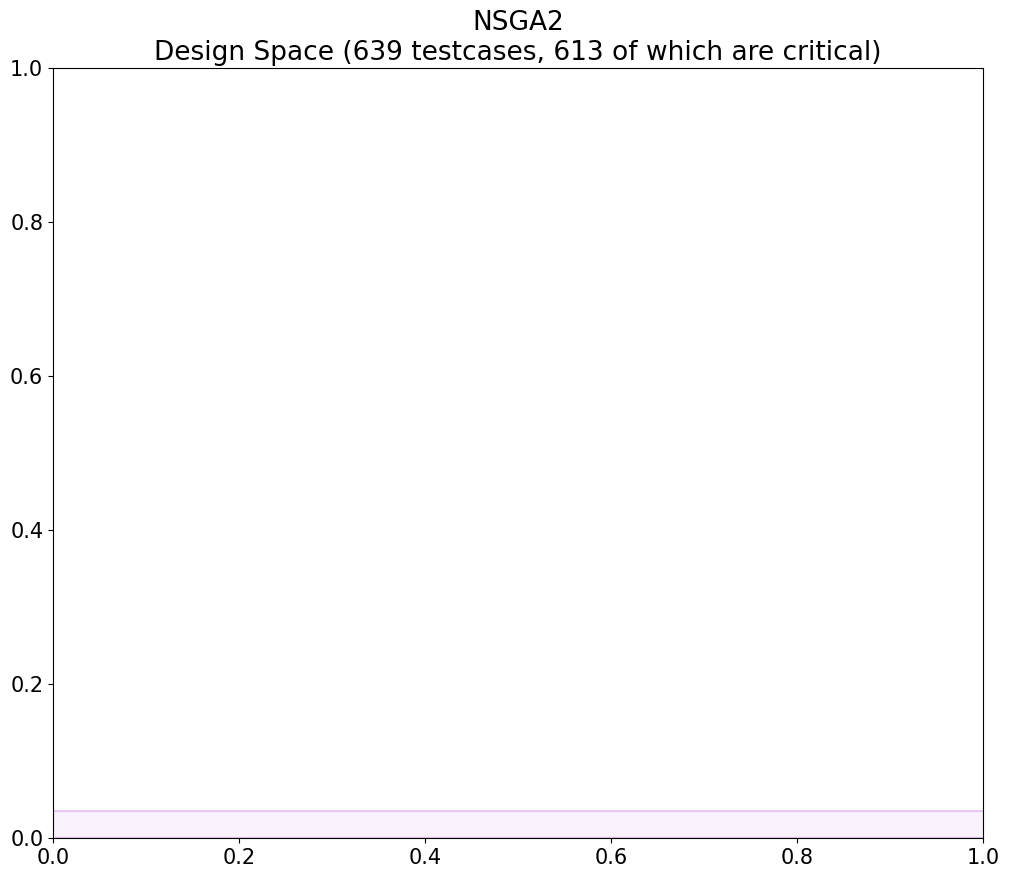

In [15]:
res.write_results(eval_folder, params=optimizer.parameters)

In [16]:
res.obtain_all_population().divide_critical_non_critical()

Mocking population


(Population([<pymoo.core.individual.Individual object at 0x17223fbb0>,
            dtype=object),
 Population([<pymoo.core.individual.Individual object at 0x120b010a0>,
            dtype=object))

In [53]:
for i in res.obtain_all_population():
    if (i.get("SO") is not None):
        print(i.get("SO").otherParams)
    else:
        print("None")
#res.obtain_all_population().get("SO")[0].otherParams

Mocking population
{'xte': [0.0002156418, 0.0002365527, 0.0002365527, 0.0002322763, 0.0002322763, 0.0002322763, 0.0001832129, 0.0001832129, 7.383552e-05, 7.383552e-05, 3.074062e-06, 3.074062e-06, 3.074062e-06, 4.631557e-05, 4.631557e-05, -1.607021e-05, -1.607021e-05, -1.607021e-05, -0.0001056289, -0.0001056289, -7.952931e-05, -7.952931e-05, -7.952931e-05, -6.788993e-05, -6.788993e-05, 1.341092e-05, 1.341092e-05, 1.341092e-05, 0.0001035425, 0.0001035425, 0.0001035425, 0.0001223428, 0.0001223428, 0.0001342269, 0.0001342269, 0.0001342269, 0.0001871505, 0.0001871505, 8.288225e-05, 8.288225e-05, 8.288225e-05, -0.0001479782, -0.0001479782, -0.0003223907, -0.0003223907, -0.0003223907, -0.0005349875, -0.0005349875, -0.0007738292, -0.0007738292, -0.0007738292, -0.0009319124, -0.0009319124, -0.001089501, -0.001089501, -0.001089501, -0.001316912, -0.001316912, -0.001371552, -0.001371552, -0.001371552, -0.001641499, -0.001641499, -0.001802245, -0.001802245, -0.001802245, -0.001982051, -0.001982051

In [35]:
for history in res.history:
    for p in history.pop:
        print(f"Crit {p.get('CB')} and {p.get('F')}")

Crit 1.0 and [-0.68945447 -0.61940299 -1.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-0.62131079 -0.6641791  -1.        ]
Crit 1.0 and [-0.68945447 -0.61940299 -1.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-1.15327271 -0.21641791 -1.        ]
Crit 1.0 and [-1.15327271 -0.21641791 -1.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-1.12887738 -0.3358209  -2.        ]
Crit 1.0 and [-1.12887738 -0.3358209  -2.        ]
Crit 1.0 and [-1.15327271 -0.21641791 -1.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-1.15327271 -0.21641791 -1.        ]
Crit 1.0 and [-1.12887738 -0.3358209  -2.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-1.21768122 -0.56716418 -1.        ]
Crit 1.0 and [-1.13257694 -0.3358209  -2.        ]
Crit 1.0 and [-0.62441141 -0.91791045 -1.        ]
Crit 1.0 and [-1.21768122 -0.56

OpenSBT issues in this version
- Cannot run res.write_results
- The criticality function cannot access the `simout` prop, it is always None
- To run optimizers on integers, need to create a custom algorithm subclass